In [1]:
import numpy as np
import os
import matplotlib
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from matplotlib.pyplot import MultipleLocator
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import pandas as pd
import seaborn as sns
from scipy.optimize import curve_fit
import scipy.optimize as optimization
from tqdm import tqdm
from copy import deepcopy
from DiabeticPES import * # import the DiabeticPES code written by Philomena Schlexer Lamoureux (https://github.com/SUNCAT-Center/CatHub/blob/master/cathub/pet_barriers.py)
from AlkalineHER import * # import the AlkalineHER code which solves the kinetics of alkaline HER on Pt

In [2]:
# Plotting settings
#high quality figure setting
fig_width_pt = 1.8*246.0  # Get this from LaTeX using \showthe\columnwidth
#fig_width_pt *= 300./72 # convert to 300 dpi
inches_per_pt = 1.0/72.27               # Convert pt to inches
#inches_per_pt = 1.0/300               # Convert pt to inches
golden_mean = (np.sqrt(5)-1.0)/2.0         # Aesthetic ratio
fig_width = fig_width_pt*inches_per_pt  # width in inches
fig_height =fig_width*golden_mean       # height in inches
fig_size = [fig_width,fig_height]

plt.rc('text', usetex=True)
plt.rc('text')
font = {'size': 18}
plt.rc('font', **font)
#sns.set_style('white')
sns.set_palette(sns.hls_palette(8, h=0.5, l=0.4, s=0.5))

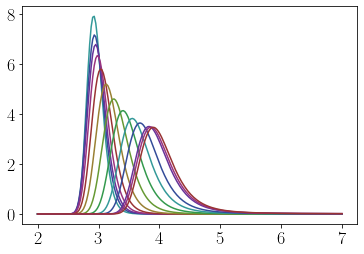

In [3]:
# check the electrode-solvent distribution at different H* coverage (cov)
prob_list=[]
for cov in [0,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.6,0.65,1]:
    prob_list.append(cov2distribution_Pt_100(cov,show_plot=True,N_sam=200)['Probability'])

In [4]:
# initiate the Pt(100)-water interface object
Pt100_w=ElectrodeWaterInterface('Pt','100')

energy difference:  0.27 V
E_H-OH in water: -3.54
E_H on metal: -3.27
d_O-metal:  3.80
bond_length_O-H:  1.00
bond_length_H-metal:  1.11
final_distance_metal-H:  1.69


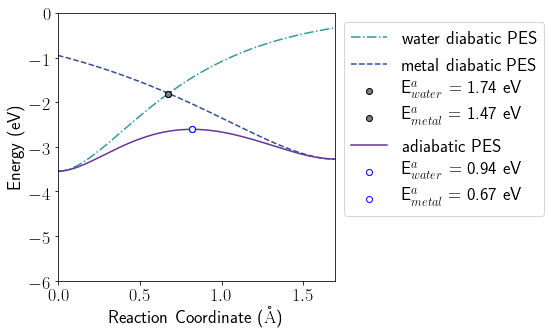

In [5]:
# show energy profile for Volmer step on Pt(100)-water interface
Volmer_barrier_Pt100=Pt100_w.get_volmer_parameters(coverage=0.75, U=-0.1, pH=13, d_ew=3.8, E_H_OH = -6.614, show_details = True)['barrier_ad_forward']

energy difference:  0.66 V
E_H-OH in water: -3.54
E_H_ad_H_metal: -2.88
d_O-metal:  3.80
bond_length_O-H:  1.00
bond_length_H-metal:  1.11
bond_length_H-H:  0.90
final_distance_metal-H:  0.79


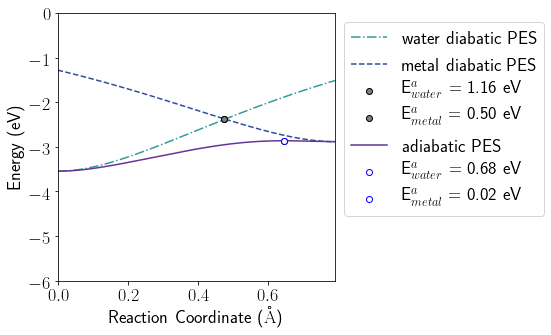

In [6]:
# show energy profile for Heyrovsky step on Pt(100)-water interface
Heyrov_barrier_Pt100=Pt100_w.get_heyrovsky_parameters(coverage=0.75, U=-0.1, pH=13, d_ew=3.8, E_H_OH = -6.614, show_details = True)['barrier_ad_forward']

In [7]:
# show details for Tafel step on Pt(100)-water interface
Tafel_barrier_Pt100=Pt100_w.get_tafel_parameters(coverage=0.75,show_details = True)['barrier_forward']

2*E_H_ad_metal: -6.55 eV
H2_referenced_to_H_vaccum: -6.73 eV
delta_E: -0.18 eV
forward barrier:  0.99 eV
reverse barrier:  1.18 eV


  0%|          | 1/200 [00:00<00:21,  9.11it/s]

range_U_RHE -0.1 0.0
coverage at U=-0.10 V iteration complete
0.8231606305524343 0.8239536563807216
coverage at U=-0.09 V iteration complete
0.8231661046452234 0.8237080398313524
coverage at U=-0.08 V iteration complete
0.8231698439240878 0.8235400325316503
coverage at U=-0.07 V iteration complete
0.8231723974339336 0.8234251949086647
coverage at U=-0.06 V iteration complete
0.8231741408502631 0.8233467390668884
coverage at U=-0.04 V iteration complete
0.8231753310116774 0.8232931569916933
coverage at U=-0.03 V iteration complete
0.823176143412697 0.8232565711136379
coverage at U=-0.02 V iteration complete
0.823176697920463 0.8232315941893057
coverage at U=-0.01 V iteration complete
0.8231770763857812 0.823214544452283
coverage at U= 0.00 V iteration complete
0.8231773346901582 0.8232029068234823
coverage at U=-0.10 V iteration complete
0.8231775109805822 0.8231949637325628
coverage at U=-0.09 V iteration complete
0.8231776312955689 0.8231895424792421
coverage at U=-0.08 V iteration co

  4%|▍         | 8/200 [00:00<00:13, 14.34it/s]

 0.8231778899464531
coverage at U=-0.06 V iteration complete
0.8231778898884448 0.823177889928308
coverage at U=-0.04 V iteration complete
0.8231778898887196 0.8231778899159291
coverage at U=-0.03 V iteration complete
0.823177889888907 0.8231778899074654
coverage at U=-0.02 V iteration complete
0.8231778898890351 0.8231778899017089
coverage at U=-0.01 V iteration complete
0.8231778898891224 0.8231778898977735
coverage at U= 0.00 V iteration complete
0.8231778898891821 0.823177889895082
coverage at U=-0.10 V iteration complete
0.8231778898892227 0.8231778898932498
coverage at U=-0.09 V iteration complete
0.8231778898892504 0.8231778898919974
coverage at U=-0.08 V iteration complete
0.8231778898892693 0.823177889891142
coverage at U=-0.07 V iteration complete
0.8231778898892823 0.8231778898905681
coverage at U=-0.06 V iteration complete
0.8231778898892912 0.8231778898901652
coverage at U=-0.04 V iteration complete
0.8231778898892972 0.8231778898898936
coverage at U=-0.03 V iteration comp

  8%|▊         | 16/200 [00:00<00:08, 20.80it/s]

coverage at U=-0.01 V iteration complete
0.8231778898893101 0.8231778898893151
coverage at U= 0.00 V iteration complete
0.8231778898893101 0.8231778898893151
coverage at U=-0.10 V iteration complete
0.8231778898893101 0.8231778898893151
coverage at U=-0.09 V iteration complete
0.8231778898893101 0.8231778898893151
coverage at U=-0.08 V iteration complete
0.8231778898893101 0.8231778898893152
coverage at U=-0.07 V iteration complete
0.8231778898893101 0.8231778898893151
coverage at U=-0.06 V iteration complete
0.8231778898893101 0.8231778898893152
coverage at U=-0.04 V iteration complete
0.8231778898893101 0.8231778898893151
coverage at U=-0.03 V iteration complete
0.8231778898893101 0.8231778898893151
coverage at U=-0.02 V iteration complete
0.8231778898893101 0.8231778898893151
coverage at U=-0.01 V iteration complete
0.8231778898893101 0.8231778898893151
coverage at U= 0.00 V iteration complete
0.8231778898893101 0.8231778898893151
coverage at U=-0.10 V iteration complete
0.823177889

 12%|█▏        | 24/200 [00:00<00:06, 26.09it/s]

coverage at U=-0.08 V iteration complete
0.8231778898893101 0.8231778898893152
coverage at U=-0.07 V iteration complete
0.8231778898893101 0.8231778898893151
coverage at U=-0.06 V iteration complete
0.8231778898893101 0.8231778898893152
coverage at U=-0.04 V iteration complete
0.8231778898893101 0.8231778898893151
coverage at U=-0.03 V iteration complete
0.8231778898893101 0.8231778898893151
coverage at U=-0.02 V iteration complete
0.8231778898893101 0.8231778898893151
coverage at U=-0.01 V iteration complete
0.8231778898893101 0.8231778898893151
coverage at U= 0.00 V iteration complete
0.8231778898893101 0.8231778898893151
coverage at U=-0.10 V iteration complete
0.8231778898893101 0.8231778898893151
coverage at U=-0.09 V iteration complete
0.8231778898893101 0.8231778898893151
coverage at U=-0.08 V iteration complete
0.8231778898893101 0.8231778898893152
coverage at U=-0.07 V iteration complete
0.8231778898893101 0.8231778898893151
coverage at U=-0.06 V iteration complete
0.823177889

 14%|█▍        | 28/200 [00:00<00:06, 24.80it/s]

coverage at U=-0.09 V iteration complete
0.8231571441465599 0.8240940330219607
coverage at U=-0.08 V iteration complete
0.8231636986588424 0.8238125953748106
coverage at U=-0.07 V iteration complete
0.8231681995741111 0.8236137901857156
coverage at U=-0.06 V iteration complete
0.823171274600655 0.8234757022284923
coverage at U=-0.04 V iteration complete
0.823173374267116 0.8233812412467562
coverage at U=-0.03 V iteration complete
0.8231748077117781 0.8233167187333237
coverage at U=-0.02 V iteration complete
0.8231757862170859 0.8232726582425534
coverage at U=-0.01 V iteration complete
0.8231764541185811 0.8232425763666034
coverage at U= 0.00 V iteration complete
0.8231769099865738 0.8232220409178456
coverage at U=-0.10 V iteration complete
0.8226765814569635 0.8226815352047815
coverage at U=-0.09 V iteration complete
0.8231495220732631 0.8239094226234653
coverage at U=-0.08 V iteration complete
0.8231559547125533 0.823792786002289
coverage at U=-0.07 V iteration complete
0.823161247996

 16%|█▌        | 31/200 [00:01<00:10, 16.31it/s]

coverage at U=-0.08 V iteration complete
0.8226318177635894 0.8235926340174028
coverage at U=-0.07 V iteration complete
0.8226843527427424 0.8233653001754383
coverage at U=-0.06 V iteration complete
0.8227237018343233 0.8235765108724785
coverage at U=-0.04 V iteration complete
0.8227636208589116 0.823628429015722
coverage at U=-0.03 V iteration complete
0.8228018182767789 0.8236289318873179
coverage at U=-0.02 V iteration complete
0.822837624772166 0.8236125043642503
coverage at U=-0.01 V iteration complete
0.8228709439729193 0.8235915590829812
coverage at U= 0.00 V iteration complete
0.8228950861107316 0.8238681256717122
coverage at U=-0.10 V iteration complete
0.8221607598853318 0.8229318779857443
coverage at U=-0.09 V iteration complete
0.8222291477676602 0.823121922333356
coverage at U=-0.08 V iteration complete
0.8222965616898353 0.82317577671775
coverage at U=-0.07 V iteration complete
0.8223607956188733 0.8231975913427856
coverage at U=-0.06 V iteration complete
0.82242148668742

 17%|█▋        | 34/200 [00:01<00:13, 12.12it/s]

coverage at U=-0.10 V iteration complete
0.8216716019812148 0.8225297240289993
coverage at U=-0.09 V iteration complete
0.8217643790945606 0.8225357977552438
coverage at U=-0.08 V iteration complete
0.821851755136726 0.8225769305549777
coverage at U=-0.07 V iteration complete
0.8219346640074615 0.8226216416155973
coverage at U=-0.06 V iteration complete
0.8220067948351759 0.8229503941021742
coverage at U=-0.04 V iteration complete
0.8220803745775428 0.8230421361795848
coverage at U=-0.03 V iteration complete
0.8221513926273804 0.8230788330553382
coverage at U=-0.02 V iteration complete
0.8222190021296736 0.8231008707478111
coverage at U=-0.01 V iteration complete
0.8222831880438165 0.823119599795689
coverage at U= 0.00 V iteration complete
0.8223440086825928 0.823135642929474
coverage at U=-0.10 V iteration complete
0.821061895320877 0.8217945872360453
coverage at U=-0.09 V iteration complete
0.8211699228035179 0.8220751988372758
coverage at U=-0.08 V iteration complete
0.8212771340439

 18%|█▊        | 36/200 [00:02<00:19,  8.51it/s]

coverage at U=-0.09 V iteration complete
0.8195781038223899 0.8204661741889819
coverage at U=-0.08 V iteration complete
0.8197307622612654 0.8205842616502583
coverage at U=-0.07 V iteration complete
0.8198779192295051 0.8206989154722276
coverage at U=-0.06 V iteration complete
0.8200196755396382 0.8208083871099243
coverage at U=-0.04 V iteration complete
0.8201562889303878 0.8209148072871006
coverage at U=-0.03 V iteration complete
0.8202879494453439 0.8210174375984425
coverage at U=-0.02 V iteration complete
0.8204147583136537 0.8211155439759125
coverage at U=-0.01 V iteration complete
0.8205301233603488 0.821501251971113
coverage at U= 0.00 V iteration complete
0.8206469761115172 0.8216295471894406
coverage at U=-0.10 V iteration complete
0.818379755507265 0.8192579152880288
coverage at U=-0.09 V iteration complete
0.8185655154916792 0.8192724202973892
coverage at U=-0.08 V iteration complete
0.8187352893300804 0.8196943021697164
coverage at U=-0.07 V iteration complete
0.81890510569

 19%|█▉        | 38/200 [00:02<00:25,  6.42it/s]

coverage at U=-0.10 V iteration complete
0.8171820985730367 0.8180535677685641
coverage at U=-0.09 V iteration complete
0.8173902278447508 0.8181925915667014
coverage at U=-0.08 V iteration complete
0.817591079448086 0.8183631201354885
coverage at U=-0.07 V iteration complete
0.8177856177054698 0.8185306496495669
coverage at U=-0.06 V iteration complete
0.8179740969770426 0.8186938471283318
coverage at U=-0.04 V iteration complete
0.8181567667669876 0.8188523851504119
coverage at U=-0.03 V iteration complete
0.8183270195415783 0.8192900822076028
coverage at U=-0.02 V iteration complete
0.8184980385371895 0.8194637242348438
coverage at U=-0.01 V iteration complete
0.8186645046369048 0.8196023999113973
coverage at U= 0.00 V iteration complete
0.818825934322641 0.8197334066030592
coverage at U=-0.10 V iteration complete
0.815823132232487 0.8166320263308264
coverage at U=-0.09 V iteration complete
0.8160528518185773 0.8169498107858789
coverage at U=-0.08 V iteration complete
0.816278365493

 20%|██        | 40/200 [00:03<00:28,  5.64it/s]

coverage at U=-0.10 V iteration complete
0.8142964338092521 0.8150426594302077
coverage at U=-0.09 V iteration complete
0.8145550136598075 0.8152553865867985
coverage at U=-0.08 V iteration complete
0.8147991991883053 0.815762170099125
coverage at U=-0.07 V iteration complete
0.8150429968757391 0.816001957341742
coverage at U=-0.06 V iteration complete
0.8152807509146988 0.8162130924111158
coverage at U=-0.04 V iteration complete
0.8155121473589201 0.8164167732065506
coverage at U=-0.03 V iteration complete
0.8157373397108709 0.8166150225029838
coverage at U=-0.02 V iteration complete
0.8159565188252117 0.8168081724687762
coverage at U=-0.01 V iteration complete
0.8161698745521238 0.8169964269264315
coverage at U= 0.00 V iteration complete
0.8163775365349107 0.8171803413519851


 20%|██        | 41/200 [00:03<00:34,  4.64it/s]

coverage at U=-0.10 V iteration complete
0.8125923717996236 0.8134844606177272
coverage at U=-0.09 V iteration complete
0.8128783911783267 0.8136652626945933
coverage at U=-0.08 V iteration complete
0.8131552562425712 0.8139139250455515
coverage at U=-0.07 V iteration complete
0.8134249231639159 0.8141610564379305
coverage at U=-0.06 V iteration complete
0.8136877213671826 0.8144023953468704
coverage at U=-0.04 V iteration complete
0.8139368621959029 0.8149226619816797
coverage at U=-0.03 V iteration complete
0.8141861592256515 0.8151700091241086
coverage at U=-0.02 V iteration complete
0.8144297469443341 0.8153889772393784
coverage at U=-0.01 V iteration complete
0.8146672389860703 0.8155995141538441
coverage at U= 0.00 V iteration complete
0.8148988598533208 0.8158052399557358


 21%|██        | 42/200 [00:03<00:39,  4.02it/s]

coverage at U=-0.10 V iteration complete
0.8107198929049241 0.8114227691088085
coverage at U=-0.09 V iteration complete
0.8110258401424398 0.8118797396783667
coverage at U=-0.08 V iteration complete
0.8113282785503916 0.8121693116467872
coverage at U=-0.07 V iteration complete
0.8116236708515964 0.8124418890967025
coverage at U=-0.06 V iteration complete
0.8119119965143258 0.812707694663554
coverage at U=-0.04 V iteration complete
0.8121933737920425 0.8129676526533938
coverage at U=-0.03 V iteration complete
0.8124680342934549 0.8132208851187459
coverage at U=-0.02 V iteration complete
0.8127362441646762 0.8134685870001973
coverage at U=-0.01 V iteration complete
0.812998093148531 0.8137111690936686
coverage at U= 0.00 V iteration complete
0.813246768796445 0.8142317643730395


 22%|██▏       | 43/200 [00:03<00:40,  3.87it/s]

coverage at U=-0.10 V iteration complete
0.8086617552698766 0.8093892671669664
coverage at U=-0.09 V iteration complete
0.8089926065935995 0.8099294682681442
coverage at U=-0.08 V iteration complete
0.8093210745774889 0.8102486628067372
coverage at U=-0.07 V iteration complete
0.80964232879765 0.8105458543746291
coverage at U=-0.06 V iteration complete
0.8099563165464044 0.8108358103084312
coverage at U=-0.04 V iteration complete
0.8102632325106888 0.8111204664402014
coverage at U=-0.03 V iteration complete
0.8105631007733858 0.8113973306732102
coverage at U=-0.02 V iteration complete
0.8108563336833907 0.8116688971010034
coverage at U=-0.01 V iteration complete
0.8111429449227519 0.811934912476345
coverage at U= 0.00 V iteration complete
0.8114232494306901 0.8121947749322342


 22%|██▏       | 44/200 [00:04<00:43,  3.59it/s]

coverage at U=-0.10 V iteration complete
0.8064203515262547 0.80713379392537
coverage at U=-0.09 V iteration complete
0.8067825030665263 0.807507432738227
coverage at U=-0.08 V iteration complete
0.8071374525556427 0.8078456384222684
coverage at U=-0.07 V iteration complete
0.8074775936781482 0.808447763837118
coverage at U=-0.06 V iteration complete
0.8078169604863181 0.8087813766473763
coverage at U=-0.04 V iteration complete
0.8081494081119026 0.8090914359462456
coverage at U=-0.03 V iteration complete
0.808474752439351 0.8093927894891033
coverage at U=-0.02 V iteration complete
0.8087931535356145 0.8096890334066723
coverage at U=-0.01 V iteration complete
0.8091048154281666 0.8099781376905768
coverage at U= 0.00 V iteration complete
0.8094098333263865 0.8102620578965386
coverage at U=-0.10 V iteration complete
0.8039867878279707 0.8048617395368055
coverage at U=-0.09 V iteration complete
0.8043777836913637 0.8051738412174848
coverage at U=-0.08 V iteration complete
0.80475908268191

 22%|██▎       | 45/200 [00:04<00:45,  3.38it/s]

coverage at U= 0.00 V iteration complete
0.8072097113415871 0.8081451430308607
coverage at U=-0.10 V iteration complete
0.8013633111889292 0.8023444997380679
coverage at U=-0.09 V iteration complete
0.8017816754886284 0.8026478430088492


 23%|██▎       | 46/200 [00:04<00:49,  3.13it/s]

coverage at U=-0.08 V iteration complete
0.8021895633311095 0.8030308676853853
coverage at U=-0.07 V iteration complete
0.8025890504275803 0.8034086906925433
coverage at U=-0.06 V iteration complete
0.8029806871023277 0.8037813475036102
coverage at U=-0.04 V iteration complete
0.8033645923911049 0.8041454552952921
coverage at U=-0.03 V iteration complete
0.8037409119852355 0.8045035232682275
coverage at U=-0.02 V iteration complete
0.8041099764577238 0.8048552349512826
coverage at U=-0.01 V iteration complete
0.8044719312529449 0.8051996035328299
coverage at U= 0.00 V iteration complete
0.8048268120022133 0.8055372234302209


 24%|██▎       | 47/200 [00:05<00:45,  3.33it/s]

coverage at U=-0.10 V iteration complete
0.7985537253153336 0.7992931841299324
coverage at U=-0.09 V iteration complete
0.7989911559607011 0.7999111834691193
coverage at U=-0.08 V iteration complete
0.7994250680703 0.8003345937181902
coverage at U=-0.07 V iteration complete
0.7998509349583244 0.8007390280488362
coverage at U=-0.06 V iteration complete
0.8002686007449692 0.8011360958319957
coverage at U=-0.04 V iteration complete
0.800678431847785 0.8015264955715026
coverage at U=-0.03 V iteration complete
0.8010806155891839 0.8019097747022448
coverage at U=-0.02 V iteration complete
0.8014752120580355 0.8022845234877224
coverage at U=-0.01 V iteration complete
0.8018624603664842 0.8026536282032041
coverage at U= 0.00 V iteration complete
0.8022425869228859 0.8030163560145805


 24%|██▍       | 48/200 [00:05<00:43,  3.47it/s]

coverage at U=-0.10 V iteration complete
0.7955333835412955 0.7965001816869016
coverage at U=-0.09 V iteration complete
0.7960086413414367 0.7967284186485032
coverage at U=-0.08 V iteration complete
0.7964624318213477 0.7974281727115583
coverage at U=-0.07 V iteration complete
0.7969142072369336 0.7978720168463048
coverage at U=-0.06 V iteration complete
0.7973580947136283 0.7982955559506808
coverage at U=-0.04 V iteration complete
0.7977939622586917 0.7987109301426527
coverage at U=-0.03 V iteration complete
0.7982219742949637 0.799118946669776
coverage at U=-0.02 V iteration complete
0.7986422889143034 0.7995190375637657
coverage at U=-0.01 V iteration complete
0.7990550584548268 0.7999122986986242
coverage at U= 0.00 V iteration complete
0.7994605194998187 0.8002992434260421


 24%|██▍       | 49/200 [00:05<00:42,  3.55it/s]

coverage at U=-0.10 V iteration complete
0.7923199163256808 0.7931535148112673
coverage at U=-0.09 V iteration complete
0.7928172550481526 0.793584450170795
coverage at U=-0.08 V iteration complete
0.7933045217753514 0.794052645043923
coverage at U=-0.07 V iteration complete
0.7937829871088511 0.7945130076567898
coverage at U=-0.06 V iteration complete
0.7942529742461809 0.7949665565703435
coverage at U=-0.04 V iteration complete
0.7947076897682267 0.795678971177244
coverage at U=-0.03 V iteration complete
0.795161205609406 0.7961264929548336
coverage at U=-0.02 V iteration complete
0.7956072472306744 0.796552859078695
coverage at U=-0.01 V iteration complete
0.7960456511399399 0.7969713734534782
coverage at U= 0.00 V iteration complete
0.7964765799706626 0.79738290891108


 25%|██▌       | 50/200 [00:06<00:44,  3.34it/s]

coverage at U=-0.10 V iteration complete
0.7888942601082555 0.7898112965530525
coverage at U=-0.09 V iteration complete
0.7894190550663699 0.7902434287627986
coverage at U=-0.08 V iteration complete
0.7899329612400022 0.7907360642901686
coverage at U=-0.07 V iteration complete
0.7904379776981182 0.7912233499930343
coverage at U=-0.06 V iteration complete
0.7909343881332579 0.791702688554329
coverage at U=-0.04 V iteration complete
0.7914224014991719 0.7921741105945168
coverage at U=-0.03 V iteration complete
0.7919022189182964 0.7926377983633208
coverage at U=-0.02 V iteration complete
0.7923740374342124 0.7930939487761447
coverage at U=-0.01 V iteration complete
0.7928309310093826 0.793811063851396
coverage at U= 0.00 V iteration complete
0.7932870852511262 0.7942625473949225


 26%|██▌       | 51/200 [00:06<00:51,  2.91it/s]

coverage at U=-0.10 V iteration complete
0.7852591230107526 0.7861881146640952
coverage at U=-0.09 V iteration complete
0.7858097929072583 0.7866928757014691
coverage at U=-0.08 V iteration complete
0.786350558408507 0.787213336217175
coverage at U=-0.07 V iteration complete
0.7868822842391606 0.7877264308993612
coverage at U=-0.06 V iteration complete
0.7874052162740293 0.7882312703051787
coverage at U=-0.04 V iteration complete
0.7879195716775728 0.788728050126305
coverage at U=-0.03 V iteration complete
0.7884255622038013 0.7892169660548566
coverage at U=-0.02 V iteration complete
0.7889233955847237 0.7896982123246447
coverage at U=-0.01 V iteration complete
0.7894132756525286 0.7901719797408311
coverage at U= 0.00 V iteration complete
0.7898954010175913 0.7906385075917306


 26%|██▌       | 52/200 [00:06<00:52,  2.81it/s]

coverage at U=-0.10 V iteration complete
0.7814092990162372 0.7822958929832309
coverage at U=-0.09 V iteration complete
0.7819844982030694 0.7829238544909842
coverage at U=-0.08 V iteration complete
0.7825522210741185 0.7834747896625268
coverage at U=-0.07 V iteration complete
0.7831108868225479 0.7840146036752225
coverage at U=-0.06 V iteration complete
0.7836605366223078 0.7845460428289597
coverage at U=-0.04 V iteration complete
0.7842014319419879 0.785068340279352
coverage at U=-0.03 V iteration complete
0.7847338341878943 0.7855827510440411
coverage at U=-0.02 V iteration complete
0.7852579626287907 0.786089416319635
coverage at U=-0.01 V iteration complete
0.7857740177166938 0.7865890107200354
coverage at U= 0.00 V iteration complete
0.7862819419649673 0.7870811285304351


 26%|██▋       | 53/200 [00:07<00:51,  2.84it/s]

coverage at U=-0.10 V iteration complete
0.7773401733227391 0.7781142438386748
coverage at U=-0.09 V iteration complete
0.777945399129529 0.7786720380358474
coverage at U=-0.08 V iteration complete
0.7785331112586372 0.7795081427582327
coverage at U=-0.07 V iteration complete
0.7791185288281788 0.7800849017042587
coverage at U=-0.06 V iteration complete
0.7796952149909075 0.7806420976361719
coverage at U=-0.04 V iteration complete
0.7802630878715975 0.7811913958928159
coverage at U=-0.03 V iteration complete
0.7808220690276347 0.7817319100461486
coverage at U=-0.02 V iteration complete
0.7813726188503718 0.7822639764003647
coverage at U=-0.01 V iteration complete
0.7819149986939166 0.782788753962742
coverage at U= 0.00 V iteration complete
0.7824491009924402 0.7833064567759583


 27%|██▋       | 54/200 [00:07<00:53,  2.74it/s]

coverage at U=-0.10 V iteration complete
0.7730380267548582 0.7738998559004429
coverage at U=-0.09 V iteration complete
0.7736720348950374 0.7744516303991277
coverage at U=-0.08 V iteration complete
0.7742945385908372 0.7750550372467805
coverage at U=-0.07 V iteration complete
0.7749075963431512 0.7756518110866294
coverage at U=-0.06 V iteration complete
0.77551150336385 0.7762406541866206
coverage at U=-0.04 V iteration complete
0.7760988967767694 0.7770792867998878
coverage at U=-0.03 V iteration complete
0.7766845885988329 0.7776571201486322
coverage at U=-0.02 V iteration complete
0.7772620701413467 0.7782176468653219
coverage at U=-0.01 V iteration complete
0.7778308300259694 0.778766785626197
coverage at U= 0.00 V iteration complete
0.7783915382858715 0.7793094219172104


 28%|██▊       | 55/200 [00:08<00:52,  2.75it/s]

coverage at U=-0.10 V iteration complete
0.7685032114131357 0.7694012454467415
coverage at U=-0.09 V iteration complete
0.7691649929567879 0.7699979546233753
coverage at U=-0.08 V iteration complete
0.7698156110009661 0.7706308461223378
coverage at U=-0.07 V iteration complete
0.7704563799536396 0.7712539776627845
coverage at U=-0.06 V iteration complete
0.7710879126595117 0.7718690427090983
coverage at U=-0.04 V iteration complete
0.7717100701742641 0.7724761824716114
coverage at U=-0.03 V iteration complete
0.7723232461670462 0.7730733962345873
coverage at U=-0.02 V iteration complete
0.7729276686674923 0.7736640369074764
coverage at U=-0.01 V iteration complete
0.7735160344430305 0.7745044325738706
coverage at U= 0.00 V iteration complete
0.7741031961636955 0.7750863720945503


 28%|██▊       | 56/200 [00:08<00:49,  2.91it/s]

coverage at U=-0.10 V iteration complete
0.7637288014718053 0.7646077015476862
coverage at U=-0.09 V iteration complete
0.7644171544730108 0.7653074550605301
coverage at U=-0.08 V iteration complete
0.7650960237883886 0.7659680497954204
coverage at U=-0.07 V iteration complete
0.765765358319609 0.7666198712825384
coverage at U=-0.06 V iteration complete
0.7664247774419296 0.7672622341765398
coverage at U=-0.04 V iteration complete
0.7670750463848068 0.7678955730977213
coverage at U=-0.03 V iteration complete
0.7677158894800271 0.7685206521772853
coverage at U=-0.02 V iteration complete
0.7683479700419765 0.7691367998813432
coverage at U=-0.01 V iteration complete
0.7689709657261414 0.7697446587254113
coverage at U= 0.00 V iteration complete
0.7695856323451818 0.7703456723523774


 28%|██▊       | 57/200 [00:08<00:47,  3.03it/s]

coverage at U=-0.10 V iteration complete
0.75870591738602 0.7595305773360677
coverage at U=-0.09 V iteration complete
0.7594203027674968 0.7603694686662494
coverage at U=-0.08 V iteration complete
0.7601281309094464 0.7610620503715881
coverage at U=-0.07 V iteration complete
0.7608263162109724 0.7617430987655353
coverage at U=-0.06 V iteration complete
0.761514462375218 0.7624116728803052
coverage at U=-0.04 V iteration complete
0.7621931799607062 0.7630739117361341
coverage at U=-0.03 V iteration complete
0.7628624361006706 0.7637248574201021
coverage at U=-0.02 V iteration complete
0.7635224544198517 0.7643689552296715
coverage at U=-0.01 V iteration complete
0.7641737049750554 0.7650042227104035
coverage at U= 0.00 V iteration complete
0.7648157928891492 0.7656298192060549


 29%|██▉       | 58/200 [00:08<00:45,  3.12it/s]

coverage at U=-0.10 V iteration complete
0.753418603403967 0.7543963443195159
coverage at U=-0.09 V iteration complete
0.7541727932623732 0.7549277972321259
coverage at U=-0.08 V iteration complete
0.7549106125217693 0.7556446990992959
coverage at U=-0.07 V iteration complete
0.7556310139544362 0.7566025998106388
coverage at U=-0.06 V iteration complete
0.7563481839799916 0.7573100802015841
coverage at U=-0.04 V iteration complete
0.7570560743637511 0.7580007919072608
coverage at U=-0.03 V iteration complete
0.757754335675211 0.7586796028699913
coverage at U=-0.02 V iteration complete
0.7584430637942511 0.7593510366325756
coverage at U=-0.01 V iteration complete
0.7591227789373356 0.7600144863719983
coverage at U= 0.00 V iteration complete
0.7597934835128091 0.7606674217525307


 30%|██▉       | 59/200 [00:09<00:44,  3.17it/s]

coverage at U=-0.10 V iteration complete
0.7478715509435142 0.7486888456443449
coverage at U=-0.09 V iteration complete
0.7486504403612001 0.7494576927029157
coverage at U=-0.08 V iteration complete
0.7494188396798166 0.750208639704232
coverage at U=-0.07 V iteration complete
0.7501765791833215 0.7509505276001258
coverage at U=-0.06 V iteration complete
0.750924302359916 0.7516834874343794
coverage at U=-0.04 V iteration complete
0.7516619997008722 0.7524049759839168
coverage at U=-0.03 V iteration complete
0.75238231568096 0.7533652863778586
coverage at U=-0.02 V iteration complete
0.7531003786708522 0.7540755085527184
coverage at U=-0.01 V iteration complete
0.7538094429278221 0.7547673929862222
coverage at U= 0.00 V iteration complete
0.7545091828705958 0.7554478179232559


 30%|███       | 60/200 [00:09<00:43,  3.19it/s]

coverage at U=-0.10 V iteration complete
0.742037968664863 0.7429161463999312
coverage at U=-0.09 V iteration complete
0.7428485023174594 0.7437185795974366
coverage at U=-0.08 V iteration complete
0.7436485780030296 0.7445019792637545
coverage at U=-0.07 V iteration complete
0.7444377700764719 0.7452722773654562
coverage at U=-0.06 V iteration complete
0.7452164092782473 0.74603446693671
coverage at U=-0.04 V iteration complete
0.7459849215689572 0.7467873234478069
coverage at U=-0.03 V iteration complete
0.7467434998144347 0.7475306461740484
coverage at U=-0.02 V iteration complete
0.7474921602957444 0.7482627059847932
coverage at U=-0.01 V iteration complete
0.7482310167070692 0.7489864610792264
coverage at U= 0.00 V iteration complete
0.7489604866930178 0.7497018251096076


 30%|███       | 61/200 [00:09<00:43,  3.20it/s]

coverage at U=-0.10 V iteration complete
0.735912060946525 0.7368251591493394
coverage at U=-0.09 V iteration complete
0.7367546036350027 0.7376938463983576
coverage at U=-0.08 V iteration complete
0.7375873974679525 0.7385096114328351
coverage at U=-0.07 V iteration complete
0.7384091032942498 0.7393110465373152
coverage at U=-0.06 V iteration complete
0.7392199572452005 0.7401038376360157
coverage at U=-0.04 V iteration complete
0.7400203664644586 0.7408871568227375
coverage at U=-0.03 V iteration complete
0.7408105394934513 0.7416606925759359
coverage at U=-0.02 V iteration complete
0.7415906664429326 0.7424246053006647
coverage at U=-0.01 V iteration complete
0.7423609333777396 0.7431790679576552
coverage at U= 0.00 V iteration complete
0.7431215220322838 0.7439241663529964


 31%|███       | 62/200 [00:10<00:43,  3.20it/s]

coverage at U=-0.10 V iteration complete
0.7294801819165243 0.7303859032884487
coverage at U=-0.09 V iteration complete
0.7303623224983764 0.731126884539761
coverage at U=-0.08 V iteration complete
0.7312214004412597 0.7322092377511026
coverage at U=-0.07 V iteration complete
0.7320765613390121 0.7330531541073328
coverage at U=-0.06 V iteration complete
0.7329209995961665 0.733878685811529
coverage at U=-0.04 V iteration complete
0.7337546817016035 0.734693679351439
coverage at U=-0.03 V iteration complete
0.7345778050457558 0.7354985941009926
coverage at U=-0.02 V iteration complete
0.7353905712104389 0.7362936262122257
coverage at U=-0.01 V iteration complete
0.7361931781236584 0.7370789594199592
coverage at U= 0.00 V iteration complete
0.7369858198894709 0.7378547738576009


 32%|███▏      | 63/200 [00:10<00:44,  3.05it/s]

coverage at U=-0.10 V iteration complete
0.7227252805058725 0.7235918106253313
coverage at U=-0.09 V iteration complete
0.7236399692492719 0.7244705311547119
coverage at U=-0.08 V iteration complete
0.7245422938141213 0.7253549314045886
coverage at U=-0.07 V iteration complete
0.7254330282709094 0.7262287376212322
coverage at U=-0.06 V iteration complete
0.726312417042234 0.7270916852007504
coverage at U=-0.04 V iteration complete
0.7271806846740295 0.7279439689475287
coverage at U=-0.03 V iteration complete
0.7280380506713464 0.7287857929435251
coverage at U=-0.02 V iteration complete
0.728877329768197 0.7298490609511692
coverage at U=-0.01 V iteration complete
0.729713420266854 0.7306749204305393
coverage at U= 0.00 V iteration complete
0.7305394972843765 0.7314828595771101


 32%|███▏      | 64/200 [00:10<00:46,  2.94it/s]

coverage at U=-0.10 V iteration complete
0.7156291113555456 0.7164358053399954
coverage at U=-0.09 V iteration complete
0.716577259974887 0.717481298976874
coverage at U=-0.08 V iteration complete
0.7175168984357699 0.7184052948798443
coverage at U=-0.07 V iteration complete
0.7184447045020468 0.7193144950324727
coverage at U=-0.06 V iteration complete
0.7193608116234792 0.7202124239641098
coverage at U=-0.04 V iteration complete
0.7202654548978852 0.7210994030134819
coverage at U=-0.03 V iteration complete
0.7211588675969954 0.7219756511786499
coverage at U=-0.02 V iteration complete
0.7220412781514679 0.7228413802591345
coverage at U=-0.01 V iteration complete
0.7229129091588151 0.7236968298006237
coverage at U= 0.00 V iteration complete
0.7237739784792915 0.7245422381630946


 32%|███▎      | 65/200 [00:11<00:45,  2.94it/s]

coverage at U=-0.10 V iteration complete
0.7081625114236038 0.7091268650643853
coverage at U=-0.09 V iteration complete
0.7091604869587491 0.7099230530972034
coverage at U=-0.08 V iteration complete
0.710132391207901 0.7111002266132054
coverage at U=-0.07 V iteration complete
0.7110992034716782 0.712053757107104
coverage at U=-0.06 V iteration complete
0.7120541583714605 0.7129889019365874
coverage at U=-0.04 V iteration complete
0.7129972735668577 0.7139128272626278
coverage at U=-0.03 V iteration complete
0.7139286969744604 0.7148267066629987
coverage at U=-0.02 V iteration complete
0.7148485920621116 0.715727888775094
coverage at U=-0.01 V iteration complete
0.7157573310795582 0.7166185793475198
coverage at U= 0.00 V iteration complete
0.716655151893144 0.717498869698834
coverage at U=-0.10 V iteration complete
0.7003174579897979 0.701174164610551
coverage at U=-0.09 V iteration complete
0.7013517439061656 0.7021921614777112
coverage at U=-0.08 V iteration complete
0.702373065030549

 33%|███▎      | 66/200 [00:11<00:48,  2.78it/s]

coverage at U= 0.00 V iteration complete
0.7091696287021232 0.7100980525151518
coverage at U=-0.10 V iteration complete
0.692051324349249 0.6930138300019751
coverage at U=-0.09 V iteration complete
0.6931308149011024 0.6940676138155274


 34%|███▎      | 67/200 [00:11<00:47,  2.79it/s]

coverage at U=-0.08 V iteration complete
0.6941968565156638 0.6951120822318557
coverage at U=-0.07 V iteration complete
0.695249720851034 0.6961441235433588
coverage at U=-0.06 V iteration complete
0.6962896079850904 0.6971638003401787
coverage at U=-0.04 V iteration complete
0.6973167771936467 0.6981719522616222
coverage at U=-0.03 V iteration complete
0.6983310507603542 0.6991684064562173
coverage at U=-0.02 V iteration complete
0.6993329724553753 0.700151696933837
coverage at U=-0.01 V iteration complete
0.7003229801550962 0.7011237807011758
coverage at U= 0.00 V iteration complete
0.7013013431368778 0.7020847859321494
coverage at U=-0.10 V iteration complete
0.6833732806834485 0.6841812085838254
coverage at U=-0.09 V iteration complete
0.6844941096675966 0.6853042434068731
coverage at U=-0.08 V iteration complete
0.6856029136772691 0.6863962266803134
coverage at U=-0.07 V iteration complete
0.686698594219701 0.6874725800139714
coverage at U=-0.06 V iteration complete
0.687774192759

 34%|███▍      | 68/200 [00:12<00:48,  2.72it/s]

coverage at U= 0.00 V iteration complete
0.6930070171391371 0.6938820406347924
coverage at U=-0.10 V iteration complete
0.6742937032002068 0.6751081264100791
coverage at U=-0.09 V iteration complete
0.6754480089617537 0.676359544092832


 34%|███▍      | 69/200 [00:12<00:47,  2.75it/s]

coverage at U=-0.08 V iteration complete
0.6765944943119231 0.6774876345388532
coverage at U=-0.07 V iteration complete
0.6777291795275585 0.6786010599382054
coverage at U=-0.06 V iteration complete
0.6788520625463913 0.6797041258059958
coverage at U=-0.04 V iteration complete
0.6799624217284443 0.6807954097522693
coverage at U=-0.03 V iteration complete
0.6810610560695862 0.6818743535799618
coverage at U=-0.02 V iteration complete
0.6821483272056642 0.6829430631310052
coverage at U=-0.01 V iteration complete
0.6832237349486054 0.6840017144685278
coverage at U= 0.00 V iteration complete
0.6842796819090337 0.685252514486426
coverage at U=-0.10 V iteration complete
0.6648382837848297 0.6658044970994909
coverage at U=-0.09 V iteration complete
0.66603487889324 0.6668542550604479
coverage at U=-0.08 V iteration complete
0.6672152635196866 0.6680106906625847
coverage at U=-0.07 V iteration complete
0.6683764242711236 0.6693551518501035
coverage at U=-0.06 V iteration complete
0.669533158792

 35%|███▌      | 70/200 [00:13<00:47,  2.75it/s]

coverage at U= 0.00 V iteration complete
0.6751505755489956 0.676010974250325
coverage at U=-0.10 V iteration complete
0.6550498832754058 0.6559201292386725


 36%|███▌      | 71/200 [00:13<00:48,  2.67it/s]

coverage at U=-0.09 V iteration complete
0.656266607155873 0.6571933859940692
coverage at U=-0.08 V iteration complete
0.6574761345777009 0.6583832969136921
coverage at U=-0.07 V iteration complete
0.658674945441603 0.6595617590117537
coverage at U=-0.06 V iteration complete
0.6598620311990452 0.6607266007058927
coverage at U=-0.04 V iteration complete
0.6610389507180763 0.6618825118915705
coverage at U=-0.03 V iteration complete
0.662204684534502 0.6630295009188685
coverage at U=-0.02 V iteration complete
0.6633597107057697 0.6641642334612731
coverage at U=-0.01 V iteration complete
0.6644966717511055 0.6654861956359748
coverage at U= 0.00 V iteration complete
0.6656300819567545 0.6666026910074501
coverage at U=-0.10 V iteration complete
0.6449382263045786 0.6458778487744805
coverage at U=-0.09 V iteration complete
0.6461858126802887 0.6470412503020526
coverage at U=-0.08 V iteration complete
0.6474200101148108 0.6482519781507113
coverage at U=-0.07 V iteration complete
0.648644416530

 36%|███▌      | 72/200 [00:13<00:47,  2.67it/s]

coverage at U= 0.00 V iteration complete
0.6557370800271082 0.6565965878755471
coverage at U=-0.10 V iteration complete
0.6345394362836272 0.6355280321046801
coverage at U=-0.09 V iteration complete
0.6358039482010688 0.6367828454763074
coverage at U=-0.08 V iteration complete
0.637058789753624 0.6380149566082244


 36%|███▋      | 73/200 [00:14<00:47,  2.68it/s]

coverage at U=-0.07 V iteration complete
0.6383039237411451 0.6392366078807976
coverage at U=-0.06 V iteration complete
0.6395393684293731 0.640450464154272
coverage at U=-0.04 V iteration complete
0.6407648125299331 0.6416532980206007
coverage at U=-0.03 V iteration complete
0.6419808946536085 0.6428490146692071
coverage at U=-0.02 V iteration complete
0.6431869897208179 0.6440336253554597
coverage at U=-0.01 V iteration complete
0.6443604850926168 0.6451735853232079
coverage at U= 0.00 V iteration complete
0.6455272951078921 0.6465164462557772
coverage at U=-0.10 V iteration complete
0.6238905048767257 0.6247492682148971
coverage at U=-0.09 V iteration complete
0.6251665681545017 0.626085141249066
coverage at U=-0.08 V iteration complete
0.6264378294153155 0.627335852331861
coverage at U=-0.07 V iteration complete
0.6276994300547217 0.6285763170792291
coverage at U=-0.06 V iteration complete
0.6289525045281732 0.6298070904810692
coverage at U=-0.04 V iteration complete
0.630195733753

 37%|███▋      | 74/200 [00:14<00:49,  2.53it/s]

coverage at U=-0.03 V iteration complete
0.6314224673689398 0.632411734818869
coverage at U=-0.02 V iteration complete
0.6326473433268452 0.633621080111033
coverage at U=-0.01 V iteration complete
0.6338342310311244 0.634764771272077
coverage at U= 0.00 V iteration complete
0.6350253479072547 0.6359463478558682
coverage at U=-0.10 V iteration complete
0.6130037892416761 0.6139198901124988
coverage at U=-0.09 V iteration complete
0.6142951805297435 0.6151750170652687
coverage at U=-0.08 V iteration complete
0.6155783424165188 0.6164368693609747
coverage at U=-0.07 V iteration complete
0.6168524114004271 0.6176888732096626
coverage at U=-0.06 V iteration complete
0.618109784469039 0.6190891556477695
coverage at U=-0.04 V iteration complete
0.6193673407112159 0.6203298830144681
coverage at U=-0.03 V iteration complete
0.6206157807855228 0.6215565226717764


 38%|███▊      | 75/200 [00:15<00:49,  2.53it/s]

coverage at U=-0.02 V iteration complete
0.6218301873221748 0.6227321371455148
coverage at U=-0.01 V iteration complete
0.6230476489469329 0.6239373248943261
coverage at U= 0.00 V iteration complete
0.6242512590804298 0.6251187703755371
coverage at U=-0.10 V iteration complete
0.6019182549236772 0.6029032192324575
coverage at U=-0.09 V iteration complete
0.6032217202621865 0.6040757972630786
coverage at U=-0.08 V iteration complete
0.6045033716233005 0.6054879533875845
coverage at U=-0.07 V iteration complete
0.6057858556969511 0.6067529964651401
coverage at U=-0.06 V iteration complete
0.6070597663173565 0.608003617467966
coverage at U=-0.04 V iteration complete
0.6083266782959195 0.6092504654708502
coverage at U=-0.03 V iteration complete
0.6095613953256872 0.6104449826917029
coverage at U=-0.02 V iteration complete
0.6107996004695279 0.6116726551183765
coverage at U=-0.01 V iteration complete
0.6120254263275524 0.6128772891556029


 38%|███▊      | 76/200 [00:15<00:49,  2.53it/s]

coverage at U= 0.00 V iteration complete
0.6132255313754248 0.6142122056827114
coverage at U=-0.10 V iteration complete
0.5906775754271525 0.5915942343845221
coverage at U=-0.09 V iteration complete
0.591971506700808 0.5929486922171672
coverage at U=-0.08 V iteration complete
0.5932637072815146 0.5942238447222202
coverage at U=-0.07 V iteration complete
0.5945497518067807 0.5954896337892096
coverage at U=-0.06 V iteration complete
0.5958274853371883 0.5967419859218537
coverage at U=-0.04 V iteration complete
0.597098733274304 0.5979937548249175
coverage at U=-0.03 V iteration complete
0.5983309689853027 0.5991859411197529
coverage at U=-0.02 V iteration complete
0.5995702905416622 0.6004138826043205


 38%|███▊      | 77/200 [00:15<00:52,  2.36it/s]

coverage at U=-0.01 V iteration complete
0.6007877583489283 0.6017582577336185
coverage at U= 0.00 V iteration complete
0.6019952425144282 0.602945343807491
coverage at U=-0.10 V iteration complete
0.5793082618919508 0.580193039839169
coverage at U=-0.09 V iteration complete
0.5805977329587316 0.5815541456751965
coverage at U=-0.08 V iteration complete
0.5818872130846304 0.5828276149602047
coverage at U=-0.07 V iteration complete
0.5831716965154661 0.5840902884821416
coverage at U=-0.06 V iteration complete
0.584448362684643 0.5853449101047751
coverage at U=-0.04 V iteration complete
0.585689076555198 0.5865471167479781
coverage at U=-0.03 V iteration complete
0.5869383548166683 0.587788056045767


 39%|███▉      | 78/200 [00:16<00:54,  2.24it/s]

coverage at U=-0.02 V iteration complete
0.588166296424345 0.5891295381957934
coverage at U=-0.01 V iteration complete
0.5893848785339485 0.5903274995449383
coverage at U= 0.00 V iteration complete
0.5905820745226015 0.5914960710982049
coverage at U=-0.10 V iteration complete
0.5678487965392427 0.5687374822735596
coverage at U=-0.09 V iteration complete
0.5691310865019975 0.5700749527311759
coverage at U=-0.08 V iteration complete
0.5704134134752908 0.5713415891853769
coverage at U=-0.07 V iteration complete
0.5716894164921608 0.5725934968614987
coverage at U=-0.06 V iteration complete
0.5729321312263969 0.5737988948134742
coverage at U=-0.04 V iteration complete
0.5741832303006484 0.5750418750816501
coverage at U=-0.03 V iteration complete
0.5754148722545832 0.5763824214544302


 40%|███▉      | 79/200 [00:16<00:53,  2.26it/s]

coverage at U=-0.02 V iteration complete
0.5766381818641687 0.5775827167575277
coverage at U=-0.01 V iteration complete
0.5778416539931761 0.5787562250555025
coverage at U= 0.00 V iteration complete
0.5790185305751443 0.5799013831601174
coverage at U=-0.10 V iteration complete
0.5563439810161852 0.5572706987071561
coverage at U=-0.09 V iteration complete
0.5576148565802579 0.5585487270373716
coverage at U=-0.08 V iteration complete
0.5588827226967212 0.5597990586933901
coverage at U=-0.07 V iteration complete
0.5601196112470918 0.5609995138198101
coverage at U=-0.06 V iteration complete
0.5613651626685248 0.5622370221941144
coverage at U=-0.04 V iteration complete
0.5625923880190024 0.5635652904939767
coverage at U=-0.03 V iteration complete
0.5638128960146063 0.5647631886034221
coverage at U=-0.02 V iteration complete
0.5650154082505704 0.5659370147939056


 40%|████      | 80/200 [00:17<00:52,  2.31it/s]

coverage at U=-0.01 V iteration complete
0.5661932018973144 0.5670835500861833
coverage at U= 0.00 V iteration complete
0.5673278854347245 0.568307352202032
coverage at U=-0.10 V iteration complete
0.5448471644991489 0.5457257807408289
coverage at U=-0.09 V iteration complete
0.5460945044433002 0.5470193106551144
coverage at U=-0.08 V iteration complete
0.5473175719414115 0.5482102842441217
coverage at U=-0.07 V iteration complete
0.548550176536659 0.5494356200176223
coverage at U=-0.06 V iteration complete
0.549763813558474 0.5507399227122782
coverage at U=-0.04 V iteration complete
0.5509732440844941 0.551931576304808
coverage at U=-0.03 V iteration complete
0.5521664418477847 0.5530981417017359
coverage at U=-0.02 V iteration complete
0.5533365966317066 0.554237321916872


 40%|████      | 81/200 [00:17<00:53,  2.22it/s]

coverage at U=-0.01 V iteration complete
0.554465713671044 0.555447101913618
coverage at U= 0.00 V iteration complete
0.5555579066350748 0.5564949808612603
coverage at U=-0.10 V iteration complete
0.5333954256981023 0.5343713221236779
coverage at U=-0.09 V iteration complete
0.5345976028265482 0.5354959656410896
coverage at U=-0.08 V iteration complete
0.5358063106837146 0.536700907692242
coverage at U=-0.07 V iteration complete
0.5369991914599079 0.5379811173118022
coverage at U=-0.06 V iteration complete
0.5381895041610971 0.5391547231279272
coverage at U=-0.04 V iteration complete
0.5393649544543552 0.5403036693675967
coverage at U=-0.03 V iteration complete
0.5405188847826851 0.5414262729297659


 41%|████      | 82/200 [00:18<00:53,  2.22it/s]

coverage at U=-0.02 V iteration complete
0.5416325801724118 0.5426106163115529
coverage at U=-0.01 V iteration complete
0.542710650761655 0.5436460167905777
coverage at U= 0.00 V iteration complete
0.5437183854586146 0.5447019102487368
coverage at U=-0.10 V iteration complete
0.5220334453996406 0.5230011323704784
coverage at U=-0.09 V iteration complete
0.5232169119296985 0.5241208778407358
coverage at U=-0.08 V iteration complete
0.5243792922663835 0.5253588669376034
coverage at U=-0.07 V iteration complete
0.5255397807120059 0.5265039239029862
coverage at U=-0.06 V iteration complete
0.5266865385097395 0.5276258230813741
coverage at U=-0.04 V iteration complete
0.527812806873987 0.528722435566474
coverage at U=-0.03 V iteration complete
0.5289007513566018 0.5298754846059754


 42%|████▏     | 83/200 [00:18<00:52,  2.23it/s]

coverage at U=-0.02 V iteration complete
0.5299549571984664 0.5308877584503569
coverage at U=-0.01 V iteration complete
0.5309403907604849 0.5319118591240959
coverage at U= 0.00 V iteration complete
0.5318484309531055 0.532734876990581
coverage at U=-0.10 V iteration complete
0.5108589351055021 0.5117901545803275
coverage at U=-0.09 V iteration complete
0.5119850101555908 0.5129582786916794
coverage at U=-0.08 V iteration complete
0.5131074904762567 0.5140644824089255
coverage at U=-0.07 V iteration complete
0.5142164460888343 0.5151474433950808
coverage at U=-0.06 V iteration complete
0.5153049696044566 0.5162062457761804
coverage at U=-0.04 V iteration complete
0.5163557959083884 0.5173136824789225
coverage at U=-0.03 V iteration complete
0.5173732172808813 0.5182890740001975


 42%|████▏     | 84/200 [00:19<00:51,  2.24it/s]

coverage at U=-0.02 V iteration complete
0.5183224467326201 0.519266575747392
coverage at U=-0.01 V iteration complete
0.5191857137961272 0.5201372840461655
coverage at U= 0.00 V iteration complete
0.5199293016715154 0.5208408643382995
coverage at U=-0.10 V iteration complete
0.4999047139116548 0.5008864730547412
coverage at U=-0.09 V iteration complete
0.5009799340369768 0.5019194551124561
coverage at U=-0.08 V iteration complete
0.5020399811808723 0.5029542081382463
coverage at U=-0.07 V iteration complete
0.5030712973919209 0.5040432295170537
coverage at U=-0.06 V iteration complete
0.5040820686691184 0.5050232758192926
coverage at U=-0.04 V iteration complete
0.5050425369903393 0.5060239344357751
coverage at U=-0.03 V iteration complete
0.5059506135776269 0.5068679005312706


 42%|████▎     | 85/200 [00:19<00:50,  2.26it/s]

coverage at U=-0.02 V iteration complete
0.506763526444266 0.5076656504162589
coverage at U=-0.01 V iteration complete
0.5074452937812756 0.5083758168937305
coverage at U= 0.00 V iteration complete
0.5079513014472409 0.5089111514926568
coverage at U=-0.10 V iteration complete
0.48925044501259707 0.49019511229818274
coverage at U=-0.09 V iteration complete
0.4902450058076923 0.49121122903374465
coverage at U=-0.08 V iteration complete
0.49122437889364184 0.49216453904156193
coverage at U=-0.07 V iteration complete
0.49216518312532315 0.4931481121906497
coverage at U=-0.06 V iteration complete
0.4930705415503161 0.49400547146450113
coverage at U=-0.04 V iteration complete
0.4939041075583313 0.4948432435492786
coverage at U=-0.03 V iteration complete
0.4946464912039892 0.49556101427952093


 43%|████▎     | 86/200 [00:19<00:49,  2.30it/s]

coverage at U=-0.02 V iteration complete
0.495254385471791 0.4961659920074483
coverage at U=-0.01 V iteration complete
0.4956743796282338 0.4966368394469949
coverage at U= 0.00 V iteration complete
0.4958531974745207 0.496833289453029
coverage at U=-0.10 V iteration complete
0.4789398683757253 0.47990716628260566
coverage at U=-0.09 V iteration complete
0.4798430843816814 0.4808061646927001
coverage at U=-0.08 V iteration complete
0.48071734850359604 0.48163924103854316
coverage at U=-0.07 V iteration complete
0.48153583906239933 0.482471686468964
coverage at U=-0.06 V iteration complete
0.48228530899611705 0.48321613937262825


 44%|████▎     | 87/200 [00:20<00:52,  2.14it/s]

coverage at U=-0.04 V iteration complete
0.4829299340180534 0.48389142995937506
coverage at U=-0.03 V iteration complete
0.4834413729208846 0.48436270618553184
coverage at U=-0.02 V iteration complete
0.48375145426051885 0.48469703556286253
coverage at U=-0.01 V iteration complete
0.4838079925644648 0.4847453806499156
coverage at U= 0.00 V iteration complete
0.4835283326190058 0.48451640578124977
coverage at U=-0.10 V iteration complete
0.4690302986896823 0.469964119484428
coverage at U=-0.09 V iteration complete
0.4698033559580974 0.4707790393902241
coverage at U=-0.08 V iteration complete
0.4705267006026388 0.47151466749397175
coverage at U=-0.07 V iteration complete
0.4711756372402238 0.4721363446726198
coverage at U=-0.06 V iteration complete
0.4717105001449025 0.472656210855282
coverage at U=-0.04 V iteration complete
0.4720831742109622 0.47305352132488854


 44%|████▍     | 88/200 [00:21<00:54,  2.05it/s]

coverage at U=-0.03 V iteration complete
0.472248924322226 0.4732227808240409
coverage at U=-0.02 V iteration complete
0.47224967550996605 0.4723240430962341
coverage at U=-0.01 V iteration complete
0.47168997607319324 0.47262236304871996
coverage at U= 0.00 V iteration complete
0.47081283225243264 0.4717752968156258
coverage at U=-0.10 V iteration complete
0.459538386506775 0.46048039548912545
coverage at U=-0.09 V iteration complete
0.46014264948657374 0.4611112486011146
coverage at U=-0.08 V iteration complete
0.4606576735146449 0.46163532729577716
coverage at U=-0.07 V iteration complete
0.46104661533002766 0.4620169909947036
coverage at U=-0.06 V iteration complete
0.46126637492589767 0.46218746501282537
coverage at U=-0.04 V iteration complete
0.4612737129810487 0.4620001804410011
coverage at U=-0.03 V iteration complete
0.4609282577225542 0.46185241590109444
coverage at U=-0.02 V iteration complete
0.4602383904194625 0.4611690759494105
coverage at U=-0.01 V iteration complete
0.

 44%|████▍     | 89/200 [00:21<01:01,  1.80it/s]

coverage at U= 0.00 V iteration complete
0.4575083409149041 0.45842571941904947
coverage at U=-0.10 V iteration complete
0.4504460230582496 0.4514221802642791
coverage at U=-0.09 V iteration complete
0.4508066439348308 0.45175531882993586
coverage at U=-0.08 V iteration complete
0.45100924662713215 0.4519958915985058
coverage at U=-0.07 V iteration complete
0.4510189495130335 0.45197953521726575
coverage at U=-0.06 V iteration complete
0.4501641546629418 0.4501726179782892
coverage at U=-0.04 V iteration complete
0.45018362575167836 0.45111294234193755
coverage at U=-0.03 V iteration complete
0.44920319202274517 0.4501571997865644
coverage at U=-0.02 V iteration complete
0.44776763442999834 0.44875286115731094
coverage at U=-0.01 V iteration complete
0.44584857627065977 0.4468194910420102


 45%|████▌     | 90/200 [00:22<01:06,  1.66it/s]

coverage at U= 0.00 V iteration complete
0.443423298260862 0.44437934689856157
coverage at U=-0.10 V iteration complete
0.4416497018184118 0.442624079320715
coverage at U=-0.09 V iteration complete
0.44165788709529025 0.4424682295062603
coverage at U=-0.08 V iteration complete
0.44077333082432685 0.44078208880720765
coverage at U=-0.07 V iteration complete
0.44082849904914834 0.44177868029374245
coverage at U=-0.06 V iteration complete
0.4399146446578904 0.44086104322486236
coverage at U=-0.04 V iteration complete
0.4385815969017493 0.4395202603976742
coverage at U=-0.03 V iteration complete
0.4367829078335276 0.4377321226040555
coverage at U=-0.02 V iteration complete
0.43449584678893693 0.4354468291465073
coverage at U=-0.01 V iteration complete
0.43171630719482207 0.43268061371985056


 46%|████▌     | 91/200 [00:23<01:12,  1.51it/s]

coverage at U= 0.00 V iteration complete
0.42847186919296365 0.4294066722469267
coverage at U=-0.10 V iteration complete
0.4328962906643898 0.4338806257708413
coverage at U=-0.09 V iteration complete
0.4323217813246994 0.43326746305503017
coverage at U=-0.08 V iteration complete
0.4314019698229668 0.4323459083495645
coverage at U=-0.07 V iteration complete
0.43008769045485185 0.4310263244030499
coverage at U=-0.06 V iteration complete
0.4283262123092299 0.42928390202141553
coverage at U=-0.04 V iteration complete
0.4260988490516644 0.427061803684951
coverage at U=-0.03 V iteration complete
0.42339610670314937 0.42437634009384195
coverage at U=-0.02 V iteration complete
0.4202374118125086 0.42119406760771116


 46%|████▌     | 92/200 [00:24<01:28,  1.23it/s]

coverage at U=-0.01 V iteration complete
0.41663544013880893 0.41760559852156814
coverage at U= 0.00 V iteration complete
0.4126418215772799 0.4136004480427298
coverage at U=-0.10 V iteration complete
0.42377077940371755 0.42470145862469477
coverage at U=-0.09 V iteration complete
0.42238959770244827 0.4233768358198108
coverage at U=-0.08 V iteration complete
0.4205961866903885 0.4215848931892915
coverage at U=-0.07 V iteration complete
0.4183617629941569 0.41929085360014157
coverage at U=-0.06 V iteration complete
0.4156581800808649 0.4166051675651654
coverage at U=-0.04 V iteration complete
0.4124987670837287 0.4134852959893493
coverage at U=-0.03 V iteration complete
0.4089318995265106 0.4098603311298454
coverage at U=-0.02 V iteration complete
0.4049619325204534 0.40594668689839136


 46%|████▋     | 93/200 [00:25<01:42,  1.04it/s]

coverage at U=-0.01 V iteration complete
0.4006515238079753 0.40160700254769544
coverage at U= 0.00 V iteration complete
0.39602498613124204 0.3970106290629705
coverage at U=-0.10 V iteration complete
0.4136759746039814 0.4146183349105412
coverage at U=-0.09 V iteration complete
0.4113338220692724 0.41231684869621477
coverage at U=-0.08 V iteration complete
0.40855554004058914 0.4095429248913492
coverage at U=-0.07 V iteration complete
0.4053480065679853 0.4063035733067417
coverage at U=-0.06 V iteration complete
0.4017291975345414 0.40268805271222097
coverage at U=-0.04 V iteration complete
0.3977389331925045 0.39868148865548575
coverage at U=-0.03 V iteration complete
0.39340159730030083 0.3943787650719871
coverage at U=-0.02 V iteration complete
0.3887786111505722 0.38971172262375586
coverage at U=-0.01 V iteration complete
0.38388492104392047 0.3848382170486654


 47%|████▋     | 94/200 [00:26<01:44,  1.02it/s]

coverage at U= 0.00 V iteration complete
0.37876337426430007 0.3797310422970948
coverage at U=-0.10 V iteration complete
0.40213682452874927 0.4031038839749818
coverage at U=-0.09 V iteration complete
0.39880349251166103 0.39973671320350407
coverage at U=-0.08 V iteration complete
0.3950705966549908 0.3960600470589748
coverage at U=-0.07 V iteration complete
0.3909946194393778 0.39195942362921904
coverage at U=-0.06 V iteration complete
0.3865983215087029 0.38752675077593857
coverage at U=-0.04 V iteration complete
0.38191287863498863 0.3828597778971914
coverage at U=-0.03 V iteration complete
0.37697788764338663 0.3779388134739665
coverage at U=-0.02 V iteration complete
0.3718277279094445 0.3727997583946406
coverage at U=-0.01 V iteration complete
0.366493982637921 0.36747653973673694


 48%|████▊     | 95/200 [00:28<02:02,  1.17s/it]

coverage at U= 0.00 V iteration complete
0.361005398862122 0.3619322517469007
coverage at U=-0.10 V iteration complete
0.38895800456883367 0.3899401132684245
coverage at U=-0.09 V iteration complete
0.38473972556414693 0.3857222302429233
coverage at U=-0.08 V iteration complete
0.38022925918001005 0.38116881437451516
coverage at U=-0.07 V iteration complete
0.3754498542420676 0.3764029587571616
coverage at U=-0.06 V iteration complete
0.37043805334310054 0.37140117581645166
coverage at U=-0.04 V iteration complete
0.3652261329536217 0.3661965705875063
coverage at U=-0.03 V iteration complete
0.35984383235076983 0.3608229622601503
coverage at U=-0.02 V iteration complete
0.354307895840078 0.35529498824890876
coverage at U=-0.01 V iteration complete
0.3486559580532871 0.3495858832275534


 48%|████▊     | 96/200 [00:29<02:01,  1.17s/it]

coverage at U= 0.00 V iteration complete
0.34288439710778185 0.3438274318655394
coverage at U=-0.10 V iteration complete
0.3742826622540676 0.3752257688883163
coverage at U=-0.09 V iteration complete
0.3693745794863237 0.3703257615905229
coverage at U=-0.08 V iteration complete
0.364256577801284 0.36521443898924905
coverage at U=-0.07 V iteration complete
0.3589562851678051 0.35991864137820156
coverage at U=-0.06 V iteration complete
0.35350087820902204 0.35446829209668684
coverage at U=-0.04 V iteration complete
0.34790569351219813 0.3488804472566243
coverage at U=-0.03 V iteration complete
0.342196860460887 0.3431791350161236
coverage at U=-0.02 V iteration complete
0.33639726551295235 0.33732573689762835
coverage at U=-0.01 V iteration complete
0.3305024699230789 0.3314436744110832


 48%|████▊     | 97/200 [00:31<02:08,  1.25s/it]

coverage at U= 0.00 V iteration complete
0.3245396704040405 0.3254953356905554
coverage at U=-0.10 V iteration complete
0.3584054192243931 0.35936050246421664
coverage at U=-0.09 V iteration complete
0.3529972791907005 0.3539440238511601
coverage at U=-0.08 V iteration complete
0.34745027249135607 0.34840038872238266
coverage at U=-0.07 V iteration complete
0.3417804808125354 0.3427370832635116
coverage at U=-0.06 V iteration complete
0.33600842497695776 0.33697194988003965
coverage at U=-0.04 V iteration complete
0.33014908191098863 0.331122823493086
coverage at U=-0.03 V iteration complete
0.32421246902389533 0.32519798243477754
coverage at U=-0.02 V iteration complete
0.31822555257763235 0.3191609772130227
coverage at U=-0.01 V iteration complete
0.3121736126362678 0.31312664726828937


 49%|████▉     | 98/200 [00:32<02:16,  1.34s/it]

coverage at U= 0.00 V iteration complete
0.3060811585144209 0.3070516744902014
coverage at U=-0.10 V iteration complete
0.3416594199629402 0.342637911498179
coverage at U=-0.09 V iteration complete
0.3359127405168164 0.3368447097142899
coverage at U=-0.08 V iteration complete
0.330066074947829 0.3310063922470429
coverage at U=-0.07 V iteration complete
0.3241470619887493 0.32509669620627835
coverage at U=-0.06 V iteration complete
0.318159959087301 0.31912212769596293
coverage at U=-0.04 V iteration complete
0.3121216645698371 0.3130976568359497
coverage at U=-0.03 V iteration complete
0.3060475018872843 0.3069784517869462
coverage at U=-0.02 V iteration complete
0.2999278780697661 0.3008777742987319
coverage at U=-0.01 V iteration complete
0.29378176090289393 0.29475233948611523


 50%|████▉     | 99/200 [00:34<02:20,  1.39s/it]

coverage at U= 0.00 V iteration complete
0.2876213968081726 0.28855296212830894
coverage at U=-0.10 V iteration complete
0.3243432248267538 0.3253034914588433
coverage at U=-0.09 V iteration complete
0.3183543205049646 0.31933820644901756
coverage at U=-0.08 V iteration complete
0.31232308327200387 0.3132580642623744
coverage at U=-0.07 V iteration complete
0.30623717108308174 0.30718792878421486
coverage at U=-0.06 V iteration complete
0.30011739774014135 0.3010858604069201
coverage at U=-0.04 V iteration complete
0.29396624005139627 0.2949536381260961
coverage at U=-0.03 V iteration complete
0.2878059807203345 0.2887526777577102
coverage at U=-0.02 V iteration complete
0.28161773324283956 0.2825888474574837
coverage at U=-0.01 V iteration complete
0.2754317290089744 0.2763669742385475


 50%|█████     | 100/200 [00:35<02:21,  1.42s/it]

coverage at U= 0.00 V iteration complete
0.26923030019261973 0.27019273032227764
coverage at U=-0.10 V iteration complete
0.3066766068885835 0.30764145371120466
coverage at U=-0.09 V iteration complete
0.3005413664895414 0.3015249709677584
coverage at U=-0.08 V iteration complete
0.29439010746440514 0.2953301734307773
coverage at U=-0.07 V iteration complete
0.2882070217539234 0.2891690822812367
coverage at U=-0.06 V iteration complete
0.28200928344932086 0.2829927390079457
coverage at U=-0.04 V iteration complete
0.27581200891861374 0.2767598348632748
coverage at U=-0.03 V iteration complete
0.26959961751674405 0.27057313385536674
coverage at U=-0.02 V iteration complete
0.26339902779366486 0.26434122029720214
coverage at U=-0.01 V iteration complete
0.2571915456592943 0.25816191839414787


 50%|█████     | 101/200 [00:36<02:20,  1.42s/it]

coverage at U= 0.00 V iteration complete
0.2510054337134542 0.2519482042341247
coverage at U=-0.10 V iteration complete
0.28884398027230973 0.28977704458007303
coverage at U=-0.09 V iteration complete
0.2826328109487199 0.2835688035321277
coverage at U=-0.08 V iteration complete
0.27640608549589246 0.27736507692246354
coverage at U=-0.07 V iteration complete
0.2701788948071082 0.2711620383600469
coverage at U=-0.06 V iteration complete
0.2639592111629706 0.26491035802166374
coverage at U=-0.04 V iteration complete
0.25773746189078417 0.2587164734914181
coverage at U=-0.03 V iteration complete
0.2515327223450846 0.252483552331898
coverage at U=-0.02 V iteration complete
0.24533306718889245 0.24631395815972673
coverage at U=-0.01 V iteration complete
0.23915858511906224 0.24011450568253637


 51%|█████     | 102/200 [00:38<02:24,  1.47s/it]

coverage at U= 0.00 V iteration complete
0.23299575823966182 0.2339836098886622
coverage at U=-0.10 V iteration complete
0.2709730712225206 0.2719564034068805
coverage at U=-0.09 V iteration complete
0.2647306460877878 0.2656890084998974
coverage at U=-0.08 V iteration complete
0.2584875661237012 0.25947450702238173
coverage at U=-0.07 V iteration complete
0.2522617468623317 0.25321925843066506
coverage at U=-0.06 V iteration complete
0.24604222731351494 0.24703078501062622
coverage at U=-0.04 V iteration complete
0.23984672934753323 0.2408090156689509
coverage at U=-0.03 V iteration complete
0.23367430241176446 0.23461498037040412
coverage at U=-0.02 V iteration complete
0.2275131097412203 0.22848604473485606
coverage at U=-0.01 V iteration complete
0.2213913570205919 0.22234394026290324


 52%|█████▏    | 103/200 [00:40<02:26,  1.51s/it]

coverage at U= 0.00 V iteration complete
0.21528664283871202 0.21627292939701506
coverage at U=-0.10 V iteration complete
0.2532020049460398 0.25413896078415676
coverage at U=-0.09 V iteration complete
0.24696173737998775 0.24789995005639898
coverage at U=-0.08 V iteration complete
0.24073400815612445 0.2417023048679379
coverage at U=-0.07 V iteration complete
0.23453675911494523 0.2354819728647938
coverage at U=-0.06 V iteration complete
0.22835360404923352 0.229331231645647
coverage at U=-0.04 V iteration complete
0.22220724845133094 0.22316429415617678
coverage at U=-0.03 V iteration complete
0.21609044626024113 0.2170293696505535
coverage at U=-0.02 V iteration complete
0.20999681376274665 0.21097056494354421


 52%|█████▏    | 104/200 [00:41<02:27,  1.54s/it]

coverage at U=-0.01 V iteration complete
0.20394867297668143 0.20490489973655815
coverage at U= 0.00 V iteration complete
0.1979376022520371 0.19888016147962573
coverage at U=-0.10 V iteration complete
0.23559689984595814 0.2365656589964712
coverage at U=-0.09 V iteration complete
0.22939192921500592 0.23037257244669973
coverage at U=-0.08 V iteration complete
0.2232182692952709 0.22417885186890477
coverage at U=-0.07 V iteration complete
0.21707663475125918 0.21801890148779984
coverage at U=-0.06 V iteration complete
0.21095618311608277 0.21193350168118855
coverage at U=-0.04 V iteration complete
0.20488346094553037 0.20584321807489692
coverage at U=-0.03 V iteration complete
0.19884579858020404 0.19979182085172884
coverage at U=-0.02 V iteration complete
0.19284249722438374 0.19382412319087314


 52%|█████▎    | 105/200 [00:43<02:25,  1.54s/it]

coverage at U=-0.01 V iteration complete
0.18688861786634015 0.18785604515692572
coverage at U= 0.00 V iteration complete
0.1809830371857458 0.18193935960228486
coverage at U=-0.10 V iteration complete
0.21825606862867328 0.2192213357633034
coverage at U=-0.09 V iteration complete
0.21211043983178068 0.2130895516180277
coverage at U=-0.08 V iteration complete
0.2060097502940629 0.20697267539844444
coverage at U=-0.07 V iteration complete
0.19994373327357823 0.2008920044534429
coverage at U=-0.06 V iteration complete
0.19391184281067517 0.19489617190900618
coverage at U=-0.04 V iteration complete
0.18793058537464824 0.18890036008913796
coverage at U=-0.03 V iteration complete
0.1819963588195746 0.18295495539666676
coverage at U=-0.02 V iteration complete
0.17610901053170083 0.17705693001878864


 53%|█████▎    | 106/200 [00:44<02:23,  1.53s/it]

coverage at U=-0.01 V iteration complete
0.1702627534277714 0.17124672967387192
coverage at U= 0.00 V iteration complete
0.1644795441816234 0.16545208610784887
coverage at U=-0.10 V iteration complete
0.201230587887319 0.20221190261263597
coverage at U=-0.09 V iteration complete
0.19517433234884873 0.1961589169950939
coverage at U=-0.08 V iteration complete
0.18916293121167968 0.19013395934188998
coverage at U=-0.07 V iteration complete
0.18319803177664368 0.18415797402207795
coverage at U=-0.06 V iteration complete
0.1772807467454982 0.17823004074412174
coverage at U=-0.04 V iteration complete
0.1714037247584213 0.1723893646726062
coverage at U=-0.03 V iteration complete
0.16559046605407934 0.16656477868516004
coverage at U=-0.02 V iteration complete
0.15982953283702767 0.1607955945855444


 54%|█████▎    | 107/200 [00:46<02:23,  1.54s/it]

coverage at U=-0.01 V iteration complete
0.15412829812571266 0.1550868599801126
coverage at U= 0.00 V iteration complete
0.14848362771164883 0.14943420887293163
coverage at U=-0.10 V iteration complete
0.1845919570705991 0.18556026685523794
coverage at U=-0.09 V iteration complete
0.1786438193231129 0.17959311971894165
coverage at U=-0.08 V iteration complete
0.17273408896948741 0.17372018152929583
coverage at U=-0.07 V iteration complete
0.16688817022208136 0.1678630707346396
coverage at U=-0.06 V iteration complete
0.16109438206944732 0.16206116763238299
coverage at U=-0.04 V iteration complete
0.15536022449817435 0.1563196154034615
coverage at U=-0.03 V iteration complete
0.14968258146091432 0.1506341737268913
coverage at U=-0.02 V iteration complete
0.14405873283448797 0.14504433799105027


 54%|█████▍    | 108/200 [00:47<02:21,  1.54s/it]

coverage at U=-0.01 V iteration complete
0.13850827220154813 0.1394843056880383
coverage at U= 0.00 V iteration complete
0.13302301496774163 0.13399186317637368
coverage at U=-0.10 V iteration complete
0.16837798423719375 0.16935364032348188
coverage at U=-0.09 V iteration complete
0.16254973923811056 0.16351599858663607
coverage at U=-0.08 V iteration complete
0.15678064288742946 0.15773978035926686
coverage at U=-0.07 V iteration complete
0.15106735296122217 0.15201888405652852
coverage at U=-0.06 V iteration complete
0.14540828780212153 0.14639415907305553
coverage at U=-0.04 V iteration complete
0.13982190049245471 0.14079841118185962
coverage at U=-0.03 V iteration complete
0.13430110870462925 0.1352706274313127
coverage at U=-0.02 V iteration complete
0.1288504353802212 0.129812417176086


 55%|█████▍    | 109/200 [00:49<02:21,  1.56s/it]

coverage at U=-0.01 V iteration complete
0.12346798612450845 0.12442263608845436
coverage at U= 0.00 V iteration complete
0.11815155445109779 0.11913449914055838
coverage at U=-0.10 V iteration complete
0.1526411900289782 0.15360273156113072
coverage at U=-0.09 V iteration complete
0.146947492316136 0.14793222996263075
coverage at U=-0.08 V iteration complete
0.14132237022267996 0.1422983018166293
coverage at U=-0.07 V iteration complete
0.13576390077280534 0.13673299058467503
coverage at U=-0.06 V iteration complete
0.13027423241305267 0.13123591692259967
coverage at U=-0.04 V iteration complete
0.12485360188092857 0.1258084443869558
coverage at U=-0.03 V iteration complete
0.11949877244533039 0.1204826523753038
coverage at U=-0.02 V iteration complete
0.11422797045732484 0.1152004281641853


 55%|█████▌    | 110/200 [00:51<02:22,  1.58s/it]

coverage at U=-0.01 V iteration complete
0.10903605710197663 0.109998667909945
coverage at U= 0.00 V iteration complete
0.10391700738897443 0.10490184548319648
coverage at U=-0.10 V iteration complete
0.13741650124702803 0.13838734342895498
coverage at U=-0.09 V iteration complete
0.13188578521341382 0.13284617556275025
coverage at U=-0.08 V iteration complete
0.1264247162878433 0.1273786811374444
coverage at U=-0.07 V iteration complete
0.12102874439003929 0.12201184370440261
coverage at U=-0.06 V iteration complete
0.11571567344177672 0.11668842554923871
coverage at U=-0.04 V iteration complete
0.11048253389891542 0.11144574871835315
coverage at U=-0.03 V iteration complete
0.10532036537848923 0.10630643715686813
coverage at U=-0.02 V iteration complete
0.1002517715059232 0.10122335860377352


 56%|█████▌    | 111/200 [00:52<02:21,  1.59s/it]

coverage at U=-0.01 V iteration complete
0.09526193356769194 0.09625138902929659
coverage at U= 0.00 V iteration complete
0.09037097511342895 0.09134058263912222
coverage at U=-0.10 V iteration complete
0.12275101784861145 0.12371392705697956
coverage at U=-0.09 V iteration complete
0.11738938591738339 0.11836203590652435
coverage at U=-0.08 V iteration complete
0.11211253901241353 0.11307583957722299
coverage at U=-0.07 V iteration complete
0.10690408294798895 0.10789080241452069
coverage at U=-0.06 V iteration complete
0.10179100640477808 0.10276362631071231
coverage at U=-0.04 V iteration complete
0.09676481418540059 0.09772350299276396
coverage at U=-0.03 V iteration complete
0.09181730899233709 0.09279152926963355
coverage at U=-0.02 V iteration complete
0.08696570980651287 0.0879494362922424


 56%|█████▌    | 112/200 [00:54<02:23,  1.63s/it]

coverage at U=-0.01 V iteration complete
0.08221056717850002 0.08319919269533799
coverage at U= 0.00 V iteration complete
0.07755603214993755 0.07854504574747022
coverage at U=-0.10 V iteration complete
0.10867637524098862 0.10965618550509415
coverage at U=-0.09 V iteration complete
0.10351404369535552 0.10448752870593417
coverage at U=-0.08 V iteration complete
0.09843764502688303 0.09939736886468185
coverage at U=-0.07 V iteration complete
0.09344195337625072 0.09441812799681973
coverage at U=-0.06 V iteration complete
0.0885411464865843 0.08952804795096805
coverage at U=-0.04 V iteration complete
0.08374432006248492 0.08470807406495057
coverage at U=-0.03 V iteration complete
0.07903949147571399 0.08000741613269331
coverage at U=-0.02 V iteration complete
0.07444007306864936 0.0754051204958209


 56%|█████▋    | 113/200 [00:56<02:26,  1.69s/it]

coverage at U=-0.01 V iteration complete
0.06993845034788315 0.07092213678231342
coverage at U= 0.00 V iteration complete
0.06556252624971971 0.06652877028921192
coverage at U=-0.10 V iteration complete
0.09524855369752125 0.09623330519217761
coverage at U=-0.09 V iteration complete
0.09029533269586368 0.09128423107282624
coverage at U=-0.08 V iteration complete
0.08544596950792192 0.0864132188952598
coverage at U=-0.07 V iteration complete
0.08068785402829393 0.08166137763637775
coverage at U=-0.06 V iteration complete
0.07603192796865542 0.07700373383690189
coverage at U=-0.04 V iteration complete
0.07148570269910133 0.07245076862585872
coverage at U=-0.03 V iteration complete
0.06704325811854481 0.06802172234092044
coverage at U=-0.02 V iteration complete
0.06271733343652215 0.0636991714362529


 57%|█████▋    | 114/200 [00:58<02:28,  1.72s/it]

coverage at U=-0.01 V iteration complete
0.05851581665692888 0.059491942432309916
coverage at U= 0.00 V iteration complete
0.05443237605310676 0.05541751888113186
coverage at U=-0.10 V iteration complete
0.08251359732717056 0.08349308409576783
coverage at U=-0.09 V iteration complete
0.0778010821170999 0.07877879689690637
coverage at U=-0.08 V iteration complete
0.07319660060436485 0.0741701069114629
coverage at U=-0.07 V iteration complete
0.06869215349696323 0.06968100909161959
coverage at U=-0.06 V iteration complete
0.06431634817829411 0.06528504542415864
coverage at U=-0.04 V iteration complete
0.06005248415919474 0.06102146893505236
coverage at U=-0.03 V iteration complete
0.05590496336660831 0.05688650325902768
coverage at U=-0.02 V iteration complete
0.05189277404353228 0.05287294288338665


 57%|█████▊    | 115/200 [00:59<02:29,  1.76s/it]

coverage at U=-0.01 V iteration complete
0.048009250814721544 0.048999134032484994
coverage at U= 0.00 V iteration complete
0.044270525031203 0.04525368347351592
coverage at U=-0.10 V iteration complete
0.07052940223051847 0.07149654717998288
coverage at U=-0.09 V iteration complete
0.06607723567488703 0.06706112993561604
coverage at U=-0.08 V iteration complete
0.06174638899361382 0.06273006251899237
coverage at U=-0.07 V iteration complete
0.05754285172878654 0.05851803929102594
coverage at U=-0.06 V iteration complete
0.05346172272799024 0.054442508002232146
coverage at U=-0.04 V iteration complete
0.049517235665430655 0.05048985886742342
coverage at U=-0.03 V iteration complete
0.04570801327809486 0.04668144004030649
coverage at U=-0.02 V iteration complete
0.04203961736464577 0.043018510618094565


 58%|█████▊    | 116/200 [01:01<02:20,  1.68s/it]

coverage at U=-0.01 V iteration complete
0.03851785097297857 0.03950337821961432
coverage at U= 0.00 V iteration complete
0.03516146864515978 0.036132820802341724
coverage at U=-0.10 V iteration complete
0.059352207747708975 0.06032087573080093
coverage at U=-0.09 V iteration complete
0.0551954587888247 0.05617672114604107
coverage at U=-0.08 V iteration complete
0.0511785479118167 0.05215529061772497
coverage at U=-0.07 V iteration complete
0.047293748201165206 0.04827687420010665
coverage at U=-0.06 V iteration complete
0.04355726125462882 0.04453028647575873
coverage at U=-0.04 V iteration complete
0.03995736501267932 0.0409456774975117
coverage at U=-0.03 V iteration complete
0.03652062166844879 0.03750184527891913
coverage at U=-0.02 V iteration complete
0.03324105991223165 0.034216268588603035


 58%|█████▊    | 117/200 [01:02<02:10,  1.57s/it]

coverage at U=-0.01 V iteration complete
0.030118502243471745 0.03110067305762234
coverage at U= 0.00 V iteration complete
0.02716762340773981 0.028146580292881165
coverage at U=-0.10 V iteration complete
0.04905193462437605 0.05002580329378262
coverage at U=-0.09 V iteration complete
0.04522570698762978 0.0462155458457816
coverage at U=-0.08 V iteration complete
0.041552578346591824 0.04254177927686707
coverage at U=-0.07 V iteration complete
0.038038853344066925 0.039011116947406006
coverage at U=-0.06 V iteration complete
0.034672765720377356 0.035649441737075974
coverage at U=-0.04 V iteration complete
0.03147103061400758 0.03244545691591204
coverage at U=-0.03 V iteration complete
0.02843020733569686 0.029413241736333504


 59%|█████▉    | 118/200 [01:03<01:57,  1.44s/it]

coverage at U=-0.02 V iteration complete
0.02556809488049904 0.026547566485412892
coverage at U=-0.01 V iteration complete
0.022874952177268853 0.023856849190667526
coverage at U= 0.00 V iteration complete
0.020361624179483465 0.02134253979898872
coverage at U=-0.10 V iteration complete
0.03970366751231505 0.04069364782916728
coverage at U=-0.09 V iteration complete
0.03625833274092223 0.03723290034988196
coverage at U=-0.08 V iteration complete
0.03296145578852719 0.033946143142813176
coverage at U=-0.07 V iteration complete
0.02983661207434997 0.03082144738058511
coverage at U=-0.06 V iteration complete
0.02688440871903922 0.027862379188110516


 60%|█████▉    | 119/200 [01:04<01:41,  1.25s/it]

coverage at U=-0.04 V iteration complete
0.024104200435260435 0.02508116543727927
coverage at U=-0.03 V iteration complete
0.021500206296925395 0.022477552019584998
coverage at U=-0.02 V iteration complete
0.019067019436222996 0.020055968598358034
coverage at U=-0.01 V iteration complete
0.016822091495339114 0.017810282520875707
coverage at U= 0.00 V iteration complete
0.01491494829549369 0.015676885765523032
coverage at U=-0.10 V iteration complete
0.03139201549576442 0.03237913060613635
coverage at U=-0.09 V iteration complete
0.02834741419771229 0.02932272886490666
coverage at U=-0.08 V iteration complete
0.02547059450063311 0.0264445313082679


 60%|██████    | 120/200 [01:05<01:23,  1.05s/it]

coverage at U=-0.07 V iteration complete
0.022760537176372678 0.023748981961293034
coverage at U=-0.06 V iteration complete
0.020244736892153163 0.02122522807905803
coverage at U=-0.04 V iteration complete
0.017906442009896616 0.018882653048204686
coverage at U=-0.03 V iteration complete
0.015811786732312958 0.016694267504865624
coverage at U=-0.02 V iteration complete
0.013975137027387917 0.01466142800502927
coverage at U=-0.01 V iteration complete
0.012269134778924272 0.012831310121379016
coverage at U= 0.00 V iteration complete
0.010735538282059176 0.01117979190297872


 60%|██████    | 121/200 [01:05<01:06,  1.18it/s]

coverage at U=-0.10 V iteration complete
0.024177043923140615 0.025156055742829905
coverage at U=-0.09 V iteration complete
0.02155142697774223 0.022531000470295652
coverage at U=-0.08 V iteration complete
0.01910253422456814 0.020091171448887005
coverage at U=-0.07 V iteration complete
0.016841753660295684 0.017830123774562574
coverage at U=-0.06 V iteration complete
0.014923707255306612 0.015683770198575284
coverage at U=-0.04 V iteration complete
0.013124224771776638 0.01375432611644439
coverage at U=-0.03 V iteration complete
0.011505213838787264 0.012004532910525665
coverage at U=-0.02 V iteration complete
0.010039386151233879 0.01043577875744771
coverage at U=-0.01 V iteration complete
0.008724859121049814 0.009035776974248995
coverage at U= 0.00 V iteration complete
0.0075523564108938455 0.0077939384027456305


 61%|██████    | 122/200 [01:05<00:53,  1.47it/s]

coverage at U=-0.10 V iteration complete
0.018084253990898393 0.019060710002404092
coverage at U=-0.09 V iteration complete
0.015952939821000746 0.016851544434776697
coverage at U=-0.08 V iteration complete
0.014098502972306408 0.01479128312508921
coverage at U=-0.07 V iteration complete
0.012372007083161817 0.012940582572693688
coverage at U=-0.06 V iteration complete
0.010820568833419308 0.011269778954756428
coverage at U=-0.04 V iteration complete
0.009420787721637205 0.009775474385737252
coverage at U=-0.03 V iteration complete
0.008169907640552431 0.008446651438712035
coverage at U=-0.02 V iteration complete
0.007056938894181435 0.0072710877917380266
coverage at U=-0.01 V iteration complete
0.0060723088093521255 0.006082057622073208
coverage at U= 0.00 V iteration complete
0.005208360108649382 0.005216914056181092


 62%|██████▏   | 123/200 [01:06<00:43,  1.78it/s]

coverage at U=-0.10 V iteration complete
0.013101836817509467 0.014088307233901797
coverage at U=-0.09 V iteration complete
0.011780299008127295 0.012191981754638486
coverage at U=-0.08 V iteration complete
0.010190379084837626 0.010623734387832106
coverage at U=-0.07 V iteration complete
0.008877109555173802 0.009190098606429994
coverage at U=-0.06 V iteration complete
0.007677798676798972 0.00792667396843226
coverage at U=-0.04 V iteration complete
0.006620076849618 0.006810888752013818
coverage at U=-0.03 V iteration complete
0.0056857330600053714 0.005694983988615398
coverage at U=-0.02 V iteration complete
0.004868584393031978 0.004876674973893101
coverage at U=-0.01 V iteration complete
0.004155890381118333 0.004162946757473913
coverage at U= 0.00 V iteration complete
0.0035377275777385385 0.003543848001534378


 62%|██████▏   | 124/200 [01:06<00:35,  2.13it/s]

coverage at U=-0.10 V iteration complete
0.009184818401059022 0.010167756108871343
coverage at U=-0.09 V iteration complete
0.008494612887980962 0.008501446605932229
coverage at U=-0.08 V iteration complete
0.007224647157951257 0.007472793970034045
coverage at U=-0.07 V iteration complete
0.006237308657710273 0.00624708428642553
coverage at U=-0.06 V iteration complete
0.005346242976756621 0.005355065409241311
coverage at U=-0.04 V iteration complete
0.004571048013729344 0.00457872321138308
coverage at U=-0.03 V iteration complete
0.003896013662460862 0.003902697170889263
coverage at U=-0.02 V iteration complete
0.003312087607911499 0.0033178690539961463
coverage at U=-0.01 V iteration complete
0.0028084721366651035 0.0028134584284596224
coverage at U= 0.00 V iteration complete
0.0023765096936029188 0.0023807865494748217


 62%|██████▎   | 125/200 [01:06<00:29,  2.52it/s]

coverage at U=-0.10 V iteration complete
0.006207799974906441 0.00718790147853631
coverage at U=-0.09 V iteration complete
0.006003979171977834 0.0060059971997296025
coverage at U=-0.08 V iteration complete
0.005035008144926271 0.005044601917471336
coverage at U=-0.07 V iteration complete
0.0043129760763997325 0.004320124908761381
coverage at U=-0.06 V iteration complete
0.0036693465834977857 0.0036757191527344384
coverage at U=-0.04 V iteration complete
0.003115643615083793 0.0031211258226918523
coverage at U=-0.03 V iteration complete
0.002638888354929702 0.0026436087040401387
coverage at U=-0.02 V iteration complete
0.0022305900757068394 0.002234632632926868
coverage at U=-0.01 V iteration complete
0.0018819111363409216 0.0018853634030673169
coverage at U= 0.00 V iteration complete
0.0015851552700094874 0.001588093446903858
coverage at U=-0.10 V iteration complete
0.004010663665810795 0.004998634594192876
coverage at U=-0.09 V iteration complete
0.004012297647552608 0.00417406183999

 64%|██████▎   | 127/200 [01:07<00:20,  3.63it/s]

coverage at U=-0.01 V iteration complete
0.001254811885092101 0.0012571692521753902
coverage at U= 0.00 V iteration complete
0.001053332511958471 0.0010553273572370219
coverage at U=-0.10 V iteration complete
0.002445125950890566 0.0034330144259343788
coverage at U=-0.09 V iteration complete
0.0024493230880688146 0.002864839668715409
coverage at U=-0.08 V iteration complete
0.002390144115309241 0.0023907300457326032
coverage at U=-0.07 V iteration complete
0.0019940868139025087 0.001998008173322377
coverage at U=-0.06 V iteration complete
0.0016809441591724079 0.0016840445814964684
coverage at U=-0.04 V iteration complete
0.0014135381331736396 0.0014161857175894691
coverage at U=-0.03 V iteration complete
0.0011873040608055834 0.0011895440021161582
coverage at U=-0.02 V iteration complete
0.0009960109571171413 0.0009979049482427694
coverage at U=-0.01 V iteration complete
0.0008348000031618824 0.0008363961512208454
coverage at U= 0.00 V iteration complete
0.0006990324047994218 0.000700

 66%|██████▋   | 133/200 [01:07<00:10,  6.37it/s]

coverage at U=-0.10 V iteration complete
0.0013528129979086076 0.0023382678570188645
coverage at U=-0.09 V iteration complete
0.0013587858300188919 0.0019500962089370338
coverage at U=-0.08 V iteration complete
0.001361462699209831 0.0016264727491128019
coverage at U=-0.07 V iteration complete
0.0013563238722393393 0.0013563747517142948
coverage at U=-0.06 V iteration complete
0.0011291004345206632 0.001131350171527779
coverage at U=-0.04 V iteration complete
0.0009469997825836657 0.0009488027593355172
coverage at U=-0.03 V iteration complete
0.0007932594822267476 0.0007947816634184002
coverage at U=-0.02 V iteration complete
0.0006639142715713069 0.0006651949172213608
coverage at U=-0.01 V iteration complete
0.0005552731968502987 0.0005563488510554571
coverage at U= 0.00 V iteration complete
0.0004641331583330625 0.00046503553495204505
coverage at U=-0.10 V iteration complete
0.000601712568672737 0.00158497343308188
coverage at U=-0.09 V iteration complete
0.0006089065676294191 0.0013

 71%|███████   | 142/200 [01:07<00:05, 11.14it/s]

coverage at U=-0.04 V iteration complete
4.5490646134943814e-05 6.010320226006112e-05
coverage at U=-0.03 V iteration complete
4.553522745078391e-05 4.9948777718953836e-05
coverage at U=-0.02 V iteration complete
4.146630893237677e-05 4.15065952543412e-05
coverage at U=-0.01 V iteration complete
3.442151829485485e-05 3.449126869720655e-05
coverage at U= 0.00 V iteration complete
2.860652931392249e-05 2.8664103462248553e-05
coverage at U=-0.10 V iteration complete
2.9357621418901783e-05 0.00010371573981185191
coverage at U=-0.09 V iteration complete
2.9925864082465985e-05 8.618188777532204e-05
coverage at U=-0.08 V iteration complete
3.034274038141443e-05 7.161349397731048e-05
coverage at U=-0.07 V iteration complete
3.063427761105917e-05 5.949646334588861e-05
coverage at U=-0.06 V iteration complete
3.082223617960615e-05 4.9430134465756786e-05
coverage at U=-0.04 V iteration complete
3.0924643011290654e-05 4.106291934805647e-05
coverage at U=-0.03 V iteration complete
3.095648889317491

 73%|███████▎  | 146/200 [01:07<00:03, 14.20it/s]

coverage at U=-0.03 V iteration complete
2.332824868127656e-06 2.651984650762831e-06
coverage at U=-0.02 V iteration complete
2.195050674647014e-06 2.1964147755725652e-06
coverage at U=-0.01 V iteration complete
1.8150443105470249e-06 1.8188067497955396e-06
coverage at U= 0.00 V iteration complete
1.5030242145137242e-06 1.506113522395242e-06
coverage at U=-0.10 V iteration complete
1.5460798215790284e-06 5.808584921044136e-06
coverage at U=-0.09 V iteration complete
1.5787216806937692e-06 4.810265733053107e-06
coverage at U=-0.08 V iteration complete
1.602770175002514e-06 3.983571111568252e-06
coverage at U=-0.07 V iteration complete
1.6197268413679606e-06 3.298436811547166e-06
coverage at U=-0.06 V iteration complete
1.6308404406345906e-06 2.731086768030956e-06
coverage at U=-0.04 V iteration complete
1.6371447172003236e-06 2.2612680972078984e-06
coverage at U=-0.03 V iteration complete
1.6394931704343358e-06 1.871990040601539e-06
coverage at U=-0.02 V iteration complete
1.54884526204

 78%|███████▊  | 155/200 [01:07<00:02, 21.13it/s]

coverage at U=-0.01 V iteration complete
1.246833342209483e-07 1.2494681793672284e-07
coverage at U= 0.00 V iteration complete
1.0292830634813298e-07 1.0314370266370542e-07
coverage at U=-0.10 V iteration complete
1.0612348171855888e-07 4.2244584339072305e-07
coverage at U=-0.09 V iteration complete
1.0854984710925239e-07 3.4876002078791e-07
coverage at U=-0.08 V iteration complete
1.1034364208231798e-07 2.879293444158112e-07
coverage at U=-0.07 V iteration complete
1.116170306705358e-07 2.376825009040991e-07
coverage at U=-0.06 V iteration complete
1.1246279507753725e-07 1.961934713706813e-07
coverage at U=-0.04 V iteration complete
1.1295764648030675e-07 1.6194793535448712e-07
coverage at U=-0.03 V iteration complete
1.1316469854183424e-07 1.3366285263305582e-07
coverage at U=-0.02 V iteration complete
1.1028533987530472e-07 1.1031384837695353e-07
coverage at U=-0.01 V iteration complete
9.085190616494758e-08 9.10443163997036e-08
coverage at U= 0.00 V iteration complete
7.49730523945

 82%|████████▎ | 165/200 [01:08<00:01, 27.87it/s]

coverage at U= 0.00 V iteration complete
9.103371779300148e-09 9.12272163016746e-09
coverage at U=-0.10 V iteration complete
9.407473478816296e-09 3.951354173091502e-08
coverage at U=-0.09 V iteration complete
9.638701448821854e-09 3.253027047937212e-08
coverage at U=-0.08 V iteration complete
9.810127713237741e-09 2.6781327890410565e-08
coverage at U=-0.07 V iteration complete
9.93249537613102e-09 2.204689400256559e-08
coverage at U=-0.06 V iteration complete
1.0014648666098967e-08 1.814782437292573e-08
coverage at U=-0.04 V iteration complete
1.0063886286006083e-08 1.4938410656810585e-08
coverage at U=-0.03 V iteration complete
1.008620768621522e-08 1.2296026306919925e-08
coverage at U=-0.02 V iteration complete
1.0086544952502322e-08 1.0119934314925286e-08
coverage at U=-0.01 V iteration complete
8.311431744589273e-09 8.329007122885443e-09
coverage at U= 0.00 V iteration complete
6.8403366760930445e-09 6.854901973800928e-09
coverage at U=-0.10 V iteration complete
7.070833155322359e

 86%|████████▋ | 173/200 [01:08<00:00, 32.78it/s]

coverage at U=-0.10 V iteration complete
1.0623983020212099e-09 4.688063342563299e-09
coverage at U=-0.09 V iteration complete
1.090272844269216e-09 3.8498525268218325e-09
coverage at U=-0.08 V iteration complete
1.1109853775588351e-09 3.1615261732311106e-09
coverage at U=-0.07 V iteration complete
1.1258372916538776e-09 2.5961767870630783e-09
coverage at U=-0.06 V iteration complete
1.1358958339744951e-09 2.1316915237156294e-09
coverage at U=-0.04 V iteration complete
1.1420400365454232e-09 1.7503160910673037e-09
coverage at U=-0.03 V iteration complete
1.1449914187077835e-09 1.437178252781457e-09
coverage at U=-0.02 V iteration complete
1.1453405634376676e-09 1.1799058916961986e-09
coverage at U=-0.01 V iteration complete
9.669110180903722e-10 9.686776472522267e-10
coverage at U= 0.00 V iteration complete
7.935509638931362e-10 7.952674000733068e-10
coverage at U=-0.10 V iteration complete
8.221082723222334e-10 3.6492818068028556e-09
coverage at U=-0.09 V iteration complete
8.43845796

 91%|█████████ | 182/200 [01:08<00:00, 35.99it/s]

coverage at U=-0.09 V iteration complete
1.545970070371065e-10 5.689141126933485e-10
coverage at U=-0.08 V iteration complete
1.5771250453369767e-10 4.661467566962241e-10
coverage at U=-0.07 V iteration complete
1.5995473697473308e-10 3.819357486372386e-10
coverage at U=-0.06 V iteration complete
1.6148420943356223e-10 3.129019828576472e-10
coverage at U=-0.04 V iteration complete
1.62432835133621e-10 2.5634677943943896e-10
coverage at U=-0.03 V iteration complete
1.6290865020973476e-10 2.100143427449981e-10
coverage at U=-0.02 V iteration complete
1.6299999301420126e-10 1.7204293065638387e-10
coverage at U=-0.01 V iteration complete
1.4070827602133894e-10 1.409289860905752e-10
coverage at U= 0.00 V iteration complete
1.1518973858864408e-10 1.154423973751064e-10
coverage at U=-0.10 V iteration complete
1.1958807378309144e-10 5.550232580333797e-10
coverage at U=-0.09 V iteration complete
1.229385508513012e-10 4.546357806040672e-10
coverage at U=-0.08 V iteration complete
1.2543323297414

 95%|█████████▌| 190/200 [01:08<00:00, 37.71it/s]

coverage at U=-0.08 V iteration complete
2.7587971562501247e-11 8.438858095698005e-11
coverage at U=-0.07 V iteration complete
2.800214059934268e-11 6.900487524664465e-11
coverage at U=-0.06 V iteration complete
2.8286317440160162e-11 5.641982468109086e-11
coverage at U=-0.04 V iteration complete
2.8464755763724537e-11 4.613014979659755e-11
coverage at U=-0.03 V iteration complete
2.8557279966516304e-11 3.771717604290104e-11
coverage at U=-0.02 V iteration complete
2.8580078370753278e-11 3.083712039021377e-11
coverage at U=-0.01 V iteration complete
2.5176427568614567e-11 2.521012708150703e-11
coverage at U= 0.00 V iteration complete
2.0564307606414033e-11 2.0609972160495225e-11
coverage at U=-0.10 V iteration complete
2.1392368758225018e-11 1.0337042278751239e-10
coverage at U=-0.09 V iteration complete
2.20235133756023e-11 8.45068304959532e-11
coverage at U=-0.08 V iteration complete
2.2494135761302427e-11 6.908575194561508e-11
coverage at U=-0.07 V iteration complete
2.2833983514808

 99%|█████████▉| 198/200 [01:08<00:00, 35.35it/s]

coverage at U=-0.09 V iteration complete
5.715892245369616e-12 2.2583686233990292e-11
coverage at U=-0.08 V iteration complete
5.843076357930252e-12 1.8434303501433195e-11
coverage at U=-0.07 V iteration complete
5.935112328379641e-12 1.5046673402869164e-11
coverage at U=-0.06 V iteration complete
5.9985682457845835e-12 1.2280704068873836e-11
coverage at U=-0.04 V iteration complete
6.0388146871394556e-12 1.0023212381271792e-11
coverage at U=-0.03 V iteration complete
6.060233733208623e-12 8.180719294056222e-12
coverage at U=-0.02 V iteration complete
6.06639805355032e-12 6.6766657673783046e-12
coverage at U=-0.01 V iteration complete
5.442555043817147e-12 5.448731707279852e-12
coverage at U= 0.00 V iteration complete
4.436682069087537e-12 4.4466412074511965e-12
coverage at U=-0.10 V iteration complete
4.624017845541249e-12 2.317025971445869e-11
coverage at U=-0.09 V iteration complete
4.76686624317515e-12 1.890885760893136e-11
coverage at U=-0.08 V iteration complete
4.873509886429377

100%|██████████| 200/200 [01:09<00:00,  2.90it/s]


coverage at U=-0.10 V iteration complete
1.642533427391394e-12 8.43661732526418e-12
coverage at U=-0.09 V iteration complete
1.6948784242211602e-12 6.877033110368026e-12
coverage at U=-0.08 V iteration complete
1.73398594804856e-12 5.605630806961149e-12
coverage at U=-0.07 V iteration complete
1.762335091572637e-12 4.568900300456258e-12
coverage at U=-0.06 V iteration complete
1.7819508752216226e-12 3.723913456471194e-12
coverage at U=-0.04 V iteration complete
1.7944834272594382e-12 3.03520607900318e-12
coverage at U=-0.03 V iteration complete
1.8012773209446984e-12 2.473872795785452e-12
coverage at U=-0.02 V iteration complete
1.8034259506175372e-12 2.0161402882285738e-12
coverage at U=-0.01 V iteration complete
1.6414999090607536e-12 1.6431031371949793e-12
coverage at U= 0.00 V iteration complete
1.3360653583087862e-12 1.339089462771677e-12
coverage at U=-0.10 V iteration complete
1.3946203758152917e-12 7.19156710895934e-12
coverage at U=-0.09 V iteration complete
1.4392838390580638

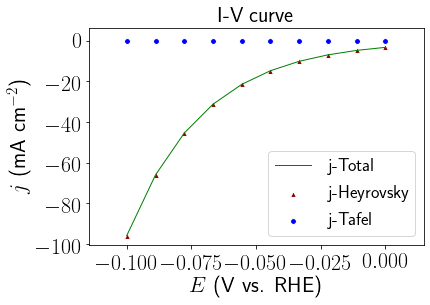

In [8]:
# simulate the IV curve on Pt(100)
Pt100_w=ElectrodeWaterInterface('Pt','100')
IV_curve_100 = Pt100_w.simulate_IV(barrier_type = 'ad_diabetic',range_U = (-0.1,0),U_ref='RHE', U_num = 10, pH = 13, initial_coverage = 0.75, iteration_number = 200,
                   mixing = 0.01, adjust=False,precision=0.001,plot=True,save_fig=True,H2O_var = 0)

  0%|          | 1/200 [00:00<00:30,  6.58it/s]

range_U_RHE -0.1 0.0
coverage at U=-0.10 V iteration complete
0.9984896480059573 0.9993657248041031
coverage at U=-0.09 V iteration complete
0.9982914437693532 0.9983094623363172
coverage at U=-0.08 V iteration complete
0.9977485309422616 0.9977978866538153
coverage at U=-0.07 V iteration complete
0.9970674576989131 0.9971293734483084
coverage at U=-0.06 V iteration complete
0.9960960214807263 0.9961843338641978
coverage at U=-0.04 V iteration complete
0.9949095104917164 0.9955681229219128
coverage at U=-0.03 V iteration complete
0.9934931261147224 0.9942738417494775
coverage at U=-0.02 V iteration complete
0.9918154589444457 0.992694896239831
coverage at U=-0.01 V iteration complete
0.9899130250557014 0.9907944678661448
coverage at U= 0.00 V iteration complete
0.987786398888898 0.9885710062372336
coverage at U=-0.10 V iteration complete
0.9985491578352551 0.9993585694533205
coverage at U=-0.09 V iteration complete
0.9982715439907378 0.9982967816129666


  2%|▏         | 3/200 [00:00<00:26,  7.57it/s]

coverage at U=-0.08 V iteration complete
0.9977562344864833 0.9978030808050519
coverage at U=-0.07 V iteration complete
0.9970639475807368 0.9971268827539865
coverage at U=-0.06 V iteration complete
0.9960979591697829 0.9961857762980515
coverage at U=-0.04 V iteration complete
0.9949083895150515 0.9955687225858542
coverage at U=-0.03 V iteration complete
0.9934936906579573 0.9942734568878329
coverage at U=-0.02 V iteration complete
0.9918152261195207 0.9926950976729594
coverage at U=-0.01 V iteration complete
0.9899130972294531 0.9907943890197789
coverage at U= 0.00 V iteration complete
0.98778638366348 0.9885710270422204
coverage at U=-0.10 V iteration complete
0.9985491568241315 0.9993585695756048
coverage at U=-0.09 V iteration complete
0.9982715443298998 0.9982967818293754
coverage at U=-0.08 V iteration complete
0.9977562343553865 0.9978030807167059
coverage at U=-0.07 V iteration complete
0.9970639476405034 0.9971268827964019
coverage at U=-0.06 V iteration complete
0.99609795913

  2%|▎         | 5/200 [00:00<00:23,  8.32it/s]

coverage at U=-0.10 V iteration complete
0.9985491568241487 0.9993585695756028
coverage at U=-0.09 V iteration complete
0.9982715443298249 0.9982967818293089
coverage at U=-0.08 V iteration complete
0.9977562343553842 0.997803080716697
coverage at U=-0.07 V iteration complete
0.997063947640488 0.9971268827963876
coverage at U=-0.06 V iteration complete
0.9960979591368042 0.9961857762735027
coverage at U=-0.04 V iteration complete
0.9949083895341232 0.9955687225756532
coverage at U=-0.03 V iteration complete
0.9934936906483485 0.994273456894379
coverage at U=-0.02 V iteration complete
0.9918152261234844 0.992695097669524
coverage at U=-0.01 V iteration complete
0.9899130972282238 0.9907943890211203
coverage at U= 0.00 V iteration complete
0.9877863836637398 0.9885710270418666
coverage at U=-0.10 V iteration complete
0.9985491568241487 0.9993585695756028
coverage at U=-0.09 V iteration complete
0.9982715443298249 0.9982967818293089
coverage at U=-0.08 V iteration complete
0.9977562343553

  4%|▎         | 7/200 [00:00<00:21,  8.82it/s]

coverage at U=-0.03 V iteration complete
0.9934936906483485 0.994273456894379
coverage at U=-0.02 V iteration complete
0.9918152261234844 0.992695097669524
coverage at U=-0.01 V iteration complete
0.9899130972282238 0.9907943890211203
coverage at U= 0.00 V iteration complete
0.9877863836637398 0.9885710270418666
coverage at U=-0.10 V iteration complete
0.9985491568241487 0.9993585695756028
coverage at U=-0.09 V iteration complete
0.9982715443298249 0.9982967818293089
coverage at U=-0.08 V iteration complete
0.9977562343553842 0.997803080716697
coverage at U=-0.07 V iteration complete
0.997063947640488 0.9971268827963876
coverage at U=-0.06 V iteration complete
0.9960979591368042 0.9961857762735027
coverage at U=-0.04 V iteration complete
0.9949083895341232 0.9955687225756532
coverage at U=-0.03 V iteration complete
0.9934936906483485 0.994273456894379
coverage at U=-0.02 V iteration complete
0.9918152261234844 0.992695097669524
coverage at U=-0.01 V iteration complete
0.989913097228223

  4%|▍         | 8/200 [00:00<00:22,  8.70it/s]

coverage at U=-0.04 V iteration complete
0.9949083895341232 0.9955687225756532
coverage at U=-0.03 V iteration complete
0.9934936906483485 0.994273456894379
coverage at U=-0.02 V iteration complete
0.9918152261234844 0.992695097669524
coverage at U=-0.01 V iteration complete
0.9899130972282238 0.9907943890211203
coverage at U= 0.00 V iteration complete
0.9877863836637398 0.9885710270418666
coverage at U=-0.10 V iteration complete
0.9985491568241487 0.9993585695756028
coverage at U=-0.09 V iteration complete
0.9982715443298249 0.9982967818293089
coverage at U=-0.08 V iteration complete
0.9977562343553842 0.997803080716697
coverage at U=-0.07 V iteration complete
0.997063947640488 0.9971268827963876
coverage at U=-0.06 V iteration complete
0.9960979591368042 0.9961857762735027
coverage at U=-0.04 V iteration complete
0.9949083895341232 0.9955687225756532
coverage at U=-0.03 V iteration complete
0.9934936906483485 0.994273456894379
coverage at U=-0.02 V iteration complete
0.99181522612348

  5%|▌         | 10/200 [00:01<00:24,  7.72it/s]

coverage at U=-0.10 V iteration complete
0.9985491568241487 0.9993585695756028
coverage at U=-0.09 V iteration complete
0.9982715443298249 0.9982967818293089
coverage at U=-0.08 V iteration complete
0.9977562343553842 0.997803080716697
coverage at U=-0.07 V iteration complete
0.997063947640488 0.9971268827963876
coverage at U=-0.06 V iteration complete
0.9960979591368042 0.9961857762735027
coverage at U=-0.04 V iteration complete
0.9949083895341232 0.9955687225756532
coverage at U=-0.03 V iteration complete
0.9934936906483485 0.994273456894379
coverage at U=-0.02 V iteration complete
0.9918152261234844 0.992695097669524
coverage at U=-0.01 V iteration complete
0.9899130972282238 0.9907943890211203
coverage at U= 0.00 V iteration complete
0.9877863836637398 0.9885710270418666
coverage at U=-0.10 V iteration complete
0.9985491568241487 0.9993585695756028
coverage at U=-0.09 V iteration complete
0.9982715443298249 0.9982967818293089
coverage at U=-0.08 V iteration complete
0.9977562343553

  6%|▌         | 12/200 [00:01<00:25,  7.44it/s]

coverage at U= 0.00 V iteration complete
0.9877863836637398 0.9885710270418666
coverage at U=-0.10 V iteration complete
0.9985491568241487 0.9993585695756028
coverage at U=-0.09 V iteration complete
0.9982715443298249 0.9982967818293089
coverage at U=-0.08 V iteration complete
0.9977562343553842 0.997803080716697
coverage at U=-0.07 V iteration complete
0.997063947640488 0.9971268827963876
coverage at U=-0.06 V iteration complete
0.9960979591368042 0.9961857762735027
coverage at U=-0.04 V iteration complete
0.9949083895341232 0.9955687225756532
coverage at U=-0.03 V iteration complete
0.993493690648347 0.9942734568943647
coverage at U=-0.02 V iteration complete
0.9918152261234878 0.9926950976695297
coverage at U=-0.01 V iteration complete
0.9899130972282235 0.9907943890211232
coverage at U= 0.00 V iteration complete
0.9877863836637385 0.9885710270418676
coverage at U=-0.10 V iteration complete
0.9985491568241486 0.9993585695756028
coverage at U=-0.09 V iteration complete
0.998271544329

  6%|▋         | 13/200 [00:01<00:24,  7.63it/s]

coverage at U=-0.04 V iteration complete
0.9949083895341232 0.9955687225756532
coverage at U=-0.03 V iteration complete
0.993493690648347 0.9942734568943647
coverage at U=-0.02 V iteration complete
0.9918152261234878 0.9926950976695297
coverage at U=-0.01 V iteration complete
0.9899130972282235 0.9907943890211232
coverage at U= 0.00 V iteration complete
0.9877863836637385 0.9885710270418676
coverage at U=-0.10 V iteration complete
0.9985491568241486 0.9993585695756028
coverage at U=-0.09 V iteration complete
0.9982715443298249 0.9982967818293089
coverage at U=-0.08 V iteration complete
0.9977562343553842 0.997803080716697
coverage at U=-0.07 V iteration complete
0.997063947640488 0.9971268827963876
coverage at U=-0.06 V iteration complete
0.9960979591368042 0.9961857762735027
coverage at U=-0.04 V iteration complete
0.9949083895341232 0.9955687225756532
coverage at U=-0.03 V iteration complete
0.9934936906483485 0.994273456894379
coverage at U=-0.02 V iteration complete
0.9918152261234

  8%|▊         | 15/200 [00:01<00:22,  8.33it/s]

coverage at U=-0.02 V iteration complete
0.9918152261234844 0.992695097669524
coverage at U=-0.01 V iteration complete
0.9899130972282238 0.9907943890211203
coverage at U= 0.00 V iteration complete
0.9877863836637398 0.9885710270418666
coverage at U=-0.10 V iteration complete
0.9985491568241487 0.9993585695756028
coverage at U=-0.09 V iteration complete
0.9982715443298249 0.9982967818293089
coverage at U=-0.08 V iteration complete
0.9977562343553842 0.997803080716697
coverage at U=-0.07 V iteration complete
0.997063947640488 0.9971268827963876
coverage at U=-0.06 V iteration complete
0.9960979591368042 0.9961857762735027
coverage at U=-0.04 V iteration complete
0.9949083895341232 0.9955687225756532
coverage at U=-0.03 V iteration complete
0.9934936906483485 0.994273456894379
coverage at U=-0.02 V iteration complete
0.9918152261234842 0.9926950976695375
coverage at U=-0.01 V iteration complete
0.9899130972282236 0.9907943890211232
coverage at U= 0.00 V iteration complete
0.9877863836637

 10%|▉         | 19/200 [00:02<00:19,  9.42it/s]

coverage at U= 0.00 V iteration complete
0.9877863836637398 0.9885710270418666
coverage at U=-0.10 V iteration complete
0.9985491568241487 0.9993585695756027
coverage at U=-0.09 V iteration complete
0.9982715443298249 0.9982967818293089
coverage at U=-0.08 V iteration complete
0.9977562343553842 0.997803080716697
coverage at U=-0.07 V iteration complete
0.997063947640488 0.9971268827963876
coverage at U=-0.06 V iteration complete
0.9960979591368042 0.9961857762735027
coverage at U=-0.04 V iteration complete
0.9949083895341232 0.9955687225756532
coverage at U=-0.03 V iteration complete
0.9934936906483485 0.994273456894379
coverage at U=-0.02 V iteration complete
0.9918152261234844 0.992695097669524
coverage at U=-0.01 V iteration complete
0.9899130972282238 0.9907943890211203
coverage at U= 0.00 V iteration complete
0.9877863836637398 0.9885710270418666
coverage at U=-0.10 V iteration complete
0.9985491568241487 0.9993585695756027
coverage at U=-0.09 V iteration complete
0.9982715443298

 10%|█         | 21/200 [00:02<00:18,  9.84it/s]

coverage at U=-0.10 V iteration complete
0.9985491567092609 0.9993585695894972
coverage at U=-0.09 V iteration complete
0.9982715443684107 0.9982967818539425
coverage at U=-0.08 V iteration complete
0.9977562343404576 0.9978030807066351
coverage at U=-0.07 V iteration complete
0.9970639476473063 0.9971268828012292
coverage at U=-0.06 V iteration complete
0.9960979591330545 0.9961857762707138
coverage at U=-0.04 V iteration complete
0.9949083895362951 0.9955687225744939
coverage at U=-0.03 V iteration complete
0.9934936906472522 0.9942734568951169
coverage at U=-0.02 V iteration complete
0.9918152261239374 0.9926950976691487
coverage at U=-0.01 V iteration complete
0.9899130972280833 0.9907943890212656
coverage at U= 0.00 V iteration complete
0.9877863836637683 0.9885710270418203
coverage at U=-0.10 V iteration complete
0.9985488474868152 0.9993582225919915
coverage at U=-0.09 V iteration complete
0.9982711206428515 0.9982963685377573
coverage at U=-0.08 V iteration complete
0.997756118

 12%|█▏        | 23/200 [00:02<00:17, 10.05it/s]

coverage at U=-0.02 V iteration complete
0.9918132966917356 0.9926926212505263
coverage at U=-0.01 V iteration complete
0.9899115843709873 0.9907924459523673
coverage at U= 0.00 V iteration complete
0.9877852092814156 0.9885696083874802
coverage at U=-0.10 V iteration complete
0.9985401666474452 0.9993473581989748
coverage at U=-0.09 V iteration complete
0.9982456927001233 0.9982724630589708
coverage at U=-0.08 V iteration complete
0.997735784787053 0.9977821400518776
coverage at U=-0.07 V iteration complete
0.9970406730931568 0.9971038650653292
coverage at U=-0.06 V iteration complete
0.9960754949861943 0.9961632384504636
coverage at U=-0.04 V iteration complete
0.9948854243141849 0.9955464530364163
coverage at U=-0.03 V iteration complete
0.9934715102960429 0.9942508267554122
coverage at U=-0.02 V iteration complete
0.9917935861469249 0.9926727739875695
coverage at U=-0.01 V iteration complete
0.9898923810388265 0.9907726324615256
coverage at U= 0.00 V iteration complete
0.9877666288

 12%|█▎        | 25/200 [00:02<00:17, 10.21it/s]

coverage at U= 0.00 V iteration complete
0.9877054635775148 0.9884898271353353
coverage at U=-0.10 V iteration complete
0.998502834886121 0.99930665073953
coverage at U=-0.09 V iteration complete
0.9981397326191606 0.998172741916157
coverage at U=-0.08 V iteration complete
0.9976384169501796 0.9976839911019052
coverage at U=-0.07 V iteration complete
0.9969194464229066 0.9969848073799314
coverage at U=-0.06 V iteration complete
0.9959415884648772 0.9960304846428799
coverage at U=-0.04 V iteration complete
0.9947345017471576 0.9954158553383711
coverage at U=-0.03 V iteration complete
0.9933094740786957 0.9941048846119791
coverage at U=-0.02 V iteration complete
0.9916203431609083 0.9925134244479656
coverage at U=-0.01 V iteration complete
0.9897111618115261 0.990599856146089
coverage at U= 0.00 V iteration complete
0.9875786686335352 0.9883664345925781
coverage at U=-0.10 V iteration complete
0.9984646442515436 0.9992689855551091
coverage at U=-0.09 V iteration complete
0.99803878095081

 14%|█▎        | 27/200 [00:02<00:16, 10.25it/s]

coverage at U=-0.10 V iteration complete
0.998407514620991 0.9992158326774334
coverage at U=-0.09 V iteration complete
0.9978943883845967 0.9979410362242689
coverage at U=-0.08 V iteration complete
0.9974057357443712 0.9974501587116644
coverage at U=-0.07 V iteration complete
0.9966205171744573 0.9966919006808131
coverage at U=-0.06 V iteration complete
0.9956027717630087 0.9956952940731404
coverage at U=-0.04 V iteration complete
0.9943417662667624 0.9950885019289618
coverage at U=-0.03 V iteration complete
0.992878232388442 0.9937291701076223
coverage at U=-0.02 V iteration complete
0.9912347137330422 0.9920138313181088
coverage at U=-0.01 V iteration complete
0.9892675172276476 0.9900611694322472
coverage at U= 0.00 V iteration complete
0.9870312635233837 0.9878703484404345
coverage at U=-0.10 V iteration complete
0.9983286441812109 0.9991428919691542
coverage at U=-0.09 V iteration complete
0.9976940170239343 0.9977517104018686
coverage at U=-0.08 V iteration complete
0.99721896856

 14%|█▍        | 29/200 [00:03<00:16, 10.24it/s]

coverage at U=-0.03 V iteration complete
0.9921128150793712 0.9929662151800057
coverage at U=-0.02 V iteration complete
0.9903917391671118 0.9911370236759778
coverage at U=-0.01 V iteration complete
0.9882768364003371 0.9891686959584809
coverage at U= 0.00 V iteration complete
0.9859912738389007 0.9868695301221954
coverage at U=-0.10 V iteration complete
0.9971527349731624 0.9979812263599974
coverage at U=-0.09 V iteration complete
0.9971819028727352 0.9974444139688909
coverage at U=-0.08 V iteration complete
0.9965953345530769 0.9966486589457731
coverage at U=-0.07 V iteration complete
0.9956410283207822 0.995727783432809
coverage at U=-0.06 V iteration complete
0.9945349104022975 0.9951728156328065
coverage at U=-0.04 V iteration complete
0.9931704286222249 0.9939286993871204
coverage at U=-0.03 V iteration complete
0.9915617571386243 0.9923931819293454
coverage at U=-0.02 V iteration complete
0.9897175348149343 0.9905500264559264
coverage at U=-0.01 V iteration complete
0.9876489698

 16%|█▌        | 31/200 [00:03<00:16, 10.07it/s]

coverage at U=-0.02 V iteration complete
0.9889511634924997 0.9897251805709542
coverage at U=-0.01 V iteration complete
0.9867474366466261 0.9875635817631628
coverage at U= 0.00 V iteration complete
0.9843447176387934 0.9851135095210307
coverage at U=-0.10 V iteration complete
0.9964765839489653 0.997279946505762
coverage at U=-0.09 V iteration complete
0.9964863426575199 0.9965741710345112
coverage at U=-0.08 V iteration complete
0.9954453343596676 0.9955399714776542
coverage at U=-0.07 V iteration complete
0.9945081107847246 0.9945933129279012
coverage at U=-0.06 V iteration complete
0.9931923175919783 0.9940039732852514
coverage at U=-0.04 V iteration complete
0.9917004886670593 0.9925564558468567
coverage at U=-0.03 V iteration complete
0.9900103398730914 0.9907483070531169
coverage at U=-0.02 V iteration complete
0.9879223101713043 0.9888004468197644
coverage at U=-0.01 V iteration complete
0.9856585850464501 0.9865212992210707
coverage at U= 0.00 V iteration complete
0.9831811612

 17%|█▋        | 34/200 [00:03<00:18,  8.95it/s]

coverage at U=-0.03 V iteration complete
0.988862339522136 0.9897258275100852
coverage at U=-0.02 V iteration complete
0.9867781702910896 0.9875370084350354
coverage at U=-0.01 V iteration complete
0.9844046720736066 0.9851564449534459
coverage at U= 0.00 V iteration complete
0.9817701645288227 0.9826359834880382
coverage at U=-0.10 V iteration complete
0.9953256629762729 0.9961374376341341
coverage at U=-0.09 V iteration complete
0.9951250204584758 0.9951432606873665
coverage at U=-0.08 V iteration complete
0.993796964058463 0.9946680578378277
coverage at U=-0.07 V iteration complete
0.9927027404526293 0.9935089699045903
coverage at U=-0.06 V iteration complete
0.991242952888275 0.992118464159596
coverage at U=-0.04 V iteration complete
0.9895210122238705 0.9904174849281754
coverage at U=-0.03 V iteration complete
0.987562316461936 0.988387377266017
coverage at U=-0.02 V iteration complete
0.9852949978243506 0.9861584203853195
coverage at U=-0.01 V iteration complete
0.982836921343032

 18%|█▊        | 35/200 [00:03<00:20,  7.88it/s]

coverage at U=-0.10 V iteration complete
0.9945384159349909 0.9953121865829292
coverage at U=-0.09 V iteration complete
0.994062852157015 0.99410608522774
coverage at U=-0.08 V iteration complete
0.9927901124074221 0.9936474307966044
coverage at U=-0.07 V iteration complete
0.9915333888076885 0.9923746821328728
coverage at U=-0.06 V iteration complete
0.9900010265579935 0.9907754491014169
coverage at U=-0.04 V iteration complete
0.9881460830506519 0.9889042549802144
coverage at U=-0.03 V iteration complete
0.9859912386921873 0.9867900243135797
coverage at U=-0.02 V iteration complete
0.9836232682827964 0.9843742288014747
coverage at U=-0.01 V iteration complete
0.9809731483853569 0.9818418038852312
coverage at U= 0.00 V iteration complete
0.9782242627201808 0.9789069779579401
coverage at U=-0.10 V iteration complete
0.9934711314650946 0.9943349006145328
coverage at U=-0.09 V iteration complete
0.9927930061787987 0.9928546539320984
coverage at U=-0.08 V iteration complete
0.991530530118

 18%|█▊        | 36/200 [00:03<00:22,  7.44it/s]

coverage at U=-0.03 V iteration complete
0.9841414139392466 0.9848601949498432
coverage at U=-0.02 V iteration complete
0.9815699707849733 0.9824049225788377
coverage at U=-0.01 V iteration complete
0.9788830557499972 0.9795539064365533
coverage at U= 0.00 V iteration complete
0.97593871148136 0.976655512783418
coverage at U=-0.10 V iteration complete
0.9922558181743476 0.9930485478569275
coverage at U=-0.09 V iteration complete
0.9913047656809886 0.9920884317318291
coverage at U=-0.08 V iteration complete
0.9900546520900396 0.9908071264976875
coverage at U=-0.07 V iteration complete
0.9884593997281055 0.9892254468257247
coverage at U=-0.06 V iteration complete
0.9865210035077372 0.9873690991436039
coverage at U=-0.04 V iteration complete
0.9843326706381305 0.9851734335923171
coverage at U=-0.03 V iteration complete
0.981904622398481 0.9826829985552308
coverage at U=-0.02 V iteration complete
0.979189737075715 0.9800793171812882
coverage at U=-0.01 V iteration complete
0.97637452307251

 18%|█▊        | 37/200 [00:04<00:24,  6.71it/s]

coverage at U= 0.00 V iteration complete
0.9733083649064607 0.9740246147602596
coverage at U=-0.10 V iteration complete
0.9906899264206681 0.9915456071241717
coverage at U=-0.09 V iteration complete
0.9896165779879464 0.9904102798581135
coverage at U=-0.08 V iteration complete
0.9881515230859369 0.9890074021689963
coverage at U=-0.07 V iteration complete
0.9864181471554853 0.9871802625236751
coverage at U=-0.06 V iteration complete
0.9843076241388962 0.9851176678442226
coverage at U=-0.04 V iteration complete
0.9819547898104442 0.9827050308492583
coverage at U=-0.03 V iteration complete
0.9792936357874829 0.9801614443232324


 19%|█▉        | 38/200 [00:04<00:30,  5.35it/s]

coverage at U=-0.02 V iteration complete
0.9765171914328906 0.9771929790404035
coverage at U=-0.01 V iteration complete
0.9734819144018195 0.9741947555944283
coverage at U= 0.00 V iteration complete
0.9702944437155868 0.9709971701399552
coverage at U=-0.10 V iteration complete
0.9888904215313662 0.989623401053209
coverage at U=-0.09 V iteration complete
0.9875856307944578 0.9883925042762433
coverage at U=-0.08 V iteration complete
0.9859919118277732 0.9867090654650574
coverage at U=-0.07 V iteration complete
0.9839929757709915 0.9847649124799702
coverage at U=-0.06 V iteration complete
0.9817189136865028 0.9824420235588289
coverage at U=-0.04 V iteration complete
0.9791132304541468 0.9799592218556039


 20%|█▉        | 39/200 [00:04<00:33,  4.83it/s]

coverage at U=-0.03 V iteration complete
0.976371136977679 0.977036432637528
coverage at U=-0.02 V iteration complete
0.9733594628920019 0.9740662273536628
coverage at U=-0.01 V iteration complete
0.9701874328108305 0.9708883936540949
coverage at U= 0.00 V iteration complete
0.9668630265791798 0.9675423982577154
coverage at U=-0.10 V iteration complete
0.9866559999625576 0.9874279903903849
coverage at U=-0.09 V iteration complete
0.9851564019556106 0.9860132048876185
coverage at U=-0.08 V iteration complete
0.983374729778557 0.9840672004755115
coverage at U=-0.07 V iteration complete
0.9811780542292213 0.9818758615171935
coverage at U=-0.06 V iteration complete
0.9786373170355809 0.9794580917945434


 20%|██        | 40/200 [00:04<00:34,  4.65it/s]

coverage at U=-0.04 V iteration complete
0.9758565435855622 0.9767546000011091
coverage at U=-0.03 V iteration complete
0.9729428556779417 0.9736163074306192
coverage at U=-0.02 V iteration complete
0.9697713250044456 0.9704689638807186
coverage at U=-0.01 V iteration complete
0.9664485600551931 0.9671258158390185
coverage at U= 0.00 V iteration complete
0.9629815497789339 0.963625708742025
coverage at U=-0.10 V iteration complete
0.9840198264654406 0.9848348219702363
coverage at U=-0.09 V iteration complete
0.982323014459232 0.9831692609546688
coverage at U=-0.08 V iteration complete
0.9802515073469111 0.981092725953998
coverage at U=-0.07 V iteration complete
0.9778556785724813 0.9786196120362073
coverage at U=-0.06 V iteration complete
0.9751071699976364 0.9759876991006988


 20%|██        | 41/200 [00:05<00:34,  4.58it/s]

coverage at U=-0.04 V iteration complete
0.9722103426488546 0.9728707283744154
coverage at U=-0.03 V iteration complete
0.9690412715346481 0.9697297504178775
coverage at U=-0.02 V iteration complete
0.9657111253662982 0.9663818718832293
coverage at U=-0.01 V iteration complete
0.9622314743939007 0.9628712597504443
coverage at U= 0.00 V iteration complete
0.9586153202989655 0.9592132173211787
coverage at U=-0.10 V iteration complete
0.9809359491987848 0.9818031953905351
coverage at U=-0.09 V iteration complete
0.9790359911044707 0.9798070284598962
coverage at U=-0.08 V iteration complete
0.9767273191433969 0.9774535551613074
coverage at U=-0.07 V iteration complete
0.9740340317585737 0.9748846756403743
coverage at U=-0.06 V iteration complete
0.9711558284679127 0.9717973043858839


 21%|██        | 42/200 [00:05<00:33,  4.74it/s]

coverage at U=-0.04 V iteration complete
0.9679870727912421 0.9686607413196809
coverage at U=-0.03 V iteration complete
0.9646433886006415 0.9653032357975226
coverage at U=-0.02 V iteration complete
0.9611424939167761 0.9617735266354991
coverage at U=-0.01 V iteration complete
0.957500866183645 0.9580915338868984
coverage at U= 0.00 V iteration complete
0.9536684162440966 0.9545566131371894
coverage at U=-0.10 V iteration complete
0.9774306436277305 0.9781077866711824
coverage at U=-0.09 V iteration complete
0.9752331892342682 0.9759069364543257
coverage at U=-0.08 V iteration complete
0.9726138009471889 0.9734213953488253
coverage at U=-0.07 V iteration complete
0.9696944190814522 0.9705809973151026
coverage at U=-0.06 V iteration complete
0.9666007860611361 0.9672319580876769
coverage at U=-0.04 V iteration complete
0.9632345871383193 0.9638790317821014


 22%|██▏       | 43/200 [00:05<00:35,  4.48it/s]

coverage at U=-0.03 V iteration complete
0.959705760766967 0.9603230130779051
coverage at U=-0.02 V iteration complete
0.9560296878436005 0.9566086777854901
coverage at U=-0.01 V iteration complete
0.9521606102662977 0.9530363962804704
coverage at U= 0.00 V iteration complete
0.9482341419846635 0.9490314841349023
coverage at U=-0.10 V iteration complete
0.9733111606484197 0.9740333092805341
coverage at U=-0.09 V iteration complete
0.970823813967414 0.971558485977176
coverage at U=-0.08 V iteration complete
0.9679457105889342 0.968791089541946


 22%|██▏       | 44/200 [00:05<00:36,  4.28it/s]

coverage at U=-0.07 V iteration complete
0.9647891330998469 0.9656888196416058
coverage at U=-0.06 V iteration complete
0.9614764939119057 0.9620786157829644
coverage at U=-0.04 V iteration complete
0.9579100678367761 0.9585089887825897
coverage at U=-0.03 V iteration complete
0.9541919278490212 0.9547540698692509
coverage at U=-0.02 V iteration complete
0.9502773428975841 0.951135107745376
coverage at U=-0.01 V iteration complete
0.9463006569486203 0.9470823612809777
coverage at U= 0.00 V iteration complete
0.942198196754167 0.9429229643220483
coverage at U=-0.10 V iteration complete
0.9685979887154739 0.9693857954714544


 22%|██▎       | 45/200 [00:06<00:37,  4.15it/s]

coverage at U=-0.09 V iteration complete
0.9658184746656069 0.9665913499526636
coverage at U=-0.08 V iteration complete
0.962676170549796 0.9635337580871807
coverage at U=-0.07 V iteration complete
0.9592811262571312 0.960167861458753
coverage at U=-0.06 V iteration complete
0.9556837175554979 0.9565673022821031
coverage at U=-0.04 V iteration complete
0.9519196725290366 0.9527764221547547
coverage at U=-0.03 V iteration complete
0.948010966213845 0.9488254460393146
coverage at U=-0.02 V iteration complete
0.9439707286653353 0.9447337342243862
coverage at U=-0.01 V iteration complete
0.9398065088623073 0.9405127293834997
coverage at U= 0.00 V iteration complete
0.9355225574988337 0.9361703986421174


 23%|██▎       | 46/200 [00:06<00:35,  4.35it/s]

coverage at U=-0.10 V iteration complete
0.9632412602961772 0.9641244261202598
coverage at U=-0.09 V iteration complete
0.9601742102408969 0.9609577243949452
coverage at U=-0.08 V iteration complete
0.9567658872039665 0.9576094775120634
coverage at U=-0.07 V iteration complete
0.9531314119219655 0.9539795198205574
coverage at U=-0.06 V iteration complete
0.9493134048630665 0.9501399186355746
coverage at U=-0.04 V iteration complete
0.9453411321007175 0.9461283322116413
coverage at U=-0.03 V iteration complete
0.9412318346348303 0.9419693950495893
coverage at U=-0.02 V iteration complete
0.9369954169744593 0.9376782418343248
coverage at U=-0.01 V iteration complete
0.9326372380124971 0.9332638520093739
coverage at U= 0.00 V iteration complete
0.928159857390351 0.9287312752877964
coverage at U=-0.10 V iteration complete
0.9572648339977247 0.9579136116146212


 24%|██▎       | 47/200 [00:06<00:32,  4.64it/s]

coverage at U=-0.09 V iteration complete
0.9538438767332182 0.9546341776378311
coverage at U=-0.08 V iteration complete
0.9501746466307565 0.9509769568911257
coverage at U=-0.07 V iteration complete
0.9462992620015154 0.9470875097019247
coverage at U=-0.06 V iteration complete
0.9422567848387498 0.9430102561516952
coverage at U=-0.04 V iteration complete
0.9380698312172912 0.9387770232239012
coverage at U=-0.03 V iteration complete
0.9337513052554232 0.934406961895915
coverage at U=-0.02 V iteration complete
0.9293080289941966 0.929911038738361
coverage at U=-0.01 V iteration complete
0.9247432668843877 0.9252938058183022
coverage at U= 0.00 V iteration complete
0.9200582302466992 0.9205588700113451
coverage at U=-0.10 V iteration complete
0.9504888746062824 0.9512462987350712
coverage at U=-0.09 V iteration complete
0.9467949495209035 0.9475409425873785
coverage at U=-0.08 V iteration complete
0.9428601195543003 0.943604001421489
coverage at U=-0.07 V iteration complete
0.938741683584

 24%|██▍       | 48/200 [00:06<00:30,  4.96it/s]

coverage at U=-0.06 V iteration complete
0.9344686940052324 0.9351430066646962
coverage at U=-0.04 V iteration complete
0.9300578956113754 0.9306840387352995
coverage at U=-0.03 V iteration complete
0.9255185199540809 0.9260944783235368
coverage at U=-0.02 V iteration complete
0.9208549249961495 0.9213817052356211
coverage at U=-0.01 V iteration complete
0.9160685771589501 0.9165489036048058
coverage at U= 0.00 V iteration complete
0.9111105054801969 0.9119930908314324
coverage at U=-0.10 V iteration complete
0.9429922172180351 0.9435389694299686
coverage at U=-0.09 V iteration complete
0.9389755334099915 0.9396750266143047
coverage at U=-0.08 V iteration complete
0.9347771984842091 0.9354495336617915
coverage at U=-0.07 V iteration complete
0.9304103517595813 0.9310469074725184
coverage at U=-0.06 V iteration complete
0.9258979764215164 0.9264914271571218
coverage at U=-0.04 V iteration complete
0.9212515512889431 0.9217995279724192
coverage at U=-0.03 V iteration complete
0.916477003

 25%|██▌       | 50/200 [00:06<00:27,  5.50it/s]

coverage at U=-0.02 V iteration complete
0.9115764848312224 0.912036093152938
coverage at U=-0.01 V iteration complete
0.9065030927618034 0.907358658102885
coverage at U= 0.00 V iteration complete
0.9013539251412265 0.902140513941691
coverage at U=-0.10 V iteration complete
0.9346213053561216 0.935306369467361
coverage at U=-0.09 V iteration complete
0.9303440868462701 0.9309696376447882
coverage at U=-0.08 V iteration complete
0.9258754493009106 0.9264735143554061
coverage at U=-0.07 V iteration complete
0.9212513369738148 0.9218109286861403
coverage at U=-0.06 V iteration complete
0.9164867696596081 0.9170048869623547
coverage at U=-0.04 V iteration complete
0.9115892666611412 0.9120663674986025
coverage at U=-0.03 V iteration complete
0.9065128484075404 0.9073971701595088
coverage at U=-0.02 V iteration complete
0.9013602086357697 0.9021748328548206
coverage at U=-0.01 V iteration complete
0.8960733873934346 0.8968401548955712
coverage at U= 0.00 V iteration complete
0.8906515139388

 26%|██▌       | 51/200 [00:07<00:26,  5.70it/s]

coverage at U=-0.10 V iteration complete
0.9254298908766505 0.9259300500019229
coverage at U=-0.09 V iteration complete
0.9208421895970857 0.9214019453166579
coverage at U=-0.08 V iteration complete
0.9160969697087883 0.9166221927806179
coverage at U=-0.07 V iteration complete
0.9112025412731672 0.9116915800324477
coverage at U=-0.06 V iteration complete
0.9061689706029212 0.9066217625979188
coverage at U=-0.04 V iteration complete
0.9009534614977351 0.9018073036290479
coverage at U=-0.03 V iteration complete
0.8956540759883556 0.8964449502830776
coverage at U=-0.02 V iteration complete
0.8902160113500801 0.8909641200508042
coverage at U=-0.01 V iteration complete
0.8846378288755865 0.885347285588815
coverage at U= 0.00 V iteration complete
0.8789151284621013 0.8795915168470144
coverage at U=-0.10 V iteration complete
0.9152654638922664 0.9159650717193214
coverage at U=-0.09 V iteration complete
0.9104114866579249 0.910899578106501
coverage at U=-0.08 V iteration complete
0.90537429001

 26%|██▌       | 52/200 [00:07<00:25,  5.88it/s]

coverage at U=-0.07 V iteration complete
0.900142958822504 0.9010122190352514
coverage at U=-0.06 V iteration complete
0.8948226282878595 0.8956321633667921
coverage at U=-0.04 V iteration complete
0.8893594784092569 0.8901293732957373
coverage at U=-0.03 V iteration complete
0.8837531595914433 0.8844867651031785
coverage at U=-0.02 V iteration complete
0.8780003434887028 0.8787008105423603
coverage at U=-0.01 V iteration complete
0.8720965463918964 0.8727689104532662
coverage at U= 0.00 V iteration complete
0.8660360389501152 0.8666857967740087
coverage at U=-0.10 V iteration complete
0.9041566525060615 0.9046981207680577
coverage at U=-0.09 V iteration complete
0.8989265904665583 0.8997987718863615
coverage at U=-0.08 V iteration complete
0.8935829952722261 0.8944059057984121
coverage at U=-0.07 V iteration complete
0.8880883524423134 0.8888764620580538
coverage at U=-0.06 V iteration complete
0.8824450453004097 0.8831981468335364
coverage at U=-0.04 V iteration complete
0.8766519593

 27%|██▋       | 54/200 [00:07<00:23,  6.22it/s]

coverage at U=-0.02 V iteration complete
0.8645999216534486 0.8652738067901561
coverage at U=-0.01 V iteration complete
0.8583293431675407 0.8589885101115216
coverage at U= 0.00 V iteration complete
0.8518857181309039 0.8525340217268002
coverage at U=-0.10 V iteration complete
0.8919230572505523 0.892803269914551
coverage at U=-0.09 V iteration complete
0.8864033672221824 0.8871990125674689
coverage at U=-0.08 V iteration complete
0.8807185923497766 0.881487189763328
coverage at U=-0.07 V iteration complete
0.8748767538970889 0.8756182686905127
coverage at U=-0.06 V iteration complete
0.8688765676651222 0.8695933084183064
coverage at U=-0.04 V iteration complete
0.8627141430293899 0.8634109853389049
coverage at U=-0.03 V iteration complete
0.8563837496192075 0.8570659984668084
coverage at U=-0.02 V iteration complete
0.8498783009050171 0.8505520030842133
coverage at U=-0.01 V iteration complete
0.8431892962609411 0.843861008050415
coverage at U= 0.00 V iteration complete
0.836307524288

 28%|██▊       | 55/200 [00:07<00:22,  6.33it/s]

coverage at U=-0.09 V iteration complete
0.8726758211777228 0.8734317364732325
coverage at U=-0.08 V iteration complete
0.8666149637671287 0.8673501909693195
coverage at U=-0.07 V iteration complete
0.8603857465231517 0.8611052687575353
coverage at U=-0.06 V iteration complete
0.8539833099337139 0.854691498615163
coverage at U=-0.04 V iteration complete
0.8474017989584556 0.8481025501632794
coverage at U=-0.03 V iteration complete
0.8406335308725521 0.8413328416849112
coverage at U=-0.02 V iteration complete
0.8336693286640148 0.8343737831913918
coverage at U=-0.01 V iteration complete
0.8264988276202871 0.8272152977772708
coverage at U= 0.00 V iteration complete
0.81911040362713 0.8198464734721598
coverage at U=-0.10 V iteration complete
0.8639255060991149 0.8646093135107755
coverage at U=-0.09 V iteration complete
0.8576154135045763 0.8583576398057094
coverage at U=-0.08 V iteration complete
0.8511311784459048 0.8518631467448233
coverage at U=-0.07 V iteration complete
0.844461953027

 28%|██▊       | 56/200 [00:07<00:22,  6.38it/s]

coverage at U=-0.04 V iteration complete
0.8305391304516935 0.831276727603051
coverage at U=-0.03 V iteration complete
0.8232664188846638 0.8240192767918534
coverage at U=-0.02 V iteration complete
0.8157709792076865 0.8165471891469207
coverage at U=-0.01 V iteration complete
0.808039687717878 0.8088480591623942
coverage at U= 0.00 V iteration complete
0.800057902059793 0.8009085352745003
coverage at U=-0.10 V iteration complete
0.8478356379381167 0.8484998572815711
coverage at U=-0.09 V iteration complete
0.8410599308455897 0.8418179640922645
coverage at U=-0.08 V iteration complete
0.8340935845707974 0.8348552143271981
coverage at U=-0.07 V iteration complete
0.8269198553239903 0.8276934167891112
coverage at U=-0.06 V iteration complete
0.8195290589185493 0.8203217402044417
coverage at U=-0.04 V iteration complete
0.8119095205837639 0.8127295623060431
coverage at U=-0.03 V iteration complete
0.8040479374972886 0.8049046843792512
coverage at U=-0.02 V iteration complete
0.795977251703

 29%|██▉       | 58/200 [00:08<00:22,  6.34it/s]

coverage at U= 0.00 V iteration complete
0.778908666080257 0.7794185941742862
coverage at U=-0.10 V iteration complete
0.8301190990744709 0.8308160241495324
coverage at U=-0.09 V iteration complete
0.8228116802578156 0.8236242314553971
coverage at U=-0.08 V iteration complete
0.8152886837452175 0.8161241750047787
coverage at U=-0.07 V iteration complete
0.8075288549075426 0.8083980662130671
coverage at U=-0.06 V iteration complete
0.7995675639834142 0.8000046610652041
coverage at U=-0.04 V iteration complete
0.7912956144501434 0.7917671597331378
coverage at U=-0.03 V iteration complete
0.782743175689649 0.7832527388429836
coverage at U=-0.02 V iteration complete
0.7738909414798587 0.7744473561793302
coverage at U=-0.01 V iteration complete
0.7647175621460419 0.7653313851376818
coverage at U= 0.00 V iteration complete
0.7552000415700175 0.7558849218337574
coverage at U=-0.10 V iteration complete
0.8105493392070511 0.8113504679532945
coverage at U=-0.09 V iteration complete
0.80267417189

 30%|██▉       | 59/200 [00:08<00:22,  6.27it/s]

coverage at U=-0.08 V iteration complete
0.7945011552281472 0.7949777914237102
coverage at U=-0.07 V iteration complete
0.7860547703060501 0.786566421729524
coverage at U=-0.06 V iteration complete
0.7773175325594455 0.7778728517110112
coverage at U=-0.04 V iteration complete
0.7682702039544961 0.768879379937608
coverage at U=-0.03 V iteration complete
0.7588909844357455 0.7595649484028417
coverage at U=-0.02 V iteration complete
0.7491555526616296 0.7499089432942446
coverage at U=-0.01 V iteration complete
0.7390380244415247 0.7398882425701416
coverage at U= 0.00 V iteration complete
0.7285672175553288 0.7290864029301419
coverage at U=-0.10 V iteration complete
0.7888930673983782 0.7893853999568557
coverage at U=-0.09 V iteration complete
0.7802509373677933 0.7808074993316279
coverage at U=-0.08 V iteration complete
0.7713081904662951 0.7719146964596556
coverage at U=-0.07 V iteration complete
0.762042778224362 0.7627105476881701
coverage at U=-0.06 V iteration complete
0.752432753425

 30%|███       | 60/200 [00:08<00:22,  6.10it/s]

coverage at U=-0.04 V iteration complete
0.7424536792531083 0.7432862455315022
coverage at U=-0.03 V iteration complete
0.7321346180456989 0.7326386388911796
coverage at U=-0.02 V iteration complete
0.721342504413979 0.7219319368015198
coverage at U=-0.01 V iteration complete
0.7100923727455318 0.7107799717959334
coverage at U= 0.00 V iteration complete
0.6983503272237905 0.6991581764091345
coverage at U=-0.10 V iteration complete
0.7647019238090131 0.7654016398726788
coverage at U=-0.09 V iteration complete
0.7552011690489753 0.7559384106006789
coverage at U=-0.08 V iteration complete
0.745337204191551 0.7461600824471645
coverage at U=-0.07 V iteration complete
0.7351437048805556 0.7356376035758522
coverage at U=-0.06 V iteration complete
0.7244895428707921 0.7250627094038329
coverage at U=-0.04 V iteration complete
0.7133952634795084 0.7140610343093008
coverage at U=-0.03 V iteration complete
0.7018282734745005 0.7026062601232023


 30%|███       | 61/200 [00:08<00:23,  5.92it/s]

coverage at U=-0.02 V iteration complete
0.6898090912592579 0.6903360813511541
coverage at U=-0.01 V iteration complete
0.6771968455687483 0.677833240843644
coverage at U= 0.00 V iteration complete
0.6640018913334168 0.6647656790085144
coverage at U=-0.10 V iteration complete
0.7376328331532629 0.7382096648974247
coverage at U=-0.09 V iteration complete
0.7271081869500101 0.7276715200408337
coverage at U=-0.08 V iteration complete
0.716142540231281 0.7167928600638519
coverage at U=-0.07 V iteration complete
0.7047173326844421 0.7054726148129626
coverage at U=-0.06 V iteration complete
0.6928013758866455 0.6936826332703895
coverage at U=-0.04 V iteration complete
0.6804245472176186 0.6810305503566396
coverage at U=-0.03 V iteration complete
0.6674300777386695 0.66815871770724
coverage at U=-0.02 V iteration complete
0.6538383593185375 0.6547073584222479


 31%|███       | 62/200 [00:08<00:24,  5.68it/s]

coverage at U=-0.01 V iteration complete
0.6396894873873542 0.6403371975459251
coverage at U= 0.00 V iteration complete
0.6248182310776376 0.6256020975113267
coverage at U=-0.10 V iteration complete
0.7071009597648528 0.7076627442232984
coverage at U=-0.09 V iteration complete
0.6952926492324673 0.696154163034321
coverage at U=-0.08 V iteration complete
0.6830651034679573 0.6836517178740377
coverage at U=-0.07 V iteration complete
0.6702358878597646 0.670937933486873
coverage at U=-0.06 V iteration complete
0.65683263694842 0.6576663198684958
coverage at U=-0.04 V iteration complete
0.6428860411362172 0.6435027280385456
coverage at U=-0.03 V iteration complete
0.6282465100344828 0.6289907286790929
coverage at U=-0.02 V iteration complete
0.6129511014497528 0.6138359224810751
coverage at U=-0.01 V iteration complete
0.5970649880736215 0.5977536001828047


 32%|███▏      | 63/200 [00:09<00:25,  5.45it/s]

coverage at U= 0.00 V iteration complete
0.5804537881901792 0.5812659175243098
coverage at U=-0.10 V iteration complete
0.6724832841821674 0.6731147091977444
coverage at U=-0.09 V iteration complete
0.6592295596031237 0.6600377749819973
coverage at U=-0.08 V iteration complete
0.6454565620362536 0.6460498228499433
coverage at U=-0.07 V iteration complete
0.6310120146837574 0.6317256213313238
coverage at U=-0.06 V iteration complete
0.6159322280528752 0.616778882666395
coverage at U=-0.04 V iteration complete
0.6002758097854574 0.6009303329601352
coverage at U=-0.03 V iteration complete
0.5839155476677171 0.5846878770653754
coverage at U=-0.02 V iteration complete
0.5669400087229927 0.5678293831859476
coverage at U=-0.01 V iteration complete
0.5494768895350239 0.5501699050560913


 32%|███▏      | 64/200 [00:09<00:26,  5.19it/s]

coverage at U= 0.00 V iteration complete
0.5314616480375521 0.5322349643765841
coverage at U=-0.10 V iteration complete
0.6331376533211661 0.6339090049090954
coverage at U=-0.09 V iteration complete
0.6182585722220415 0.619076600406312
coverage at U=-0.08 V iteration complete
0.6028038232105776 0.6034344500417578
coverage at U=-0.07 V iteration complete
0.5866608241531789 0.5874036109986787
coverage at U=-0.06 V iteration complete
0.5699149131843639 0.5707706592770547
coverage at U=-0.04 V iteration complete
0.5526855845508334 0.553351248966532
coverage at U=-0.03 V iteration complete
0.5349063908329 0.5356516158714407
coverage at U=-0.02 V iteration complete
0.51674604671361 0.5175543090216583
coverage at U=-0.01 V iteration complete
0.4983334275893171 0.4991855706721838


 32%|███▎      | 65/200 [00:09<00:27,  4.91it/s]

coverage at U= 0.00 V iteration complete
0.4798174022958472 0.48069154819120213
coverage at U=-0.10 V iteration complete
0.5886806102728124 0.5893140983654507
coverage at U=-0.09 V iteration complete
0.5721158363913403 0.5729574871743429
coverage at U=-0.08 V iteration complete
0.5550925874573833 0.5557463560377572
coverage at U=-0.07 V iteration complete
0.537519316125637 0.5382532043705018
coverage at U=-0.06 V iteration complete
0.5195565873328412 0.5203555511798591
coverage at U=-0.04 V iteration complete
0.5013254406980796 0.5021715039054921
coverage at U=-0.03 V iteration complete
0.4829681883696893 0.48383950755864513
coverage at U=-0.02 V iteration complete
0.46463816627515864 0.4655115206941259


 33%|███▎      | 66/200 [00:09<00:28,  4.71it/s]

coverage at U=-0.01 V iteration complete
0.44648783372797063 0.4473412317555752
coverage at U= 0.00 V iteration complete
0.42865691580613074 0.42947176283521243
coverage at U=-0.10 V iteration complete
0.5389921098992044 0.5397783190056545
coverage at U=-0.09 V iteration complete
0.5211879575668127 0.5220198751611118
coverage at U=-0.08 V iteration complete
0.5030919389110531 0.5039777979833959
coverage at U=-0.07 V iteration complete
0.4849233838260728 0.48558190576882165
coverage at U=-0.06 V iteration complete
0.4666890463534035 0.4673576078965565
coverage at U=-0.04 V iteration complete
0.4486159748050495 0.4492726069899621
coverage at U=-0.03 V iteration complete
0.4307789637434719 0.43164950583974715


 34%|███▎      | 67/200 [00:10<00:29,  4.54it/s]

coverage at U=-0.02 V iteration complete
0.4134470489653054 0.4142581146237287
coverage at U=-0.01 V iteration complete
0.39664008188941674 0.39738434163770225
coverage at U= 0.00 V iteration complete
0.38041889846327154 0.381090445539022
coverage at U=-0.10 V iteration complete
0.48413161749790395 0.48493905987829844
coverage at U=-0.09 V iteration complete
0.46584933424630415 0.4667075931779806
coverage at U=-0.08 V iteration complete
0.4477590939894885 0.44860059352350734
coverage at U=-0.07 V iteration complete
0.43002189573420346 0.43081949917337964
coverage at U=-0.06 V iteration complete
0.41278157786914016 0.4135120645875168
coverage at U=-0.04 V iteration complete
0.3960684419360628 0.39696062004073146


 34%|███▍      | 68/200 [00:10<00:29,  4.40it/s]

coverage at U=-0.03 V iteration complete
0.38009736581207176 0.3808794229663536
coverage at U=-0.02 V iteration complete
0.36479934873620745 0.3654787812383325
coverage at U=-0.01 V iteration complete
0.35008625059616827 0.3509142724683009
coverage at U= 0.00 V iteration complete
0.3360717480462991 0.3367916154338955
coverage at U=-0.10 V iteration complete
0.4194035271118382 0.4202174397969034
coverage at U=-0.09 V iteration complete
0.40254693534473757 0.40333080243720343
coverage at U=-0.08 V iteration complete
0.3866998515757957 0.3875078686424028
coverage at U=-0.07 V iteration complete
0.37183413415825967 0.37266845052651215
coverage at U=-0.06 V iteration complete
0.3578091150297469 0.358690427519822


 34%|███▍      | 69/200 [00:10<00:30,  4.30it/s]

coverage at U=-0.04 V iteration complete
0.3445545807147101 0.34526356183905915
coverage at U=-0.03 V iteration complete
0.33178623457470374 0.3325877113166196
coverage at U=-0.02 V iteration complete
0.31955007954288356 0.32021972160073947
coverage at U=-0.01 V iteration complete
0.3076232457128494 0.3084450197982104
coverage at U= 0.00 V iteration complete
0.29609965704743574 0.29682161329774415
coverage at U=-0.10 V iteration complete
0.3296794571732819 0.3304999959487668
coverage at U=-0.09 V iteration complete
0.32561953279028166 0.32643552234073514
coverage at U=-0.08 V iteration complete
0.3198977181957441 0.32061052254777406
coverage at U=-0.07 V iteration complete
0.3129707982359112 0.31373207605195297
coverage at U=-0.06 V iteration complete
0.3052791701275863 0.3060050150214066


 35%|███▌      | 70/200 [00:10<00:29,  4.43it/s]

coverage at U=-0.04 V iteration complete
0.29702292230825666 0.2976885716332562
coverage at U=-0.03 V iteration complete
0.28828128513589246 0.28914953676747424
coverage at U=-0.02 V iteration complete
0.2793169463616796 0.28011810144632787
coverage at U=-0.01 V iteration complete
0.27014736160041514 0.27089955352651224
coverage at U= 0.00 V iteration complete
0.2608558812241758 0.26157058284319556
coverage at U=-0.10 V iteration complete
0.27001254112587153 0.270639443422801
coverage at U=-0.09 V iteration complete
0.2704197632814214 0.27123050871660187
coverage at U=-0.08 V iteration complete
0.26941604706814015 0.2702408471828836
coverage at U=-0.07 V iteration complete
0.2669568517872471 0.267675518013382
coverage at U=-0.06 V iteration complete
0.26309637992225526 0.2638213907284756
coverage at U=-0.04 V iteration complete
0.2580192276843074 0.2589065553565373
coverage at U=-0.03 V iteration complete
0.25206278791428016 0.25271913900757914
coverage at U=-0.02 V iteration complete


 36%|███▌      | 72/200 [00:11<00:23,  5.39it/s]

coverage at U=-0.01 V iteration complete
0.2379391211288562 0.23868862896888987
coverage at U= 0.00 V iteration complete
0.2301848822958273 0.23096653236775214
coverage at U=-0.10 V iteration complete
0.2357135990710666 0.23626507864355648
coverage at U=-0.09 V iteration complete
0.23611163731704707 0.2367832689509867
coverage at U=-0.08 V iteration complete
0.23556927063453043 0.23623768369075077
coverage at U=-0.07 V iteration complete
0.23388755072963624 0.23477556589168214
coverage at U=-0.06 V iteration complete
0.23115218207970337 0.23173499355754953
coverage at U=-0.04 V iteration complete
0.2272090007672815 0.22804189683558918
coverage at U=-0.03 V iteration complete
0.22235486994765039 0.22301426338015637
coverage at U=-0.02 V iteration complete
0.2166101938730605 0.2174043903479943
coverage at U=-0.01 V iteration complete
0.2102742514453517 0.21085713726979316
coverage at U= 0.00 V iteration complete
0.20339264549554287 0.2040487956120183
coverage at U=-0.10 V iteration compl

 36%|███▋      | 73/200 [00:11<00:21,  5.89it/s]

coverage at U=-0.06 V iteration complete
0.20556005968503208 0.2063535417873305
coverage at U=-0.04 V iteration complete
0.20185928163385408 0.20255142430828313
coverage at U=-0.03 V iteration complete
0.1972711025027705 0.1978415610057236
coverage at U=-0.02 V iteration complete
0.19187135385724297 0.19259030621783985
coverage at U=-0.01 V iteration complete
0.18586743070178235 0.18671916170848774
coverage at U= 0.00 V iteration complete
0.17949196994926114 0.1801198045899355
coverage at U=-0.10 V iteration complete
0.1910795777469725 0.1919795163114351
coverage at U=-0.09 V iteration complete
0.19049563929022065 0.1911854027410576
coverage at U=-0.08 V iteration complete
0.18914876938497113 0.1897051246383407
coverage at U=-0.07 V iteration complete
0.18693207244309157 0.18750505350277177
coverage at U=-0.06 V iteration complete
0.18378032716324677 0.18466246665400143
coverage at U=-0.04 V iteration complete
0.17984312489803447 0.18058142496844395
coverage at U=-0.03 V iteration comp

 38%|███▊      | 75/200 [00:11<00:19,  6.26it/s]

coverage at U=-0.01 V iteration complete
0.1639289909371 0.16451595882796768
coverage at U= 0.00 V iteration complete
0.15772171661345794 0.15839902163130143
coverage at U=-0.10 V iteration complete
0.17409764463108365 0.17472459987438071
coverage at U=-0.09 V iteration complete
0.17282280362736843 0.17331614961956063
coverage at U=-0.08 V iteration complete
0.1707212668426092 0.1716018286524605
coverage at U=-0.07 V iteration complete
0.16788392160585716 0.16866127555245972
coverage at U=-0.06 V iteration complete
0.16425252944842678 0.16493108564761746
coverage at U=-0.04 V iteration complete
0.15989569898532732 0.16047157744943688
coverage at U=-0.03 V iteration complete
0.15487201623379576 0.15561290722202145
coverage at U=-0.02 V iteration complete
0.14936969987757318 0.1502574255628901
coverage at U=-0.01 V iteration complete
0.14360752345599878 0.14428090389519274
coverage at U= 0.00 V iteration complete
0.13757725767335355 0.13833200461362816
coverage at U=-0.10 V iteration com

 38%|███▊      | 76/200 [00:11<00:19,  6.24it/s]

coverage at U=-0.08 V iteration complete
0.1537055905178007 0.15451695357578593
coverage at U=-0.07 V iteration complete
0.15015740523238075 0.15085450603077868
coverage at U=-0.06 V iteration complete
0.14594014975930386 0.1465375955735656
coverage at U=-0.04 V iteration complete
0.14110521449900526 0.1418717562170504
coverage at U=-0.03 V iteration complete
0.1359017708452632 0.13651094447702325
coverage at U=-0.02 V iteration complete
0.1303391831207987 0.13104720507988007
coverage at U=-0.01 V iteration complete
0.12460166464235989 0.1253851113385867
coverage at U= 0.00 V iteration complete
0.11878686253704357 0.11962611695880453
coverage at U=-0.10 V iteration complete
0.14390408723225961 0.1444664171865793
coverage at U=-0.09 V iteration complete
0.1409352408510572 0.14149329625082235
coverage at U=-0.08 V iteration complete
0.1372523542540904 0.13804369745016698
coverage at U=-0.07 V iteration complete
0.13303708808027528 0.1337000697704882
coverage at U=-0.06 V iteration comple

 38%|███▊      | 77/200 [00:11<00:20,  6.11it/s]

coverage at U=-0.04 V iteration complete
0.12320336379837325 0.12386289676358286
coverage at U=-0.03 V iteration complete
0.1178300307474587 0.11858437874781409
coverage at U=-0.02 V iteration complete
0.11232651587601679 0.11315017600288763
coverage at U=-0.01 V iteration complete
0.10677834994318564 0.10765011408991972
coverage at U= 0.00 V iteration complete
0.10132954007285476 0.10198160980883943
coverage at U=-0.10 V iteration complete
0.12911930203202446 0.12979476798228945
coverage at U=-0.09 V iteration complete
0.12532455021040123 0.12592404986900727
coverage at U=-0.08 V iteration complete
0.12096085405758522 0.12173352703117382
coverage at U=-0.07 V iteration complete
0.1162612416527341 0.11688868531499443
coverage at U=-0.06 V iteration complete
0.11121518820268739 0.1119487622599149
coverage at U=-0.04 V iteration complete
0.10599451538206417 0.10680325293150421
coverage at U=-0.03 V iteration complete
0.10069712290079397 0.10156220946797087


 39%|███▉      | 78/200 [00:12<00:20,  5.92it/s]

coverage at U=-0.02 V iteration complete
0.09546768402967705 0.0961222296980312
coverage at U=-0.01 V iteration complete
0.0902200678100002 0.09090812596761859
coverage at U= 0.00 V iteration complete
0.08506430201696784 0.08576724238331142
coverage at U=-0.10 V iteration complete
0.11399260234393366 0.11481464027871084
coverage at U=-0.09 V iteration complete
0.10953105455218963 0.11041838719900615
coverage at U=-0.08 V iteration complete
0.1048207586180396 0.10553215567799722
coverage at U=-0.07 V iteration complete
0.0998444611108376 0.10064550246265708
coverage at U=-0.06 V iteration complete
0.09476976799647902 0.09562974065084133
coverage at U=-0.04 V iteration complete
0.0896744227284195 0.09057296502518232
coverage at U=-0.03 V iteration complete
0.0846921804796491 0.08537492918766922
coverage at U=-0.02 V iteration complete
0.07971460509089384 0.08042158236171236
coverage at U=-0.01 V iteration complete
0.07484938215503442 0.07556302686595255


 40%|████      | 80/200 [00:12<00:21,  5.52it/s]

coverage at U= 0.00 V iteration complete
0.07011629578252367 0.07083025037717573
coverage at U=-0.10 V iteration complete
0.09870287383901895 0.09936815379759026
coverage at U=-0.09 V iteration complete
0.09391365815468243 0.09471715025657614
coverage at U=-0.08 V iteration complete
0.08903179089788057 0.08988965816353021
coverage at U=-0.07 V iteration complete
0.08412167206934568 0.08501837521222654
coverage at U=-0.06 V iteration complete
0.07931786715452217 0.08000290168274268
coverage at U=-0.04 V iteration complete
0.07451252810393634 0.07522127283943332
coverage at U=-0.03 V iteration complete
0.06981635081365753 0.07052740210089549
coverage at U=-0.02 V iteration complete
0.06524902965998433 0.06595721321980604
coverage at U=-0.01 V iteration complete
0.06074768242812968 0.06164448640875525
coverage at U= 0.00 V iteration complete
0.05648548273117414 0.057339628956045385


 40%|████      | 81/200 [00:12<00:22,  5.18it/s]

coverage at U=-0.10 V iteration complete
0.08354133103132409 0.0842847194978025
coverage at U=-0.09 V iteration complete
0.07875540897735159 0.07965538129573312
coverage at U=-0.08 V iteration complete
0.07411866365054834 0.07480461495179117
coverage at U=-0.07 V iteration complete
0.06947674771576429 0.07018319914029723
coverage at U=-0.06 V iteration complete
0.06494545316426445 0.06565007691394929
coverage at U=-0.04 V iteration complete
0.060465383642059806 0.06136033207757186
coverage at U=-0.03 V iteration complete
0.05621580868921366 0.057067824743503394
coverage at U=-0.02 V iteration complete
0.05211457162732131 0.052935338886974485
coverage at U=-0.01 V iteration complete
0.048177820591452536 0.0489603094478114
coverage at U= 0.00 V iteration complete
0.044408412888946376 0.045148783002982786


 41%|████      | 82/200 [00:12<00:22,  5.19it/s]

coverage at U=-0.10 V iteration complete
0.06907201229174104 0.06985746739441424
coverage at U=-0.09 V iteration complete
0.06462423791892095 0.06531952815811895
coverage at U=-0.08 V iteration complete
0.060173864612890066 0.06106399447574882
coverage at U=-0.07 V iteration complete
0.055942899745932875 0.05679245132768447
coverage at U=-0.06 V iteration complete
0.05185344489952111 0.052671459340029675
coverage at U=-0.04 V iteration complete
0.047922527940105326 0.04870290031578628
coverage at U=-0.03 V iteration complete
0.04415799034900364 0.04489545447953247
coverage at U=-0.02 V iteration complete
0.04048694102184174 0.041337144079312486
coverage at U=-0.01 V iteration complete
0.03708280508948289 0.037848147460869126
coverage at U= 0.00 V iteration complete
0.033766198995711406 0.03461710464168025
coverage at U=-0.10 V iteration complete
0.05569118273563315 0.056499345070593975


 42%|████▏     | 83/200 [00:13<00:22,  5.10it/s]

coverage at U=-0.09 V iteration complete
0.05160054993804522 0.0524193610527621
coverage at U=-0.08 V iteration complete
0.0476803749180921 0.04845714642143809
coverage at U=-0.07 V iteration complete
0.043921205191509376 0.04465631940179918
coverage at U=-0.06 V iteration complete
0.04025475727148878 0.04109926827111321
coverage at U=-0.04 V iteration complete
0.03685377913450568 0.037614022480117644
coverage at U=-0.03 V iteration complete
0.03354170243088094 0.03438396549461808
coverage at U=-0.02 V iteration complete
0.03042504717419535 0.031310081425103074
coverage at U=-0.01 V iteration complete
0.02757857283577605 0.02834142006922312
coverage at U= 0.00 V iteration complete
0.024821173413534684 0.025622654290168433
coverage at U=-0.10 V iteration complete
0.043669582926452975 0.04447865397691681


 42%|████▎     | 85/200 [00:13<00:18,  6.33it/s]

coverage at U=-0.09 V iteration complete
0.04004913675819991 0.04087971968545393
coverage at U=-0.08 V iteration complete
0.036646024556348404 0.03740163579011744
coverage at U=-0.07 V iteration complete
0.033338722281643356 0.0341731430039927
coverage at U=-0.06 V iteration complete
0.0302260429635761 0.031100369578260303
coverage at U=-0.04 V iteration complete
0.027300391940881085 0.028198239995042472
coverage at U=-0.03 V iteration complete
0.024650140452648718 0.025410809448931752
coverage at U=-0.02 V iteration complete
0.022085562858461447 0.022869022739423914
coverage at U=-0.01 V iteration complete
0.019648075885060075 0.02053223620676868
coverage at U= 0.00 V iteration complete
0.01750608402464417 0.018306416476915704
coverage at U=-0.10 V iteration complete
0.0331870997661066 0.03396993410703623
coverage at U=-0.09 V iteration complete
0.03004899468700465 0.03092154803444993
coverage at U=-0.08 V iteration complete
0.027132607952647 0.028017758618167778
coverage at U=-0.07 V

 44%|████▎     | 87/200 [00:13<00:14,  7.64it/s]

coverage at U=-0.10 V iteration complete
0.024289380453473845 0.025126594023456187
coverage at U=-0.09 V iteration complete
0.02172516162331772 0.022594015304406596
coverage at U=-0.08 V iteration complete
0.019391204803700244 0.020213933563645595
coverage at U=-0.07 V iteration complete
0.017233939703806475 0.018016409469820555
coverage at U=-0.06 V iteration complete
0.015182808056909722 0.01602584531383726
coverage at U=-0.04 V iteration complete
0.013499347131228159 0.014128926745325161
coverage at U=-0.03 V iteration complete
0.011892170685963032 0.012439114776442184
coverage at U=-0.02 V iteration complete
0.010463938867956454 0.010906471855368152
coverage at U=-0.01 V iteration complete
0.009168025828242284 0.009533219695157927
coverage at U= 0.00 V iteration complete
0.008008572335986211 0.008306559540110482
coverage at U=-0.10 V iteration complete
0.017120118955524573 0.01791671959464044
coverage at U=-0.09 V iteration complete
0.01509917591886054 0.015918549255100153
coverage

 47%|████▋     | 94/200 [00:13<00:08, 12.14it/s]

coverage at U=-0.10 V iteration complete
0.004480753220636764 0.005353291077118045
coverage at U=-0.09 V iteration complete
0.004485680054648625 0.004530021560755378
coverage at U=-0.08 V iteration complete
0.0037755525804759925 0.0038401096235825953
coverage at U=-0.07 V iteration complete
0.0032599881934570448 0.00330685768318604
coverage at U=-0.06 V iteration complete
0.0027924244260276905 0.002834930223066723
coverage at U=-0.04 V iteration complete
0.0023908808034106117 0.002427384769103073
coverage at U=-0.03 V iteration complete
0.0020432857119577646 0.002074885265726205
coverage at U=-0.02 V iteration complete
0.0017439237925365087 0.0017711385124838956
coverage at U=-0.01 V iteration complete
0.001486592307451561 0.00150998607882292
coverage at U= 0.00 V iteration complete
0.0012658563319372113 0.0012859232388021521
coverage at U=-0.10 V iteration complete
0.00259309833545231 0.003399560528059905
coverage at U=-0.09 V iteration complete
0.002621315547618499 0.0028752704571142

 52%|█████▏    | 103/200 [00:13<00:05, 18.78it/s]

coverage at U=-0.03 V iteration complete
6.697265404855682e-05 6.810327604301928e-05
coverage at U=-0.02 V iteration complete
5.652978438500644e-05 5.7479136172601925e-05
coverage at U=-0.01 V iteration complete
4.769832504304605e-05 4.850118498322427e-05
coverage at U= 0.00 V iteration complete
4.024000430948011e-05 4.0918033467077014e-05
coverage at U=-0.10 V iteration complete
4.781549752397841e-05 0.0001159949364544631
coverage at U=-0.09 V iteration complete
5.2822559990766726e-05 9.788612219186156e-05
coverage at U=-0.08 V iteration complete
5.580024984858319e-05 8.259945856893138e-05
coverage at U=-0.07 V iteration complete
5.718975374487425e-05 6.969528881149381e-05
coverage at U=-0.06 V iteration complete
5.735039969075292e-05 5.8796213203660914e-05
coverage at U=-0.04 V iteration complete
4.882156578625996e-05 4.9596914323032045e-05
coverage at U=-0.03 V iteration complete
4.1142147906195185e-05 4.1840276804382894e-05
coverage at U=-0.02 V iteration complete
3.470423936923633

 56%|█████▌    | 111/200 [00:14<00:03, 25.34it/s]

coverage at U=-0.03 V iteration complete
1.4522882931819277e-06 1.477738277209761e-06
coverage at U=-0.02 V iteration complete
1.220610903570465e-06 1.2416724844442343e-06
coverage at U=-0.01 V iteration complete
1.0255020124271156e-06 1.0432391843492383e-06
coverage at U= 0.00 V iteration complete
8.615088399032038e-07 8.764173101326503e-07
coverage at U=-0.10 V iteration complete
1.0387822468203994e-06 2.634242909075159e-06
coverage at U=-0.09 V iteration complete
1.156299609319991e-06 2.213955871816317e-06
coverage at U=-0.08 V iteration complete
1.2267206520693648e-06 1.8605100368137276e-06
coverage at U=-0.07 V iteration complete
1.2603862723924723e-06 1.5633768553004391e-06
coverage at U=-0.06 V iteration complete
1.2656903449907706e-06 1.313426998375454e-06
coverage at U=-0.04 V iteration complete
1.0871507937077564e-06 1.1033816620062122e-06
coverage at U=-0.03 V iteration complete
9.107506584189518e-07 9.267870343542976e-07
coverage at U=-0.02 V iteration complete
7.6512521366

 57%|█████▊    | 115/200 [00:14<00:03, 26.27it/s]

coverage at U=-0.07 V iteration complete
5.2307431760377084e-08 6.594999268563606e-08
coverage at U=-0.06 V iteration complete
5.2598150757705416e-08 5.521462173366038e-08
coverage at U=-0.04 V iteration complete
4.558552454165243e-08 4.622303601583907e-08
coverage at U=-0.03 V iteration complete
3.8002060203826214e-08 3.8691466052719504e-08
coverage at U=-0.02 V iteration complete
3.182160857873555e-08 3.2383467817380156e-08
coverage at U=-0.01 V iteration complete
2.6629776780310497e-08 2.7101761489258228e-08
coverage at U= 0.00 V iteration complete
2.2283183191095395e-08 2.2678328062842223e-08
coverage at U=-0.10 V iteration complete
2.7307309849453407e-08 7.25244497746755e-08
coverage at U=-0.09 V iteration complete
3.0647623024250566e-08 6.071044159742498e-08
coverage at U=-0.08 V iteration complete
3.266421215168408e-08 5.081351429858572e-08
coverage at U=-0.07 V iteration complete
3.3650593378211865e-08 4.252802441696193e-08
coverage at U=-0.06 V iteration complete
3.38442657595

 62%|██████▏   | 123/200 [00:14<00:02, 26.34it/s]

coverage at U=-0.01 V iteration complete
3.0402448660310338e-09 3.094931565416812e-09
coverage at U= 0.00 V iteration complete
2.538236868649476e-09 2.5838739593205265e-09
coverage at U=-0.10 V iteration complete
3.1439357220660144e-09 8.59522540281486e-09
coverage at U=-0.09 V iteration complete
3.5473000620359874e-09 7.177579121765742e-09
coverage at U=-0.08 V iteration complete
3.791914248459971e-09 5.993441926275826e-09
coverage at U=-0.07 V iteration complete
3.913119826454626e-09 5.003970028406519e-09
coverage at U=-0.06 V iteration complete
3.939573734791692e-09 4.177658909825291e-09
coverage at U=-0.04 V iteration complete
3.4420722639833706e-09 3.4872996704204908e-09
coverage at U=-0.03 V iteration complete
2.857796988962069e-09 2.9109129230549145e-09
coverage at U=-0.02 V iteration complete
2.386588533474778e-09 2.4294256657918046e-09
coverage at U=-0.01 V iteration complete
1.991622223439948e-09 2.027528251624933e-09
coverage at U= 0.00 V iteration complete
1.661863277012398

 64%|██████▍   | 129/200 [00:14<00:02, 26.77it/s]

coverage at U=-0.08 V iteration complete
4.831109481352571e-10 7.756967819779592e-10
coverage at U=-0.07 V iteration complete
4.994140068137152e-10 6.461415349198378e-10
coverage at U=-0.06 V iteration complete
5.032950459380975e-10 5.382243980575389e-10
coverage at U=-0.04 V iteration complete
4.4276162946537265e-10 4.4826466732652944e-10
coverage at U=-0.03 V iteration complete
3.663834451998187e-10 3.733269164966872e-10
coverage at U=-0.02 V iteration complete
3.053334640907197e-10 3.1088346237336504e-10
coverage at U=-0.01 V iteration complete
2.542171120961412e-10 2.588640531865574e-10
coverage at U= 0.00 V iteration complete
2.1166742767760035e-10 2.155355808065586e-10
coverage at U=-0.10 V iteration complete
2.656642944260751e-10 7.516360951623477e-10
coverage at U=-0.09 V iteration complete
3.0169302542961337e-10 6.259516044614579e-10
coverage at U=-0.08 V iteration complete
3.2364814494974167e-10 5.212442206308966e-10
coverage at U=-0.07 V iteration complete
3.346854809806518e

 66%|██████▋   | 133/200 [00:14<00:02, 28.40it/s]

coverage at U=-0.10 V iteration complete
3.7684999819684537e-11 1.0963210647577162e-10
coverage at U=-0.09 V iteration complete
4.3026976934315855e-11 9.110477096599769e-11
coverage at U=-0.08 V iteration complete
4.629412143591036e-11 7.569842195026096e-11
coverage at U=-0.07 V iteration complete
4.7954545184321276e-11 6.289835892001952e-11
coverage at U=-0.06 V iteration complete
4.838435106026065e-11 5.2252603943715e-11
coverage at U=-0.04 V iteration complete
4.291163401115201e-11 4.3409153742889154e-11
coverage at U=-0.03 V iteration complete
3.537277487055138e-11 3.6058125701515075e-11
coverage at U=-0.02 V iteration complete
2.940779057455491e-11 2.9950061874190954e-11
coverage at U=-0.01 V iteration complete
2.4422440120082974e-11 2.487565379776224e-11
coverage at U= 0.00 V iteration complete
2.0281676446417494e-11 2.065810950765981e-11
coverage at U=-0.10 V iteration complete
2.5800655797747046e-11 7.547146995971299e-11
coverage at U=-0.09 V iteration complete
2.94897677035405

 70%|███████   | 141/200 [00:15<00:01, 32.08it/s]

coverage at U=-0.09 V iteration complete
3.3203691587500747e-12 7.2240288131198135e-12
coverage at U=-0.08 V iteration complete
3.586914249049333e-12 5.985820061742658e-12
coverage at U=-0.07 V iteration complete
3.724117055292485e-12 4.958942311480853e-12
coverage at U=-0.06 V iteration complete
3.762530404766561e-12 4.108250550033239e-12
coverage at U=-0.04 V iteration complete
3.367314494994803e-12 3.403243214064963e-12
coverage at U=-0.03 V iteration complete
2.7640956717504418e-12 2.8189337465908382e-12
coverage at U=-0.02 V iteration complete
2.2920614854745343e-12 2.3349736842268893e-12
coverage at U=-0.01 V iteration complete
1.8979641964153548e-12 1.933791222693462e-12
coverage at U= 0.00 V iteration complete
1.5718700246427527e-12 1.601514949349353e-12
coverage at U=-0.10 V iteration complete
2.0314840642619513e-12 6.168010420834738e-12
coverage at U=-0.09 V iteration complete
2.339192361637333e-12 5.108567038015769e-12
coverage at U=-0.08 V iteration complete
2.5283841290267

 74%|███████▍  | 149/200 [00:15<00:01, 35.04it/s]

coverage at U=-0.02 V iteration complete
2.163098420416499e-13 2.204204339585052e-13
coverage at U=-0.01 V iteration complete
1.786587253810093e-13 1.8208155416834027e-13
coverage at U= 0.00 V iteration complete
1.475866247687409e-13 1.5041136118803802e-13
coverage at U=-0.10 V iteration complete
1.9375232013739185e-13 6.092435784552503e-13
coverage at U=-0.09 V iteration complete
2.2470915374664746e-13 5.033206562299479e-13
coverage at U=-0.08 V iteration complete
2.438143176133942e-13 4.1576079241411466e-13
coverage at U=-0.07 V iteration complete
2.537748219139939e-13 3.434193606193912e-13
coverage at U=-0.06 V iteration complete
2.5676412289798736e-13 2.8366783175392854e-13
coverage at U=-0.04 V iteration complete
2.3202332825863294e-13 2.3427249140766517e-13
coverage at U=-0.03 V iteration complete
1.896248331777833e-13 1.934792418214969e-13
coverage at U=-0.02 V iteration complete
1.5680118064217654e-13 1.5978514905450443e-13
coverage at U=-0.01 V iteration complete
1.29454265435

 78%|███████▊  | 157/200 [00:15<00:01, 32.89it/s]

coverage at U=-0.06 V iteration complete
2.994427390254407e-14 3.339288925298949e-14
coverage at U=-0.04 V iteration complete
2.7271491005069854e-14 2.75144712684766e-14
coverage at U=-0.03 V iteration complete
2.2208700930600872e-14 2.2668954573734417e-14
coverage at U=-0.02 V iteration complete
1.8322087137868956e-14 1.867541566448095e-14
coverage at U=-0.01 V iteration complete
1.5091864442884887e-14 1.5385521051519802e-14
coverage at U= 0.00 V iteration complete
1.2432330617180997e-14 1.2674106419517714e-14
coverage at U=-0.10 V iteration complete
1.6610902842134727e-14 5.4218052866718276e-14
coverage at U=-0.09 V iteration complete
1.9416285889068657e-14 4.466473331147401e-14
coverage at U=-0.08 V iteration complete
2.1154079330956402e-14 3.6794220307946115e-14
coverage at U=-0.07 V iteration complete
2.206975274021372e-14 3.031081342352958e-14
coverage at U=-0.06 V iteration complete
2.2359391661211114e-14 2.496614195018767e-14
coverage at U=-0.04 V iteration complete
2.038413189

 80%|████████  | 161/200 [00:15<00:01, 31.02it/s]

coverage at U=-0.03 V iteration complete
4.077113302452196e-15 4.162858457415045e-15
coverage at U=-0.02 V iteration complete
3.3575925571368946e-15 3.42300353398374e-15
coverage at U=-0.01 V iteration complete
2.7602550656425076e-15 2.814558473960179e-15
coverage at U= 0.00 V iteration complete
2.2696816907189646e-15 2.3142792702574684e-15
coverage at U=-0.10 V iteration complete
3.071471676262113e-15 1.028758154615045e-14
coverage at U=-0.09 V iteration complete
3.610247868098998e-15 8.459233594630959e-15
coverage at U=-0.08 V iteration complete
3.9447487677219956e-15 6.9552568643289735e-15
coverage at U=-0.07 V iteration complete
4.122144641096395e-15 5.718707501465984e-15
coverage at U=-0.06 V iteration complete
4.180109333110128e-15 4.7017915612337216e-15
coverage at U=-0.04 V iteration complete
3.8338199347746055e-15 3.865300789168744e-15
coverage at U=-0.03 V iteration complete
3.1120303649915207e-15 3.177647598608165e-15
coverage at U=-0.02 V iteration complete
2.56231639828804

 84%|████████▍ | 168/200 [00:15<00:01, 27.69it/s]

6.18240014108339e-16
coverage at U=-0.10 V iteration complete
8.28901088476051e-16 2.8329449818097125e-15
coverage at U=-0.09 V iteration complete
9.78607370281228e-16 2.3259639065278206e-15
coverage at U=-0.08 V iteration complete
1.0717107582598723e-15 1.9096412500676714e-15
coverage at U=-0.07 V iteration complete
1.1213240522532665e-15 1.5678436981938144e-15
coverage at U=-0.06 V iteration complete
1.137905814479694e-15 1.2871416745175413e-15
coverage at U=-0.04 V iteration complete
1.0484819137211714e-15 1.0566113592446734e-15
coverage at U=-0.03 V iteration complete
8.492630440682563e-16 8.673738504003395e-16
coverage at U=-0.02 V iteration complete
6.982937257675935e-16 7.120182092494719e-16
coverage at U=-0.01 V iteration complete
5.730258117320227e-16 5.844138039170746e-16
coverage at U= 0.00 V iteration complete
4.703457967850984e-16 4.796803435984552e-16
coverage at U=-0.10 V iteration complete
6.44409084537634e-16 2.2109786743104537e-15
coverage at U=-0.09 V iteration compl

 88%|████████▊ | 175/200 [00:16<00:00, 30.67it/s]


2.4335209126397134e-16 8.476205964065061e-16
coverage at U=-0.09 V iteration complete
2.8851241690659594e-16 6.949553476902174e-16
coverage at U=-0.08 V iteration complete
3.166400851633236e-16 5.697890994738723e-16
coverage at U=-0.07 V iteration complete
3.316928889535919e-16 4.671681230660065e-16
coverage at U=-0.06 V iteration complete
3.3682278016204027e-16 3.8299180103807603e-16
coverage at U=-0.04 V iteration complete
3.116855597535765e-16 3.139707616088914e-16
coverage at U=-0.03 V iteration complete
2.5195983471174597e-16 2.573894460791851e-16
coverage at U=-0.02 V iteration complete
2.0690174048134528e-16 2.1099793086592715e-16
coverage at U=-0.01 V iteration complete
1.695549128376666e-16 1.7295007898709194e-16
coverage at U= 0.00 V iteration complete
1.3898460132172723e-16 1.41763720550449e-16
coverage at U=-0.10 V iteration complete
1.9231699117330027e-16 6.723084998374577e-16
coverage at U=-0.09 V iteration complete
2.2819488627006825e-16 5.510959421409801e-16
coverage a

 92%|█████████▏| 183/200 [00:16<00:00, 33.94it/s]

coverage at U=-0.08 V iteration complete
6.56651507199994e-17 1.1966756045807735e-16
coverage at U=-0.07 V iteration complete
6.889240364430265e-17 9.793767996303195e-17
coverage at U=-0.06 V iteration complete
7.001855268918718e-17 8.015389409314787e-17
coverage at U=-0.04 V iteration complete
6.514930980420007e-17 6.559196824828981e-17
coverage at U=-0.03 V iteration complete
5.252729570701477e-17 5.367475153403161e-17
coverage at U=-0.02 V iteration complete
4.3062441728778236e-17 4.392288299952701e-17
coverage at U=-0.01 V iteration complete
3.522987480779195e-17 3.594192634606343e-17
coverage at U= 0.00 V iteration complete
2.882593151598557e-17 2.940810817887706e-17
coverage at U=-0.10 V iteration complete
4.0418995451636804e-17 1.4475657087249785e-16
coverage at U=-0.09 V iteration complete
4.8222576597789325e-17 1.1845480691316204e-16
coverage at U=-0.08 V iteration complete
5.309241123756831e-17 9.692092299557916e-17
coverage at U=-0.07 V iteration complete
5.571323507120405e-

 94%|█████████▎| 187/200 [00:16<00:00, 34.64it/s]

coverage at U=-0.10 V iteration complete
9.825938162642785e-18 3.59714355592653e-17
coverage at U=-0.09 V iteration complete
1.1782140733992299e-17 2.938796387613792e-17
coverage at U=-0.08 V iteration complete
1.3004763225487525e-17 2.400836564894456e-17
coverage at U=-0.07 V iteration complete
1.366549153145234e-17 1.9612046285135662e-17
coverage at U=-0.06 V iteration complete
1.3901022832243212e-17 1.602080453936107e-17
coverage at U=-0.04 V iteration complete
1.3005820726711437e-17 1.3087202736305235e-17
coverage at U=-0.03 V iteration complete
1.0458555897345113e-17 1.0690125427287506e-17
coverage at U=-0.02 V iteration complete
8.558913749118901e-18 8.731608489866738e-18
coverage at U=-0.01 V iteration complete
6.98922645056768e-18 7.131925295890518e-18
coverage at U= 0.00 V iteration complete
5.708938252091283e-18 5.82532808831641e-18
coverage at U=-0.10 V iteration complete
8.119214807995224e-18 2.98117038111307e-17
coverage at U=-0.09 V iteration complete
9.742278498168964e-1

 96%|█████████▌| 191/200 [00:16<00:00, 29.76it/s]

coverage at U=-0.06 V iteration complete
4.641426451173849e-18 5.373587284226018e-18
coverage at U=-0.04 V iteration complete
4.3584690887934386e-18 4.384192485373476e-18
coverage at U=-0.03 V iteration complete
3.4985425641156126e-18 3.5767177027226875e-18
coverage at U=-0.02 V iteration complete
2.8597734787117178e-18 2.9178433955666174e-18
coverage at U=-0.01 V iteration complete
2.3324037713636045e-18 2.380346472031615e-18
coverage at U= 0.00 V iteration complete
1.9028121884444126e-18 1.9418659687097938e-18
coverage at U=-0.10 V iteration complete
2.7332481049385038e-18 1.0207171353385323e-17
coverage at U=-0.09 V iteration complete
3.292613722073477e-18 8.326904276288235e-18
coverage at U=-0.08 V iteration complete
3.642651783061279e-18 6.792994331951498e-18
coverage at U=-0.07 V iteration complete
3.832491054183393e-18 5.541044494282415e-18
coverage at U=-0.06 V iteration complete
3.901225772980782e-18 4.519838242157288e-18
coverage at U=-0.04 V iteration complete
3.665408175885

 99%|█████████▉| 198/200 [00:16<00:00, 27.22it/s]

coverage at U=-0.07 V iteration complete
1.960292387111558e-18 2.8451852608599815e-18
coverage at U=-0.06 V iteration complete
1.9961791333155336e-18 2.319159849151315e-18
coverage at U=-0.04 V iteration complete
1.8796876300480124e-18 1.890277766708696e-18
coverage at U=-0.03 V iteration complete
1.5067313492207576e-18 1.5406364656595989e-18
coverage at U=-0.02 V iteration complete
1.2305637098906587e-18 1.2556698589206677e-18
coverage at U=-0.01 V iteration complete
1.00269944276944e-18 1.0234143761440962e-18
coverage at U= 0.00 V iteration complete
8.172254145882259e-19 8.3408668987742715e-19
coverage at U=-0.10 V iteration complete
1.183132836719998e-18 4.476299635905947e-18
coverage at U=-0.09 V iteration complete
1.4296519072184714e-18 3.6483235417047304e-18
coverage at U=-0.08 V iteration complete
1.5840075594402045e-18 2.9732084294358025e-18
coverage at U=-0.07 V iteration complete
1.6679094205156284e-18 2.4230261701944436e-18
coverage at U=-0.06 V iteration complete
1.69858414

100%|██████████| 200/200 [00:17<00:00, 11.73it/s]


coverage at U=-0.06 V iteration complete
9.115257939519769e-19 1.0623847980658018e-18
coverage at U=-0.04 V iteration complete
8.6049378648542925e-19 8.65133059891479e-19
coverage at U=-0.03 V iteration complete
6.889070616707294e-19 7.045058548357021e-19
coverage at U=-0.02 V iteration complete
5.621823319174781e-19 5.737027618950465e-19
coverage at U=-0.01 V iteration complete
4.576682480625861e-19 4.671695284130309e-19
coverage at U= 0.00 V iteration complete
3.726668257158483e-19 3.803942277473699e-19


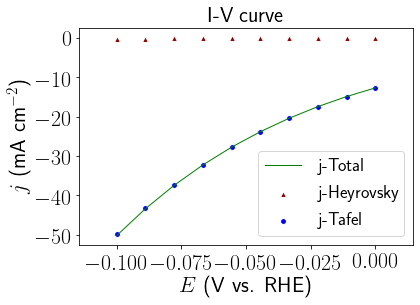

In [9]:
# simulate the IV curve on Pt(111)
Pt111_w=ElectrodeWaterInterface('Pt','111')
IV_curve_111 = Pt111_w.simulate_IV(barrier_type = 'ad_diabetic',range_U = (-0.1,0),U_ref='RHE', U_num = 10, pH = 13, initial_coverage = 0.75, iteration_number = 200,
                   mixing = 0.1, adjust=False,precision=0.001,plot=True,save_fig=True,H2O_var = 0)

  0%|          | 0/200 [00:00<?, ?it/s]

range_U_RHE -0.2 0.0


  0%|          | 1/200 [00:00<01:27,  2.28it/s]

coverage at U=-0.20 V iteration complete
0.9984090083808858 0.9993665588509121
coverage at U=-0.19 V iteration complete
0.9984328818351915 0.9993639465531142
coverage at U=-0.18 V iteration complete
0.9984560946873842 0.9993613959228953
coverage at U=-0.17 V iteration complete
0.998478664965663 0.9993589058185369
coverage at U=-0.16 V iteration complete
0.9985006102190744 0.9993564751021214
coverage at U=-0.15 V iteration complete
0.9985219475296141 0.9993541026406598
coverage at U=-0.14 V iteration complete
0.9985426935240523 0.9993517873071439
coverage at U=-0.13 V iteration complete
0.9985628643854891 0.999349527981526
coverage at U=-0.12 V iteration complete
0.9985824758646425 0.9993473235516259
coverage at U=-0.11 V iteration complete
0.9986015432908758 0.9993451729139735
coverage at U=-0.09 V iteration complete
0.9986200815829686 0.9993430749745843
coverage at U=-0.08 V iteration complete
0.9980567151279566 0.9980704557732007
coverage at U=-0.07 V iteration complete
0.99758130935

  1%|          | 2/200 [00:00<01:17,  2.57it/s]

coverage at U=-0.20 V iteration complete
0.9984035721511273 0.9993671521550278
coverage at U=-0.19 V iteration complete
0.9984275959947687 0.9993645258967819
coverage at U=-0.18 V iteration complete
0.9984509551339514 0.9993619615620788
coverage at U=-0.17 V iteration complete
0.9984736677058155 0.9993594580085117
coverage at U=-0.16 V iteration complete
0.9984957513656003 0.9993570140972114
coverage at U=-0.15 V iteration complete
0.9985172232988101 0.9993546286939917
coverage at U=-0.14 V iteration complete
0.9985381002331003 0.9993523006704184
coverage at U=-0.13 V iteration complete
0.9985583984498929 0.9993500289048036
coverage at U=-0.12 V iteration complete
0.9985781337957239 0.9993478122831314
coverage at U=-0.11 V iteration complete
0.9985973216933286 0.9993456496999119
coverage at U=-0.09 V iteration complete
0.9986159771524697 0.9993435400589733
coverage at U=-0.08 V iteration complete
0.9980578146589039 0.9980714283782591
coverage at U=-0.07 V iteration complete
0.997580966

  2%|▏         | 3/200 [00:00<01:09,  2.82it/s]

coverage at U=-0.20 V iteration complete
0.9984035722695368 0.999367152142111
coverage at U=-0.19 V iteration complete
0.9984275961099026 0.999364525884169
coverage at U=-0.18 V iteration complete
0.9984509552458991 0.9993619615497639
coverage at U=-0.17 V iteration complete
0.9984736678146638 0.9993594579964893
coverage at U=-0.16 V iteration complete
0.9984957514714341 0.9993570140854762
coverage at U=-0.15 V iteration complete
0.9985172234017117 0.9993546286825383
coverage at U=-0.14 V iteration complete
0.9985381003331499 0.999352300659241
coverage at U=-0.13 V iteration complete
0.9985583985471687 0.999350028893897
coverage at U=-0.12 V iteration complete
0.9985781338903017 0.9993478122724901
coverage at U=-0.11 V iteration complete
0.9985973217852824 0.9993456496895305
coverage at U=-0.09 V iteration complete
0.9986159772418715 0.9993435400488466
coverage at U=-0.08 V iteration complete
0.9980578146349711 0.9980714283570906
coverage at U=-0.07 V iteration complete
0.9975809665383

  2%|▏         | 4/200 [00:01<01:08,  2.85it/s]

coverage at U=-0.20 V iteration complete
0.9984035722695342 0.9993671521421111
coverage at U=-0.19 V iteration complete
0.9984275961099002 0.9993645258841692
coverage at U=-0.18 V iteration complete
0.9984509552458968 0.999361961549764
coverage at U=-0.17 V iteration complete
0.9984736678146616 0.9993594579964896
coverage at U=-0.16 V iteration complete
0.998495751471432 0.9993570140854766
coverage at U=-0.15 V iteration complete
0.9985172234017097 0.9993546286825384
coverage at U=-0.14 V iteration complete
0.9985381003331479 0.9993523006592411
coverage at U=-0.13 V iteration complete
0.9985583985471667 0.9993500288938973
coverage at U=-0.12 V iteration complete
0.9985781338902997 0.9993478122724903
coverage at U=-0.11 V iteration complete
0.9985973217852805 0.9993456496895308
coverage at U=-0.09 V iteration complete
0.9986159772418697 0.999343540048847
coverage at U=-0.08 V iteration complete
0.9980578146349501 0.9980714283570701
coverage at U=-0.07 V iteration complete
0.997580966538

  2%|▎         | 5/200 [00:01<01:09,  2.82it/s]

coverage at U=-0.20 V iteration complete
0.9984035722695341 0.9993671521421111
coverage at U=-0.19 V iteration complete
0.9984275961099001 0.9993645258841692
coverage at U=-0.18 V iteration complete
0.9984509552458967 0.999361961549764
coverage at U=-0.17 V iteration complete
0.9984736678146615 0.9993594579964896
coverage at U=-0.16 V iteration complete
0.9984957514714319 0.9993570140854766
coverage at U=-0.15 V iteration complete
0.9985172234017096 0.9993546286825384
coverage at U=-0.14 V iteration complete
0.9985381003331478 0.9993523006592413
coverage at U=-0.13 V iteration complete
0.9985583985471665 0.9993500288938973
coverage at U=-0.12 V iteration complete
0.9985781338902996 0.9993478122724903
coverage at U=-0.11 V iteration complete
0.9985973217852804 0.9993456496895309
coverage at U=-0.09 V iteration complete
0.9986159772418696 0.999343540048847
coverage at U=-0.08 V iteration complete
0.9980578146349501 0.9980714283570701
coverage at U=-0.07 V iteration complete
0.99758096653

  3%|▎         | 6/200 [00:02<01:08,  2.84it/s]

coverage at U=-0.20 V iteration complete
0.9984035722695341 0.9993671521421111
coverage at U=-0.19 V iteration complete
0.9984275961099001 0.9993645258841692
coverage at U=-0.18 V iteration complete
0.9984509552458967 0.999361961549764
coverage at U=-0.17 V iteration complete
0.9984736678146615 0.9993594579964896
coverage at U=-0.16 V iteration complete
0.9984957514714319 0.9993570140854766
coverage at U=-0.15 V iteration complete
0.9985172234017096 0.9993546286825384
coverage at U=-0.14 V iteration complete
0.9985381003331478 0.9993523006592413
coverage at U=-0.13 V iteration complete
0.9985583985471665 0.9993500288938973
coverage at U=-0.12 V iteration complete
0.9985781338902996 0.9993478122724903
coverage at U=-0.11 V iteration complete
0.9985973217852804 0.9993456496895309
coverage at U=-0.09 V iteration complete
0.9986159772418696 0.999343540048847
coverage at U=-0.08 V iteration complete
0.9980578146349501 0.9980714283570701
coverage at U=-0.07 V iteration complete
0.99758096653

  4%|▎         | 7/200 [00:02<01:05,  2.93it/s]

coverage at U=-0.20 V iteration complete
0.9984035722695341 0.9993671521421111
coverage at U=-0.19 V iteration complete
0.9984275961099001 0.9993645258841692
coverage at U=-0.18 V iteration complete
0.9984509552458967 0.999361961549764
coverage at U=-0.17 V iteration complete
0.9984736678146615 0.9993594579964896
coverage at U=-0.16 V iteration complete
0.9984957514714319 0.9993570140854766
coverage at U=-0.15 V iteration complete
0.9985172234017096 0.9993546286825384
coverage at U=-0.14 V iteration complete
0.9985381003331478 0.9993523006592413
coverage at U=-0.13 V iteration complete
0.9985583985471665 0.9993500288938973
coverage at U=-0.12 V iteration complete
0.9985781338902996 0.9993478122724903
coverage at U=-0.11 V iteration complete
0.9985973217852804 0.9993456496895309
coverage at U=-0.09 V iteration complete
0.9986159772418696 0.999343540048847
coverage at U=-0.08 V iteration complete
0.9980578146349501 0.9980714283570701
coverage at U=-0.07 V iteration complete
0.99758096653

  4%|▍         | 8/200 [00:02<01:09,  2.78it/s]

coverage at U= 0.00 V iteration complete
0.9876716515146724 0.9886272031447448
coverage at U=-0.20 V iteration complete
0.9984035722695341 0.9993671521421111
coverage at U=-0.19 V iteration complete
0.9984275961099001 0.9993645258841692
coverage at U=-0.18 V iteration complete
0.9984509552458967 0.999361961549764
coverage at U=-0.17 V iteration complete
0.9984736678146615 0.9993594579964896
coverage at U=-0.16 V iteration complete
0.9984957514714319 0.9993570140854766
coverage at U=-0.15 V iteration complete
0.9985172234017096 0.9993546286825384
coverage at U=-0.14 V iteration complete
0.9985381003331478 0.9993523006592413
coverage at U=-0.13 V iteration complete
0.9985583985471665 0.9993500288938973
coverage at U=-0.12 V iteration complete
0.9985781338902996 0.9993478122724903
coverage at U=-0.11 V iteration complete
0.9985973217852804 0.9993456496895309


  4%|▍         | 9/200 [00:03<01:06,  2.87it/s]

coverage at U=-0.09 V iteration complete
0.9986159772418696 0.999343540048847
coverage at U=-0.08 V iteration complete
0.9980578146349501 0.9980714283570701
coverage at U=-0.07 V iteration complete
0.9975809665383298 0.9975925969797108
coverage at U=-0.06 V iteration complete
0.996835297712595 0.9968534847571252
coverage at U=-0.05 V iteration complete
0.9958680622410883 0.9958916533501494
coverage at U=-0.04 V iteration complete
0.994629214989592 0.9952920582092798
coverage at U=-0.03 V iteration complete
0.9931332773955672 0.994071984864446
coverage at U=-0.02 V iteration complete
0.9915590781903185 0.992504795022535
coverage at U=-0.01 V iteration complete
0.989732086517716 0.9906867132764461
coverage at U= 0.00 V iteration complete
0.9876716515146724 0.9886272031447448


  5%|▌         | 10/200 [00:03<01:04,  2.96it/s]

coverage at U=-0.20 V iteration complete
0.9984035722695341 0.9993671521421111
coverage at U=-0.19 V iteration complete
0.9984275961099001 0.9993645258841692
coverage at U=-0.18 V iteration complete
0.9984509552458967 0.999361961549764
coverage at U=-0.17 V iteration complete
0.9984736678146615 0.9993594579964896
coverage at U=-0.16 V iteration complete
0.9984957514714319 0.9993570140854766
coverage at U=-0.15 V iteration complete
0.9985172234017096 0.9993546286825384
coverage at U=-0.14 V iteration complete
0.9985381003331478 0.9993523006592413
coverage at U=-0.13 V iteration complete
0.9985583985471665 0.9993500288938973
coverage at U=-0.12 V iteration complete
0.9985781338902996 0.9993478122724903
coverage at U=-0.11 V iteration complete
0.9985973217852804 0.9993456496895309
coverage at U=-0.09 V iteration complete
0.9986159772418696 0.999343540048847
coverage at U=-0.08 V iteration complete
0.9980578146349501 0.9980714283570701
coverage at U=-0.07 V iteration complete
0.99758096653

  6%|▌         | 11/200 [00:03<01:01,  3.07it/s]

coverage at U=-0.20 V iteration complete
0.9984035722695341 0.9993671521421111
coverage at U=-0.19 V iteration complete
0.9984275961099001 0.9993645258841692
coverage at U=-0.18 V iteration complete
0.9984509552458967 0.999361961549764
coverage at U=-0.17 V iteration complete
0.9984736678146615 0.9993594579964896
coverage at U=-0.16 V iteration complete
0.9984957514714319 0.9993570140854766
coverage at U=-0.15 V iteration complete
0.9985172234017096 0.9993546286825384
coverage at U=-0.14 V iteration complete
0.9985381003331478 0.9993523006592413
coverage at U=-0.13 V iteration complete
0.9985583985471665 0.9993500288938973
coverage at U=-0.12 V iteration complete
0.9985781338902996 0.9993478122724903
coverage at U=-0.11 V iteration complete
0.9985973217852804 0.9993456496895309
coverage at U=-0.09 V iteration complete
0.9986159772418696 0.999343540048847
coverage at U=-0.08 V iteration complete
0.9980578146349501 0.9980714283570701
coverage at U=-0.07 V iteration complete
0.99758096653

  6%|▌         | 12/200 [00:04<01:01,  3.05it/s]

coverage at U=-0.20 V iteration complete
0.9984035722695341 0.9993671521421111
coverage at U=-0.19 V iteration complete
0.9984275961099001 0.9993645258841692
coverage at U=-0.18 V iteration complete
0.9984509552458967 0.999361961549764
coverage at U=-0.17 V iteration complete
0.9984736678146615 0.9993594579964896
coverage at U=-0.16 V iteration complete
0.9984957514714319 0.9993570140854766
coverage at U=-0.15 V iteration complete
0.9985172234017096 0.9993546286825384
coverage at U=-0.14 V iteration complete
0.9985381003331478 0.9993523006592413
coverage at U=-0.13 V iteration complete
0.9985583985471665 0.9993500288938973
coverage at U=-0.12 V iteration complete
0.9985781338902996 0.9993478122724903
coverage at U=-0.11 V iteration complete
0.9985973217852804 0.9993456496895308
coverage at U=-0.09 V iteration complete
0.9986159772418696 0.999343540048847
coverage at U=-0.08 V iteration complete
0.9980578146349501 0.9980714283570701
coverage at U=-0.07 V iteration complete
0.99758096653

  6%|▋         | 13/200 [00:04<01:01,  3.04it/s]

coverage at U=-0.20 V iteration complete
0.9984035722695342 0.9993671521421111
coverage at U=-0.19 V iteration complete
0.9984275961099002 0.9993645258841692
coverage at U=-0.18 V iteration complete
0.9984509552458968 0.999361961549764
coverage at U=-0.17 V iteration complete
0.9984736678146616 0.9993594579964896
coverage at U=-0.16 V iteration complete
0.998495751471432 0.9993570140854766
coverage at U=-0.15 V iteration complete
0.9985172234017097 0.9993546286825384
coverage at U=-0.14 V iteration complete
0.9985381003331479 0.9993523006592411
coverage at U=-0.13 V iteration complete
0.9985583985471667 0.9993500288938973
coverage at U=-0.12 V iteration complete
0.9985781338902997 0.9993478122724903
coverage at U=-0.11 V iteration complete
0.9985973217852805 0.9993456496895308
coverage at U=-0.09 V iteration complete
0.9986159772418697 0.999343540048847
coverage at U=-0.08 V iteration complete
0.9980578146349501 0.9980714283570701
coverage at U=-0.07 V iteration complete
0.997580966538

  7%|▋         | 14/200 [00:04<01:00,  3.09it/s]

coverage at U=-0.20 V iteration complete
0.9984035722695342 0.9993671521421111
coverage at U=-0.19 V iteration complete
0.9984275961099002 0.9993645258841692
coverage at U=-0.18 V iteration complete
0.9984509552458968 0.999361961549764
coverage at U=-0.17 V iteration complete
0.9984736678146616 0.9993594579964896
coverage at U=-0.16 V iteration complete
0.998495751471432 0.9993570140854766
coverage at U=-0.15 V iteration complete
0.9985172234017097 0.9993546286825384
coverage at U=-0.14 V iteration complete
0.9985381003331479 0.9993523006592411
coverage at U=-0.13 V iteration complete
0.9985583985471667 0.9993500288938973
coverage at U=-0.12 V iteration complete
0.9985781338902997 0.9993478122724903
coverage at U=-0.11 V iteration complete
0.9985973217852805 0.9993456496895308
coverage at U=-0.09 V iteration complete
0.9986159772418697 0.999343540048847
coverage at U=-0.08 V iteration complete
0.9980578146349501 0.9980714283570701
coverage at U=-0.07 V iteration complete
0.997580966538

  8%|▊         | 15/200 [00:04<00:57,  3.19it/s]

coverage at U=-0.20 V iteration complete
0.9984035722695342 0.9993671521421111
coverage at U=-0.19 V iteration complete
0.9984275961099002 0.9993645258841692
coverage at U=-0.18 V iteration complete
0.9984509552458968 0.999361961549764
coverage at U=-0.17 V iteration complete
0.9984736678146616 0.9993594579964896
coverage at U=-0.16 V iteration complete
0.998495751471432 0.9993570140854766
coverage at U=-0.15 V iteration complete
0.9985172234017097 0.9993546286825384
coverage at U=-0.14 V iteration complete
0.9985381003331479 0.9993523006592411
coverage at U=-0.13 V iteration complete
0.9985583985471667 0.9993500288938973
coverage at U=-0.12 V iteration complete
0.9985781338902997 0.9993478122724903
coverage at U=-0.11 V iteration complete
0.9985973217852805 0.9993456496895308
coverage at U=-0.09 V iteration complete
0.9986159772418697 0.999343540048847
coverage at U=-0.08 V iteration complete
0.9980578146349501 0.9980714283570701
coverage at U=-0.07 V iteration complete
0.997580966538

  8%|▊         | 16/200 [00:05<00:59,  3.11it/s]

coverage at U=-0.20 V iteration complete
0.9984035722695341 0.9993671521421111
coverage at U=-0.19 V iteration complete
0.9984275961099001 0.9993645258841692
coverage at U=-0.18 V iteration complete
0.9984509552458967 0.999361961549764
coverage at U=-0.17 V iteration complete
0.9984736678146615 0.9993594579964896
coverage at U=-0.16 V iteration complete
0.9984957514714319 0.9993570140854766
coverage at U=-0.15 V iteration complete
0.9985172234017096 0.9993546286825384
coverage at U=-0.14 V iteration complete
0.9985381003331478 0.9993523006592413
coverage at U=-0.13 V iteration complete
0.9985583985471665 0.9993500288938973
coverage at U=-0.12 V iteration complete
0.9985781338902996 0.9993478122724903
coverage at U=-0.11 V iteration complete
0.9985973217852804 0.9993456496895308
coverage at U=-0.09 V iteration complete
0.9986159772418696 0.999343540048847
coverage at U=-0.08 V iteration complete
0.9980578146349501 0.9980714283570701
coverage at U=-0.07 V iteration complete
0.99758096653

  8%|▊         | 17/200 [00:05<00:57,  3.18it/s]

coverage at U=-0.20 V iteration complete
0.9984035722695344 0.9993671521421111
coverage at U=-0.19 V iteration complete
0.9984275961099003 0.9993645258841692
coverage at U=-0.18 V iteration complete
0.9984509552458969 0.999361961549764
coverage at U=-0.17 V iteration complete
0.9984736678146617 0.9993594579964896
coverage at U=-0.16 V iteration complete
0.9984957514714321 0.9993570140854765
coverage at U=-0.15 V iteration complete
0.9985172234017098 0.9993546286825384
coverage at U=-0.14 V iteration complete
0.998538100333148 0.9993523006592411
coverage at U=-0.13 V iteration complete
0.9985583985471668 0.9993500288938972
coverage at U=-0.12 V iteration complete
0.9985781338902998 0.9993478122724903
coverage at U=-0.11 V iteration complete
0.9985973217852806 0.9993456496895308
coverage at U=-0.09 V iteration complete
0.9986159772418698 0.999343540048847
coverage at U=-0.08 V iteration complete
0.9980578146349427 0.9980714283570629
coverage at U=-0.07 V iteration complete
0.997580966538

  9%|▉         | 18/200 [00:05<00:54,  3.32it/s]

coverage at U=-0.20 V iteration complete
0.9984035721655034 0.9993671521534594
coverage at U=-0.19 V iteration complete
0.998427596008747 0.9993645258952506
coverage at U=-0.18 V iteration complete
0.9984509551475429 0.9993619615605835
coverage at U=-0.17 V iteration complete
0.9984736677190307 0.999359458007052
coverage at U=-0.16 V iteration complete
0.9984957513784496 0.9993570140957867
coverage at U=-0.15 V iteration complete
0.9985172233113033 0.9993546286926012
coverage at U=-0.14 V iteration complete
0.9985381002452473 0.9993523006690613
coverage at U=-0.13 V iteration complete
0.998558398461703 0.9993500289034795
coverage at U=-0.12 V iteration complete
0.9985781338072064 0.9993478122818394
coverage at U=-0.11 V iteration complete
0.9985973217044926 0.9993456496986516
coverage at U=-0.09 V iteration complete
0.9986159771633238 0.9993435400577438
coverage at U=-0.08 V iteration complete
0.9980578146559814 0.9980714283756728
coverage at U=-0.07 V iteration complete
0.997580966531

 10%|▉         | 19/200 [00:06<00:52,  3.42it/s]

coverage at U=-0.20 V iteration complete
0.9984033288298346 0.9993668876132596
coverage at U=-0.19 V iteration complete
0.9984273564948583 0.9993644354307796
coverage at U=-0.18 V iteration complete
0.9984507214685199 0.9993619554413244
coverage at U=-0.17 V iteration complete
0.9984734404303796 0.999359479942909
coverage at U=-0.16 V iteration complete
0.9984955303846128 0.9993570385997115
coverage at U=-0.15 V iteration complete
0.9985170084402097 0.999354652608491
coverage at U=-0.14 V iteration complete
0.9985378913294128 0.9993523240083346
coverage at U=-0.13 V iteration complete
0.9985581953381145 0.9993500516774816
coverage at U=-0.12 V iteration complete
0.9985779363172075 0.9993478345018335
coverage at U=-0.11 V iteration complete
0.9985971296936725 0.9993456713758101
coverage at U=-0.09 V iteration complete
0.9986157904814092 0.9993435612031409
coverage at U=-0.08 V iteration complete
0.9980578646528512 0.9980714725998892
coverage at U=-0.07 V iteration complete
0.99758095094

 10%|█         | 20/200 [00:06<00:52,  3.40it/s]

coverage at U=-0.20 V iteration complete
0.998401343338542 0.9993643972153403
coverage at U=-0.19 V iteration complete
0.9984253773350736 0.9993627031998072
coverage at U=-0.18 V iteration complete
0.998448764038305 0.9993608454643262
coverage at U=-0.17 V iteration complete
0.998471516391049 0.9993588581480664
coverage at U=-0.16 V iteration complete
0.9984936478136962 0.9993567732969361
coverage at U=-0.15 V iteration complete
0.9985151721265264 0.9993546203269055
coverage at U=-0.14 V iteration complete
0.9985361035025043 0.9993524271656428
coverage at U=-0.13 V iteration complete
0.9985564564005701 0.9993502194251356
coverage at U=-0.12 V iteration complete
0.9985762455338163 0.999348021730416
coverage at U=-0.11 V iteration complete
0.9985954858187632 0.999345856931693
coverage at U=-0.09 V iteration complete
0.9986141922284956 0.9993437422080568
coverage at U=-0.08 V iteration complete
0.9980582926479667 0.9980718511743211
coverage at U=-0.07 V iteration complete
0.99758081748548

 10%|█         | 21/200 [00:06<00:52,  3.43it/s]

coverage at U=-0.20 V iteration complete
0.9983958119129089 0.9993572123907458
coverage at U=-0.19 V iteration complete
0.9984198369341248 0.9993568127615471
coverage at U=-0.18 V iteration complete
0.9984432439924962 0.9993561192689769
coverage at U=-0.17 V iteration complete
0.998466042153549 0.999355170434609
coverage at U=-0.16 V iteration complete
0.998488241122251 0.9993540009016305
coverage at U=-0.15 V iteration complete
0.9985098511716434 0.9993526430979467
coverage at U=-0.14 V iteration complete
0.9985308830460753 0.9993511261489191
coverage at U=-0.13 V iteration complete
0.9985513479345175 0.9993494785837637
coverage at U=-0.12 V iteration complete
0.9985712573891508 0.9993477261198462
coverage at U=-0.11 V iteration complete
0.9985906232723019 0.999345892715195
coverage at U=-0.09 V iteration complete
0.9986094577428841 0.9993440020955934
coverage at U=-0.08 V iteration complete
0.9980591792901349 0.9980726007158117
coverage at U=-0.07 V iteration complete
0.9975803443310

 11%|█         | 22/200 [00:06<00:50,  3.50it/s]

coverage at U=-0.20 V iteration complete
0.9983850199532206 0.9993430018802268
coverage at U=-0.19 V iteration complete
0.9984090042958484 0.999344393658336
coverage at U=-0.18 V iteration complete
0.9984324132086804 0.9993453608091237
coverage at U=-0.17 V iteration complete
0.9984552515062994 0.9993459451134422
coverage at U=-0.16 V iteration complete
0.9984775249342276 0.9993461886234254
coverage at U=-0.15 V iteration complete
0.9984992399734456 0.999346126502947
coverage at U=-0.14 V iteration complete
0.9985204037699994 0.9993457918355997
coverage at U=-0.13 V iteration complete
0.998541024068649 0.9993452157159827
coverage at U=-0.12 V iteration complete
0.9985611091498465 0.9993444273165528
coverage at U=-0.11 V iteration complete
0.9985806677236947 0.9993434521037734
coverage at U=-0.09 V iteration complete
0.9985997089284724 0.9993423159148004
coverage at U=-0.08 V iteration complete
0.998055464787352 0.9980687390346964
coverage at U=-0.07 V iteration complete
0.9975755019224

 12%|█▏        | 23/200 [00:07<00:49,  3.56it/s]

coverage at U=-0.20 V iteration complete
0.9983671157664138 0.9993194047217191
coverage at U=-0.19 V iteration complete
0.9983910152780158 0.9993230962304941
coverage at U=-0.18 V iteration complete
0.9984143953709801 0.9993262189965868
coverage at U=-0.17 V iteration complete
0.9984372560469399 0.9993288224093718
coverage at U=-0.16 V iteration complete
0.9984595985145575 0.9993309547516419
coverage at U=-0.15 V iteration complete
0.9984814250480681 0.9993326598549829
coverage at U=-0.14 V iteration complete
0.9985027387831823 0.9993339744526356
coverage at U=-0.13 V iteration complete
0.9985235437301418 0.9993349366615628
coverage at U=-0.12 V iteration complete
0.9985438445986222 0.9993355784693557
coverage at U=-0.11 V iteration complete
0.9985636467435427 0.9993359303954419
coverage at U=-0.09 V iteration complete
0.9985829560342533 0.9993360183719646
coverage at U=-0.08 V iteration complete
0.9980389029680422 0.998052172555023
coverage at U=-0.07 V iteration complete
0.9975579031

 12%|█▏        | 24/200 [00:07<00:49,  3.58it/s]

coverage at U=-0.20 V iteration complete
0.9983146272027309 0.9992868624730725
coverage at U=-0.19 V iteration complete
0.9983390947002708 0.9992933271043286
coverage at U=-0.18 V iteration complete
0.9983630936878856 0.9992990542048603
coverage at U=-0.17 V iteration complete
0.9983866190328761 0.9993041074875061
coverage at U=-0.16 V iteration complete
0.9984096671919509 0.9993085453958678
coverage at U=-0.15 V iteration complete
0.9984322360519751 0.9993124215929177
coverage at U=-0.14 V iteration complete
0.9984543246690537 0.9993157807351228
coverage at U=-0.13 V iteration complete
0.9984759332770947 0.9993186689906937
coverage at U=-0.12 V iteration complete
0.9984970629786141 0.9993211213378684
coverage at U=-0.11 V iteration complete
0.9985177158175252 0.9993231765350616
coverage at U=-0.09 V iteration complete
0.9985378945860067 0.9993248665567848
coverage at U=-0.08 V iteration complete
0.9980070289089407 0.9980199768522837
coverage at U=-0.07 V iteration complete
0.997517923

 12%|█▎        | 25/200 [00:07<00:48,  3.58it/s]

coverage at U=-0.20 V iteration complete
0.9982718793883903 0.9992367892353804
coverage at U=-0.19 V iteration complete
0.9982962528018364 0.9992468159262321
coverage at U=-0.18 V iteration complete
0.9983202436531745 0.9992558868553605
coverage at U=-0.17 V iteration complete
0.9983438397175852 0.9992640862296023
coverage at U=-0.16 V iteration complete
0.9983670308695001 0.9992714857941812
coverage at U=-0.15 V iteration complete
0.9983898089518385 0.9992781541630363
coverage at U=-0.14 V iteration complete
0.9984121674703159 0.9992841496909355
coverage at U=-0.13 V iteration complete
0.9984341014919859 0.9992895283371142
coverage at U=-0.12 V iteration complete
0.9984556073907649 0.9992943374431456
coverage at U=-0.11 V iteration complete
0.9984766827275408 0.9992986208618
coverage at U=-0.09 V iteration complete
0.9984973261408417 0.999302419259582
coverage at U=-0.08 V iteration complete
0.9979428223563822 0.99795634683893
coverage at U=-0.07 V iteration complete
0.997450881259651

 13%|█▎        | 26/200 [00:08<00:48,  3.58it/s]

coverage at U=-0.20 V iteration complete
0.9982097236196036 0.9991683360027892
coverage at U=-0.19 V iteration complete
0.9982340513009726 0.9991828308743654
coverage at U=-0.18 V iteration complete
0.9982581021264442 0.9991960843198314
coverage at U=-0.17 V iteration complete
0.9982818546729814 0.9992082039879302
coverage at U=-0.16 V iteration complete
0.9983052905848941 0.9992192911494918
coverage at U=-0.15 V iteration complete
0.9983283941145941 0.9992294317728896
coverage at U=-0.14 V iteration complete
0.998351151713008 0.999238698051151
coverage at U=-0.13 V iteration complete
0.9983735520351601 0.9992471645990918
coverage at U=-0.12 V iteration complete
0.9983955855739662 0.9992548935874068
coverage at U=-0.11 V iteration complete
0.9984172443825869 0.9992619379187924
coverage at U=-0.09 V iteration complete
0.9984385221056722 0.9992683533059961
coverage at U=-0.08 V iteration complete
0.997843512420049 0.9978580248514056
coverage at U=-0.07 V iteration complete
0.997347285838

 14%|█▎        | 27/200 [00:08<00:49,  3.52it/s]

coverage at U=-0.20 V iteration complete
0.9981241564151017 0.9990764991832701
coverage at U=-0.19 V iteration complete
0.9981484694391856 0.9990966773784581
coverage at U=-0.18 V iteration complete
0.9981726386222601 0.9991152367621664
coverage at U=-0.17 V iteration complete
0.9981966305119931 0.9991323142115784
coverage at U=-0.16 V iteration complete
0.9982204157819321 0.9991480413095529
coverage at U=-0.15 V iteration complete
0.9982439687541586 0.9991625346709895
coverage at U=-0.14 V iteration complete
0.9982672669419527 0.9991758962659223
coverage at U=-0.13 V iteration complete
0.9982902907369803 0.9991882187430561
coverage at U=-0.12 V iteration complete
0.9983130229551987 0.9991995794657172
coverage at U=-0.11 V iteration complete
0.9983354488107873 0.9992100571787408
coverage at U=-0.09 V iteration complete
0.9981979412327686 0.998201295076135
coverage at U=-0.08 V iteration complete
0.9977476422168788 0.9977586251197054
coverage at U=-0.07 V iteration complete
0.9971820077

 14%|█▍        | 28/200 [00:08<00:49,  3.51it/s]

coverage at U=-0.20 V iteration complete
0.9980062209629771 0.9989553159133185
coverage at U=-0.19 V iteration complete
0.9980306359308894 0.9989828196794679
coverage at U=-0.18 V iteration complete
0.9980550744128911 0.9990081752109593
coverage at U=-0.17 V iteration complete
0.9980794871355654 0.9990315833198615
coverage at U=-0.16 V iteration complete
0.9981038303716141 0.9990532165775147
coverage at U=-0.15 V iteration complete
0.9981280653672204 0.9990732301958696
coverage at U=-0.14 V iteration complete
0.9981521577391055 0.9990917602426215
coverage at U=-0.13 V iteration complete
0.9981760769268054 0.999108925247102
coverage at U=-0.12 V iteration complete
0.9981997962021213 0.9991248479394419
coverage at U=-0.11 V iteration complete
0.99822329156134 0.9991396105708692
coverage at U=-0.09 V iteration complete
0.9980355867337423 0.998040164900269
coverage at U=-0.08 V iteration complete
0.9975681059794355 0.9975795079490527
coverage at U=-0.07 V iteration complete
0.9969702270578

 14%|█▍        | 29/200 [00:08<00:49,  3.46it/s]

coverage at U=-0.20 V iteration complete
0.9978261646551553 0.998800831628782
coverage at U=-0.19 V iteration complete
0.9978759890819483 0.9988329547092792
coverage at U=-0.18 V iteration complete
0.9979007689340798 0.9988671831672068
coverage at U=-0.17 V iteration complete
0.9979257201285454 0.9988988167127084
coverage at U=-0.16 V iteration complete
0.9979751040481242 0.9989237748246714
coverage at U=-0.15 V iteration complete
0.9979995044043635 0.9989511182976951
coverage at U=-0.14 V iteration complete
0.9980239290180211 0.9989764889506653
coverage at U=-0.13 V iteration complete
0.9980483318478389 0.9990000422107368
coverage at U=-0.12 V iteration complete
0.9980726720408516 0.9990219395683466
coverage at U=-0.11 V iteration complete
0.998096913137502 0.99904231590687
coverage at U=-0.09 V iteration complete
0.9978101206841798 0.9978171156220658
coverage at U=-0.08 V iteration complete
0.9973312850097036 0.9973429639285932
coverage at U=-0.07 V iteration complete
0.9966857995612

 15%|█▌        | 30/200 [00:09<00:50,  3.37it/s]

coverage at U=-0.20 V iteration complete
0.9976224975583808 0.9985933326364571
coverage at U=-0.19 V iteration complete
0.9976727351308163 0.998637266562311
coverage at U=-0.18 V iteration complete
0.9977224935427804 0.9986778989496479
coverage at U=-0.17 V iteration complete
0.997747446591551 0.9987206154936038
coverage at U=-0.16 V iteration complete
0.997797323145896 0.9987551393162772
coverage at U=-0.15 V iteration complete
0.9978221912754275 0.9987920483271552
coverage at U=-0.14 V iteration complete
0.9978716511575949 0.9988215868871496
coverage at U=-0.13 V iteration complete
0.9978962012838015 0.9988536562058583
coverage at U=-0.12 V iteration complete
0.9979208835084494 0.9988834902697173
coverage at U=-0.11 V iteration complete
0.9979456432860523 0.9989112746125657
coverage at U=-0.09 V iteration complete
0.9975041299218128 0.9975148985404528
coverage at U=-0.08 V iteration complete
0.9970251553286659 0.9970368376358157
coverage at U=-0.07 V iteration complete
0.996310869433

 16%|█▌        | 31/200 [00:09<00:51,  3.26it/s]

coverage at U=-0.20 V iteration complete
0.9973583669022563 0.9983229863148088
coverage at U=-0.19 V iteration complete
0.9974091002194281 0.9983826668602025
coverage at U=-0.18 V iteration complete
0.997484330499068 0.9984315669912909
coverage at U=-0.17 V iteration complete
0.9975337868862846 0.9984830297860714
coverage at U=-0.16 V iteration complete
0.9975831500307056 0.9985306886981339
coverage at U=-0.15 V iteration complete
0.9976080841233003 0.9985805137344892
coverage at U=-0.14 V iteration complete
0.9976582400232327 0.9986211643711713
coverage at U=-0.13 V iteration complete
0.9977077846851753 0.9986590431919656
coverage at U=-0.12 V iteration complete
0.9977325781644836 0.9986995238575086
coverage at U=-0.11 V iteration complete
0.9975956211929764 0.9975989616069156
coverage at U=-0.09 V iteration complete
0.9971547489936039 0.9971655019740764
coverage at U=-0.08 V iteration complete
0.9966112731589193 0.9966245286670823
coverage at U=-0.07 V iteration complete
0.9958341647

 16%|█▌        | 32/200 [00:09<00:54,  3.09it/s]

coverage at U= 0.00 V iteration complete
0.9830725662822184 0.9840437925271606
coverage at U=-0.20 V iteration complete
0.9965633896195121 0.9975272678759715
coverage at U=-0.19 V iteration complete
0.9966661735168874 0.9976167763338126
coverage at U=-0.18 V iteration complete
0.9967430844779008 0.9977087663448729
coverage at U=-0.17 V iteration complete
0.9968205550553121 0.9977935765964581
coverage at U=-0.16 V iteration complete
0.9968980766012496 0.9978720280593543
coverage at U=-0.15 V iteration complete
0.9969752298671056 0.997944821870793
coverage at U=-0.14 V iteration complete
0.9970516710227209 0.9980125604212048
coverage at U=-0.13 V iteration complete
0.997127119979034 0.9980757641604225
coverage at U=-0.12 V iteration complete
0.9969942244401938 0.9969974657947996
coverage at U=-0.11 V iteration complete
0.9966082310376584 0.9966176455108909
coverage at U=-0.09 V iteration complete
0.9961212328135954 0.9961331108190604
coverage at U=-0.08 V iteration complete
0.99540492392

 16%|█▋        | 33/200 [00:10<00:57,  2.92it/s]

coverage at U=-0.04 V iteration complete
0.9902797013078408 0.9912233356964826
coverage at U=-0.03 V iteration complete
0.9884706780801624 0.9894076505412214
coverage at U=-0.02 V iteration complete
0.9864142037794578 0.9873690891762602
coverage at U=-0.01 V iteration complete
0.9841424835663031 0.9851167988788117
coverage at U= 0.00 V iteration complete
0.9816837237399055 0.9826580704003596
coverage at U=-0.20 V iteration complete
0.9959944636903408 0.9969577854571771
coverage at U=-0.19 V iteration complete
0.9961247803314194 0.9970679687364359
coverage at U=-0.18 V iteration complete
0.9962281274854783 0.997181520807529
coverage at U=-0.17 V iteration complete
0.9963315647102915 0.9972863534158944
coverage at U=-0.16 V iteration complete
0.9964343429872896 0.9973835690501609
coverage at U=-0.15 V iteration complete
0.9965118196723294 0.997483733875526
coverage at U=-0.14 V iteration complete
0.9966147866129068 0.9975667513792548
coverage at U=-0.13 V iteration complete
0.99661635421

 17%|█▋        | 34/200 [00:10<01:00,  2.73it/s]

coverage at U=-0.01 V iteration complete
0.9825886525108711 0.9835575289037637
coverage at U= 0.00 V iteration complete
0.9800498071999562 0.9809734827407965
coverage at U=-0.20 V iteration complete
0.9952896602737714 0.9962351694262319
coverage at U=-0.19 V iteration complete
0.9954232586434684 0.9963851450321876
coverage at U=-0.18 V iteration complete
0.9955572779476395 0.9965231882112379
coverage at U=-0.17 V iteration complete
0.9956904392127426 0.9966510788055967
coverage at U=-0.16 V iteration complete
0.9958217861308557 0.9967701907020463
coverage at U=-0.15 V iteration complete
0.9959267422848996 0.9968933249670937
coverage at U=-0.14 V iteration complete
0.9960325030365614 0.9970071296391381
coverage at U=-0.13 V iteration complete
0.9958789451813883 0.9958826904949292
coverage at U=-0.12 V iteration complete
0.9955576732480197 0.9955655091488336
coverage at U=-0.11 V iteration complete
0.9951014499456592 0.9951125773432777
coverage at U=-0.09 V iteration complete
0.994424154

 18%|█▊        | 35/200 [00:11<01:08,  2.40it/s]

coverage at U=-0.02 V iteration complete
0.9832388414286465 0.984188854341697
coverage at U=-0.01 V iteration complete
0.9807594970363462 0.981696303596594
coverage at U= 0.00 V iteration complete
0.9780994927577242 0.9790291148387271
coverage at U=-0.20 V iteration complete
0.9943981202168108 0.9953484388530214
coverage at U=-0.19 V iteration complete
0.9945638326203066 0.9955301814948285
coverage at U=-0.18 V iteration complete
0.9947295833495511 0.9956976771055733
coverage at U=-0.17 V iteration complete
0.9948936402315086 0.9958532115791778
coverage at U=-0.16 V iteration complete
0.9950548077429849 0.9959987511669502
coverage at U=-0.15 V iteration complete
0.9951885694918784 0.9961497904255626
coverage at U=-0.14 V iteration complete
0.9951892166014573 0.9952144538750336
coverage at U=-0.13 V iteration complete
0.9949247391335518 0.9949311898035007
coverage at U=-0.12 V iteration complete
0.9945981438157049 0.9946061095551646
coverage at U=-0.11 V iteration complete
0.99402647983

 18%|█▊        | 36/200 [00:11<01:16,  2.14it/s]

coverage at U= 0.00 V iteration complete
0.9758323780906628 0.9767463909988694
coverage at U=-0.20 V iteration complete
0.9933205417335158 0.9942584361482714
coverage at U=-0.19 V iteration complete
0.9935189856081645 0.994477647157214
coverage at U=-0.18 V iteration complete
0.9937176482997189 0.9946795062245741
coverage at U=-0.17 V iteration complete
0.9939141076927906 0.9948672764962975
coverage at U=-0.16 V iteration complete
0.994106804625897 0.995043552541055
coverage at U=-0.15 V iteration complete
0.9941113854855652 0.9942900390126271
coverage at U=-0.14 V iteration complete
0.9941118648355417 0.9941305594846239
coverage at U=-0.13 V iteration complete
0.993762262226866 0.9937707891197606
coverage at U=-0.12 V iteration complete
0.9934065138589379 0.9934151906483996
coverage at U=-0.11 V iteration complete
0.9926976662237936 0.9927149551905045
coverage at U=-0.09 V iteration complete
0.9918457678482735 0.9918665458574325
coverage at U=-0.08 V iteration complete
0.9906920428907

 18%|█▊        | 37/200 [00:12<01:29,  1.83it/s]

coverage at U=-0.01 V iteration complete
0.9760829439206936 0.977050260962325
coverage at U= 0.00 V iteration complete
0.9731906180271307 0.9741475184770685
coverage at U=-0.20 V iteration complete
0.9920092024377336 0.9929669569810354
coverage at U=-0.19 V iteration complete
0.9922487384870032 0.9932206742248334
coverage at U=-0.18 V iteration complete
0.9924868092174935 0.9934557248974821
coverage at U=-0.17 V iteration complete
0.9927208700463671 0.9936761480097008
coverage at U=-0.16 V iteration complete
0.9929493830965623 0.9938844641404935
coverage at U=-0.15 V iteration complete
0.9928805806923816 0.9928822587998006
coverage at U=-0.14 V iteration complete
0.9927370266371613 0.9927405279555813
coverage at U=-0.13 V iteration complete
0.9923994261939327 0.9924076603510846
coverage at U=-0.12 V iteration complete
0.9919028934653122 0.9919150040196688
coverage at U=-0.11 V iteration complete
0.9911186906271782 0.9911378175256692
coverage at U=-0.09 V iteration complete
0.9901314334

 19%|█▉        | 38/200 [00:13<01:38,  1.65it/s]

coverage at U=-0.02 V iteration complete
0.9760780189102374 0.9770198644696239
coverage at U=-0.01 V iteration complete
0.9732011482273147 0.9741507890682218
coverage at U= 0.00 V iteration complete
0.9701883764654942 0.9711065227740922
coverage at U=-0.20 V iteration complete
0.9904693205481123 0.9914372665777129
coverage at U=-0.19 V iteration complete
0.9907526161506041 0.9917251623281911
coverage at U=-0.18 V iteration complete
0.991031929697359 0.9919945492419384
coverage at U=-0.17 V iteration complete
0.9913050047248662 0.9922495350566763
coverage at U=-0.16 V iteration complete
0.9913092745432844 0.9914757974615976
coverage at U=-0.15 V iteration complete
0.9913124645213905 0.9914368736675276
coverage at U=-0.14 V iteration complete
0.9911432293653897 0.9911473570521214
coverage at U=-0.13 V iteration complete
0.9907057395441239 0.9907164100275694
coverage at U=-0.12 V iteration complete
0.9901366070543037 0.9901504883345432
coverage at U=-0.11 V iteration complete
0.9891673665

 20%|█▉        | 39/200 [00:14<01:51,  1.45it/s]

coverage at U= 0.00 V iteration complete
0.9667479723977187 0.967688808257897
coverage at U=-0.20 V iteration complete
0.9887062516227825 0.9896222291908704
coverage at U=-0.19 V iteration complete
0.9890260739324427 0.9899567052838117
coverage at U=-0.18 V iteration complete
0.9893426352610253 0.9902684242122899
coverage at U=-0.17 V iteration complete
0.9893526231818643 0.9897421520945876
coverage at U=-0.16 V iteration complete
0.9893661036106577 0.9898918403335994
coverage at U=-0.15 V iteration complete
0.9893766768099057 0.9897890315805783
coverage at U=-0.14 V iteration complete
0.9893682416338144 0.9893684473698167
coverage at U=-0.13 V iteration complete
0.9885254345928691 0.9885459908621604
coverage at U=-0.12 V iteration complete
0.9882550466202483 0.9882616414488489
coverage at U=-0.11 V iteration complete
0.9871151365362686 0.9880425185780913
coverage at U=-0.09 V iteration complete
0.9859017588015642 0.9868352659551572
coverage at U=-0.08 V iteration complete
0.9843502759

 20%|██        | 40/200 [00:15<01:57,  1.36it/s]

coverage at U=-0.02 V iteration complete
0.9693234167225109 0.9702338692065466
coverage at U=-0.01 V iteration complete
0.9661543485012483 0.9670932174336123
coverage at U= 0.00 V iteration complete
0.9628619055556051 0.963805338154693
coverage at U=-0.20 V iteration complete
0.9866607456849636 0.9875787854847708
coverage at U=-0.19 V iteration complete
0.9870066770508276 0.9879809816400446
coverage at U=-0.18 V iteration complete
0.9870246432840888 0.987725326381275
coverage at U=-0.17 V iteration complete
0.987075970552848 0.9880438921663086
coverage at U=-0.16 V iteration complete
0.9871512143130424 0.9880667856993559
coverage at U=-0.15 V iteration complete
0.9871688294518544 0.9878558198655206
coverage at U=-0.14 V iteration complete
0.9871706543063278 0.987241823630793
coverage at U=-0.13 V iteration complete
0.9863647312898793 0.9873232193364705
coverage at U=-0.12 V iteration complete
0.9854842362965568 0.9855057117841988
coverage at U=-0.11 V iteration complete
0.9845812540396

 20%|██        | 41/200 [00:15<01:59,  1.33it/s]

coverage at U=-0.02 V iteration complete
0.9652358526436916 0.9661719083299741
coverage at U=-0.01 V iteration complete
0.9619243958500335 0.962865753442082
coverage at U= 0.00 V iteration complete
0.9584926019695489 0.9594284261926522
coverage at U=-0.20 V iteration complete
0.9843460400788168 0.9852729499944304
coverage at U=-0.19 V iteration complete
0.9843705241007692 0.9853254009569159
coverage at U=-0.18 V iteration complete
0.9846151101115557 0.9855231719628263
coverage at U=-0.17 V iteration complete
0.9847535236778793 0.9856825559292045
coverage at U=-0.16 V iteration complete
0.9847779659083603 0.9857312128971228
coverage at U=-0.15 V iteration complete
0.9847926914302025 0.9853669867820517
coverage at U=-0.14 V iteration complete
0.9844775336745076 0.9844852204490367
coverage at U=-0.13 V iteration complete
0.9834589264066682 0.9834837704863716
coverage at U=-0.12 V iteration complete
0.9828219937381166 0.9828375286812521
coverage at U=-0.11 V iteration complete
0.9816291781

 21%|██        | 42/200 [00:16<02:04,  1.27it/s]

coverage at U=-0.01 V iteration complete
0.9571823929562353 0.958115141631072
coverage at U= 0.00 V iteration complete
0.9536050837602031 0.954522599389127
coverage at U=-0.20 V iteration complete
0.9814476939796877 0.9823455749575224
coverage at U=-0.19 V iteration complete
0.9817477897394804 0.9826611408768005
coverage at U=-0.18 V iteration complete
0.9819675170415182 0.982914878488068
coverage at U=-0.17 V iteration complete
0.982106217467622 0.983022944830831
coverage at U=-0.16 V iteration complete
0.9821275019770709 0.9829575978455797
coverage at U=-0.15 V iteration complete
0.9821333392401794 0.9823609925014146
coverage at U=-0.14 V iteration complete
0.9814746382891149 0.9824315292660116
coverage at U=-0.13 V iteration complete
0.9807560938001848 0.9816938938994275
coverage at U=-0.12 V iteration complete
0.97967700764547 0.9806050661570835
coverage at U=-0.11 V iteration complete
0.978194346671535 0.9791349940189258
coverage at U=-0.09 V iteration complete
0.976325544344906 0

 22%|██▏       | 43/200 [00:17<02:08,  1.22it/s]

coverage at U= 0.00 V iteration complete
0.9481617839047232 0.9490517737949631
coverage at U=-0.20 V iteration complete
0.9784897763399121 0.9794272645898812
coverage at U=-0.19 V iteration complete
0.9788033756201355 0.9797238609103996
coverage at U=-0.18 V iteration complete
0.9790225550422741 0.9799431524086611
coverage at U=-0.17 V iteration complete
0.9791275809484853 0.9800217962671378
coverage at U=-0.16 V iteration complete
0.9791432230404248 0.9797532646260659
coverage at U=-0.15 V iteration complete
0.9787955879789166 0.9788040668828558
coverage at U=-0.14 V iteration complete
0.9782095923588767 0.9791136469616974
coverage at U=-0.13 V iteration complete
0.9772780687597493 0.9782410522444547
coverage at U=-0.12 V iteration complete
0.9759802610395706 0.9768886128890555
coverage at U=-0.11 V iteration complete
0.974236498178085 0.9751522364840355
coverage at U=-0.09 V iteration complete
0.9720704355274412 0.9730264828900029
coverage at U=-0.08 V iteration complete
0.9695673345

 22%|██▏       | 44/200 [00:18<02:08,  1.22it/s]

coverage at U=-0.02 V iteration complete
0.9497975602238451 0.9507025607383665
coverage at U=-0.01 V iteration complete
0.9460142444026661 0.9468965682074815
coverage at U= 0.00 V iteration complete
0.9421010379320809 0.9430583090536476
coverage at U=-0.20 V iteration complete
0.9752305335902146 0.9761789782847107
coverage at U=-0.19 V iteration complete
0.9755466777346131 0.9764395006575741
coverage at U=-0.18 V iteration complete
0.9757311632679054 0.9766596142216597
coverage at U=-0.17 V iteration complete
0.9757802883929552 0.976692860268787
coverage at U=-0.16 V iteration complete
0.9757879544937327 0.976086932424054
coverage at U=-0.15 V iteration complete
0.975209484363278 0.9761260145204407
coverage at U=-0.14 V iteration complete
0.9744532163242607 0.9753984512048598
coverage at U=-0.13 V iteration complete
0.9733064792141373 0.9742501955158561
coverage at U=-0.12 V iteration complete
0.9717108396923966 0.9726755611897682
coverage at U=-0.11 V iteration complete
0.969677783719

 22%|██▎       | 45/200 [00:19<02:10,  1.18it/s]

coverage at U=-0.01 V iteration complete
0.9394878993420019 0.9404279075320049
coverage at U= 0.00 V iteration complete
0.9354261435248329 0.9363371938301975
coverage at U=-0.20 V iteration complete
0.9716439217849195 0.9726145925066593
coverage at U=-0.19 V iteration complete
0.9719326108184945 0.9728709382894606
coverage at U=-0.18 V iteration complete
0.9720813421982661 0.9730115924330608
coverage at U=-0.17 V iteration complete
0.9720994501516453 0.9728056603334324
coverage at U=-0.16 V iteration complete
0.9716863495907357 0.9716964252141725
coverage at U=-0.15 V iteration complete
0.9711858728374296 0.9720806021814314
coverage at U=-0.14 V iteration complete
0.9702064743558306 0.971096331108313
coverage at U=-0.13 V iteration complete
0.9687632150005036 0.9697031112611372
coverage at U=-0.12 V iteration complete
0.9668564653719932 0.9678057291263257
coverage at U=-0.11 V iteration complete
0.9644980630944144 0.9654536979476945
coverage at U=-0.09 V iteration complete
0.9617477449

 23%|██▎       | 46/200 [00:20<02:18,  1.11it/s]

coverage at U=-0.03 V iteration complete
0.9404734597091234 0.9414358632937356
coverage at U=-0.02 V iteration complete
0.936445601054244 0.9373739476759589
coverage at U=-0.01 V iteration complete
0.932307799877248 0.9332076202015993
coverage at U= 0.00 V iteration complete
0.9280639731314055 0.9289329271470033
coverage at U=-0.20 V iteration complete
0.9677310171321314 0.9686367393335712
coverage at U=-0.19 V iteration complete
0.9679699357179794 0.9688860764060244
coverage at U=-0.18 V iteration complete
0.9680475930512664 0.968945552325848
coverage at U=-0.17 V iteration complete
0.9680524709399024 0.9682427085967061
coverage at U=-0.16 V iteration complete
0.9674379960195127 0.9683894053663604
coverage at U=-0.15 V iteration complete
0.9666161905695324 0.9675674327690166
coverage at U=-0.14 V iteration complete
0.9653448821832527 0.9663022811744609
coverage at U=-0.13 V iteration complete
0.9635919022013365 0.9645103053176308
coverage at U=-0.12 V iteration complete
0.961327233899

 24%|██▎       | 47/200 [00:21<02:22,  1.07it/s]

coverage at U= 0.00 V iteration complete
0.9199439443485737 0.9208787099918331
coverage at U=-0.20 V iteration complete
0.9634410971200926 0.9643043341941486
coverage at U=-0.19 V iteration complete
0.9635989921441221 0.964545986039822
coverage at U=-0.18 V iteration complete
0.9636165048455997 0.9642995002032246
coverage at U=-0.17 V iteration complete
0.9628352591113747 0.9628543138853801
coverage at U=-0.16 V iteration complete
0.9626033207447111 0.9626089777780443
coverage at U=-0.15 V iteration complete
0.9614714246603617 0.9623853460660187
coverage at U=-0.14 V iteration complete
0.9598616042065086 0.9607439466309197
coverage at U=-0.13 V iteration complete
0.9577046793958457 0.9586593469139154
coverage at U=-0.12 V iteration complete
0.9550876558460387 0.9560004630709328
coverage at U=-0.11 V iteration complete
0.9520545508811029 0.9529462478451932
coverage at U=-0.09 V iteration complete
0.948692624462501 0.9495836840663006
coverage at U=-0.08 V iteration complete
0.94507256184

 24%|██▍       | 48/200 [00:22<02:24,  1.05it/s]

coverage at U=-0.01 V iteration complete
0.9156993878480498 0.9166229861161389
coverage at U= 0.00 V iteration complete
0.9110475631354082 0.9119441331679367
coverage at U=-0.20 V iteration complete
0.9587190868140061 0.9596879450177594
coverage at U=-0.19 V iteration complete
0.9587997858842741 0.9597145266978198
coverage at U=-0.18 V iteration complete
0.9587075359420136 0.9587097859406053
coverage at U=-0.17 V iteration complete
0.9580768717103623 0.9589807922176489
coverage at U=-0.16 V iteration complete
0.9571102701514873 0.9580205473763769
coverage at U=-0.15 V iteration complete
0.9556336705426295 0.9565593629843906
coverage at U=-0.14 V iteration complete
0.953613847876139 0.9545372347233428
coverage at U=-0.13 V iteration complete
0.9510646991661524 0.9519845517330907
coverage at U=-0.12 V iteration complete
0.9480540499175559 0.9489731043369052
coverage at U=-0.11 V iteration complete
0.9446703836665211 0.9456074826808667
coverage at U=-0.09 V iteration complete
0.9410182343

 24%|██▍       | 49/200 [00:23<02:32,  1.01s/it]

coverage at U=-0.01 V iteration complete
0.9061705194986575 0.9070578834715309
coverage at U= 0.00 V iteration complete
0.9012863509298831 0.9021502537555965
coverage at U=-0.20 V iteration complete
0.9535836261012068 0.9544435743686186
coverage at U=-0.19 V iteration complete
0.9535927082363661 0.953946911507577
coverage at U=-0.18 V iteration complete
0.9530993458574144 0.9539558132383437
coverage at U=-0.17 V iteration complete
0.9522570463553848 0.9531951118016344
coverage at U=-0.16 V iteration complete
0.9509161987485397 0.9518852104455507
coverage at U=-0.15 V iteration complete
0.949034329609897 0.9499193195717116
coverage at U=-0.14 V iteration complete
0.9465603097940941 0.947479805680929
coverage at U=-0.13 V iteration complete
0.9435789855371564 0.9445204287358864
coverage at U=-0.12 V iteration complete
0.9401997435093002 0.9410776588916522
coverage at U=-0.11 V iteration complete
0.9364690508985833 0.9374298565367126
coverage at U=-0.09 V iteration complete
0.932530776160

 25%|██▌       | 50/200 [00:24<02:37,  1.05s/it]

coverage at U=-0.01 V iteration complete
0.8957225264962919 0.8965812018195517
coverage at U= 0.00 V iteration complete
0.8905603925589698 0.8915277131934588
coverage at U=-0.20 V iteration complete
0.9479074207297624 0.948821652585947
coverage at U=-0.19 V iteration complete
0.9471402312569364 0.9471589431952979
coverage at U=-0.18 V iteration complete
0.9468128043527003 0.9468207903747549
coverage at U=-0.17 V iteration complete
0.9457152369991005 0.9466281095194178
coverage at U=-0.16 V iteration complete
0.9439244603900117 0.9448911327029424
coverage at U=-0.15 V iteration complete
0.9415571565039295 0.9424579882122638
coverage at U=-0.14 V iteration complete
0.9386074656090194 0.939570645210551
coverage at U=-0.13 V iteration complete
0.935214546898869 0.9361300734890271
coverage at U=-0.12 V iteration complete
0.9314511430611048 0.9323612300787069
coverage at U=-0.11 V iteration complete
0.9274044757942227 0.9283629139786586
coverage at U=-0.09 V iteration complete
0.923156967235

 26%|██▌       | 51/200 [00:25<02:37,  1.06s/it]

coverage at U=-0.03 V iteration complete
0.8947351141749185 0.8956096154871944
coverage at U=-0.02 V iteration complete
0.8895651112677151 0.890420834799113
coverage at U=-0.01 V iteration complete
0.884247631653255 0.8852163428216789
coverage at U= 0.00 V iteration complete
0.878823193152602 0.8797727006292455
coverage at U=-0.20 V iteration complete
0.9416529665758996 0.9425229751834702
coverage at U=-0.19 V iteration complete
0.9410573036919936 0.942021046922221
coverage at U=-0.18 V iteration complete
0.9399763561580738 0.9409400748878248
coverage at U=-0.17 V iteration complete
0.9383167912287125 0.9392397551049609
coverage at U=-0.16 V iteration complete
0.9360288044038869 0.936922799473033
coverage at U=-0.15 V iteration complete
0.9331395390366848 0.9340087184898961
coverage at U=-0.14 V iteration complete
0.9297104946912296 0.9306746556991062
coverage at U=-0.13 V iteration complete
0.9258933910436832 0.9268604530827063
coverage at U=-0.12 V iteration complete
0.92178039903194

 26%|██▌       | 52/200 [00:27<02:54,  1.18s/it]

coverage at U=-0.01 V iteration complete
0.8716866288027436 0.8726518197460171
coverage at U= 0.00 V iteration complete
0.8659414308804418 0.8668951455435545
coverage at U=-0.20 V iteration complete
0.9346934506118226 0.9355545081000369
coverage at U=-0.19 V iteration complete
0.9337171034688683 0.9346429759027518
coverage at U=-0.18 V iteration complete
0.9321632766674764 0.9330598276837552
coverage at U=-0.17 V iteration complete
0.9299556087314672 0.9308412394708794
coverage at U=-0.16 V iteration complete
0.927105434933032 0.9279881133983156
coverage at U=-0.15 V iteration complete
0.9236879178563416 0.924576563537727
coverage at U=-0.14 V iteration complete
0.9198122028996485 0.9207300721330149
coverage at U=-0.13 V iteration complete
0.9156054216437346 0.9164849893332575
coverage at U=-0.12 V iteration complete
0.9111258851022136 0.9120424433923748
coverage at U=-0.11 V iteration complete
0.9064507619135177 0.907375647369929
coverage at U=-0.09 V iteration complete
0.901611661534

 26%|██▋       | 53/200 [00:28<02:52,  1.17s/it]

coverage at U=-0.02 V iteration complete
0.8638720339135444 0.8647199674369243
coverage at U=-0.01 V iteration complete
0.8579179129017255 0.8587652152904696
coverage at U= 0.00 V iteration complete
0.8518078899228957 0.8526578608500257
coverage at U=-0.20 V iteration complete
0.9268981564203215 0.9277803233206994
coverage at U=-0.19 V iteration complete
0.9254417775727052 0.9263169490454198
coverage at U=-0.18 V iteration complete
0.9233116524854308 0.9241927406124084
coverage at U=-0.17 V iteration complete
0.9205001591630588 0.9213995361267094
coverage at U=-0.16 V iteration complete
0.9170719441261119 0.9179999274560315
coverage at U=-0.15 V iteration complete
0.913158727521055 0.9140192728032539
coverage at U=-0.14 V iteration complete
0.9088300342555169 0.9097911888886929
coverage at U=-0.13 V iteration complete
0.904245789002917 0.9051290588970641
coverage at U=-0.12 V iteration complete
0.8994210456536624 0.9003269263557245
coverage at U=-0.11 V iteration complete
0.89441915608

 27%|██▋       | 54/200 [00:29<02:48,  1.15s/it]

coverage at U=-0.01 V iteration complete
0.8427510542899012 0.8436334481384216
coverage at U= 0.00 V iteration complete
0.8362247671775325 0.8371193164909582
coverage at U=-0.20 V iteration complete
0.9181116932701601 0.9190419472569017
coverage at U=-0.19 V iteration complete
0.9160674624801741 0.9169441699288375
coverage at U=-0.18 V iteration complete
0.9132916264356811 0.914212778389705
coverage at U=-0.17 V iteration complete
0.9098514540732107 0.9108243791190638
coverage at U=-0.16 V iteration complete
0.9058771949100616 0.9067962673134842
coverage at U=-0.15 V iteration complete
0.9014660058790581 0.9023830965053767
coverage at U=-0.14 V iteration complete
0.8967432296782594 0.8976028286355744
coverage at U=-0.13 V iteration complete
0.8917579809551549 0.892648291456287
coverage at U=-0.12 V iteration complete
0.8865783381181327 0.8874764933028235
coverage at U=-0.11 V iteration complete
0.881229343807698 0.8821276582834171
coverage at U=-0.09 V iteration complete
0.875724378664

 28%|██▊       | 55/200 [00:30<02:45,  1.14s/it]

coverage at U=-0.01 V iteration complete
0.8260283781010899 0.8269723022249706
coverage at U= 0.00 V iteration complete
0.8190207918191323 0.8199906025260273
coverage at U=-0.20 V iteration complete
0.9081876704029295 0.9090415488776659
coverage at U=-0.19 V iteration complete
0.9054424451324741 0.9063971030542459
coverage at U=-0.18 V iteration complete
0.902012478627016 0.9029059763549002
coverage at U=-0.17 V iteration complete
0.8979719505608308 0.8988421493201737
coverage at U=-0.16 V iteration complete
0.8934503952840195 0.8943348048083977
coverage at U=-0.15 V iteration complete
0.8885586338399453 0.8895197835452504
coverage at U=-0.14 V iteration complete
0.8834226268963845 0.8842943708613245
coverage at U=-0.13 V iteration complete
0.8780488873117595 0.8789425803861571
coverage at U=-0.12 V iteration complete
0.872491617930973 0.8733926757623011
coverage at U=-0.11 V iteration complete
0.8667649281358639 0.8676694321763757
coverage at U=-0.09 V iteration complete
0.86087633160

 28%|██▊       | 56/200 [00:31<02:43,  1.14s/it]

coverage at U=-0.01 V iteration complete
0.8075529600400667 0.8084628275157849
coverage at U= 0.00 V iteration complete
0.7999824294083651 0.8009312377541605
coverage at U=-0.20 V iteration complete
0.8969197863330858 0.8978366382821268
coverage at U=-0.19 V iteration complete
0.8934641575528033 0.8944170141199832
coverage at U=-0.18 V iteration complete
0.8893579639150745 0.8902993670008917
coverage at U=-0.17 V iteration complete
0.8847195401947978 0.8856941144566538
coverage at U=-0.16 V iteration complete
0.8796930647329972 0.8806310217402051
coverage at U=-0.15 V iteration complete
0.8743680792017015 0.8752335862412142
coverage at U=-0.14 V iteration complete
0.8687837845005083 0.8696793181731977
coverage at U=-0.13 V iteration complete
0.8629978511850696 0.8639080566732382
coverage at U=-0.12 V iteration complete
0.8570277711394225 0.8579493278171478
coverage at U=-0.11 V iteration complete
0.8508817853170498 0.8518117647183946
coverage at U=-0.09 V iteration complete
0.844562100

 28%|██▊       | 57/200 [00:32<02:46,  1.16s/it]

coverage at U=-0.01 V iteration complete
0.7870297414566998 0.7879452622095418
coverage at U= 0.00 V iteration complete
0.7787934715512075 0.7797628839543235
coverage at U=-0.20 V iteration complete
0.8842041325009964 0.8850465450140722
coverage at U=-0.19 V iteration complete
0.8800231238636641 0.8809220087415837
coverage at U=-0.18 V iteration complete
0.8752637785263482 0.8762104111686287
coverage at U=-0.17 V iteration complete
0.8700705819171413 0.8709959788372376
coverage at U=-0.16 V iteration complete
0.8645437848036664 0.8654095158033556
coverage at U=-0.15 V iteration complete
0.8587297948991715 0.859635718347962
coverage at U=-0.14 V iteration complete
0.8526925713524444 0.8536215796493117
coverage at U=-0.13 V iteration complete
0.8464537565608352 0.8474008801068034
coverage at U=-0.12 V iteration complete
0.840023374635728 0.8409879120327761
coverage at U=-0.11 V iteration complete
0.8334250313618115 0.8342795358164551
coverage at U=-0.09 V iteration complete
0.82661194348

 29%|██▉       | 58/200 [00:34<02:45,  1.17s/it]

coverage at U=-0.01 V iteration complete
0.764120132154064 0.7650867863739491
coverage at U= 0.00 V iteration complete
0.755111642991505 0.7560244518756629
coverage at U=-0.20 V iteration complete
0.8698780232503183 0.8707782585232079
coverage at U=-0.19 V iteration complete
0.8650016674277389 0.8659254691614762
coverage at U=-0.18 V iteration complete
0.8596316920546588 0.8605533241859068
coverage at U=-0.17 V iteration complete
0.8538872766785852 0.8547602002932156
coverage at U=-0.16 V iteration complete
0.8478242271362149 0.8487484302845278
coverage at U=-0.15 V iteration complete
0.8415121991492973 0.8424702724302001
coverage at U=-0.14 V iteration complete
0.834998770972231 0.8358558879020512
coverage at U=-0.13 V iteration complete
0.8282514301301583 0.8291372961419898
coverage at U=-0.12 V iteration complete
0.8212963749981689 0.8222069566880802
coverage at U=-0.11 V iteration complete
0.814130616295272 0.8150695313389801
coverage at U=-0.09 V iteration complete
0.8067474779653

 30%|██▉       | 59/200 [00:35<02:47,  1.19s/it]

coverage at U=-0.01 V iteration complete
0.738418740877033 0.7393683503212676
coverage at U= 0.00 V iteration complete
0.7284538230134092 0.7293746149277162
coverage at U=-0.20 V iteration complete
0.8538664134763025 0.8547110205507175
coverage at U=-0.19 V iteration complete
0.848302691351573 0.8492291792066998
coverage at U=-0.18 V iteration complete
0.8423275652830314 0.8432167523516945
coverage at U=-0.17 V iteration complete
0.8359942802064055 0.8369485769032046
coverage at U=-0.16 V iteration complete
0.8294029706887196 0.8302729499703561
coverage at U=-0.15 V iteration complete
0.8225397312852011 0.8234493285403068
coverage at U=-0.14 V iteration complete
0.815442100710132 0.816387344591321
coverage at U=-0.13 V iteration complete
0.8081348712305866 0.8089894567041497
coverage at U=-0.12 V iteration complete
0.8005728417595898 0.8014666366048496
coverage at U=-0.11 V iteration complete
0.7927710046892117 0.7937058422890921
coverage at U=-0.09 V iteration complete
0.7847400621161

 30%|███       | 60/200 [00:38<03:55,  1.68s/it]

coverage at U=-0.01 V iteration complete
0.7094014344829038 0.7102863665323977
coverage at U= 0.00 V iteration complete
0.6982810140896958 0.6991655722184964
coverage at U=-0.20 V iteration complete
0.8359930331694555 0.8369370122948936
coverage at U=-0.19 V iteration complete
0.8297766585768407 0.8306929688729003
coverage at U=-0.18 V iteration complete
0.8231743946635938 0.8240428408589658
coverage at U=-0.17 V iteration complete
0.8162316054858912 0.8171587197337135
coverage at U=-0.16 V iteration complete
0.8090287343138141 0.8098786767708281
coverage at U=-0.15 V iteration complete
0.8015404891606355 0.8024360486995071
coverage at U=-0.14 V iteration complete
0.7937948347436511 0.7947348387285146
coverage at U=-0.13 V iteration complete
0.7858109966072426 0.786675704224805
coverage at U=-0.12 V iteration complete
0.7775373926390376 0.7784555344115308
coverage at U=-0.11 V iteration complete
0.7690062343301632 0.7698618706838943
coverage at U=-0.09 V iteration complete
0.7601590641

 30%|███       | 61/200 [00:39<03:46,  1.63s/it]

coverage at U= 0.00 V iteration complete
0.6639184547818261 0.664830604953543
coverage at U=-0.20 V iteration complete
0.816119723536794 0.8170848076935628
coverage at U=-0.19 V iteration complete
0.8092121663236238 0.8101316171421846
coverage at U=-0.18 V iteration complete
0.801934808106342 0.802803823624671
coverage at U=-0.17 V iteration complete
0.7943133093588189 0.7952441302158012
coverage at U=-0.16 V iteration complete
0.7864142996168532 0.7872787097936572
coverage at U=-0.15 V iteration complete
0.7782020426075842 0.7791241931997414
coverage at U=-0.14 V iteration complete
0.7697192383633422 0.7705807290521783
coverage at U=-0.13 V iteration complete
0.7609138750658228 0.7618388976740353
coverage at U=-0.12 V iteration complete
0.7518171551432486 0.7526924845454039
coverage at U=-0.11 V iteration complete
0.7423681840131339 0.743318050540432
coverage at U=-0.09 V iteration complete
0.7325926551688541 0.7335062619102142
coverage at U=-0.08 V iteration complete
0.72244552596477

 31%|███       | 62/200 [00:41<03:35,  1.56s/it]

coverage at U=-0.02 V iteration complete
0.6523066543998631 0.6532281540539284
coverage at U=-0.01 V iteration complete
0.6388079966622523 0.6397579633884997
coverage at U= 0.00 V iteration complete
0.6247411901076286 0.6256354384100276
coverage at U=-0.20 V iteration complete
0.7940024464280205 0.7949237916025831
coverage at U=-0.19 V iteration complete
0.7863325712437139 0.7872854612456733
coverage at U=-0.18 V iteration complete
0.7783005151279682 0.7792050306481564
coverage at U=-0.17 V iteration complete
0.7699226920174462 0.7707802918935085
coverage at U=-0.16 V iteration complete
0.7611909001423794 0.7621168863972079
coverage at U=-0.15 V iteration complete
0.7521488735488305 0.753027976420559
coverage at U=-0.14 V iteration complete
0.7427443493795768 0.7436989713707611
coverage at U=-0.13 V iteration complete
0.7330090969521558 0.7339271541605467
coverage at U=-0.12 V iteration complete
0.7229020074679283 0.7237954871123402
coverage at U=-0.11 V iteration complete
0.7124030313

 32%|███▏      | 63/200 [00:42<03:28,  1.52s/it]

coverage at U=-0.01 V iteration complete
0.5960958263841156 0.5970364379133014
coverage at U= 0.00 V iteration complete
0.5803608146414823 0.5813279127890528
coverage at U=-0.20 V iteration complete
0.7692866381066229 0.7702455609945014
coverage at U=-0.19 V iteration complete
0.760793839399262 0.761697283836176
coverage at U=-0.18 V iteration complete
0.7518934569930658 0.7527663884458992
coverage at U=-0.17 V iteration complete
0.7425868901050382 0.7435415138644584
coverage at U=-0.16 V iteration complete
0.7329221272473443 0.7338439293301406
coverage at U=-0.15 V iteration complete
0.7228696641214756 0.7237682329457699
coverage at U=-0.14 V iteration complete
0.7124162547528577 0.7132975283750024
coverage at U=-0.13 V iteration complete
0.7015433099549158 0.7024154581641309
coverage at U=-0.12 V iteration complete
0.6902087411812502 0.6911808913559114
coverage at U=-0.11 V iteration complete
0.6784344843483979 0.6794075550506125
coverage at U=-0.09 V iteration complete
0.66619109016

 32%|███▏      | 64/200 [00:44<03:27,  1.52s/it]

coverage at U=-0.02 V iteration complete
0.5650490173294455 0.5660135492562386
coverage at U=-0.01 V iteration complete
0.5484158272837567 0.5493877187373809
coverage at U= 0.00 V iteration complete
0.5313563995641706 0.5323228640198179
coverage at U=-0.20 V iteration complete
0.7415543457191475 0.7425170024823325
coverage at U=-0.19 V iteration complete
0.732098534908169 0.7330093434054188
coverage at U=-0.18 V iteration complete
0.7221861584202653 0.7230826684795357
coverage at U=-0.17 V iteration complete
0.711833569075265 0.7127182092230183
coverage at U=-0.16 V iteration complete
0.7010380668092402 0.7019157950579898
coverage at U=-0.15 V iteration complete
0.6897870662451094 0.6906623768687421
coverage at U=-0.14 V iteration complete
0.6780647825886181 0.6789445084093554
coverage at U=-0.13 V iteration complete
0.6658544352008751 0.6667442066777843
coverage at U=-0.12 V iteration complete
0.6531317108697162 0.6540368034411987
coverage at U=-0.11 V iteration complete
0.63987944786

 32%|███▎      | 65/200 [00:45<03:29,  1.55s/it]

coverage at U= 0.00 V iteration complete
0.4797569187844767 0.48066685880700816
coverage at U=-0.20 V iteration complete
0.7102076182552949 0.711178588475811
coverage at U=-0.19 V iteration complete
0.69964565357943 0.7005246776747345
coverage at U=-0.18 V iteration complete
0.6885516436369338 0.6894361887830712
coverage at U=-0.17 V iteration complete
0.6769463155454714 0.6778365186585786
coverage at U=-0.16 V iteration complete
0.6648276363863798 0.6657283299825106
coverage at U=-0.15 V iteration complete
0.6521862443065896 0.6531013522277436
coverage at U=-0.14 V iteration complete
0.639004831096094 0.6399385315106545
coverage at U=-0.13 V iteration complete
0.6252790171685042 0.6262336907745659
coverage at U=-0.12 V iteration complete
0.6110183634829692 0.611910281550511
coverage at U=-0.11 V iteration complete
0.596181855422825 0.5970976620266281
coverage at U=-0.09 V iteration complete
0.5808049411805454 0.5817403066528702
coverage at U=-0.08 V iteration complete
0.56491128594158

 33%|███▎      | 66/200 [00:47<03:38,  1.63s/it]

coverage at U=-0.02 V iteration complete
0.4626329507577281 0.46360718444492444
coverage at U=-0.01 V iteration complete
0.44545841955443616 0.4464115119546369
coverage at U= 0.00 V iteration complete
0.4285769496516078 0.4294956252058807
coverage at U=-0.20 V iteration complete
0.67442953321247 0.6753366760545052
coverage at U=-0.19 V iteration complete
0.662555372165691 0.663487054237959
coverage at U=-0.18 V iteration complete
0.6501005673916466 0.6510494078738988
coverage at U=-0.17 V iteration complete
0.6370642470199745 0.6380329566875886
coverage at U=-0.16 V iteration complete
0.6234796240602131 0.6243821137782909
coverage at U=-0.15 V iteration complete
0.609296324959976 0.6102232177774481
coverage at U=-0.14 V iteration complete
0.5945516621197259 0.5955004719931849
coverage at U=-0.13 V iteration complete
0.5792623735136712 0.5802306761301415
coverage at U=-0.12 V iteration complete
0.563476963195031 0.5643807636235737
coverage at U=-0.11 V iteration complete
0.5472007971348

 34%|███▎      | 67/200 [00:49<03:45,  1.70s/it]

coverage at U=-0.01 V iteration complete
0.39567428104232116 0.3965800903597391
coverage at U= 0.00 V iteration complete
0.3802817403769535 0.38125628070218426
coverage at U=-0.20 V iteration complete
0.6327591421568259 0.6336937532849793
coverage at U=-0.19 V iteration complete
0.6194297109167304 0.6203646670293634
coverage at U=-0.18 V iteration complete
0.6054445831307118 0.6064091736033757
coverage at U=-0.17 V iteration complete
0.5908569755905554 0.5917716707722187
coverage at U=-0.16 V iteration complete
0.5756542061901482 0.5765973259130389
coverage at U=-0.15 V iteration complete
0.5598967824952792 0.5608614901779341
coverage at U=-0.14 V iteration complete
0.5436588940372111 0.5445673940261109
coverage at U=-0.13 V iteration complete
0.5269710091360631 0.5278867729496358
coverage at U=-0.12 V iteration complete
0.5099521492677037 0.5108611114296183
coverage at U=-0.11 V iteration complete
0.4926970580131634 0.4936478002509197
coverage at U=-0.09 V iteration complete
0.4753674

 34%|███▍      | 68/200 [00:51<03:50,  1.74s/it]

coverage at U=-0.01 V iteration complete
0.3492550770594927 0.35017609494586877
coverage at U= 0.00 V iteration complete
0.3359507691403658 0.3369226819800556
coverage at U=-0.20 V iteration complete
0.5812096555749309 0.5821347198528068
coverage at U=-0.19 V iteration complete
0.5660093567037002 0.5669716183887085
coverage at U=-0.18 V iteration complete
0.5500862646385951 0.5510464078674654
coverage at U=-0.17 V iteration complete
0.5334870016082317 0.5344458686606145
coverage at U=-0.16 V iteration complete
0.516298701129342 0.5172506185294812
coverage at U=-0.15 V iteration complete
0.4986455505232268 0.4995760707277594
coverage at U=-0.14 V iteration complete
0.48068228368349214 0.48161954940668755
coverage at U=-0.13 V iteration complete
0.46265650103856515 0.4636131809758779
coverage at U=-0.12 V iteration complete
0.4448881148644777 0.44581952611715436
coverage at U=-0.11 V iteration complete
0.42763416697114076 0.42859332578237797
coverage at U=-0.09 V iteration complete
0.411

 34%|███▍      | 69/200 [00:53<04:02,  1.85s/it]

coverage at U=-0.01 V iteration complete
0.3069303403034076 0.30784740081104534
coverage at U= 0.00 V iteration complete
0.2960004634073079 0.29691173160713985
coverage at U=-0.20 V iteration complete
0.27724885248507297 0.27819088006875475
coverage at U=-0.19 V iteration complete
0.28320587545522524 0.28414169234169306
coverage at U=-0.18 V iteration complete
0.2896936033359987 0.2906402316855912
coverage at U=-0.17 V iteration complete
0.2968057908849054 0.29776552460160277
coverage at U=-0.16 V iteration complete
0.30455380272651555 0.30552711602167487
coverage at U=-0.15 V iteration complete
0.3128039115616474 0.3137722155647138
coverage at U=-0.14 V iteration complete
0.3208954682579009 0.32185214711168525
coverage at U=-0.13 V iteration complete
0.32736093482716094 0.32832728412580503
coverage at U=-0.12 V iteration complete
0.3307415397178545 0.3316837511109293
coverage at U=-0.11 V iteration complete
0.3307624937162596 0.33157969965405804
coverage at U=-0.09 V iteration complet

 35%|███▌      | 70/200 [00:54<03:43,  1.72s/it]

coverage at U=-0.01 V iteration complete
0.26956213547612456 0.27049875176150884
coverage at U= 0.00 V iteration complete
0.26075661131167693 0.2616704601512199
coverage at U=-0.20 V iteration complete
0.2401912888233111 0.24113870811472238
coverage at U=-0.19 V iteration complete
0.2435164644486695 0.24445619545105263
coverage at U=-0.18 V iteration complete
0.24694813772330387 0.247871694440577
coverage at U=-0.17 V iteration complete
0.25046364823607803 0.2513716372748742
coverage at U=-0.16 V iteration complete
0.2540397489254499 0.25493305922220055
coverage at U=-0.15 V iteration complete
0.25760081150255015 0.2585507363320973
coverage at U=-0.14 V iteration complete
0.2610967422091517 0.2620035512957811
coverage at U=-0.13 V iteration complete
0.2643262015613644 0.26529938668925057
coverage at U=-0.12 V iteration complete
0.2671248960558939 0.26808999964465635
coverage at U=-0.11 V iteration complete
0.2691960228305388 0.2701575089839902
coverage at U=-0.09 V iteration complete
0

 36%|███▌      | 71/200 [00:55<03:11,  1.49s/it]

coverage at U=-0.01 V iteration complete
0.23743943716097163 0.2383926271750651
coverage at U= 0.00 V iteration complete
0.23010305644801066 0.23101155968886894
coverage at U=-0.20 V iteration complete
0.21554887916033297 0.2164921744931517
coverage at U=-0.19 V iteration complete
0.21790952827541388 0.218882769026925
coverage at U=-0.18 V iteration complete
0.22032117725026185 0.221216247162125
coverage at U=-0.17 V iteration complete
0.22273332316046404 0.2236574687608418
coverage at U=-0.16 V iteration complete
0.22514307497936606 0.22609491645175891
coverage at U=-0.15 V iteration complete
0.2275115686368659 0.22847855411648738
coverage at U=-0.14 V iteration complete
0.22979155272412305 0.23075632808839044
coverage at U=-0.13 V iteration complete
0.2319067406875781 0.23283350745814302
coverage at U=-0.12 V iteration complete
0.23372285606204177 0.23465124629482478
coverage at U=-0.11 V iteration complete
0.2351091538961672 0.2360396929360404
coverage at U=-0.09 V iteration complet

 36%|███▌      | 72/200 [00:56<02:43,  1.28s/it]

coverage at U=-0.03 V iteration complete
0.2213879276654276 0.22233703572701846
coverage at U=-0.02 V iteration complete
0.21588602312509353 0.21680096385624825
coverage at U=-0.01 V iteration complete
0.20979476952197113 0.210733147377658
coverage at U= 0.00 V iteration complete
0.2032788922230494 0.20421308374892153
coverage at U=-0.20 V iteration complete
0.19667371179578608 0.1975815206245662
coverage at U=-0.19 V iteration complete
0.19847989910305985 0.1994368939139051
coverage at U=-0.18 V iteration complete
0.20032055569387036 0.20117665616929978
coverage at U=-0.17 V iteration complete
0.20213519007335173 0.20299365894492072
coverage at U=-0.16 V iteration complete
0.20391696674808812 0.20477717675942583
coverage at U=-0.15 V iteration complete
0.20561759119530262 0.20658790899161278
coverage at U=-0.14 V iteration complete
0.2072344460387628 0.20817946959504843
coverage at U=-0.13 V iteration complete
0.2086821825181725 0.20955087227996982
coverage at U=-0.12 V iteration comp

 36%|███▋      | 73/200 [00:57<02:21,  1.11s/it]

coverage at U= 0.00 V iteration complete
0.17936203097726908 0.18033314003775908
coverage at U=-0.20 V iteration complete
0.18132608421215138 0.18225892267868685
coverage at U=-0.19 V iteration complete
0.18276088084488376 0.18370976305182465
coverage at U=-0.18 V iteration complete
0.18418422588876562 0.18513505855352747
coverage at U=-0.17 V iteration complete
0.18558005083622045 0.18652388929768737
coverage at U=-0.16 V iteration complete
0.1869261352579233 0.18785138259834608
coverage at U=-0.15 V iteration complete
0.1881866601458841 0.18906798440113085
coverage at U=-0.14 V iteration complete
0.1892943104609654 0.19022089258632285
coverage at U=-0.13 V iteration complete
0.19020992183521174 0.19112872976426973
coverage at U=-0.12 V iteration complete
0.19084169738346224 0.19174079648836673
coverage at U=-0.11 V iteration complete
0.19108406978439288 0.19197476938983127
coverage at U=-0.09 V iteration complete
0.19065259493239303 0.19066311870927108
coverage at U=-0.08 V iteration

 37%|███▋      | 74/200 [00:57<02:04,  1.01it/s]

coverage at U= 0.00 V iteration complete
0.15761737392124855 0.15852414677537652
coverage at U=-0.20 V iteration complete
0.1684505123684005 0.16937776767366583
coverage at U=-0.19 V iteration complete
0.16960038955257922 0.17046057534160122
coverage at U=-0.18 V iteration complete
0.17069070455758875 0.17166473746022226
coverage at U=-0.17 V iteration complete
0.17174775887109206 0.17270105835689334
coverage at U=-0.16 V iteration complete
0.17272786745093996 0.17362594102320034
coverage at U=-0.15 V iteration complete
0.1735701065180094 0.17449951673830538
coverage at U=-0.14 V iteration complete
0.17424318501360453 0.17514367753962795
coverage at U=-0.13 V iteration complete
0.1746509413631202 0.17561081141806967
coverage at U=-0.12 V iteration complete
0.1747335933078562 0.175668726838849
coverage at U=-0.11 V iteration complete
0.1738293939368688 0.17385144758006363
coverage at U=-0.09 V iteration complete
0.17300689042976833 0.17302695149091712
coverage at U=-0.08 V iteration com

 38%|███▊      | 75/200 [00:58<01:51,  1.12it/s]

coverage at U=-0.03 V iteration complete
0.15394366682762223 0.1548618833604616
coverage at U=-0.02 V iteration complete
0.14869876503377205 0.1496574278314956
coverage at U=-0.01 V iteration complete
0.14317253388701304 0.14413633650857574
coverage at U= 0.00 V iteration complete
0.13747654370215948 0.13842343120923706
coverage at U=-0.20 V iteration complete
0.15740938217828024 0.1583312861106193
coverage at U=-0.19 V iteration complete
0.1582855280978861 0.1591991343101183
coverage at U=-0.18 V iteration complete
0.15911067537457774 0.15998065455145732
coverage at U=-0.17 V iteration complete
0.15983445848711642 0.16075550078636652
coverage at U=-0.16 V iteration complete
0.1604389040342798 0.16137370795998887
coverage at U=-0.15 V iteration complete
0.1608610454582763 0.16182954331400976
coverage at U=-0.14 V iteration complete
0.16105992626594692 0.1619495570428218
coverage at U=-0.13 V iteration complete
0.1610626653182789 0.16116948835922584
coverage at U=-0.12 V iteration compl

 38%|███▊      | 76/200 [00:59<01:46,  1.17it/s]

coverage at U= 0.00 V iteration complete
0.11871599174395349 0.11962815782749361
coverage at U=-0.20 V iteration complete
0.14776635422077045 0.14866984546675274
coverage at U=-0.19 V iteration complete
0.14837068425454794 0.1492857495241029
coverage at U=-0.18 V iteration complete
0.14887758248384572 0.14981370587363282
coverage at U=-0.17 V iteration complete
0.1492613083044448 0.15013446953170678
coverage at U=-0.16 V iteration complete
0.1494293359954838 0.15039919908962404
coverage at U=-0.15 V iteration complete
0.14944214754371937 0.1499417979249063
coverage at U=-0.14 V iteration complete
0.14896555993434468 0.14989784304118428
coverage at U=-0.13 V iteration complete
0.148157991308163 0.14904650302378514
coverage at U=-0.12 V iteration complete
0.14684843357534075 0.1477187831223007
coverage at U=-0.11 V iteration complete
0.14494964152410528 0.14590290339093065
coverage at U=-0.09 V iteration complete
0.14245363072716874 0.14342237733408925
coverage at U=-0.08 V iteration com

 38%|███▊      | 77/200 [01:00<01:44,  1.18it/s]

coverage at U=-0.02 V iteration complete
0.11165537002711101 0.11261253305646954
coverage at U=-0.01 V iteration complete
0.1064249070047633 0.10733782238047543
coverage at U= 0.00 V iteration complete
0.10119838954682922 0.10213094918774705
coverage at U=-0.20 V iteration complete
0.13915236330830794 0.14003467190786395
coverage at U=-0.19 V iteration complete
0.13942847743244877 0.1403878811138721
coverage at U=-0.18 V iteration complete
0.13957670156717739 0.14043264132682293
coverage at U=-0.17 V iteration complete
0.1395852847641136 0.1399200294446268
coverage at U=-0.16 V iteration complete
0.1391238134198009 0.14002800635461252
coverage at U=-0.15 V iteration complete
0.13841508134080827 0.13927687551660078
coverage at U=-0.14 V iteration complete
0.1372494304260902 0.13819972921567505
coverage at U=-0.13 V iteration complete
0.13560592183868295 0.13651852458557157
coverage at U=-0.12 V iteration complete
0.13339314441366565 0.13434003074550213
coverage at U=-0.11 V iteration co

 39%|███▉      | 78/200 [01:01<01:46,  1.15it/s]

coverage at U=-0.02 V iteration complete
0.09478858748339808 0.09569824859423909
coverage at U=-0.01 V iteration complete
0.08982660527959085 0.09074577684662227
coverage at U= 0.00 V iteration complete
0.08494929848581413 0.08586329594042998
coverage at U=-0.20 V iteration complete
0.13116757998733505 0.13210645249840558
coverage at U=-0.19 V iteration complete
0.13117081387465176 0.13129693548000318
coverage at U=-0.18 V iteration complete
0.13063123885670042 0.13159370244582075
coverage at U=-0.17 V iteration complete
0.12992630972531272 0.13086855979055653
coverage at U=-0.16 V iteration complete
0.12883986764811076 0.12972957843339283
coverage at U=-0.15 V iteration complete
0.1272702987063859 0.12823972623386068
coverage at U=-0.14 V iteration complete
0.12522718530572854 0.12611141221617114
coverage at U=-0.13 V iteration complete
0.12262926620744681 0.12351619231766629
coverage at U=-0.12 V iteration complete
0.11949008135826063 0.12043127360127305
coverage at U=-0.11 V iterati

 40%|███▉      | 79/200 [01:02<01:50,  1.10it/s]

coverage at U=-0.03 V iteration complete
0.08376368785960013 0.08472099257087719
coverage at U=-0.02 V iteration complete
0.07906834241381928 0.08001662294432933
coverage at U=-0.01 V iteration complete
0.07447461211864473 0.07540684745120711
coverage at U= 0.00 V iteration complete
0.06997786939419715 0.07094554611094
coverage at U=-0.20 V iteration complete
0.12334428170126657 0.12424151649216794
coverage at U=-0.19 V iteration complete
0.12257573066979818 0.12350598203689912
coverage at U=-0.18 V iteration complete
0.12145192245488892 0.12237748877756445
coverage at U=-0.17 V iteration complete
0.11991250400972912 0.12078592542493682
coverage at U=-0.16 V iteration complete
0.11788171950666144 0.1187751115970863
coverage at U=-0.15 V iteration complete
0.11533548765526144 0.11630598087281942
coverage at U=-0.14 V iteration complete
0.11232395320299397 0.11324726593142181
coverage at U=-0.13 V iteration complete
0.1088350131961423 0.10978200866225181
coverage at U=-0.12 V iteration c

 40%|████      | 80/200 [01:03<01:56,  1.03it/s]

coverage at U=-0.01 V iteration complete
0.06045766477449941 0.06139748482254198
coverage at U= 0.00 V iteration complete
0.05640606790723645 0.05734968429826997
coverage at U=-0.20 V iteration complete
0.11497569717243156 0.11591738464299337
coverage at U=-0.19 V iteration complete
0.11335479211105581 0.11428915685791463
coverage at U=-0.18 V iteration complete
0.11128084041662673 0.11221419795186861
coverage at U=-0.17 V iteration complete
0.10873997756126785 0.10964896826511572
coverage at U=-0.16 V iteration complete
0.10571849702340815 0.1066679202214063
coverage at U=-0.15 V iteration complete
0.10227913065703963 0.10323617637098033
coverage at U=-0.14 V iteration complete
0.09848048124746672 0.09941694369075912
coverage at U=-0.13 V iteration complete
0.09438017140209964 0.09534532016661378
coverage at U=-0.12 V iteration complete
0.09008318268303679 0.09104583857400039
coverage at U=-0.11 V iteration complete
0.0856679870889971 0.08660772109922141
coverage at U=-0.09 V iteratio

 40%|████      | 81/200 [01:04<02:03,  1.04s/it]

coverage at U=-0.01 V iteration complete
0.047859916313039964 0.048808684260177544
coverage at U= 0.00 V iteration complete
0.04426273042329856 0.045232023831016745
coverage at U=-0.20 V iteration complete
0.10532700908845478 0.10628392022916787
coverage at U=-0.19 V iteration complete
0.10268685605809919 0.10365721808319292
coverage at U=-0.18 V iteration complete
0.09963549743389796 0.10054548328999136
coverage at U=-0.17 V iteration complete
0.09617795379922775 0.09709168301057836
coverage at U=-0.16 V iteration complete
0.09237837622237716 0.09333650538861687
coverage at U=-0.15 V iteration complete
0.08833653302581351 0.08930563797337454
coverage at U=-0.14 V iteration complete
0.08412709057975035 0.08508509297832252
coverage at U=-0.13 V iteration complete
0.07982318468823647 0.08075073588598035
coverage at U=-0.12 V iteration complete
0.0754628800715393 0.07640688299111714
coverage at U=-0.11 V iteration complete
0.07112376930820245 0.07206304239971549
coverage at U=-0.09 V iter

 41%|████      | 82/200 [01:05<02:09,  1.10s/it]

coverage at U=-0.01 V iteration complete
0.036763467308373855 0.037737867159692906
coverage at U= 0.00 V iteration complete
0.03368699506172472 0.03462355923250472
coverage at U=-0.20 V iteration complete
0.09394865030821963 0.0949074918832458
coverage at U=-0.19 V iteration complete
0.09042647115870092 0.09137899206349344
coverage at U=-0.18 V iteration complete
0.08663434610973358 0.08754607157790456
coverage at U=-0.17 V iteration complete
0.08261529286003477 0.08353149055121718
coverage at U=-0.16 V iteration complete
0.07844579347153363 0.07940498284839995
coverage at U=-0.15 V iteration complete
0.07421238012405519 0.07518639014202019
coverage at U=-0.14 V iteration complete
0.06997126233861718 0.07094516515779972
coverage at U=-0.13 V iteration complete
0.06576652946453591 0.06672409062073216
coverage at U=-0.12 V iteration complete
0.0616334605004762 0.06256538202764303
coverage at U=-0.11 V iteration complete
0.057575386827305446 0.05852315113194712
coverage at U=-0.09 V itera

 42%|████▏     | 83/200 [01:06<02:14,  1.15s/it]

coverage at U=-0.04 V iteration complete
0.03602371687816056 0.036964156556539764
coverage at U=-0.03 V iteration complete
0.03295028174170671 0.03389955179393314
coverage at U=-0.02 V iteration complete
0.03004962260345576 0.030985358450253662
coverage at U=-0.01 V iteration complete
0.02729325948919753 0.028240040113242205
coverage at U= 0.00 V iteration complete
0.024690463352270126 0.025660183687945926
coverage at U=-0.20 V iteration complete
0.0811509985426036 0.0820827664014598
coverage at U=-0.19 V iteration complete
0.07714040377697949 0.0780650398640801
coverage at U=-0.18 V iteration complete
0.07302052230196425 0.07397065256539215
coverage at U=-0.17 V iteration complete
0.06887146122524797 0.06982486676497827
coverage at U=-0.16 V iteration complete
0.06474112112797745 0.06568190925736206
coverage at U=-0.15 V iteration complete
0.06064351842440612 0.06161385379172475
coverage at U=-0.14 V iteration complete
0.05666066324576259 0.05758807616130148
coverage at U=-0.13 V iter

 42%|████▏     | 84/200 [01:07<02:08,  1.11s/it]

coverage at U=-0.07 V iteration complete
0.03528344540757383 0.036239003349029957
coverage at U=-0.06 V iteration complete
0.03224643817760545 0.033197918829737924
coverage at U=-0.05 V iteration complete
0.029353483810919255 0.030327728819185547
coverage at U=-0.04 V iteration complete
0.02663762651746297 0.027606206419100297
coverage at U=-0.03 V iteration complete
0.02409307315917612 0.02504139274478915
coverage at U=-0.02 V iteration complete
0.0216967376002038 0.022644817065517107
coverage at U=-0.01 V iteration complete
0.019457381304814326 0.020410813601023363
coverage at U= 0.00 V iteration complete
0.017462599730854626 0.01829654608702009
coverage at U=-0.20 V iteration complete
0.0678190937796371 0.06878310373814499
coverage at U=-0.19 V iteration complete
0.0637671166382131 0.06468982255573168
coverage at U=-0.18 V iteration complete
0.05972235703776531 0.0606776033611227
coverage at U=-0.17 V iteration complete
0.05576107035909543 0.05672568347307571
coverage at U=-0.16 V i

 42%|████▎     | 85/200 [01:08<01:55,  1.01s/it]

coverage at U=-0.11 V iteration complete
0.03458077229004182 0.03554427706995067
coverage at U=-0.09 V iteration complete
0.031574639760758694 0.03252914502842785
coverage at U=-0.08 V iteration complete
0.028713480249903004 0.02968521737208747
coverage at U=-0.07 V iteration complete
0.026030659622364498 0.026991713715593668
coverage at U=-0.06 V iteration complete
0.023496060158472193 0.024469340764058777
coverage at U=-0.05 V iteration complete
0.021143462853486637 0.02209760928024108
coverage at U=-0.04 V iteration complete
0.018937795987381704 0.01989498742737537
coverage at U=-0.03 V iteration complete
0.01702166609544678 0.0177961236223796
coverage at U=-0.02 V iteration complete
0.015220330283117487 0.015879749083385675
coverage at U=-0.01 V iteration complete
0.013576579762880674 0.014119194797988885
coverage at U= 0.00 V iteration complete
0.012066670325182029 0.012515795430027907
coverage at U=-0.20 V iteration complete
0.05494922627625434 0.05588129007422765
coverage at U=-

 43%|████▎     | 86/200 [01:09<01:40,  1.13it/s]

coverage at U=-0.08 V iteration complete
0.020613612976254834 0.02158677315340586
coverage at U=-0.07 V iteration complete
0.0184761529798041 0.019398181168582433
coverage at U=-0.06 V iteration complete
0.0165964794106657 0.017331408926756248
coverage at U=-0.05 V iteration complete
0.014822625591414467 0.015450206516707162
coverage at U=-0.04 V iteration complete
0.013209204953702074 0.013723703060293638
coverage at U=-0.03 V iteration complete
0.011728413846450183 0.012153466104400594
coverage at U=-0.02 V iteration complete
0.010382998608051471 0.010730004387298278
coverage at U=-0.01 V iteration complete
0.009163665995939227 0.00944518585447728
coverage at U= 0.00 V iteration complete
0.008063536412773971 0.008290981668909977
coverage at U=-0.20 V iteration complete
0.043129495814055376 0.04408443208711329
coverage at U=-0.19 V iteration complete
0.03970496522575934 0.04066545288224108
coverage at U=-0.18 V iteration complete
0.036443184134481485 0.03738013074976879
coverage at U=

 44%|████▎     | 87/200 [01:09<01:24,  1.34it/s]

coverage at U=-0.03 V iteration complete
0.007826960762107765 0.00804146256375456
coverage at U=-0.02 V iteration complete
0.006858331556819679 0.0068819566593876814
coverage at U=-0.01 V iteration complete
0.00599900832773468 0.006019967430883094
coverage at U= 0.00 V iteration complete
0.0052333496147097805 0.005252024217466485
coverage at U=-0.20 V iteration complete
0.032746539079971805 0.03371023524320516
coverage at U=-0.19 V iteration complete
0.02980386768833082 0.03077384885070303
coverage at U=-0.18 V iteration complete
0.027030688656778514 0.027996743987229157


 44%|████▍     | 88/200 [01:10<01:08,  1.64it/s]

coverage at U=-0.17 V iteration complete
0.024435279022956346 0.025377452928365175
coverage at U=-0.16 V iteration complete
0.021991337179609098 0.022932073476051636
coverage at U=-0.15 V iteration complete
0.019709915650844602 0.020652686049070383
coverage at U=-0.14 V iteration complete
0.01767561682179796 0.018501027066457513
coverage at U=-0.13 V iteration complete
0.01582835054185582 0.016507506351635635
coverage at U=-0.12 V iteration complete
0.014116746585560497 0.014684312602902275
coverage at U=-0.11 V iteration complete
0.012553182641863551 0.013020524023045224
coverage at U=-0.09 V iteration complete
0.011126998362486684 0.011509758271627727
coverage at U=-0.08 V iteration complete
0.009832030097291495 0.010143856256934617
coverage at U=-0.07 V iteration complete
0.008662406918334913 0.00891477538145677
coverage at U=-0.06 V iteration complete
0.0076103091973260895 0.00781309559125668
coverage at U=-0.05 V iteration complete
0.00666327819629349 0.006686376513391846
coverage

 44%|████▍     | 89/200 [01:10<00:54,  2.05it/s]

coverage at U=-0.19 V iteration complete
0.021555532549085946 0.02251183614532395
coverage at U=-0.18 V iteration complete
0.019298328524683297 0.020255079064237496
coverage at U=-0.17 V iteration complete
0.017335247825780737 0.018109304908232666
coverage at U=-0.16 V iteration complete
0.015491958881513343 0.01614988126243578
coverage at U=-0.15 V iteration complete
0.013810758664160011 0.014352233221474548
coverage at U=-0.14 V iteration complete
0.012268304898619796 0.012715266820564189
coverage at U=-0.13 V iteration complete
0.010865286922461522 0.011230705399185614
coverage at U=-0.12 V iteration complete
0.00959340702769782 0.009890033514441137
coverage at U=-0.11 V iteration complete
0.008444961279744246 0.008684866038782678
coverage at U=-0.09 V iteration complete
0.0074135621838884265 0.007606328787998104
coverage at U=-0.08 V iteration complete
0.006486832916855504 0.006509436069709966
coverage at U=-0.07 V iteration complete
0.0056657236261027 0.00568575068197472
coverage 

 45%|████▌     | 90/200 [01:10<00:44,  2.49it/s]

coverage at U=-0.17 V iteration complete
0.012018782835046806 0.012441705693193519
coverage at U=-0.16 V iteration complete
0.010630391024872059 0.010981377832250734
coverage at U=-0.15 V iteration complete
0.00937961154353361 0.009663167117547668
coverage at U=-0.14 V iteration complete
0.008250989175536093 0.008479684575336044
coverage at U=-0.13 V iteration complete
0.007232982205935717 0.007257811644218653
coverage at U=-0.12 V iteration complete
0.0063294961484517305 0.006351532393756218
coverage at U=-0.11 V iteration complete
0.00552433924811244 0.005543977221291447
coverage at U=-0.09 V iteration complete
0.004810223773026247 0.004827641223638105
coverage at U=-0.08 V iteration complete
0.004179593395783561 0.004194974624496797
coverage at U=-0.07 V iteration complete
0.0036245314167698316 0.003638069513818947
coverage at U=-0.06 V iteration complete
0.0031372803195474303 0.0031491644926504156
coverage at U=-0.05 V iteration complete
0.002711059343780101 0.0027214549773354017
c

 46%|████▌     | 92/200 [01:10<00:30,  3.56it/s]

coverage at U=-0.08 V iteration complete
0.002643792053928252 0.0026539574362967207
coverage at U=-0.07 V iteration complete
0.0022803044611387556 0.002289170012182402
coverage at U=-0.06 V iteration complete
0.00196423467287819 0.001971943692104057
coverage at U=-0.05 V iteration complete
0.0016899849652449932 0.0016966739825043395
coverage at U=-0.04 V iteration complete
0.001452369427271112 0.0014581649281973042
coverage at U=-0.03 V iteration complete
0.0012469697899384314 0.001251979537190448
coverage at U=-0.02 V iteration complete
0.0010697163531922858 0.0010740396077470698
coverage at U=-0.01 V iteration complete
0.0009169464885615509 0.0009206725828208371
coverage at U= 0.00 V iteration complete
0.0007854049590164074 0.0007886132890053134
coverage at U=-0.20 V iteration complete
0.007288598685002653 0.008260708853687704
coverage at U=-0.19 V iteration complete
0.007061279921895334 0.007066824281971122
coverage at U=-0.18 V iteration complete
0.006052307949480888 0.006076917021

 47%|████▋     | 94/200 [01:11<00:21,  4.96it/s]

coverage at U=-0.20 V iteration complete
0.0044404778501358376 0.005397783520352922
coverage at U=-0.19 V iteration complete
0.004444830027373214 0.004614564939630903
coverage at U=-0.18 V iteration complete
0.003933287338534182 0.003945763989481476
coverage at U=-0.17 V iteration complete
0.0033977902811463687 0.0034108511849850957
coverage at U=-0.16 V iteration complete
0.002938424274407754 0.0029496283233525983
coverage at U=-0.15 V iteration complete
0.0025364489418428526 0.0025462532182468746
coverage at U=-0.14 V iteration complete
0.0021862825362201784 0.0021948231802597557
coverage at U=-0.13 V iteration complete
0.001882120215188824 0.0018895388083847106
coverage at U=-0.12 V iteration complete
0.0016184589221137937 0.001624889685359526
coverage at U=-0.11 V iteration complete
0.0013902310410583356 0.001395797574742615
coverage at U=-0.09 V iteration complete
0.001193083563970376 0.001197892039021302
coverage at U=-0.08 V iteration complete
0.0010230759498066557 0.00102722247

 48%|████▊     | 96/200 [01:11<00:17,  6.07it/s]

coverage at U=-0.19 V iteration complete
0.0012504106315892086 0.0018700753690423242
coverage at U=-0.18 V iteration complete
0.0012590672126592405 0.001596673874390484
coverage at U=-0.17 V iteration complete
0.0012616719694274144 0.001363257483386202
coverage at U=-0.16 V iteration complete
0.0011614052321547274 0.0011638507623321101
coverage at U=-0.15 V iteration complete
0.0009915215857594186 0.000995665089330036
coverage at U=-0.14 V iteration complete
0.0008494948391056874 0.0008529589060972418
coverage at U=-0.13 V iteration complete
0.0007271666971067517 0.000730150310326238
coverage at U=-0.12 V iteration complete
0.0006220829090953724 0.0006246459283151621
coverage at U=-0.11 V iteration complete
0.0005319286400699015 0.0005341275246802788
coverage at U=-0.09 V iteration complete
0.0004546384175015887 0.0004565235448813036
coverage at U=-0.08 V iteration complete
0.00038838676528592193 0.00039000265924240163
coverage at U=-0.07 V iteration complete
0.0003316756323983 0.00033

 50%|█████     | 100/200 [01:11<00:10,  9.26it/s]

coverage at U=-0.05 V iteration complete
5.5975406258364886e-05 5.621362061045088e-05
coverage at U=-0.04 V iteration complete
4.764929378612586e-05 4.7852369700082914e-05
coverage at U=-0.03 V iteration complete
4.055724026298739e-05 4.073021717818589e-05
coverage at U=-0.02 V iteration complete
3.45151821135189e-05 3.466254938545715e-05
coverage at U=-0.01 V iteration complete
2.9367769005099323e-05 2.949331566628029e-05
coverage at U= 0.00 V iteration complete
2.4985690180455124e-05 2.509257015178791e-05
coverage at U=-0.20 V iteration complete
3.258244397654585e-05 0.0003288558420240842
coverage at U=-0.19 V iteration complete
3.8773906024203954e-05 0.00028024092588287006
coverage at U=-0.18 V iteration complete
4.3773792205341504e-05 0.0002387693532697059
coverage at U=-0.17 V iteration complete
4.776486834344334e-05 0.00020341683772941485
coverage at U=-0.16 V iteration complete
5.090288861580469e-05 0.00017328567923789755
coverage at U=-0.15 V iteration complete
5.33200893528194

 52%|█████▏    | 104/200 [01:11<00:07, 12.57it/s]

coverage at U=-0.08 V iteration complete
1.3393311636127611e-05 1.3404412170350717e-05
coverage at U=-0.07 V iteration complete
1.1339604962711615e-05 1.1389695369380297e-05
coverage at U=-0.06 V iteration complete
9.636000135596997e-06 9.677551472843694e-06
coverage at U=-0.05 V iteration complete
8.186248909342567e-06 8.221608695348774e-06
coverage at U=-0.04 V iteration complete
6.9536483764804785e-06 6.983711804111261e-06
coverage at U=-0.03 V iteration complete
5.9063125008266225e-06 5.9318572782815946e-06
coverage at U=-0.02 V iteration complete
5.015643925039249e-06 5.037367548838941e-06
coverage at U=-0.01 V iteration complete
4.259037219230928e-06 4.277491041323814e-06
coverage at U= 0.00 V iteration complete
3.61611207106243e-06 3.631793172237271e-06
coverage at U=-0.20 V iteration complete
4.775322888595361e-06 4.9984544772379654e-05
coverage at U=-0.19 V iteration complete
5.718598406874333e-06 4.2506343619754235e-05
coverage at U=-0.18 V iteration complete
6.47924869948714

 54%|█████▍    | 108/200 [01:11<00:06, 15.16it/s]

coverage at U=-0.11 V iteration complete
2.121558901644093e-06 2.8600819230697393e-06
coverage at U=-0.09 V iteration complete
2.1291693609866326e-06 2.4259772753456593e-06
coverage at U=-0.08 V iteration complete
2.055904676266997e-06 2.057691619796744e-06
coverage at U=-0.07 V iteration complete
1.7371706579340152e-06 1.744944658381161e-06
coverage at U=-0.06 V iteration complete
1.4732542444011071e-06 1.4796912300970318e-06
coverage at U=-0.05 V iteration complete
1.249102303362061e-06 1.2545694238752086e-06
coverage at U=-0.04 V iteration complete
1.0589612174956728e-06 1.0635988049558286e-06
coverage at U=-0.03 V iteration complete
8.97682048038129e-07 9.016156863175813e-07
coverage at U=-0.02 V iteration complete
7.608503511658608e-07 7.6418770962616e-07
coverage at U=-0.01 V iteration complete
6.448560518762541e-07 6.476851811272201e-07
coverage at U= 0.00 V iteration complete
5.464316523790598e-07 5.488322474887475e-07
coverage at U=-0.20 V iteration complete
7.311751676247926e

 56%|█████▌    | 112/200 [01:12<00:05, 16.98it/s]

coverage at U=-0.15 V iteration complete
3.147955588019422e-07 8.996707837422622e-07
coverage at U=-0.14 V iteration complete
3.2597482670322855e-07 7.619662748533967e-07
coverage at U=-0.13 V iteration complete
3.339577363155811e-07 6.452912111973299e-07
coverage at U=-0.12 V iteration complete
3.3926875261972723e-07 5.463983884814273e-07
coverage at U=-0.11 V iteration complete
3.4235319438193487e-07 4.626464231080338e-07
coverage at U=-0.09 V iteration complete
3.4358579020314756e-07 3.9165702723044274e-07
coverage at U=-0.08 V iteration complete
3.3125705534466594e-07 3.315577561948728e-07
coverage at U=-0.07 V iteration complete
2.7935964734433353e-07 2.8062543778336604e-07
coverage at U=-0.06 V iteration complete
2.3646638420250079e-07 2.3751256135230158e-07
coverage at U=-0.05 V iteration complete
2.0010333375723837e-07 2.0099023742663503e-07
coverage at U=-0.04 V iteration complete
1.693247981819576e-07 1.700754941715986e-07
coverage at U=-0.03 V iteration complete
1.4326086193

 58%|█████▊    | 116/200 [01:12<00:04, 17.73it/s]

coverage at U=-0.17 V iteration complete
4.752119758717514e-08 2.1629932021031102e-07
coverage at U=-0.16 V iteration complete
5.0904902074742115e-08 1.82869377089854e-07
coverage at U=-0.15 V iteration complete
5.349746015181318e-08 1.546072251575847e-07
coverage at U=-0.14 V iteration complete
5.542716520086869e-08 1.3068566211403348e-07
coverage at U=-0.13 V iteration complete
5.680315052659165e-08 1.1046657822978733e-07
coverage at U=-0.12 V iteration complete
5.771700523680038e-08 9.335733893494082e-08
coverage at U=-0.11 V iteration complete
5.82465330500379e-08 7.889811776630122e-08
coverage at U=-0.09 V iteration complete
5.8457019371180136e-08 6.666598589572723e-08
coverage at U=-0.08 V iteration complete
5.627676288266814e-08 5.632993987019282e-08
coverage at U=-0.07 V iteration complete
4.737075726069243e-08 4.758797691000891e-08
coverage at U=-0.06 V iteration complete
4.002306743805555e-08 4.020227938494913e-08
coverage at U=-0.05 V iteration complete
3.3805332759200346e-0

 60%|██████    | 120/200 [01:12<00:04, 18.47it/s]

coverage at U=-0.01 V iteration complete
4.676112231979903e-09 4.697314032698697e-09
coverage at U= 0.00 V iteration complete
3.94287776324767e-09 3.960761530777725e-09
coverage at U=-0.20 V iteration complete
5.484676828986158e-09 6.561484039278719e-08
coverage at U=-0.19 V iteration complete
6.732251808798264e-09 5.53876760214704e-08
coverage at U=-0.18 V iteration complete
7.732703346155644e-09 4.67503133030935e-08
coverage at U=-0.17 V iteration complete
8.52579710092006e-09 3.945645353673221e-08
coverage at U=-0.16 V iteration complete
9.145085384338117e-09 3.329732843764237e-08
coverage at U=-0.15 V iteration complete
9.618894657524295e-09 2.8097456311785257e-08
coverage at U=-0.14 V iteration complete
9.971099901160398e-09 2.370710440296839e-08
coverage at U=-0.13 V iteration complete
1.0221859082806305e-08 2.0001467166996683e-08
coverage at U=-0.12 V iteration complete
1.0388138991336229e-08 1.6873055424003275e-08
coverage at U=-0.11 V iteration complete
1.0484267054336926e-08 

 62%|██████▏   | 124/200 [01:12<00:04, 18.20it/s]

coverage at U=-0.05 V iteration complete
1.7269401451759047e-09 1.7348401508606438e-09
coverage at U=-0.04 V iteration complete
1.4540754048538294e-09 1.4607306424226606e-09
coverage at U=-0.03 V iteration complete
1.224207260398687e-09 1.229813800507349e-09
coverage at U=-0.02 V iteration complete
1.030641627688353e-09 1.0353627406812881e-09
coverage at U=-0.01 V iteration complete
8.675551672156013e-10 8.715328857637173e-10
coverage at U= 0.00 V iteration complete
7.302887614613661e-10 7.33636722577323e-10
coverage at U=-0.20 V iteration complete
1.0310141809471002e-09 1.275930554089073e-08
coverage at U=-0.19 V iteration complete
1.2740008811301092e-09 1.0750482188267454e-08
coverage at U=-0.18 V iteration complete
1.4685999459730723e-09 9.057963474848633e-09
coverage at U=-0.17 V iteration complete
1.6226471176534207e-09 7.630486813187008e-09
coverage at U=-0.16 V iteration complete
1.7427833158639916e-09 6.428095046076257e-09
coverage at U=-0.15 V iteration complete
1.834568331043

 64%|██████▍   | 128/200 [01:12<00:03, 18.68it/s]

coverage at U=-0.12 V iteration complete
5.960295751717041e-10 9.74693035650585e-10
coverage at U=-0.11 V iteration complete
6.016199646190158e-10 8.196451530641712e-10
coverage at U=-0.09 V iteration complete
6.038110750638612e-10 6.892643824128302e-10
coverage at U=-0.08 V iteration complete
5.789098080245629e-10 5.795171560011311e-10
coverage at U=-0.07 V iteration complete
4.849609661123393e-10 4.872524012809302e-10
coverage at U=-0.06 V iteration complete
4.0773513696280056e-10 4.096186937713259e-10
coverage at U=-0.05 V iteration complete
3.427572498526532e-10 3.4434207636753486e-10
coverage at U=-0.04 V iteration complete
2.8811366488647803e-10 2.894464352515067e-10
coverage at U=-0.03 V iteration complete
2.421563036370205e-10 2.4327721488700725e-10
coverage at U=-0.02 V iteration complete
2.035297351616604e-10 2.044718465878887e-10
coverage at U=-0.01 V iteration complete
1.710338302558965e-10 1.7182641330237854e-10
coverage at U= 0.00 V iteration complete
1.43729419590311e-10

 66%|██████▌   | 132/200 [01:13<00:03, 18.82it/s]

coverage at U=-0.14 V iteration complete
1.214161059619031e-10 2.9480124139291874e-10
coverage at U=-0.13 V iteration complete
1.24569318959765e-10 2.475446258763786e-10
coverage at U=-0.12 V iteration complete
1.2665098403092254e-10 2.0783592180606713e-10
coverage at U=-0.11 V iteration complete
1.2784693645409842e-10 1.7448908095795758e-10
coverage at U=-0.09 V iteration complete
1.283129030558605e-10 1.4648560052458178e-10
coverage at U=-0.08 V iteration complete
1.2282689281730722e-10 1.2296069794507682e-10
coverage at U=-0.07 V iteration complete
1.0272499579953406e-10 1.0321528597069926e-10
coverage at U=-0.06 V iteration complete
8.622381027013762e-11 8.6626278209879e-11
coverage at U=-0.05 V iteration complete
7.236480571293646e-11 7.27028302143316e-11
coverage at U=-0.04 V iteration complete
6.072889328438886e-11 6.101269602654857e-11
coverage at U=-0.03 V iteration complete
5.095889843096522e-11 5.119719098836579e-11
coverage at U=-0.02 V iteration complete
4.276144034450587e

 67%|██████▋   | 134/200 [01:13<00:03, 18.75it/s]

coverage at U=-0.17 V iteration complete
2.3252267027575443e-11 1.1385405450202017e-10
coverage at U=-0.16 V iteration complete
2.5057666148051263e-11 9.546823184660828e-11
coverage at U=-0.15 V iteration complete
2.6432282190888203e-11 8.004230786152895e-11
coverage at U=-0.14 V iteration complete
2.7449099234485373e-11 6.710496393477501e-11
coverage at U=-0.13 V iteration complete
2.816931831939071e-11 5.625786263069879e-11
coverage at U=-0.12 V iteration complete
2.864400244510407e-11 4.7156683347925097e-11
coverage at U=-0.11 V iteration complete
2.891611157262441e-11 3.952836754591768e-11
coverage at U=-0.09 V iteration complete
2.9021468798902766e-11 3.313040062375871e-11
coverage at U=-0.08 V iteration complete
2.7734889898774276e-11 2.776626987194814e-11
coverage at U=-0.07 V iteration complete
2.315895735462544e-11 2.3270565465458338e-11
coverage at U=-0.06 V iteration complete
1.940800685708121e-11 1.949949345458229e-11
coverage at U=-0.05 V iteration complete
1.6263034790161

 69%|██████▉   | 138/200 [01:13<00:03, 18.35it/s]

coverage at U=-0.01 V iteration complete
2.7127331073880037e-12 2.7256400230065938e-12
coverage at U= 0.00 V iteration complete
2.269958952862403e-12 2.2807583224849787e-12
coverage at U=-0.20 V iteration complete
3.393241980249066e-12 4.720128004832892e-11
coverage at U=-0.19 V iteration complete
4.296547977495328e-12 3.9525481870099564e-11
coverage at U=-0.18 V iteration complete
5.016456580067116e-12 3.309289208036682e-11
coverage at U=-0.17 V iteration complete
5.583711565943827e-12 2.7706656015135537e-11
coverage at U=-0.16 V iteration complete
6.0240242545239805e-12 2.319621910914996e-11
coverage at U=-0.15 V iteration complete
6.358860702267184e-12 1.9417482164252123e-11
coverage at U=-0.14 V iteration complete
6.606251671504647e-12 1.6254499471765697e-11
coverage at U=-0.13 V iteration complete
6.781225902651209e-12 1.3605220917367105e-11
coverage at U=-0.12 V iteration complete
6.896372586441532e-12 1.1387093254264137e-11
coverage at U=-0.11 V iteration complete
6.962230427122

 71%|███████   | 142/200 [01:13<00:03, 18.67it/s]

coverage at U=-0.04 V iteration complete
1.1589867803919567e-12 1.1645447002926582e-12
coverage at U=-0.03 V iteration complete
9.685659308260787e-13 9.732103417911e-13
coverage at U=-0.02 V iteration complete
8.093239436267108e-13 8.132078945340124e-13
coverage at U=-0.01 V iteration complete
6.762411267497794e-13 6.794870491126314e-13
coverage at U= 0.00 V iteration complete
5.650482335242701e-13 5.677602553102581e-13
coverage at U=-0.20 V iteration complete
8.577360776913627e-13 1.2272562000207974e-11
coverage at U=-0.19 V iteration complete
1.0928102047098406e-12 1.0260701158430479e-11
coverage at U=-0.18 V iteration complete
1.2799443124425477e-12 8.578174514018119e-12
coverage at U=-0.17 V iteration complete
1.427236148580466e-12 7.17161775795928e-12
coverage at U=-0.16 V iteration complete
1.541422562734152e-12 5.994692714727908e-12
coverage at U=-0.15 V iteration complete
1.6281599275217649e-12 5.010917154238663e-12
coverage at U=-0.14 V iteration complete
1.6921671970458255e-1

 73%|███████▎  | 146/200 [01:13<00:02, 18.56it/s]

coverage at U=-0.08 V iteration complete
6.385709084444185e-13 6.393736847919367e-13
coverage at U=-0.07 V iteration complete
5.31041174188301e-13 5.336638506335722e-13
coverage at U=-0.06 V iteration complete
4.4329512424040657e-13 4.454352718001113e-13
coverage at U=-0.05 V iteration complete
3.699495619023124e-13 3.7173847805690004e-13
coverage at U=-0.04 V iteration complete
3.0873785507743885e-13 3.102308235365821e-13
coverage at U=-0.03 V iteration complete
2.5765653333810795e-13 2.589024192341892e-13
coverage at U=-0.02 V iteration complete
2.149904767189304e-13 2.160311122462274e-13
coverage at U=-0.01 V iteration complete
1.793913209738446e-13 1.8025959306518816e-13
coverage at U= 0.00 V iteration complete
1.4968686219339067e-13 1.5041136118803588e-13
coverage at U=-0.20 V iteration complete
2.3071695273104676e-13 3.390890483699633e-12
coverage at U=-0.19 V iteration complete
2.957222709315199e-13 2.8309296807499717e-12
coverage at U=-0.18 V iteration complete
3.47415717364622

 75%|███████▌  | 150/200 [01:14<00:02, 18.76it/s]

coverage at U=-0.14 V iteration complete
1.8091201437906964e-13 4.5202040853075547e-13
coverage at U=-0.13 V iteration complete
1.858113875559398e-13 3.7688694145387524e-13
coverage at U=-0.12 V iteration complete
1.8902122768172418e-13 3.1420499258731517e-13
coverage at U=-0.11 V iteration complete
1.9084444772115179e-13 2.6195002925882867e-13
coverage at U=-0.09 V iteration complete
1.915327261836364e-13 2.1837558622053724e-13
coverage at U=-0.08 V iteration complete
1.8179189017206627e-13 1.8202947153820212e-13
coverage at U=-0.07 V iteration complete
1.5098246417743715e-13 1.517339135919403e-13
coverage at U=-0.06 V iteration complete
1.2586189368800057e-13 1.2647459052920635e-13
coverage at U=-0.05 V iteration complete
1.0489745843778966e-13 1.0540878612681919e-13
coverage at U=-0.04 V iteration complete
8.742627110834704e-14 8.785239762857735e-14
coverage at U=-0.03 V iteration complete
7.2861714702359e-14 7.321694778543188e-14
coverage at U=-0.02 V iteration complete
6.071663103

 77%|███████▋  | 154/200 [01:14<00:02, 18.85it/s]

coverage at U=-0.17 V iteration complete
4.595177644537771e-14 2.380939958445633e-13
coverage at U=-0.16 V iteration complete
4.975982188060662e-14 1.9827359385453424e-13
coverage at U=-0.15 V iteration complete
5.264368040753548e-14 1.6511416295776103e-13
coverage at U=-0.14 V iteration complete
5.4765096672687766e-14 1.3750033101362694e-13
coverage at U=-0.13 V iteration complete
5.625815038966185e-14 1.1448724535165105e-13
coverage at U=-0.12 V iteration complete
5.72348579638437e-14 9.53264533569358e-14
coverage at U=-0.11 V iteration complete
5.77883111808183e-14 7.937298664282788e-14
coverage at U=-0.09 V iteration complete
5.799558615595797e-14 6.607931018640538e-14
coverage at U=-0.08 V iteration complete
5.4937613675720793e-14 5.501219837036072e-14
coverage at U=-0.07 V iteration complete
4.557047160014574e-14 4.5798938480037815e-14
coverage at U=-0.06 V iteration complete
3.793735003071892e-14 3.812352372753421e-14
coverage at U=-0.05 V iteration complete
3.157885477474464e-1

 79%|███████▉  | 158/200 [01:14<00:02, 18.05it/s]

coverage at U=-0.01 V iteration complete
6.377333990102337e-15 6.408859167806303e-15
coverage at U= 0.00 V iteration complete
5.3024084332204446e-15 5.328626129729759e-15
coverage at U=-0.20 V iteration complete
8.515612076650174e-15 1.3383055417040962e-13
coverage at U=-0.19 V iteration complete
1.1085978880109666e-14 1.113302842150298e-13
coverage at U=-0.18 V iteration complete
1.3124139399787021e-14 9.261239966720387e-14
coverage at U=-0.17 V iteration complete
1.4721798589210908e-14 7.703050697674253e-14
coverage at U=-0.16 V iteration complete
1.595551948091702e-14 6.407063425745545e-14
coverage at U=-0.15 V iteration complete
1.6888918949692892e-14 5.329149823195188e-14
coverage at U=-0.14 V iteration complete
1.7574685320907323e-14 4.431957379827009e-14
coverage at U=-0.13 V iteration complete
1.8056765230501436e-14 3.6857881704671874e-14
coverage at U=-0.12 V iteration complete
1.8371661891464022e-14 3.065263166900487e-14
coverage at U=-0.11 V iteration complete
1.854960111990

 81%|████████  | 162/200 [01:14<00:02, 18.65it/s]

coverage at U=-0.11 V iteration complete
8.211623398016092e-15 1.128635530355231e-14
coverage at U=-0.09 V iteration complete
8.240762956242856e-15 9.377205727086642e-15
coverage at U=-0.08 V iteration complete
7.778662185720222e-15 7.789932936220774e-15
coverage at U=-0.07 V iteration complete
6.438614734765786e-15 6.4712988189354064e-15
coverage at U=-0.06 V iteration complete
5.349335915948089e-15 5.3759036920168134e-15
coverage at U=-0.05 V iteration complete
4.443441415686314e-15 4.465536403497577e-15
coverage at U=-0.04 V iteration complete
3.690771915500886e-15 3.709129708188336e-15
coverage at U=-0.03 V iteration complete
3.065617280572434e-15 3.0808649545950793e-15
coverage at U=-0.02 V iteration complete
2.546266540964771e-15 2.558933632174714e-15
coverage at U=-0.01 V iteration complete
2.1146661571830392e-15 2.125192995811862e-15
coverage at U= 0.00 V iteration complete
1.7562385149685883e-15 1.7649806525835749e-15
coverage at U=-0.20 V iteration complete
2.8615964574576706

 83%|████████▎ | 166/200 [01:14<00:01, 18.85it/s]

coverage at U=-0.13 V iteration complete
2.8302745486622707e-15 5.804026602730287e-15
coverage at U=-0.12 V iteration complete
2.8799415155073746e-15 4.816953222466433e-15
coverage at U=-0.11 V iteration complete
2.9078871593842666e-15 3.997767270583058e-15
coverage at U=-0.09 V iteration complete
2.9181276131592905e-15 3.3175053103852175e-15
coverage at U=-0.08 V iteration complete
2.7488103544409983e-15 2.7529400436780298e-15
coverage at U=-0.07 V iteration complete
2.2728530385670843e-15 2.2844617535883994e-15
coverage at U=-0.06 V iteration complete
1.886172926232452e-15 1.895604148484516e-15
coverage at U=-0.05 V iteration complete
1.5649719610595876e-15 1.5728061309418525e-15
coverage at U=-0.04 V iteration complete
1.2984828531079298e-15 1.3049825874482141e-15
coverage at U=-0.03 V iteration complete
1.0773771795956477e-15 1.0827700009008254e-15
coverage at U=-0.02 V iteration complete
8.938003836383347e-16 8.98277866466562e-16
coverage at U=-0.01 V iteration complete
7.41502730

 85%|████████▌ | 170/200 [01:15<00:01, 18.82it/s]

coverage at U=-0.16 V iteration complete
9.322438327128692e-16 3.8137175748202656e-15
coverage at U=-0.15 V iteration complete
9.87990802842888e-16 3.1621226379136204e-15
coverage at U=-0.14 V iteration complete
1.0288316621969473e-15 2.6216251770052592e-15
coverage at U=-0.13 V iteration complete
1.057448952154846e-15 2.1735232605128926e-15
coverage at U=-0.12 V iteration complete
1.0760632466228078e-15 1.8020207308733194e-15
coverage at U=-0.11 V iteration complete
1.086507692141431e-15 1.4938410673677376e-15
coverage at U=-0.09 V iteration complete
1.0903036464178281e-15 1.2383458631973194e-15
coverage at U=-0.08 V iteration complete
1.024959023079899e-15 1.026552794380824e-15
coverage at U=-0.07 V iteration complete
8.465970964254849e-16 8.509473873194949e-16
coverage at U=-0.06 V iteration complete
7.017852028769258e-16 7.053172002805492e-16
coverage at U=-0.05 V iteration complete
5.81683022412811e-16 5.846123438875455e-16
coverage at U=-0.04 V iteration complete
4.821383993331e-

 86%|████████▌ | 172/200 [01:15<00:01, 18.74it/s]

coverage at U=-0.20 V iteration complete
1.8891699023116084e-16 3.203742372043005e-15
coverage at U=-0.19 V iteration complete
2.5054047556253103e-16 2.653856403485969e-15
coverage at U=-0.18 V iteration complete
2.992359711675369e-16 2.1983602997627667e-15
coverage at U=-0.17 V iteration complete
3.3728132890994464e-16 1.821050280863846e-15
coverage at U=-0.16 V iteration complete
3.665587405707577e-16 1.5083777953424669e-15
coverage at U=-0.15 V iteration complete
3.886280047803276e-16 1.2493293089535542e-15
coverage at U=-0.14 V iteration complete
4.0478164300473465e-16 1.03477353375661e-15
coverage at U=-0.13 V iteration complete
4.160887520288705e-16 8.570660039701675e-16
coverage at U=-0.12 V iteration complete
4.2343115550956105e-16 7.09784891256494e-16
coverage at U=-0.11 V iteration complete
4.2754075594872495e-16 5.878151730761173e-16
coverage at U=-0.09 V iteration complete
4.2902240012187805e-16 4.868065228748498e-16
coverage at U=-0.08 V iteration complete
4.02488538902210

 88%|████████▊ | 176/200 [01:15<00:01, 17.43it/s]

coverage at U=-0.02 V iteration complete
6.59791677158524e-17 6.631499685655198e-17
coverage at U=-0.01 V iteration complete
5.458532812935675e-17 5.4863226655856645e-17
coverage at U= 0.00 V iteration complete
4.5159270497042236e-17 4.5389174341732833e-17
coverage at U=-0.20 V iteration complete
7.744360284592999e-17 1.3365325644525522e-15
coverage at U=-0.19 V iteration complete
1.0316018700476535e-16 1.1061069691993443e-15
coverage at U=-0.18 V iteration complete
1.234664358567689e-16 9.15410141084907e-16
coverage at U=-0.17 V iteration complete
1.3931711758483722e-16 7.574937049795015e-16
coverage at U=-0.16 V iteration complete
1.5150472180347047e-16 6.268212863301668e-16
coverage at U=-0.15 V iteration complete
1.6068441241351888e-16 5.186923462054065e-16
coverage at U=-0.14 V iteration complete
1.673972989412193e-16 4.291998735215359e-16
coverage at U=-0.13 V iteration complete
1.7209029754519805e-16 3.5511724310036954e-16
coverage at U=-0.12 V iteration complete
1.7513360696973

 90%|█████████ | 180/200 [01:15<00:01, 18.07it/s]

coverage at U=-0.17 V iteration complete
7.408531494859695e-17 4.0481583061342514e-16
coverage at U=-0.16 V iteration complete
8.06021557456606e-17 3.34758946831143e-16
coverage at U=-0.15 V iteration complete
8.550717640443895e-17 2.7680298209679434e-16
coverage at U=-0.14 V iteration complete
8.909153316229878e-17 2.2888144671883233e-16
coverage at U=-0.13 V iteration complete
9.15956667077117e-17 1.8925687497881523e-16
coverage at U=-0.12 V iteration complete
9.321783458090847e-17 1.5648238163558295e-16
coverage at U=-0.11 V iteration complete
9.412179317053642e-17 1.2937617816602613e-16
coverage at U=-0.09 V iteration complete
9.444289009826029e-17 1.0696567027949133e-16
coverage at U=-0.08 V iteration complete
8.82872157807472e-17 8.843735417873532e-17
coverage at U=-0.07 V iteration complete
7.273311318370943e-17 7.311248153973473e-17
coverage at U=-0.06 V iteration complete
6.013360453936562e-17 6.044090962825206e-17
coverage at U=-0.05 V iteration complete
4.9711465555759736e-1

 92%|█████████▏| 184/200 [01:15<00:00, 18.43it/s]

coverage at U=-0.01 V iteration complete
1.2603695557580959e-17 1.2668438160953507e-17
coverage at U= 0.00 V iteration complete
1.0410737119186772e-17 1.0464223910367118e-17
coverage at U=-0.20 V iteration complete
1.824953718567291e-17 3.239627397786323e-16
coverage at U=-0.19 V iteration complete
2.4485366266218774e-17 2.676827004075075e-16
coverage at U=-0.18 V iteration complete
2.940274248489397e-17 2.211804150132265e-16
coverage at U=-0.17 V iteration complete
3.3236108817277814e-17 1.8273739578024796e-16
coverage at U=-0.16 V iteration complete
3.617956470909322e-17 1.5097434448989411e-16
coverage at U=-0.15 V iteration complete
3.839339060487434e-17 1.2473260054033805e-16
coverage at U=-0.14 V iteration complete
4.000986459642766e-17 1.0305235026700713e-16
coverage at U=-0.13 V iteration complete
4.113787937612655e-17 8.513045578438314e-17
coverage at U=-0.12 V iteration complete
4.186756892328263e-17 7.032546126236976e-17
coverage at U=-0.11 V iteration complete
4.227326321227

 94%|█████████▍| 188/200 [01:16<00:00, 17.68it/s]

coverage at U=-0.07 V iteration complete
1.8362975750665405e-17 1.845951174759108e-17
coverage at U=-0.06 V iteration complete
1.5159148150814963e-17 1.523729028739668e-17
coverage at U=-0.05 V iteration complete
1.2513015179582926e-17 1.257755500814956e-17
coverage at U=-0.04 V iteration complete
1.0328838172876248e-17 1.0382110782795923e-17
coverage at U=-0.03 V iteration complete
8.525898711977027e-18 8.569872845169691e-18
coverage at U=-0.02 V iteration complete
7.03688179359735e-18 7.073199279411487e-18
coverage at U=-0.01 V iteration complete
5.807948768836742e-18 5.837922745050415e-18
coverage at U= 0.00 V iteration complete
4.793648472333618e-18 4.8183875039556456e-18
coverage at U=-0.20 V iteration complete
8.504059906221653e-18 1.5321010582785505e-16
coverage at U=-0.19 V iteration complete
1.1453586977468053e-17 1.2648514275607766e-16
coverage at U=-0.18 V iteration complete
1.3777674923712171e-17 1.0441710482723275e-16
coverage at U=-0.17 V iteration complete
1.558822058550

 95%|█████████▌| 190/200 [01:16<00:00, 17.15it/s]

coverage at U=-0.19 V iteration complete
6.662636643402824e-18 7.410404991071473e-17
coverage at U=-0.18 V iteration complete
8.024631910879158e-18 6.11424473424562e-17
coverage at U=-0.17 V iteration complete
9.085086645641435e-18 5.0442821301370225e-17
coverage at U=-0.16 V iteration complete
9.898342191192747e-18 4.1615308467693934e-17
coverage at U=-0.15 V iteration complete
1.0509200704386749e-17 3.433268271895281e-17
coverage at U=-0.14 V iteration complete
1.0954584784214259e-17 2.832456389748717e-17
coverage at U=-0.13 V iteration complete
1.1264863016308556e-17 2.336571406798618e-17
coverage at U=-0.12 V iteration complete
1.146510910090358e-17 1.9274706400109482e-17
coverage at U=-0.11 V iteration complete
1.1575981570957824e-17 1.5900007903073362e-17
coverage at U=-0.09 V iteration complete
1.1614486828615273e-17 1.3116191877255795e-17
coverage at U=-0.08 V iteration complete
1.079907473560222e-17 1.0818962835431807e-17
coverage at U=-0.07 V iteration complete
8.876913692924

 97%|█████████▋| 194/200 [01:16<00:00, 17.46it/s]

coverage at U=-0.11 V iteration complete
6.908725646312885e-18 9.486862584936725e-18
coverage at U=-0.09 V iteration complete
6.931534527773626e-18 7.821080904742529e-18
coverage at U=-0.08 V iteration complete
6.435708996518154e-18 6.4478023021585314e-18
coverage at U=-0.07 V iteration complete
5.287661488572002e-18 5.315662647302396e-18
coverage at U=-0.06 V iteration complete
4.3593140835328176e-18 4.38195670316792e-18
coverage at U=-0.05 V iteration complete
3.5934979333171135e-18 3.612176376005301e-18
coverage at U=-0.04 V iteration complete
2.9622321292147658e-18 2.9776288561440914e-18
coverage at U=-0.03 V iteration complete
2.441864007699151e-18 2.4545559131019707e-18
coverage at U=-0.02 V iteration complete
2.0128086539000822e-18 2.023273418626889e-18
coverage at U=-0.01 V iteration complete
1.659050718758147e-18 1.6676789610786819e-18
coverage at U= 0.00 V iteration complete
1.3674716027655612e-18 1.3745832885214778e-18
coverage at U=-0.20 V iteration complete
2.4745099442905

 99%|█████████▉| 198/200 [01:16<00:00, 17.43it/s]

coverage at U=-0.16 V iteration complete
3.0698296355127884e-18 1.2991060388791468e-17
coverage at U=-0.15 V iteration complete
3.2606792831980915e-18 1.0703815542924916e-17
coverage at U=-0.14 V iteration complete
3.3996443968797256e-18 8.81928383046346e-18
coverage at U=-0.13 V iteration complete
3.496300897225557e-18 7.265904410712986e-18
coverage at U=-0.12 V iteration complete
3.5585448386524475e-18 5.986058554301168e-18
coverage at U=-0.11 V iteration complete
3.592872658164072e-18 4.9316576191174286e-18
coverage at U=-0.09 V iteration complete
3.604625544098956e-18 4.0629880955594434e-18
coverage at U=-0.08 V iteration complete
3.340712943854704e-18 3.3471498365435884e-18
coverage at U=-0.07 V iteration complete
2.742719118956479e-18 2.757304334197899e-18
coverage at U=-0.06 V iteration complete
2.2596239607184114e-18 2.2714067694559252e-18
coverage at U=-0.05 V iteration complete
1.8614257193246265e-18 1.871137871553743e-18
coverage at U=-0.04 V iteration complete
1.53338445773

100%|██████████| 200/200 [01:16<00:00, 17.19it/s]


coverage at U=-0.05 V iteration complete
1.165114872004842e-18 1.1712129525836783e-18
coverage at U=-0.04 V iteration complete
9.59271909629574e-19 9.642924696875074e-19
coverage at U=-0.03 V iteration complete
7.897965706380572e-19 7.939301154915088e-19
coverage at U=-0.02 V iteration complete
6.502563131288744e-19 6.536597340437325e-19
coverage at U=-0.01 V iteration complete
5.35322785030984e-19 5.381260418138594e-19
coverage at U= 0.00 V iteration complete
4.407056711905781e-19 4.430134056744905e-19
coverage at U=-0.20 V iteration complete
8.123157470670853e-19 1.5305108706250864e-17
coverage at U=-0.19 V iteration complete
1.1070667208578281e-18 1.2602354698696795e-17
coverage at U=-0.18 V iteration complete
1.338812529052402e-18 1.0376899048640785e-17
coverage at U=-0.17 V iteration complete
1.5189534571938972e-18 8.544449654712207e-18
coverage at U=-0.16 V iteration complete
1.656869647892137e-18 7.035601085123488e-18
coverage at U=-0.15 V iteration complete
1.760265548544117e-1

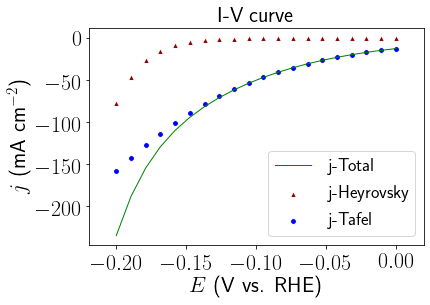

In [10]:
# IV curve on Pt(111) at more negative potential
IV_curve_111_b = Pt111_w.simulate_IV(barrier_type = 'ad_diabetic',range_U = (-0.2,0),U_ref='RHE', U_num = 20, pH = 13, initial_coverage = 0.9, iteration_number = 200,
                   mixing = 0.025, adjust=False,precision=0.001,plot=True,save_fig=True,H2O_var = 0)

In [11]:
# see ditails for IV curve on Pt(100)
IV_curve_100['U_RHE']

array([-0.1       , -0.08888889, -0.07777778, -0.06666667, -0.05555556,
       -0.04444444, -0.03333333, -0.02222222, -0.01111111,  0.        ])

In [12]:
# current density from Volmer-Heyrovsky mechanism
IV_curve_100['J_heyrov']*1000 # unit of mA/cm^2

array([95.82096287, 65.99918838, 45.42216264, 31.24196411, 21.4768996 ,
       14.75418661, 10.12971947,  6.95104507,  4.76681666,  3.26738828])

In [13]:
# current density from Volmer-Tafel mechanism
IV_curve_100['J_tafel']*1000 # unit of mA/cm^2

array([0.00020427, 0.00021163, 0.00021915, 0.00022685, 0.00023474,
       0.00024283, 0.00025108, 0.00025953, 0.00026817, 0.000277  ])

In [14]:
# total current density
IV_curve_100['J_total']*1000 # unit of mA/cm^2

array([95.82116713, 65.99940001, 45.42238179, 31.24219096, 21.47713435,
       14.75442944, 10.12997055,  6.9513046 ,  4.76708483,  3.26766528])

### See more details about the kinetics ###

In [15]:
# distribution of kinetic parameters of HER on Pt(100) with aspect to electrode-solvent distance and potential U
distributions = Pt100_w.get_distributions(barrier_type = 'ad_diabetic', E_H_OH = -6.61, range_U = (-0.2,0), U_num = 100, 
                      pH = 13, initial_coverage = 0.9, iteration_number = 200, 
                      mixing = 0.01, precision=0.001)

  0%|          | 0/200 [00:00<?, ?it/s]

coverage at U=-0.20 V iteration complete
0.823161052337467 0.8239347455571718
coverage at U=-0.20 V iteration complete
0.8231663928067146 0.8236950992622265
coverage at U=-0.20 V iteration complete
0.8231700407275965 0.8235311848949098
coverage at U=-0.19 V iteration complete
0.823172531812085 0.8234191491764546
coverage at U=-0.19 V iteration complete
0.8231742325895681 0.8233426095603922
coverage at U=-0.19 V iteration complete
0.8231753936348519 0.8232903371179431
coverage at U=-0.19 V iteration complete
0.8231761861574212 0.8232546458917774
coverage at U=-0.19 V iteration complete
0.8231767270952695 0.8232302799422452
coverage at U=-0.18 V iteration complete
0.8231770962979444 0.8232136473627696
coverage at U=-0.18 V iteration complete
0.8231773482801334 0.8232022945168471
coverage at U=-0.18 V iteration complete
0.8231775202555391 0.8231945458206973
coverage at U=-0.18 V iteration complete
0.8231776376255201 0.8231892572536328
coverage at U=-0.18 V iteration complete
0.82317771772

  0%|          | 1/200 [00:00<01:55,  1.73it/s]

coverage at U=-0.04 V iteration complete
0.8231778898893101 0.8231778898893151
coverage at U=-0.03 V iteration complete
0.8231778898893101 0.823177889889315
coverage at U=-0.03 V iteration complete
0.8231778898893101 0.8231778898893151
coverage at U=-0.03 V iteration complete
0.8231778898893101 0.823177889889315
coverage at U=-0.03 V iteration complete
0.8231778898893101 0.8231778898893151
coverage at U=-0.03 V iteration complete
0.8231778898893101 0.8231778898893151
coverage at U=-0.02 V iteration complete
0.8231778898893101 0.8231778898893151
coverage at U=-0.02 V iteration complete
0.8231778898893101 0.8231778898893151
coverage at U=-0.02 V iteration complete
0.8231778898893101 0.8231778898893151
coverage at U=-0.02 V iteration complete
0.8231778898893101 0.8231778898893151
coverage at U=-0.02 V iteration complete
0.8231778898893101 0.8231778898893151
coverage at U=-0.01 V iteration complete
0.8231778898893101 0.8231778898893151
coverage at U=-0.01 V iteration complete
0.82317788988

  1%|          | 2/200 [00:00<01:38,  2.01it/s]

coverage at U=-0.12 V iteration complete
0.8231778898893101 0.8231778898893151
coverage at U=-0.12 V iteration complete
0.8231778898893101 0.8231778898893151
coverage at U=-0.11 V iteration complete
0.8231778898893101 0.8231778898893151
coverage at U=-0.11 V iteration complete
0.8231778898893101 0.8231778898893151
coverage at U=-0.11 V iteration complete
0.8231778898893101 0.8231778898893151
coverage at U=-0.11 V iteration complete
0.8231778898893101 0.8231778898893151
coverage at U=-0.11 V iteration complete
0.8231778898893101 0.8231778898893151
coverage at U=-0.10 V iteration complete
0.8231778898893101 0.8231778898893151
coverage at U=-0.10 V iteration complete
0.8231778898893101 0.8231778898893151
coverage at U=-0.10 V iteration complete
0.8231778898893101 0.8231778898893151
coverage at U=-0.10 V iteration complete
0.8231778898893101 0.8231778898893151
coverage at U=-0.09 V iteration complete
0.8231778898893101 0.8231778898893151
coverage at U=-0.09 V iteration complete
0.823177889

  2%|▏         | 3/200 [00:01<01:26,  2.28it/s]

coverage at U=-0.05 V iteration complete
0.8231778898893101 0.8231778898893151
coverage at U=-0.05 V iteration complete
0.8231778898893101 0.8231778898893151
coverage at U=-0.04 V iteration complete
0.8231778898893101 0.8231778898893151
coverage at U=-0.04 V iteration complete
0.8231778898893101 0.8231778898893151
coverage at U=-0.04 V iteration complete
0.8231778898893101 0.8231778898893152
coverage at U=-0.04 V iteration complete
0.8231778898893101 0.8231778898893151
coverage at U=-0.04 V iteration complete
0.8231778898893101 0.8231778898893151
coverage at U=-0.03 V iteration complete
0.8231778898893101 0.823177889889315
coverage at U=-0.03 V iteration complete
0.8231778898893101 0.8231778898893151
coverage at U=-0.03 V iteration complete
0.8231778898893101 0.823177889889315
coverage at U=-0.03 V iteration complete
0.8231778898893101 0.8231778898893151
coverage at U=-0.03 V iteration complete
0.8231778898893101 0.8231778898893151
coverage at U=-0.02 V iteration complete
0.82317788988

  2%|▏         | 4/200 [00:01<01:18,  2.51it/s]

coverage at U=-0.11 V iteration complete
0.8231778898893101 0.8231778898893151
coverage at U=-0.11 V iteration complete
0.8231778898893101 0.8231778898893151
coverage at U=-0.10 V iteration complete
0.8231778898893101 0.8231778898893151
coverage at U=-0.10 V iteration complete
0.8231778898893101 0.8231778898893151
coverage at U=-0.10 V iteration complete
0.8231778898893101 0.8231778898893151
coverage at U=-0.10 V iteration complete
0.8231778898893101 0.8231778898893151
coverage at U=-0.09 V iteration complete
0.8231778898893101 0.8231778898893151
coverage at U=-0.09 V iteration complete
0.8231778898893101 0.8231778898893151
coverage at U=-0.09 V iteration complete
0.8231778898893101 0.8231778898893151
coverage at U=-0.09 V iteration complete
0.8231778898893101 0.8231778898893152
coverage at U=-0.09 V iteration complete
0.8231778898893101 0.8231778898893151
coverage at U=-0.08 V iteration complete
0.8231778898893101 0.8231778898893151
coverage at U=-0.08 V iteration complete
0.823177889

  2%|▎         | 5/200 [00:01<01:10,  2.76it/s]

coverage at U=-0.02 V iteration complete
0.8231778898893101 0.8231778898893151
coverage at U=-0.02 V iteration complete
0.8231778898893101 0.8231778898893151
coverage at U=-0.02 V iteration complete
0.8231778898893101 0.8231778898893151
coverage at U=-0.02 V iteration complete
0.8231778898893101 0.8231778898893151
coverage at U=-0.01 V iteration complete
0.8231778898893101 0.8231778898893151
coverage at U=-0.01 V iteration complete
0.8231778898893101 0.8231778898893151
coverage at U=-0.01 V iteration complete
0.8231778898893101 0.8231778898893151
coverage at U=-0.01 V iteration complete
0.8231778898893101 0.8231778898893151
coverage at U=-0.01 V iteration complete
0.8231778898893101 0.8231778898893151
coverage at U=-0.00 V iteration complete
0.8231778898893101 0.8231778898893151
coverage at U=-0.00 V iteration complete
0.8231778898893101 0.8231778898893151
coverage at U= 0.00 V iteration complete
0.8231778898893101 0.8231778898893151
coverage at U=-0.20 V iteration complete
0.823177889

  3%|▎         | 6/200 [00:02<01:03,  3.04it/s]

coverage at U=-0.06 V iteration complete
0.8231778898893101 0.8231778898893146
coverage at U=-0.06 V iteration complete
0.8231778898893101 0.8231778898893145
coverage at U=-0.06 V iteration complete
0.8231778898893101 0.8231778898893151
coverage at U=-0.05 V iteration complete
0.8231778898893101 0.8231778898893151
coverage at U=-0.05 V iteration complete
0.8231778898893101 0.8231778898893145
coverage at U=-0.05 V iteration complete
0.8231778898893101 0.8231778898893151
coverage at U=-0.05 V iteration complete
0.8231778898893101 0.8231778898893151
coverage at U=-0.05 V iteration complete
0.8231778898893101 0.8231778898893151
coverage at U=-0.04 V iteration complete
0.8231778898893101 0.8231778898893151
coverage at U=-0.04 V iteration complete
0.8231778898893101 0.8231778898893151
coverage at U=-0.04 V iteration complete
0.8231778898893101 0.8231778898893152
coverage at U=-0.04 V iteration complete
0.8231778898893101 0.8231778898893151
coverage at U=-0.04 V iteration complete
0.823177889

  4%|▎         | 7/200 [00:02<01:00,  3.18it/s]

coverage at U=-0.10 V iteration complete
0.8231778898893101 0.8231778898893151
coverage at U=-0.10 V iteration complete
0.8231778898893101 0.8231778898893151
coverage at U=-0.10 V iteration complete
0.8231778898893101 0.8231778898893151
coverage at U=-0.10 V iteration complete
0.8231778898893101 0.8231778898893151
coverage at U=-0.09 V iteration complete
0.8231778898893101 0.8231778898893151
coverage at U=-0.09 V iteration complete
0.8231778898893101 0.8231778898893151
coverage at U=-0.09 V iteration complete
0.8231778898893101 0.8231778898893151
coverage at U=-0.09 V iteration complete
0.8231778898893101 0.8231778898893152
coverage at U=-0.09 V iteration complete
0.8231778898893101 0.8231778898893151
coverage at U=-0.08 V iteration complete
0.8231778898893101 0.8231778898893151
coverage at U=-0.08 V iteration complete
0.8231778898893101 0.8231778898893151
coverage at U=-0.08 V iteration complete
0.8231778898893101 0.8231778898893151
coverage at U=-0.08 V iteration complete
0.823177889

  4%|▍         | 8/200 [00:02<00:59,  3.24it/s]

0.8231778898893101 0.823177889889315
coverage at U=-0.03 V iteration complete
0.8231778898893101 0.8231778898893151
coverage at U=-0.03 V iteration complete
0.8231778898893101 0.8231778898893151
coverage at U=-0.02 V iteration complete
0.8231778898893101 0.8231778898893151
coverage at U=-0.02 V iteration complete
0.8231778898893101 0.8231778898893151
coverage at U=-0.02 V iteration complete
0.8231778898893101 0.8231778898893151
coverage at U=-0.02 V iteration complete
0.8231778898893101 0.8231778898893151
coverage at U=-0.02 V iteration complete
0.8231778898893101 0.8231778898893151
coverage at U=-0.01 V iteration complete
0.8231778898893101 0.8231778898893151
coverage at U=-0.01 V iteration complete
0.8231778898893101 0.8231778898893151
coverage at U=-0.01 V iteration complete
0.8231778898893101 0.8231778898893151
coverage at U=-0.01 V iteration complete
0.8231778898893101 0.8231778898893151
coverage at U=-0.01 V iteration complete
0.8231778898893101 0.8231778898893151
coverage at U=-

  4%|▍         | 9/200 [00:02<00:55,  3.44it/s]

coverage at U=-0.07 V iteration complete
0.8231778898893101 0.823177889889315
coverage at U=-0.07 V iteration complete
0.8231778898893101 0.8231778898893151
coverage at U=-0.07 V iteration complete
0.8231778898893101 0.8231778898893151
coverage at U=-0.06 V iteration complete
0.8231778898893101 0.8231778898893151
coverage at U=-0.06 V iteration complete
0.8231778898893101 0.8231778898893151
coverage at U=-0.06 V iteration complete
0.8231778898893101 0.8231778898893146
coverage at U=-0.06 V iteration complete
0.8231778898893101 0.8231778898893145
coverage at U=-0.06 V iteration complete
0.8231778898893101 0.8231778898893151
coverage at U=-0.05 V iteration complete
0.8231778898893101 0.8231778898893151
coverage at U=-0.05 V iteration complete
0.8231778898893101 0.8231778898893145
coverage at U=-0.05 V iteration complete
0.8231778898893101 0.8231778898893151
coverage at U=-0.05 V iteration complete
0.8231778898893101 0.8231778898893151
coverage at U=-0.05 V iteration complete
0.8231778898

  5%|▌         | 10/200 [00:03<00:53,  3.57it/s]

coverage at U=-0.11 V iteration complete
0.8231778898893101 0.8231778898893151
coverage at U=-0.11 V iteration complete
0.8231778898893101 0.8231778898893151
coverage at U=-0.11 V iteration complete
0.8231778898893101 0.8231778898893151
coverage at U=-0.11 V iteration complete
0.8231778898893101 0.8231778898893151
coverage at U=-0.10 V iteration complete
0.8231778898893101 0.8231778898893151
coverage at U=-0.10 V iteration complete
0.8231778898893101 0.8231778898893151
coverage at U=-0.10 V iteration complete
0.8231778898893101 0.8231778898893151
coverage at U=-0.10 V iteration complete
0.8231778898893101 0.8231778898893151
coverage at U=-0.09 V iteration complete
0.8231778898893101 0.8231778898893151
coverage at U=-0.09 V iteration complete
0.8231778898893101 0.8231778898893151
coverage at U=-0.09 V iteration complete
0.8231778898893101 0.8231778898893151
coverage at U=-0.09 V iteration complete
0.8231778898893101 0.8231778898893152
coverage at U=-0.09 V iteration complete
0.823177889

  6%|▌         | 11/200 [00:03<00:52,  3.60it/s]

coverage at U=-0.00 V iteration complete
0.8231778898893101 0.8231778898893151
coverage at U= 0.00 V iteration complete
0.8231778898893101 0.8231778898893151
coverage at U=-0.20 V iteration complete
0.8231778898893101 0.8231778898893151
coverage at U=-0.20 V iteration complete
0.8231778898893101 0.8231778898893151
coverage at U=-0.20 V iteration complete
0.8231778898893101 0.8231778898893151
coverage at U=-0.19 V iteration complete
0.8231778898893101 0.8231778898893152
coverage at U=-0.19 V iteration complete
0.8231778898893101 0.8231778898893151
coverage at U=-0.19 V iteration complete
0.8231778898893101 0.8231778898893152
coverage at U=-0.19 V iteration complete
0.8231778898893101 0.8231778898893151
coverage at U=-0.19 V iteration complete
0.8231778898893101 0.8231778898893151
coverage at U=-0.18 V iteration complete
0.8231778898893101 0.8231778898893152
coverage at U=-0.18 V iteration complete
0.8231778898893101 0.8231778898893151
coverage at U=-0.18 V iteration complete
0.823177889

  6%|▌         | 12/200 [00:03<00:51,  3.67it/s]

coverage at U=-0.05 V iteration complete
0.8231778898893101 0.8231778898893151
coverage at U=-0.04 V iteration complete
0.8231778898893101 0.8231778898893151
coverage at U=-0.04 V iteration complete
0.8231778898893101 0.8231778898893151
coverage at U=-0.04 V iteration complete
0.8231778898893101 0.8231778898893152
coverage at U=-0.04 V iteration complete
0.8231778898893101 0.8231778898893151
coverage at U=-0.04 V iteration complete
0.8231778898893101 0.8231778898893151
coverage at U=-0.03 V iteration complete
0.8231778898893101 0.823177889889315
coverage at U=-0.03 V iteration complete
0.8231778898893101 0.8231778898893151
coverage at U=-0.03 V iteration complete
0.8231778898893101 0.823177889889315
coverage at U=-0.03 V iteration complete
0.8231778898893101 0.8231778898893151
coverage at U=-0.03 V iteration complete
0.8231778898893101 0.8231778898893151
coverage at U=-0.02 V iteration complete
0.8231778898893101 0.8231778898893151
coverage at U=-0.02 V iteration complete
0.82317788988

  6%|▋         | 13/200 [00:03<00:49,  3.75it/s]

coverage at U=-0.09 V iteration complete
0.8231778898893101 0.8231778898893152
coverage at U=-0.09 V iteration complete
0.8231778898893101 0.8231778898893151
coverage at U=-0.08 V iteration complete
0.8231778898893101 0.8231778898893151
coverage at U=-0.08 V iteration complete
0.8231778898893101 0.8231778898893151
coverage at U=-0.08 V iteration complete
0.8231778898893101 0.8231778898893151
coverage at U=-0.08 V iteration complete
0.8231778898893101 0.8231778898893151
coverage at U=-0.08 V iteration complete
0.8231778898893101 0.8231778898893151
coverage at U=-0.07 V iteration complete
0.8231778898893101 0.8231778898893151
coverage at U=-0.07 V iteration complete
0.8231778898893101 0.8231778898893152
coverage at U=-0.07 V iteration complete
0.8231778898893101 0.823177889889315
coverage at U=-0.07 V iteration complete
0.8231778898893101 0.8231778898893151
coverage at U=-0.07 V iteration complete
0.8231778898893101 0.8231778898893151
coverage at U=-0.06 V iteration complete
0.8231778898

  7%|▋         | 14/200 [00:04<00:49,  3.78it/s]

coverage at U=-0.14 V iteration complete
0.8231778898893101 0.8231778898893153
coverage at U=-0.13 V iteration complete
0.8231778898893101 0.8231778898893151
coverage at U=-0.13 V iteration complete
0.8231778898893101 0.8231778898893154
coverage at U=-0.13 V iteration complete
0.8231778898893101 0.8231778898893145
coverage at U=-0.13 V iteration complete
0.8231778898893101 0.8231778898893152
coverage at U=-0.13 V iteration complete
0.8231778898893101 0.8231778898893151
coverage at U=-0.12 V iteration complete
0.8231778898893101 0.8231778898893145
coverage at U=-0.12 V iteration complete
0.8231778898893101 0.8231778898893146
coverage at U=-0.12 V iteration complete
0.8231778898893101 0.8231778898893151
coverage at U=-0.12 V iteration complete
0.8231778898893101 0.8231778898893151
coverage at U=-0.12 V iteration complete
0.8231778898893101 0.8231778898893151
coverage at U=-0.11 V iteration complete
0.8231778898893101 0.8231778898893151
coverage at U=-0.11 V iteration complete
0.823177889

  8%|▊         | 15/200 [00:04<00:48,  3.79it/s]

coverage at U=-0.01 V iteration complete
0.8231778898893101 0.8231778898893151
coverage at U=-0.01 V iteration complete
0.8231778898893101 0.8231778898893151
coverage at U=-0.01 V iteration complete
0.8231778898893101 0.8231778898893151
coverage at U=-0.01 V iteration complete
0.8231778898893101 0.8231778898893151
coverage at U=-0.00 V iteration complete
0.8231778898893101 0.8231778898893151
coverage at U=-0.00 V iteration complete
0.8231778898893101 0.8231778898893151
coverage at U= 0.00 V iteration complete
0.8231778898893101 0.8231778898893151
coverage at U=-0.20 V iteration complete
0.8231778898893101 0.8231778898893151
coverage at U=-0.20 V iteration complete
0.8231778898893101 0.8231778898893151
coverage at U=-0.20 V iteration complete
0.8231778898893101 0.8231778898893151
coverage at U=-0.19 V iteration complete
0.8231778898893101 0.8231778898893152
coverage at U=-0.19 V iteration complete
0.8231778898893101 0.8231778898893151
coverage at U=-0.19 V iteration complete
0.823177889

  8%|▊         | 16/200 [00:04<00:47,  3.85it/s]

coverage at U=-0.05 V iteration complete
0.8231778898893101 0.8231778898893151
coverage at U=-0.05 V iteration complete
0.8231778898893101 0.8231778898893151
coverage at U=-0.05 V iteration complete
0.8231778898893101 0.8231778898893151
coverage at U=-0.04 V iteration complete
0.8231778898893101 0.8231778898893151
coverage at U=-0.04 V iteration complete
0.8231778898893101 0.8231778898893151
coverage at U=-0.04 V iteration complete
0.8231778898893101 0.8231778898893152
coverage at U=-0.04 V iteration complete
0.8231778898893101 0.8231778898893151
coverage at U=-0.04 V iteration complete
0.8231778898893101 0.8231778898893151
coverage at U=-0.03 V iteration complete
0.8231778898893101 0.823177889889315
coverage at U=-0.03 V iteration complete
0.8231778898893101 0.8231778898893151
coverage at U=-0.03 V iteration complete
0.8231778898893101 0.823177889889315
coverage at U=-0.03 V iteration complete
0.8231778898893101 0.8231778898893151
coverage at U=-0.03 V iteration complete
0.82317788988

  8%|▊         | 17/200 [00:04<00:47,  3.88it/s]

coverage at U=-0.09 V iteration complete
0.8231778898893101 0.8231778898893151
coverage at U=-0.09 V iteration complete
0.8231778898893101 0.8231778898893152
coverage at U=-0.09 V iteration complete
0.8231778898893101 0.8231778898893151
coverage at U=-0.08 V iteration complete
0.8231778898893101 0.8231778898893151
coverage at U=-0.08 V iteration complete
0.8231778898893101 0.8231778898893151
coverage at U=-0.08 V iteration complete
0.8231778898893101 0.8231778898893151
coverage at U=-0.08 V iteration complete
0.8231778898893101 0.8231778898893151
coverage at U=-0.08 V iteration complete
0.8231778898893101 0.8231778898893151
coverage at U=-0.07 V iteration complete
0.8231778898893101 0.8231778898893151
coverage at U=-0.07 V iteration complete
0.8231778898893101 0.8231778898893152
coverage at U=-0.07 V iteration complete
0.8231778898893101 0.823177889889315
coverage at U=-0.07 V iteration complete
0.8231778898893101 0.8231778898893151
coverage at U=-0.07 V iteration complete
0.8231778898

  9%|▉         | 18/200 [00:05<00:48,  3.78it/s]

coverage at U=-0.14 V iteration complete
0.8231778898893101 0.8231778898893151
coverage at U=-0.14 V iteration complete
0.8231778898893101 0.8231778898893151
coverage at U=-0.14 V iteration complete
0.8231778898893101 0.8231778898893151
coverage at U=-0.14 V iteration complete
0.8231778898893101 0.8231778898893154
coverage at U=-0.14 V iteration complete
0.8231778898893101 0.8231778898893153
coverage at U=-0.13 V iteration complete
0.8231778898893101 0.8231778898893151
coverage at U=-0.13 V iteration complete
0.8231778898893101 0.8231778898893154
coverage at U=-0.13 V iteration complete
0.8231778898893101 0.8231778898893145
coverage at U=-0.13 V iteration complete
0.8231778898893101 0.8231778898893152
coverage at U=-0.13 V iteration complete
0.8231778898893101 0.8231778898893151
coverage at U=-0.12 V iteration complete
0.8231778898893101 0.8231778898893145
coverage at U=-0.12 V iteration complete
0.8231778898893101 0.8231778898893146
coverage at U=-0.12 V iteration complete
0.823177889

 10%|▉         | 19/200 [00:05<00:51,  3.55it/s]

coverage at U=-0.06 V iteration complete
0.8231778898893101 0.8231778898893145
coverage at U=-0.06 V iteration complete
0.8231778898893101 0.8231778898893151
coverage at U=-0.05 V iteration complete
0.8231778898893101 0.8231778898893151
coverage at U=-0.05 V iteration complete
0.8231778898893101 0.8231778898893145
coverage at U=-0.05 V iteration complete
0.8231778898893101 0.8231778898893151
coverage at U=-0.05 V iteration complete
0.8231778898893101 0.8231778898893151
coverage at U=-0.05 V iteration complete
0.8231778898893101 0.8231778898893151
coverage at U=-0.04 V iteration complete
0.8231778898893101 0.8231778898893151
coverage at U=-0.04 V iteration complete
0.8231778898893101 0.8231778898893151
coverage at U=-0.04 V iteration complete
0.8231778898893101 0.8231778898893152
coverage at U=-0.04 V iteration complete
0.8231778898893101 0.8231778898893151
coverage at U=-0.04 V iteration complete
0.8231778898893101 0.8231778898893151
coverage at U=-0.03 V iteration complete
0.823177889

 10%|█         | 20/200 [00:05<00:51,  3.53it/s]

coverage at U=-0.14 V iteration complete
0.8231778898893101 0.8231778898893154
coverage at U=-0.14 V iteration complete
0.8231778898893101 0.8231778898893153
coverage at U=-0.13 V iteration complete
0.8231778898893101 0.8231778898893151
coverage at U=-0.13 V iteration complete
0.8231778898893101 0.8231778898893154
coverage at U=-0.13 V iteration complete
0.8231778898893101 0.8231778898893145
coverage at U=-0.13 V iteration complete
0.8231778898893101 0.8231778898893152
coverage at U=-0.13 V iteration complete
0.8231778898893101 0.8231778898893151
coverage at U=-0.12 V iteration complete
0.8231778898893101 0.8231778898893145
coverage at U=-0.12 V iteration complete
0.8231778898893101 0.8231778898893146
coverage at U=-0.12 V iteration complete
0.8231778898893101 0.8231778898893151
coverage at U=-0.12 V iteration complete
0.8231778898893101 0.8231778898893151
coverage at U=-0.12 V iteration complete
0.8231778898893101 0.8231778898893151
coverage at U=-0.11 V iteration complete
0.823177889

 10%|█         | 21/200 [00:06<00:50,  3.53it/s]

coverage at U=-0.03 V iteration complete
0.8231778898893101 0.8231778898893151
coverage at U=-0.03 V iteration complete
0.8231778898893101 0.823177889889315
coverage at U=-0.03 V iteration complete
0.8231778898893101 0.8231778898893151
coverage at U=-0.03 V iteration complete
0.8231778898893101 0.8231778898893151
coverage at U=-0.02 V iteration complete
0.8231778898893101 0.8231778898893151
coverage at U=-0.02 V iteration complete
0.8231778898893101 0.8231778898893151
coverage at U=-0.02 V iteration complete
0.8231778898893101 0.8231778898893151
coverage at U=-0.02 V iteration complete
0.8231778898893101 0.8231778898893151
coverage at U=-0.02 V iteration complete
0.8231778898893101 0.8231778898893151
coverage at U=-0.01 V iteration complete
0.8231778898893101 0.8231778898893151
coverage at U=-0.01 V iteration complete
0.8231778898893101 0.8231778898893151
coverage at U=-0.01 V iteration complete
0.8231778898893101 0.8231778898893151
coverage at U=-0.01 V iteration complete
0.8231778898

 11%|█         | 22/200 [00:06<00:51,  3.45it/s]

coverage at U=-0.11 V iteration complete
0.8231778898893101 0.8231778898893151
coverage at U=-0.10 V iteration complete
0.8231778898893101 0.8231778898893151
coverage at U=-0.10 V iteration complete
0.8231778898893101 0.8231778898893151
coverage at U=-0.10 V iteration complete
0.8231778898893101 0.8231778898893151
coverage at U=-0.10 V iteration complete
0.8231778898893101 0.8231778898893151
coverage at U=-0.09 V iteration complete
0.8231778898893101 0.8231778898893151
coverage at U=-0.09 V iteration complete
0.8231778898893101 0.8231778898893151
coverage at U=-0.09 V iteration complete
0.8231778898893101 0.8231778898893151
coverage at U=-0.09 V iteration complete
0.8231778898893101 0.8231778898893152
coverage at U=-0.09 V iteration complete
0.8231778898893101 0.8231778898893151
coverage at U=-0.08 V iteration complete
0.8231778898893101 0.8231778898893151
coverage at U=-0.08 V iteration complete
0.8231778898893101 0.8231778898893151
coverage at U=-0.08 V iteration complete
0.823177889

 12%|█▏        | 23/200 [00:06<00:52,  3.36it/s]

coverage at U=-0.03 V iteration complete
0.8231778898893101 0.8231778898893151
coverage at U=-0.03 V iteration complete
0.8231778898893101 0.823177889889315
coverage at U=-0.03 V iteration complete
0.8231778898893101 0.8231778898893151
coverage at U=-0.03 V iteration complete
0.8231778898893101 0.8231778898893151
coverage at U=-0.02 V iteration complete
0.8231778898893101 0.8231778898893151
coverage at U=-0.02 V iteration complete
0.8231778898893101 0.8231778898893151
coverage at U=-0.02 V iteration complete
0.8231778898893101 0.8231778898893151
coverage at U=-0.02 V iteration complete
0.8231778898893101 0.8231778898893151
coverage at U=-0.02 V iteration complete
0.8231778898893101 0.8231778898893151
coverage at U=-0.01 V iteration complete
0.8231778898893101 0.8231778898893151
coverage at U=-0.01 V iteration complete
0.8231778898893101 0.8231778898893151
coverage at U=-0.01 V iteration complete
0.8231778898893101 0.8231778898893151
coverage at U=-0.01 V iteration complete
0.8231778898

 12%|█▏        | 24/200 [00:07<00:52,  3.34it/s]

coverage at U=-0.11 V iteration complete
0.8231778898888166 0.8231778899115517
coverage at U=-0.11 V iteration complete
0.8231778898889732 0.8231778899044864
coverage at U=-0.11 V iteration complete
0.8231778898890801 0.8231778898996658
coverage at U=-0.11 V iteration complete
0.8231778898891532 0.8231778898963852
coverage at U=-0.10 V iteration complete
0.8231778898892029 0.8231778898941279
coverage at U=-0.10 V iteration complete
0.823177889889237 0.8231778898926059
coverage at U=-0.10 V iteration complete
0.8231778898892601 0.8231778898915516
coverage at U=-0.10 V iteration complete
0.823177889889276 0.8231778898908498
coverage at U=-0.09 V iteration complete
0.8231778898892868 0.8231778898903566
coverage at U=-0.09 V iteration complete
0.8231778898892942 0.8231778898900297
coverage at U=-0.09 V iteration complete
0.8231778898892993 0.8231778898898032
coverage at U=-0.09 V iteration complete
0.8231778898893027 0.8231778898896394
coverage at U=-0.09 V iteration complete
0.82317788988

 12%|█▎        | 25/200 [00:07<00:50,  3.46it/s]

coverage at U=-0.01 V iteration complete
0.8231778898893101 0.8231778898893151
coverage at U=-0.01 V iteration complete
0.8231778898893101 0.8231778898893151
coverage at U=-0.01 V iteration complete
0.8231778898893101 0.8231778898893151
coverage at U=-0.00 V iteration complete
0.8231778898893101 0.8231778898893151
coverage at U=-0.00 V iteration complete
0.8231778898893101 0.8231778898893151
coverage at U= 0.00 V iteration complete
0.8231778898893101 0.8231778898893151
coverage at U=-0.20 V iteration complete
0.8231054492435017 0.8240191366816819
coverage at U=-0.20 V iteration complete
0.8231125049086869 0.8238110157620262
coverage at U=-0.20 V iteration complete
0.8231180486058758 0.8236668746275736
coverage at U=-0.19 V iteration complete
0.823122531376854 0.8235663257036921
coverage at U=-0.19 V iteration complete
0.8231262652915948 0.8234959228509436
coverage at U=-0.19 V iteration complete
0.8231294655995446 0.8234462960865654
coverage at U=-0.19 V iteration complete
0.8231322793

 13%|█▎        | 26/200 [00:07<00:49,  3.54it/s]

coverage at U=-0.06 V iteration complete
0.823177856132264 0.8231792705227281
coverage at U=-0.06 V iteration complete
0.8231778665783303 0.8231789007388913
coverage at U=-0.06 V iteration complete
0.8231778739513925 0.8231786038845627
coverage at U=-0.06 V iteration complete
0.8231778790122882 0.8231783800409573
coverage at U=-0.05 V iteration complete
0.823177882466158 0.8231782243992639
coverage at U=-0.05 V iteration complete
0.8231778848232928 0.823178118179635
coverage at U=-0.05 V iteration complete
0.8231778864319473 0.8231780456887452
coverage at U=-0.05 V iteration complete
0.8231778875297926 0.8231779962164748
coverage at U=-0.05 V iteration complete
0.8231778882790299 0.8231779624535256
coverage at U=-0.04 V iteration complete
0.8231778887903557 0.823177939411607
coverage at U=-0.04 V iteration complete
0.8231778891393159 0.8231779236863765
coverage at U=-0.04 V iteration complete
0.8231778893774678 0.8231779129545117
coverage at U=-0.04 V iteration complete
0.8231778895399

 14%|█▎        | 27/200 [00:07<00:48,  3.56it/s]

coverage at U=-0.12 V iteration complete
0.8231403431219899 0.8233139179086866
coverage at U=-0.12 V iteration complete
0.8231420407307528 0.8233101039982833
coverage at U=-0.12 V iteration complete
0.8231436837691377 0.8233063445692417
coverage at U=-0.12 V iteration complete
0.8231452733104797 0.8233026379033339
coverage at U=-0.12 V iteration complete
0.8231468104069137 0.8232989829538808
coverage at U=-0.11 V iteration complete
0.8231482954318378 0.8232953128993119
coverage at U=-0.11 V iteration complete
0.8231497293258877 0.8232916848368346
coverage at U=-0.11 V iteration complete
0.8231511134182005 0.8232881385571592
coverage at U=-0.11 V iteration complete
0.8231524489254127 0.8232846641394295
coverage at U=-0.11 V iteration complete
0.8231537369852716 0.8232812549112968
coverage at U=-0.10 V iteration complete
0.8231549786795984 0.8232779064179543
coverage at U=-0.10 V iteration complete
0.8231561750499747 0.8232746157172255
coverage at U=-0.10 V iteration complete
0.823157327

 14%|█▍        | 28/200 [00:08<00:48,  3.55it/s]

coverage at U=-0.02 V iteration complete
0.8231645176284471 0.8232433338518415
coverage at U=-0.02 V iteration complete
0.8231652820536245 0.8232409601461844
coverage at U=-0.01 V iteration complete
0.8231660150444002 0.8232385811311993
coverage at U=-0.01 V iteration complete
0.8231667176910846 0.8232362797128349
coverage at U=-0.01 V iteration complete
0.8231673909613643 0.8232340447190514
coverage at U=-0.01 V iteration complete
0.8231680357365305 0.823231868477986
coverage at U=-0.01 V iteration complete
0.8231686528362188 0.8232297457053536
coverage at U=-0.00 V iteration complete
0.8231692430353009 0.8232276727444384
coverage at U=-0.00 V iteration complete
0.8231698070754155 0.8232256470467642
coverage at U= 0.00 V iteration complete
0.8231703456728348 0.8232236668173425
coverage at U=-0.20 V iteration complete
0.8226146522194226 0.8233758098541567
coverage at U=-0.20 V iteration complete
0.8226231906838815 0.8234684986653086
coverage at U=-0.20 V iteration complete
0.8226322677

 14%|█▍        | 29/200 [00:08<00:48,  3.54it/s]

coverage at U=-0.09 V iteration complete
0.8230115164813079 0.8234419356719302
coverage at U=-0.08 V iteration complete
0.8230157828221467 0.8234381505651964
coverage at U=-0.08 V iteration complete
0.8230199688874039 0.8234343893478634
coverage at U=-0.08 V iteration complete
0.8230240757217357 0.8234306523205871
coverage at U=-0.08 V iteration complete
0.82302810436225 0.8234269397731652
coverage at U=-0.08 V iteration complete
0.8230320558384717 0.8234232519844157
coverage at U=-0.07 V iteration complete
0.823035931172308 0.8234195892221027
coverage at U=-0.07 V iteration complete
0.823039731378014 0.8234159517429076
coverage at U=-0.07 V iteration complete
0.8230434574621571 0.823412339792325
coverage at U=-0.07 V iteration complete
0.8230471104235824 0.823408753604682
coverage at U=-0.07 V iteration complete
0.8230506912533777 0.8234051934031171
coverage at U=-0.06 V iteration complete
0.8230542009348388 0.8234016593994945
coverage at U=-0.06 V iteration complete
0.823057640443435

 15%|█▌        | 30/200 [00:08<00:49,  3.42it/s]

coverage at U=-0.01 V iteration complete
0.8230307123875689 0.8233968426330728
coverage at U=-0.01 V iteration complete
0.8230343442500923 0.8233938986399127
coverage at U=-0.01 V iteration complete
0.8230379113344756 0.8233910526884287
coverage at U=-0.00 V iteration complete
0.8230414150222445 0.8233882801113668
coverage at U=-0.00 V iteration complete
0.8230448565117198 0.8233855639697683
coverage at U= 0.00 V iteration complete
0.8230482368727688 0.823382892616625
coverage at U=-0.20 V iteration complete
0.8218276292986522 0.8225879636377794
coverage at U=-0.20 V iteration complete
0.8218460109677385 0.8225901819466225
coverage at U=-0.20 V iteration complete
0.8218641000707092 0.8225963713951266
coverage at U=-0.19 V iteration complete
0.8218819478420428 0.8226043973419028
coverage at U=-0.19 V iteration complete
0.8218995793245486 0.8226132028310059
coverage at U=-0.19 V iteration complete
0.8219169960579658 0.8226218411664653
coverage at U=-0.19 V iteration complete
0.8219342113

 16%|█▌        | 31/200 [00:09<00:51,  3.28it/s]

coverage at U=-0.12 V iteration complete
0.8224203889739196 0.8232509400895642
coverage at U=-0.12 V iteration complete
0.8224296719093279 0.8233486825147587
coverage at U=-0.11 V iteration complete
0.8224395290267227 0.8234153836488076
coverage at U=-0.11 V iteration complete
0.8224567748228584 0.8231531488725965
coverage at U=-0.11 V iteration complete
0.8224650016205513 0.8232794545921496
coverage at U=-0.11 V iteration complete
0.8224740094404275 0.8233657836081691
coverage at U=-0.11 V iteration complete
0.8224835152998052 0.8234245953781997
coverage at U=-0.10 V iteration complete
0.82249332471255 0.8234644565742785
coverage at U=-0.10 V iteration complete
0.8225033040940816 0.82349126286571
coverage at U=-0.10 V iteration complete
0.8225202860672924 0.8232057889938214
coverage at U=-0.10 V iteration complete
0.822528202164416 0.8233118957796518
coverage at U=-0.09 V iteration complete
0.8225367629106571 0.8233842767885248
coverage at U=-0.09 V iteration complete
0.82254572980814

 16%|█▌        | 32/200 [00:09<00:55,  3.02it/s]

coverage at U=-0.09 V iteration complete
0.8221911722291751 0.8230825956203494
coverage at U=-0.09 V iteration complete
0.8222084212125463 0.8229054646044858
coverage at U=-0.09 V iteration complete
0.8222172346115012 0.8230897611080332
coverage at U=-0.08 V iteration complete
0.8222272290756246 0.8232166810238458
coverage at U=-0.08 V iteration complete
0.822245423365529 0.8229805834562981
coverage at U=-0.08 V iteration complete
0.8222543809766779 0.8231411844804241
coverage at U=-0.08 V iteration complete
0.8222643546201719 0.8232517453260709
coverage at U=-0.08 V iteration complete
0.8222823208730643 0.8230081373003063
coverage at U=-0.07 V iteration complete
0.8222910956914613 0.823159802712769
coverage at U=-0.07 V iteration complete
0.8223008264446977 0.8232641710151065
coverage at U=-0.07 V iteration complete
0.8223183116041454 0.8230245575778141
coverage at U=-0.07 V iteration complete
0.8223268340325329 0.823170554442897
coverage at U=-0.07 V iteration complete
0.822336270688

 16%|█▋        | 33/200 [00:09<01:00,  2.74it/s]

coverage at U=-0.09 V iteration complete
0.8217145494602743 0.8225388458867217
coverage at U=-0.09 V iteration complete
0.8217328806788818 0.8224747181080642
coverage at U=-0.09 V iteration complete
0.8217501610801838 0.8224493883218776
coverage at U=-0.08 V iteration complete
0.8217600366977168 0.8227377228334795
coverage at U=-0.08 V iteration complete
0.8217799496736724 0.822585718487237
coverage at U=-0.08 V iteration complete
0.8217977573436421 0.8225182060157508
coverage at U=-0.08 V iteration complete
0.821807649232252 0.8227869462046352
coverage at U=-0.08 V iteration complete
0.821827347964381 0.8226243534834956
coverage at U=-0.07 V iteration complete
0.821844816624091 0.8225514616518098
coverage at U=-0.07 V iteration complete
0.8218544749314903 0.8228106473640154
coverage at U=-0.07 V iteration complete
0.8218736771641251 0.822650428854664
coverage at U=-0.07 V iteration complete
0.8218906908405604 0.8225787860493824
coverage at U=-0.07 V iteration complete
0.82190009477896

 17%|█▋        | 34/200 [00:10<01:07,  2.46it/s]

coverage at U= 0.00 V iteration complete
0.8218794113787146 0.8226370805691265
coverage at U=-0.20 V iteration complete
0.8187543128729508 0.8194837594855128
coverage at U=-0.20 V iteration complete
0.8187894850422204 0.8195682774085777
coverage at U=-0.20 V iteration complete
0.8188252437042656 0.8196169182505852
coverage at U=-0.19 V iteration complete
0.8188610268066207 0.8196531076223815
coverage at U=-0.19 V iteration complete
0.8188966429455458 0.8196848834466982
coverage at U=-0.19 V iteration complete
0.8189320278753054 0.8197150045002545
coverage at U=-0.19 V iteration complete
0.8189671609598621 0.8197444181484005
coverage at U=-0.19 V iteration complete
0.8190020365090477 0.8197734503706776
coverage at U=-0.18 V iteration complete
0.8190366539480245 0.8198022140664095
coverage at U=-0.18 V iteration complete
0.819071014447246 0.8198307490949176
coverage at U=-0.18 V iteration complete
0.8191051197676757 0.8198590702854768
coverage at U=-0.18 V iteration complete
0.8191389718

 18%|█▊        | 35/200 [00:11<01:18,  2.11it/s]

coverage at U=-0.00 V iteration complete
0.821295046757957 0.8220165037445493
coverage at U= 0.00 V iteration complete
0.8213127244336392 0.8220285195808277
coverage at U=-0.20 V iteration complete
0.8176242392078661 0.818425798635219
coverage at U=-0.20 V iteration complete
0.8176637333404692 0.8185415855284313
coverage at U=-0.20 V iteration complete
0.8177042279761424 0.8186042153758678
coverage at U=-0.19 V iteration complete
0.8177448833753241 0.8186482886163573
coverage at U=-0.19 V iteration complete
0.8177854102412371 0.8186857872102786
coverage at U=-0.19 V iteration complete
0.8178257098980543 0.8187208620244733
coverage at U=-0.19 V iteration complete
0.8178657496693759 0.8187549514815711
coverage at U=-0.19 V iteration complete
0.8179055197165123 0.8187885546654369
coverage at U=-0.18 V iteration complete
0.8179450180946007 0.8188218454811974
coverage at U=-0.18 V iteration complete
0.8179842455808402 0.8188548853106907
coverage at U=-0.18 V iteration complete
0.81802320388

 18%|█▊        | 36/200 [00:11<01:26,  1.90it/s]

coverage at U=-0.01 V iteration complete
0.8204774119536755 0.8213809543707864
coverage at U=-0.01 V iteration complete
0.8204995419036495 0.8213972996224028
coverage at U=-0.01 V iteration complete
0.8205215373375857 0.8214137776858155
coverage at U=-0.01 V iteration complete
0.8205433603944329 0.8214286052873806
coverage at U=-0.00 V iteration complete
0.8205650337878913 0.8214441333775798
coverage at U=-0.00 V iteration complete
0.8205865703942049 0.8214600487708523
coverage at U= 0.00 V iteration complete
0.8206079763541417 0.821476144581987
coverage at U=-0.20 V iteration complete
0.8163390838448067 0.8171513006554173
coverage at U=-0.20 V iteration complete
0.8163819889285041 0.8173389708043501
coverage at U=-0.20 V iteration complete
0.8164340852522765 0.817139548182248
coverage at U=-0.19 V iteration complete
0.8164749400707689 0.8173859542477714
coverage at U=-0.19 V iteration complete
0.816518805873418 0.8174969692473067
coverage at U=-0.19 V iteration complete
0.816570613985

 18%|█▊        | 37/200 [00:12<01:35,  1.71it/s]

coverage at U=-0.05 V iteration complete
0.8190318041911171 0.8197236618960477
coverage at U=-0.05 V iteration complete
0.8190552322708419 0.8200082927195028
coverage at U=-0.05 V iteration complete
0.8190892788204466 0.8198398605650972
coverage at U=-0.05 V iteration complete
0.8191132461635987 0.8200881064711718
coverage at U=-0.05 V iteration complete
0.8191473795900615 0.8198997905642963
coverage at U=-0.04 V iteration complete
0.8191711619552189 0.8201384333725266
coverage at U=-0.04 V iteration complete
0.8192049501896885 0.8199494691192494
coverage at U=-0.04 V iteration complete
0.8192284824837072 0.8201854086127708
coverage at U=-0.04 V iteration complete
0.8192618896151542 0.8199979023245819
coverage at U=-0.04 V iteration complete
0.8192851178616416 0.8202296104418815
coverage at U=-0.03 V iteration complete
0.819318092170668 0.8200442898982002
coverage at U=-0.03 V iteration complete
0.8193410530486759 0.8202745037785153
coverage at U=-0.03 V iteration complete
0.8193736534

 19%|█▉        | 38/200 [00:13<01:39,  1.62it/s]

coverage at U=-0.05 V iteration complete
0.8179572439346897 0.8187082495849364
coverage at U=-0.05 V iteration complete
0.8179909587475555 0.8187366822855656
coverage at U=-0.05 V iteration complete
0.8180244850979345 0.8187658894951612
coverage at U=-0.05 V iteration complete
0.8180578389231717 0.8187952793851768
coverage at U=-0.04 V iteration complete
0.8180910247897436 0.8188247328092447
coverage at U=-0.04 V iteration complete
0.8181239792709011 0.8188524771689798
coverage at U=-0.04 V iteration complete
0.8181567487793457 0.8188810112337246
coverage at U=-0.04 V iteration complete
0.818189350983536 0.8189097712865324
coverage at U=-0.04 V iteration complete
0.8182217897797451 0.8189386346533349
coverage at U=-0.03 V iteration complete
0.818254001168802 0.8189656750339528
coverage at U=-0.03 V iteration complete
0.8182860336666747 0.8189936129798197
coverage at U=-0.03 V iteration complete
0.8183179048816069 0.8190217813037308
coverage at U=-0.03 V iteration complete
0.81834960794

 20%|█▉        | 39/200 [00:13<01:46,  1.52it/s]

coverage at U=-0.00 V iteration complete
0.8175872353881167 0.8183307688680431
coverage at U= 0.00 V iteration complete
0.8176206839483228 0.8183606185817003
coverage at U=-0.20 V iteration complete
0.8114941800875227 0.8124313438455403
coverage at U=-0.20 V iteration complete
0.8115575986881621 0.8124310999329496
coverage at U=-0.20 V iteration complete
0.8116196084164861 0.8124733230859222
coverage at U=-0.19 V iteration complete
0.8116810187002629 0.8125261507908927
coverage at U=-0.19 V iteration complete
0.8117420376300284 0.8125814687236366
coverage at U=-0.19 V iteration complete
0.8118027202115835 0.8126372143263816
coverage at U=-0.19 V iteration complete
0.811863082508633 0.8126928651869428
coverage at U=-0.19 V iteration complete
0.811923121871544 0.8127485632253715
coverage at U=-0.18 V iteration complete
0.8119828062578475 0.8128030615207176
coverage at U=-0.18 V iteration complete
0.8120421707540295 0.8128577279421876
coverage at U=-0.18 V iteration complete
0.81210122630

 20%|██        | 40/200 [00:14<01:51,  1.44it/s]

coverage at U=-0.07 V iteration complete
0.8149554190903977 0.8159403410530536
coverage at U=-0.06 V iteration complete
0.814999525049535 0.8159830669858136
coverage at U=-0.06 V iteration complete
0.8150434083961274 0.8160217635499221
coverage at U=-0.06 V iteration complete
0.8150870970685773 0.8160608926352856
coverage at U=-0.06 V iteration complete
0.8151306020784641 0.8161000865184812
coverage at U=-0.06 V iteration complete
0.8151738922075438 0.8161386425483206
coverage at U=-0.05 V iteration complete
0.815216935875866 0.8161759745469588
coverage at U=-0.05 V iteration complete
0.8152597811802712 0.816214185526464
coverage at U=-0.05 V iteration complete
0.8153024461116253 0.8162526203367358
coverage at U=-0.05 V iteration complete
0.815344865250217 0.8162896157226432
coverage at U=-0.05 V iteration complete
0.8153870659299209 0.816326738624196
coverage at U=-0.04 V iteration complete
0.8154290825296199 0.8163644475306632
coverage at U=-0.04 V iteration complete
0.81547090756465

 20%|██        | 41/200 [00:15<02:03,  1.29it/s]

coverage at U=-0.05 V iteration complete
0.8138006031758743 0.814726271901611
coverage at U=-0.04 V iteration complete
0.8138524280579726 0.8145557613557265
coverage at U=-0.04 V iteration complete
0.8138934636660516 0.8148098383437405
coverage at U=-0.04 V iteration complete
0.8139377196282376 0.8149259976932464
coverage at U=-0.04 V iteration complete
0.8139901883517688 0.8147018099108294
coverage at U=-0.04 V iteration complete
0.8140309688831924 0.814941293689075
coverage at U=-0.03 V iteration complete
0.8140747148600116 0.8150512095971749
coverage at U=-0.03 V iteration complete
0.8141264866451949 0.8148282118580781
coverage at U=-0.03 V iteration complete
0.8141667303383437 0.8150647061592089
coverage at U=-0.03 V iteration complete
0.8142098757477846 0.8151725696874874
coverage at U=-0.03 V iteration complete
0.8142539387522453 0.8152369498368749
coverage at U=-0.02 V iteration complete
0.8142981884193793 0.8152854439699043
coverage at U=-0.02 V iteration complete
0.81434232732

 21%|██        | 42/200 [00:16<02:11,  1.20it/s]

coverage at U=-0.04 V iteration complete
0.8121440123904696 0.8129099792564306
coverage at U=-0.04 V iteration complete
0.8121959763540515 0.8129046132510439
coverage at U=-0.04 V iteration complete
0.8122397073945458 0.8132192146656616
coverage at U=-0.04 V iteration complete
0.8122952409208679 0.8130522003973323
coverage at U=-0.03 V iteration complete
0.8123465610254929 0.8130459572845686
coverage at U=-0.03 V iteration complete
0.8123897299631374 0.8133562356083963
coverage at U=-0.03 V iteration complete
0.8124445384535038 0.8131911208960698
coverage at U=-0.03 V iteration complete
0.8124882242099714 0.8134661776066248
coverage at U=-0.03 V iteration complete
0.8125428668038912 0.8132869948828455
coverage at U=-0.02 V iteration complete
0.8125862409811423 0.8135567532945266
coverage at U=-0.02 V iteration complete
0.8126404884377727 0.8133790299814676
coverage at U=-0.02 V iteration complete
0.8126834598900503 0.8136447830316273
coverage at U=-0.02 V iteration complete
0.812737225

 22%|██▏       | 43/200 [00:17<02:16,  1.15it/s]

coverage at U=-0.04 V iteration complete
0.8102667593013612 0.8110245252580743
coverage at U=-0.04 V iteration complete
0.8103217359454981 0.8110750665044577
coverage at U=-0.04 V iteration complete
0.8103765164518397 0.8111268661701317
coverage at U=-0.03 V iteration complete
0.810431128693258 0.8111792499658531
coverage at U=-0.03 V iteration complete
0.8104854243666547 0.8112289122562278
coverage at U=-0.03 V iteration complete
0.8105395349444687 0.8112801998545797
coverage at U=-0.03 V iteration complete
0.810593462598227 0.811331697491667
coverage at U=-0.03 V iteration complete
0.810647093493841 0.811380974465639
coverage at U=-0.02 V iteration complete
0.8107005484560966 0.811431738186754
coverage at U=-0.02 V iteration complete
0.8107537983172163 0.8114822535554953
coverage at U=-0.02 V iteration complete
0.81080677633733 0.8115312267768355
coverage at U=-0.02 V iteration complete
0.8108595887927884 0.8115814960328168
coverage at U=-0.02 V iteration complete
0.8109121673500499 

 22%|██▏       | 44/200 [00:18<02:21,  1.10it/s]

coverage at U=-0.04 V iteration complete
0.8081534903649625 0.8089785665023014
coverage at U=-0.04 V iteration complete
0.8082131182175524 0.8090343227653426
coverage at U=-0.04 V iteration complete
0.8082725782526096 0.8090911419239502
coverage at U=-0.03 V iteration complete
0.8083317357890342 0.809146210906898
coverage at U=-0.03 V iteration complete
0.8083906738453672 0.8092017976724071
coverage at U=-0.03 V iteration complete
0.8084494509339175 0.8092584140793216
coverage at U=-0.03 V iteration complete
0.808507893777543 0.8093119517899077
coverage at U=-0.03 V iteration complete
0.8085661559135063 0.8093674048823849
coverage at U=-0.02 V iteration complete
0.8086242149275769 0.8094227491972606
coverage at U=-0.02 V iteration complete
0.8086819869795352 0.8094762486297941
coverage at U=-0.02 V iteration complete
0.808739594960523 0.809531283354566
coverage at U=-0.02 V iteration complete
0.8087969445439003 0.8095851558493495
coverage at U=-0.02 V iteration complete
0.8088540589103

 22%|██▎       | 45/200 [00:19<02:23,  1.08it/s]

coverage at U=-0.04 V iteration complete
0.8059812837943175 0.80686759801696
coverage at U=-0.03 V iteration complete
0.8060451615160303 0.8069288496259711
coverage at U=-0.03 V iteration complete
0.8061087177894564 0.806988038986724
coverage at U=-0.03 V iteration complete
0.806172062787663 0.8070480936237994
coverage at U=-0.03 V iteration complete
0.80623521896691 0.8071087254514786
coverage at U=-0.03 V iteration complete
0.8062980567179009 0.8071667886707194
coverage at U=-0.02 V iteration complete
0.8063607278702023 0.8072267966381242
coverage at U=-0.02 V iteration complete
0.8064231325256643 0.8072855991266068
coverage at U=-0.02 V iteration complete
0.8064852945652441 0.8073440468677402
coverage at U=-0.02 V iteration complete
0.8065473068038287 0.807404018300815
coverage at U=-0.02 V iteration complete
0.8066089745455772 0.8074606203045761
coverage at U=-0.01 V iteration complete
0.806670475607714 0.8075194672816712
coverage at U=-0.01 V iteration complete
0.8067317456392775 

 23%|██▎       | 46/200 [00:20<02:24,  1.07it/s]

coverage at U=-0.05 V iteration complete
0.8030829267451108 0.8040611797225367
coverage at U=-0.05 V iteration complete
0.8031528991321808 0.8041273123258447
coverage at U=-0.04 V iteration complete
0.8032226932302624 0.8041947208331885
coverage at U=-0.04 V iteration complete
0.8032921274613462 0.804258714395681
coverage at U=-0.04 V iteration complete
0.8033613821213685 0.8043250535298254
coverage at U=-0.04 V iteration complete
0.8034303683048882 0.8043903936006489
coverage at U=-0.04 V iteration complete
0.8034990854660577 0.8044549491939681
coverage at U=-0.03 V iteration complete
0.8035676467767638 0.8045211847778443
coverage at U=-0.03 V iteration complete
0.8036358400803554 0.8045840917334885
coverage at U=-0.03 V iteration complete
0.8037038558814478 0.8046492323242223
coverage at U=-0.03 V iteration complete
0.803771622979663 0.8047136308720084
coverage at U=-0.03 V iteration complete
0.8038391179085411 0.8047769330838267
coverage at U=-0.02 V iteration complete
0.80390646498

 24%|██▎       | 47/200 [00:21<02:31,  1.01it/s]

coverage at U=-0.01 V iteration complete
0.8016841480469994 0.8026672359944861
coverage at U=-0.01 V iteration complete
0.8017543413109036 0.8027329111009734
coverage at U=-0.01 V iteration complete
0.8018244086005215 0.8028008422110561
coverage at U=-0.01 V iteration complete
0.8018941151978961 0.8028655536634145
coverage at U=-0.00 V iteration complete
0.8019636658822538 0.802932504936065
coverage at U=-0.00 V iteration complete
0.8020329457796891 0.8029980968895414
coverage at U= 0.00 V iteration complete
0.8021019985861702 0.80306355845676
coverage at U=-0.20 V iteration complete
0.7906771607521419 0.7915787631812323
coverage at U=-0.20 V iteration complete
0.7907789083124007 0.7917358077779408
coverage at U=-0.20 V iteration complete
0.7908815615781416 0.7918464107617793
coverage at U=-0.19 V iteration complete
0.790984168297053 0.791947959047783
coverage at U=-0.19 V iteration complete
0.7910863748743876 0.7920465289834471
coverage at U=-0.19 V iteration complete
0.79118818964278

 24%|██▍       | 48/200 [00:22<02:32,  1.00s/it]

coverage at U= 0.00 V iteration complete
0.7993185318591418 0.8000408551298845
coverage at U=-0.20 V iteration complete
0.7872016435653103 0.7881162202663619
coverage at U=-0.20 V iteration complete
0.7873150105205603 0.7880439712492403
coverage at U=-0.20 V iteration complete
0.7874167406726816 0.7883793961044566
coverage at U=-0.19 V iteration complete
0.7875306440835383 0.7882618237915309
coverage at U=-0.19 V iteration complete
0.787631841537917 0.788588925453739
coverage at U=-0.19 V iteration complete
0.7877448669825197 0.7884698807760703
coverage at U=-0.19 V iteration complete
0.7878454362638715 0.7887952899266725
coverage at U=-0.19 V iteration complete
0.7879576616567432 0.7886770213680466
coverage at U=-0.18 V iteration complete
0.7880574268925772 0.7889991507826603
coverage at U=-0.18 V iteration complete
0.7881617428436557 0.789146032068097
coverage at U=-0.18 V iteration complete
0.7882665435770414 0.7892555701925238
coverage at U=-0.18 V iteration complete
0.788371190733

 24%|██▍       | 49/200 [00:23<02:36,  1.04s/it]

coverage at U=-0.01 V iteration complete
0.795854215727672 0.7965855444883498
coverage at U=-0.01 V iteration complete
0.7959336340613075 0.7966614930570228
coverage at U=-0.01 V iteration complete
0.7960129095743123 0.7967389915849875
coverage at U=-0.01 V iteration complete
0.7960918656212627 0.7968151022088887
coverage at U=-0.00 V iteration complete
0.7961706208079098 0.7968915503762193
coverage at U=-0.00 V iteration complete
0.7962491175660744 0.7969677641720364
coverage at U= 0.00 V iteration complete
0.7963273577918561 0.7970431896838687
coverage at U=-0.20 V iteration complete
0.7835216604033396 0.7843376816417263
coverage at U=-0.20 V iteration complete
0.7836370756811111 0.7843856088888
coverage at U=-0.20 V iteration complete
0.7837506600759467 0.784487358029759
coverage at U=-0.19 V iteration complete
0.7838634925318733 0.7845946373539245
coverage at U=-0.19 V iteration complete
0.7839760061354691 0.7847044297707515
coverage at U=-0.19 V iteration complete
0.78408811293067

 25%|██▌       | 50/200 [00:24<02:42,  1.08s/it]

coverage at U=-0.03 V iteration complete
0.7918590214751524 0.7926626177679673
coverage at U=-0.03 V iteration complete
0.7919454503333225 0.7927454335976748
coverage at U=-0.03 V iteration complete
0.7920317218753412 0.792829718150667
coverage at U=-0.02 V iteration complete
0.7921176551153769 0.7929126037528371
coverage at U=-0.02 V iteration complete
0.7922033776724071 0.7929958478550894
coverage at U=-0.02 V iteration complete
0.7922888180051542 0.7930787628702077
coverage at U=-0.02 V iteration complete
0.7923739972408637 0.793161000164405
coverage at U=-0.02 V iteration complete
0.7924589470581375 0.7932439159840653
coverage at U=-0.01 V iteration complete
0.7925435885428899 0.7933251820674456
coverage at U=-0.01 V iteration complete
0.792628050212739 0.7934080707597934
coverage at U=-0.01 V iteration complete
0.7927121594812018 0.7934884010305698
coverage at U=-0.01 V iteration complete
0.79279613535919 0.7935712349201662
coverage at U=-0.01 V iteration complete
0.79287971791265

 26%|██▌       | 51/200 [00:25<02:42,  1.09s/it]

coverage at U=-0.01 V iteration complete
0.78919178469417 0.79002081480485
coverage at U=-0.01 V iteration complete
0.7892805993022777 0.7901063926709033
coverage at U=-0.01 V iteration complete
0.7893692402029996 0.7901928571495761
coverage at U=-0.01 V iteration complete
0.7894575479105935 0.7902781451371198
coverage at U=-0.00 V iteration complete
0.7895456645541012 0.7903639281790836
coverage at U=-0.00 V iteration complete
0.7896334678834792 0.790448898690377
coverage at U= 0.00 V iteration complete
0.7897210659537152 0.790534035646352
coverage at U=-0.20 V iteration complete
0.7755118866427821 0.776402178104954
coverage at U=-0.20 V iteration complete
0.7756374312349175 0.7764677414790118
coverage at U=-0.20 V iteration complete
0.7757614281987019 0.7765807149268209
coverage at U=-0.19 V iteration complete
0.7758846257900981 0.77669864804962
coverage at U=-0.19 V iteration complete
0.7760074907591977 0.7768185476646968
coverage at U=-0.19 V iteration complete
0.7761299730150423 0

 26%|██▌       | 52/200 [00:27<02:45,  1.12s/it]

coverage at U=-0.02 V iteration complete
0.7849735844272858 0.7858703056696175
coverage at U=-0.02 V iteration complete
0.7850687663810251 0.7859617884693603
coverage at U=-0.02 V iteration complete
0.7851637348842458 0.7860548331213735
coverage at U=-0.02 V iteration complete
0.7852583723448622 0.7861457354393954
coverage at U=-0.02 V iteration complete
0.785352803614091 0.7862383121454932
coverage at U=-0.01 V iteration complete
0.7854469026481128 0.7863286710820359
coverage at U=-0.01 V iteration complete
0.7855407994418385 0.7864207513412106
coverage at U=-0.01 V iteration complete
0.7856343660760357 0.7865106036762683
coverage at U=-0.01 V iteration complete
0.7857277311366686 0.7866021592543855
coverage at U=-0.01 V iteration complete
0.7858207713582572 0.7866915414491279
coverage at U=-0.00 V iteration complete
0.7859136074122867 0.7867825443778508
coverage at U=-0.00 V iteration complete
0.7860061271691293 0.7868714925759598
coverage at U= 0.00 V iteration complete
0.7860984369

 26%|██▋       | 53/200 [00:28<02:45,  1.13s/it]

coverage at U=-0.03 V iteration complete
0.7809737963057023 0.7819244074469696
coverage at U=-0.02 V iteration complete
0.7810742083226551 0.7820241919521814
coverage at U=-0.02 V iteration complete
0.7811741183921709 0.7821188319430471
coverage at U=-0.02 V iteration complete
0.781273966086181 0.7822181689835322
coverage at U=-0.02 V iteration complete
0.781373332167826 0.7823122920501542
coverage at U=-0.02 V iteration complete
0.7814726181929058 0.7824108995428624
coverage at U=-0.01 V iteration complete
0.7815714484842102 0.7825047402651334
coverage at U=-0.01 V iteration complete
0.7816701761874805 0.7826025757203086
coverage at U=-0.01 V iteration complete
0.7817684770414325 0.7826961686040165
coverage at U=-0.01 V iteration complete
0.7818666493865809 0.7827932031031489
coverage at U=-0.01 V iteration complete
0.7819644270392495 0.7828865850115748
coverage at U=-0.00 V iteration complete
0.7820620469568642 0.7829827904611733
coverage at U=-0.00 V iteration complete
0.78215930759

 27%|██▋       | 54/200 [00:29<02:48,  1.15s/it]

coverage at U=-0.03 V iteration complete
0.7765344632419255 0.7772645647333191
coverage at U=-0.03 V iteration complete
0.7766344390266385 0.7775879638633758
coverage at U=-0.03 V iteration complete
0.7767461784454919 0.7774715336778248
coverage at U=-0.03 V iteration complete
0.7768456438002106 0.7777936554303402
coverage at U=-0.02 V iteration complete
0.7769494754421562 0.7779394011080972
coverage at U=-0.02 V iteration complete
0.7770615552268862 0.7777878648006425
coverage at U=-0.02 V iteration complete
0.7771601701536937 0.7780994890134987
coverage at U=-0.02 V iteration complete
0.7772634019019043 0.7782470076593428
coverage at U=-0.02 V iteration complete
0.7773670849884947 0.7783543006008062
coverage at U=-0.01 V iteration complete
0.777470884565147 0.7784592876196545
coverage at U=-0.01 V iteration complete
0.7775742774967155 0.7785580761260277
coverage at U=-0.01 V iteration complete
0.7776775451793804 0.7786602176222259
coverage at U=-0.01 V iteration complete
0.7777804275

 28%|██▊       | 55/200 [00:30<02:49,  1.17s/it]

coverage at U=-0.03 V iteration complete
0.7722708223863082 0.7729991040163804
coverage at U=-0.03 V iteration complete
0.7723813858879442 0.7731065374628229
coverage at U=-0.03 V iteration complete
0.7724918935175433 0.7732160512261297
coverage at U=-0.02 V iteration complete
0.7725945618935592 0.7735811512069576
coverage at U=-0.02 V iteration complete
0.7727106361244913 0.773471528835756
coverage at U=-0.02 V iteration complete
0.7728136704981314 0.7738031179049643
coverage at U=-0.02 V iteration complete
0.7729292859647893 0.7736864821613768
coverage at U=-0.02 V iteration complete
0.7730318621150103 0.7740162135268676
coverage at U=-0.01 V iteration complete
0.7731468364471583 0.7738991426730132
coverage at U=-0.01 V iteration complete
0.7732489343613588 0.7742280045328893
coverage at U=-0.01 V iteration complete
0.7733632652645912 0.7741106756866655
coverage at U=-0.01 V iteration complete
0.7734648905748918 0.7744387416659168
coverage at U=-0.01 V iteration complete
0.7735785814

 28%|██▊       | 56/200 [00:31<02:48,  1.17s/it]

coverage at U=-0.03 V iteration complete
0.7676613435509131 0.7684300231992294
coverage at U=-0.03 V iteration complete
0.7677770981055801 0.7685450574745286
coverage at U=-0.03 V iteration complete
0.7678924394290972 0.7686568916724148
coverage at U=-0.02 V iteration complete
0.7680075465648682 0.7687704751464188
coverage at U=-0.02 V iteration complete
0.7681223698034837 0.7688826607722828
coverage at U=-0.02 V iteration complete
0.7682368331880775 0.7689947654594489
coverage at U=-0.02 V iteration complete
0.768351145667472 0.7691073324508837
coverage at U=-0.02 V iteration complete
0.7684649687463994 0.7692179375894461
coverage at U=-0.01 V iteration complete
0.7685787616520479 0.7693314824974282
coverage at U=-0.01 V iteration complete
0.7686919614078886 0.7694400895695012
coverage at U=-0.01 V iteration complete
0.768805099798845 0.7695528587785465
coverage at U=-0.01 V iteration complete
0.7689178018744898 0.7696619332623524
coverage at U=-0.01 V iteration complete
0.76903030660

 28%|██▊       | 57/200 [00:33<02:53,  1.22s/it]

coverage at U=-0.01 V iteration complete
0.763882470635517 0.7646756506559248
coverage at U=-0.01 V iteration complete
0.7640004780689881 0.7647891347164146
coverage at U=-0.01 V iteration complete
0.7641183611700106 0.7649062047836886
coverage at U=-0.01 V iteration complete
0.7642358909748792 0.7650205778590314
coverage at U=-0.00 V iteration complete
0.7643531154151452 0.7651357750797921
coverage at U=-0.00 V iteration complete
0.7644701776740728 0.7652509707049335
coverage at U= 0.00 V iteration complete
0.7645867474731552 0.7653642608529598
coverage at U=-0.20 V iteration complete
0.7458716384422452 0.7466795533998021
coverage at U=-0.20 V iteration complete
0.7460293389121652 0.7468223291653061
coverage at U=-0.20 V iteration complete
0.7461858645962735 0.7469720163235272
coverage at U=-0.19 V iteration complete
0.7463422549888469 0.7471276683022527
coverage at U=-0.19 V iteration complete
0.7464978629868902 0.7472782979950688
coverage at U=-0.19 V iteration complete
0.7466533617

 29%|██▉       | 58/200 [00:34<02:58,  1.26s/it]

coverage at U=-0.02 V iteration complete
0.7584473881389413 0.759290621348034
coverage at U=-0.02 V iteration complete
0.7585717430587524 0.7594146499080313
coverage at U=-0.01 V iteration complete
0.7586955488378007 0.7595338597665935
coverage at U=-0.01 V iteration complete
0.758819190503667 0.7596563863365561
coverage at U=-0.01 V iteration complete
0.7589425293955568 0.7597768156078019
coverage at U=-0.01 V iteration complete
0.7590654815756246 0.7598971404264719
coverage at U=-0.01 V iteration complete
0.759188363328175 0.7600187452229703
coverage at U=-0.00 V iteration complete
0.7593106312901489 0.7601368009061746
coverage at U=-0.00 V iteration complete
0.7594328386377978 0.7602586008547931
coverage at U= 0.00 V iteration complete
0.7595546150513095 0.7603766151359451
coverage at U=-0.20 V iteration complete
0.740017366310061 0.7409343592858652
coverage at U=-0.20 V iteration complete
0.7401824375623736 0.7410263826734864
coverage at U=-0.20 V iteration complete
0.7403454727417

 30%|██▉       | 59/200 [00:35<02:59,  1.27s/it]

coverage at U=-0.01 V iteration complete
0.7536218036586513 0.754502806255294
coverage at U=-0.01 V iteration complete
0.7537501204228575 0.7546294200360802
coverage at U=-0.01 V iteration complete
0.7538782435512198 0.7547553023650778
coverage at U=-0.00 V iteration complete
0.7540058464145777 0.7548793053984983
coverage at U=-0.00 V iteration complete
0.7541333988392361 0.755006492737807
coverage at U= 0.00 V iteration complete
0.7542604121841723 0.7551288988894086
coverage at U=-0.20 V iteration complete
0.7338805501431065 0.734628999468795
coverage at U=-0.20 V iteration complete
0.7340465075813597 0.7349102718876144
coverage at U=-0.20 V iteration complete
0.7342147100339551 0.7350897784035487
coverage at U=-0.19 V iteration complete
0.734383243197932 0.7352599107638097
coverage at U=-0.19 V iteration complete
0.7345510846150277 0.7354229490790275
coverage at U=-0.19 V iteration complete
0.7347187163536382 0.7355893558399438
coverage at U=-0.19 V iteration complete
0.7348857468055

 30%|███       | 60/200 [00:37<03:00,  1.29s/it]

coverage at U=-0.01 V iteration complete
0.7481619877713491 0.7490918450555629
coverage at U=-0.01 V iteration complete
0.7482953299522123 0.7492209634887146
coverage at U=-0.00 V iteration complete
0.7484286018444546 0.7493537000795022
coverage at U=-0.00 V iteration complete
0.7485614223413133 0.7494824031384234
coverage at U= 0.00 V iteration complete
0.748693935395841 0.7496127293370293
coverage at U=-0.20 V iteration complete
0.7274323761514775 0.728216561927224
coverage at U=-0.20 V iteration complete
0.7276042618488714 0.7285168355418279
coverage at U=-0.20 V iteration complete
0.7277790090486423 0.7287055902828021
coverage at U=-0.19 V iteration complete
0.7279538808338575 0.7288809480411742
coverage at U=-0.19 V iteration complete
0.7281283926468801 0.729052268019844
coverage at U=-0.19 V iteration complete
0.7283023371115347 0.729223015648975
coverage at U=-0.19 V iteration complete
0.7284760601732588 0.7293942967579032
coverage at U=-0.19 V iteration complete
0.7286490023514

 30%|███       | 61/200 [00:38<02:59,  1.29s/it]

coverage at U=-0.00 V iteration complete
0.7425670572734212 0.7435432118670262
coverage at U=-0.00 V iteration complete
0.7427056514033252 0.7436811899021484
coverage at U= 0.00 V iteration complete
0.7428437985963546 0.7438151392789235
coverage at U=-0.20 V iteration complete
0.7206631132088838 0.7214587068383599
coverage at U=-0.20 V iteration complete
0.720840589272395 0.7218022861177048
coverage at U=-0.20 V iteration complete
0.7210218816758946 0.7220030104171409
coverage at U=-0.19 V iteration complete
0.7212035439673129 0.7221864544865911
coverage at U=-0.19 V iteration complete
0.7213848289537556 0.722364319437304
coverage at U=-0.19 V iteration complete
0.7215655515381536 0.7225417577839669
coverage at U=-0.19 V iteration complete
0.7217460744443578 0.7227198383102605
coverage at U=-0.19 V iteration complete
0.7219257498092306 0.7228946917278005
coverage at U=-0.18 V iteration complete
0.7221053104869596 0.7230734081232698
coverage at U=-0.18 V iteration complete
0.72228410960

 31%|███       | 62/200 [00:39<02:58,  1.29s/it]

coverage at U=-0.01 V iteration complete
0.7359752433130221 0.7369634186273534
coverage at U=-0.01 V iteration complete
0.7361269404162084 0.7368987887248911
coverage at U=-0.01 V iteration complete
0.7362729951028815 0.737015875068204
coverage at U=-0.00 V iteration complete
0.7364101612986045 0.7373901768615536
coverage at U=-0.00 V iteration complete
0.736560911799323 0.7373266884622907
coverage at U= 0.00 V iteration complete
0.7366984856273958 0.7376802637394757
coverage at U=-0.20 V iteration complete
0.7135540968624645 0.7143406086133137
coverage at U=-0.20 V iteration complete
0.7137443938658994 0.7145169671312562
coverage at U=-0.20 V iteration complete
0.7139336768658174 0.7147018494410955
coverage at U=-0.19 V iteration complete
0.7141228367342185 0.7148899875277857
coverage at U=-0.19 V iteration complete
0.714310977351597 0.7150729384674401
coverage at U=-0.19 V iteration complete
0.7144989761633486 0.7152601056278025
coverage at U=-0.19 V iteration complete
0.714686365552

 32%|███▏      | 63/200 [00:41<02:58,  1.30s/it]

coverage at U=-0.02 V iteration complete
0.7290384731257831 0.7298326641647521
coverage at U=-0.01 V iteration complete
0.7291908509119222 0.7299831663724
coverage at U=-0.01 V iteration complete
0.7293431981745307 0.7301352161421462
coverage at U=-0.01 V iteration complete
0.729494753557281 0.7302815649359778
coverage at U=-0.01 V iteration complete
0.7296461653616378 0.7304320921549311
coverage at U=-0.01 V iteration complete
0.7297974166702202 0.7305814423599252
coverage at U=-0.00 V iteration complete
0.7299479689260776 0.7307282188920273
coverage at U=-0.00 V iteration complete
0.730098440736378 0.7308781396733528
coverage at U= 0.00 V iteration complete
0.7302485656475589 0.7310254048571715
coverage at U=-0.20 V iteration complete
0.7060762121540207 0.70706468958248
coverage at U=-0.20 V iteration complete
0.7062783354795246 0.7071224033995767
coverage at U=-0.20 V iteration complete
0.7064761837751536 0.7073018141494863
coverage at U=-0.19 V iteration complete
0.7066724536592127

 32%|███▏      | 64/200 [00:42<02:57,  1.31s/it]

coverage at U=-0.01 V iteration complete
0.7225196022236909 0.7233597101278854
coverage at U=-0.01 V iteration complete
0.7226777652611045 0.7235169007933747
coverage at U=-0.01 V iteration complete
0.7228358067843269 0.7236731453968579
coverage at U=-0.01 V iteration complete
0.7229930715590581 0.7238260984647907
coverage at U=-0.00 V iteration complete
0.7231502343465199 0.7239825443778761
coverage at U=-0.00 V iteration complete
0.7233071473678649 0.7241369904923565
coverage at U= 0.00 V iteration complete
0.7234634049350058 0.7242895927352095
coverage at U=-0.20 V iteration complete
0.6982209611174187 0.6991536622022708
coverage at U=-0.20 V iteration complete
0.698427929310724 0.6993172380378324
coverage at U=-0.20 V iteration complete
0.6986330299785878 0.6995138774260864
coverage at U=-0.19 V iteration complete
0.698837865518733 0.6997171767857858
coverage at U=-0.19 V iteration complete
0.6990416321850368 0.6999148227188677
coverage at U=-0.19 V iteration complete
0.69924515351

 32%|███▎      | 65/200 [00:43<02:59,  1.33s/it]

coverage at U=-0.02 V iteration complete
0.7143506692210281 0.7152648047969309
coverage at U=-0.02 V iteration complete
0.7145178158988102 0.7154279044728404
coverage at U=-0.02 V iteration complete
0.7146844659853047 0.7155916034750764
coverage at U=-0.02 V iteration complete
0.7148510424260541 0.7157575445461165
coverage at U=-0.02 V iteration complete
0.7150170222979342 0.7159190106266533
coverage at U=-0.01 V iteration complete
0.7151825884763732 0.7160820887476839
coverage at U=-0.01 V iteration complete
0.7153480941926885 0.7162470367644915
coverage at U=-0.01 V iteration complete
0.715512925569967 0.7164069485251303
coverage at U=-0.01 V iteration complete
0.7156774166992617 0.7165693612112263
coverage at U=-0.01 V iteration complete
0.7158418590405682 0.7167333149202973
coverage at U=-0.00 V iteration complete
0.7160055600431812 0.7168917505225767
coverage at U=-0.00 V iteration complete
0.7161689848695643 0.7170534538515859
coverage at U= 0.00 V iteration complete
0.7163323710

 33%|███▎      | 66/200 [00:45<02:59,  1.34s/it]

coverage at U=-0.03 V iteration complete
0.7065911930840547 0.7075680425714954
coverage at U=-0.02 V iteration complete
0.7067659219750587 0.7077416158285603
coverage at U=-0.02 V iteration complete
0.7069405960317751 0.7079149619924779
coverage at U=-0.02 V iteration complete
0.7071143415869616 0.7080828721864222
coverage at U=-0.02 V iteration complete
0.7072879247880831 0.7082552584803437
coverage at U=-0.02 V iteration complete
0.7074614403604599 0.7084272591803272
coverage at U=-0.01 V iteration complete
0.7076340388102171 0.708594231481558
coverage at U=-0.01 V iteration complete
0.707806481438167 0.7087655213720393
coverage at U=-0.01 V iteration complete
0.7079788543658859 0.7089363531906199
coverage at U=-0.01 V iteration complete
0.7081503176837077 0.7091022767927085
coverage at U=-0.01 V iteration complete
0.708321628255147 0.709272459239364
coverage at U=-0.00 V iteration complete
0.7084928756981307 0.7094422534963208
coverage at U=-0.00 V iteration complete
0.7086632149954

 34%|███▎      | 67/200 [00:46<03:00,  1.35s/it]

coverage at U=-0.03 V iteration complete
0.6984284368601109 0.6992058896596915
coverage at U=-0.03 V iteration complete
0.6986110245056523 0.6993840779342015
coverage at U=-0.02 V iteration complete
0.6987934727241589 0.6995656153083903
coverage at U=-0.02 V iteration complete
0.6989758364882265 0.6997464572697051
coverage at U=-0.02 V iteration complete
0.6991572058801176 0.6999231524558699
coverage at U=-0.02 V iteration complete
0.6993384284665299 0.7001034407269048
coverage at U=-0.02 V iteration complete
0.6995196146738051 0.7002840586152942
coverage at U=-0.01 V iteration complete
0.6996921253424085 0.7006762321850724
coverage at U=-0.01 V iteration complete
0.6998788346083338 0.7006651640585371
coverage at U=-0.01 V iteration complete
0.7000519615736277 0.7010389395615579
coverage at U=-0.01 V iteration complete
0.7002378375290412 0.7010190097092839
coverage at U=-0.01 V iteration complete
0.7004098805896071 0.7013889502219227
coverage at U=-0.00 V iteration complete
0.700595419

 34%|███▍      | 68/200 [00:47<03:01,  1.37s/it]

coverage at U=-0.03 V iteration complete
0.689815540105197 0.6906574799917119
coverage at U=-0.03 V iteration complete
0.6900067177161544 0.6908436380224439
coverage at U=-0.03 V iteration complete
0.6901975090095679 0.6910322852649835
coverage at U=-0.02 V iteration complete
0.6903882521080312 0.6912224320742774
coverage at U=-0.02 V iteration complete
0.6905783034065813 0.6914080265594796
coverage at U=-0.02 V iteration complete
0.690767864220027 0.6915950140544235
coverage at U=-0.02 V iteration complete
0.6909573341907681 0.6917837085792944
coverage at U=-0.02 V iteration complete
0.6911462949725041 0.6919689957050246
coverage at U=-0.01 V iteration complete
0.6913346075862007 0.6921541018594732
coverage at U=-0.01 V iteration complete
0.6915228235512685 0.6923414829483112
coverage at U=-0.01 V iteration complete
0.6917106933492091 0.692526458102635
coverage at U=-0.01 V iteration complete
0.6918977713490428 0.6927096812317112
coverage at U=-0.01 V iteration complete
0.692084729127

 34%|███▍      | 69/200 [00:49<03:04,  1.40s/it]

coverage at U=-0.01 V iteration complete
0.6833214408863867 0.6841966541784593
coverage at U=-0.00 V iteration complete
0.6835151830966919 0.6843849670752025
coverage at U=-0.00 V iteration complete
0.6837088067169846 0.6845774952732815
coverage at U= 0.00 V iteration complete
0.6839023877909823 0.6847704623174344
coverage at U=-0.20 V iteration complete
0.6531045650938755 0.6540894730464266
coverage at U=-0.20 V iteration complete
0.6533436989588549 0.6543060529683469
coverage at U=-0.20 V iteration complete
0.6535822407609742 0.654540777133219
coverage at U=-0.19 V iteration complete
0.6538193446656196 0.6547702067976259
coverage at U=-0.19 V iteration complete
0.6540564388224072 0.6550062699477811
coverage at U=-0.19 V iteration complete
0.6542934914627729 0.6552419304129675
coverage at U=-0.19 V iteration complete
0.654529447709147 0.6554716713011777
coverage at U=-0.19 V iteration complete
0.6547651892878558 0.6557053443085843
coverage at U=-0.18 V iteration complete
0.65500105086

 35%|███▌      | 70/200 [00:51<03:10,  1.46s/it]

coverage at U=-0.02 V iteration complete
0.6725319651724482 0.673494180060544
coverage at U=-0.02 V iteration complete
0.6727354279147544 0.6736932160306408
coverage at U=-0.02 V iteration complete
0.6729388060030508 0.6738953934154698
coverage at U=-0.02 V iteration complete
0.6731421937042961 0.674098321960276
coverage at U=-0.01 V iteration complete
0.6733445033202964 0.6742936695658256
coverage at U=-0.01 V iteration complete
0.6735466655850133 0.674494640172564
coverage at U=-0.01 V iteration complete
0.6737487828203714 0.6746957670986615
coverage at U=-0.01 V iteration complete
0.6739502942783742 0.6748928533962936
coverage at U=-0.01 V iteration complete
0.6741512284738322 0.6750905054477758
coverage at U=-0.00 V iteration complete
0.6743521733127962 0.6752908180070083
coverage at U=-0.00 V iteration complete
0.6745528147291542 0.67548847194732
coverage at U= 0.00 V iteration complete
0.6747526263663215 0.6756836486733807
coverage at U=-0.20 V iteration complete
0.64308284689841

 36%|███▌      | 71/200 [00:52<03:15,  1.51s/it]

coverage at U=-0.02 V iteration complete
0.6631477265888798 0.6641376772825908
coverage at U=-0.02 V iteration complete
0.6633636023008589 0.6641753109275924
coverage at U=-0.02 V iteration complete
0.663565345663175 0.6645544199036847
coverage at U=-0.01 V iteration complete
0.6637812929789094 0.664591839817919
coverage at U=-0.01 V iteration complete
0.6639821203064453 0.6649641326811064
coverage at U=-0.01 V iteration complete
0.6641967419348149 0.6649998544722828
coverage at U=-0.01 V iteration complete
0.6643974160375075 0.6653772080548562
coverage at U=-0.01 V iteration complete
0.664611526208905 0.6654102943521748
coverage at U=-0.00 V iteration complete
0.6648111047599267 0.6657830125564299
coverage at U=-0.00 V iteration complete
0.6650243918745088 0.6658186978001038
coverage at U= 0.00 V iteration complete
0.6652239838562507 0.6661945181500861
coverage at U=-0.20 V iteration complete
0.6327785057752531 0.6336350101331801
coverage at U=-0.20 V iteration complete
0.633023823508

 36%|███▌      | 72/200 [00:54<03:22,  1.58s/it]

coverage at U=-0.01 V iteration complete
0.6542892232206821 0.6551266459949278
coverage at U=-0.01 V iteration complete
0.6545018727862747 0.6553391421088989
coverage at U=-0.01 V iteration complete
0.6547144569914475 0.6555509151152668
coverage at U=-0.00 V iteration complete
0.6549261726196074 0.655757169203653
coverage at U=-0.00 V iteration complete
0.6551108310584013 0.6560508373075041
coverage at U= 0.00 V iteration complete
0.6553247005445564 0.6561638335652211
coverage at U=-0.20 V iteration complete
0.6222285000091894 0.6231110780025059
coverage at U=-0.20 V iteration complete
0.6224746075819813 0.6234020845850654
coverage at U=-0.20 V iteration complete
0.6227215096084112 0.6236501632152222
coverage at U=-0.19 V iteration complete
0.6229685084215301 0.6238959582437121
coverage at U=-0.19 V iteration complete
0.6232155088818672 0.6241422201352669
coverage at U=-0.19 V iteration complete
0.6234622574027765 0.6243853792166633
coverage at U=-0.19 V iteration complete
0.6237080065

 36%|███▋      | 73/200 [00:56<03:28,  1.65s/it]

coverage at U=-0.02 V iteration complete
0.6431884818244769 0.6441005664448431
coverage at U=-0.02 V iteration complete
0.6434065690029668 0.6443168918729589
coverage at U=-0.01 V iteration complete
0.6436248462628775 0.6445353587286284
coverage at U=-0.01 V iteration complete
0.6438423549110154 0.6447477753118094
coverage at U=-0.01 V iteration complete
0.6440594517423391 0.6449621844901066
coverage at U=-0.01 V iteration complete
0.6442568259311352 0.645077749377227
coverage at U=-0.01 V iteration complete
0.6444694564361912 0.6453529519706457
coverage at U=-0.00 V iteration complete
0.6446832508870516 0.6455700798099512
coverage at U=-0.00 V iteration complete
0.6448969856629448 0.6457824968978998
coverage at U= 0.00 V iteration complete
0.6451107142041305 0.6459957188785551
coverage at U=-0.20 V iteration complete
0.6114618807036152 0.612379064265333
coverage at U=-0.20 V iteration complete
0.6117080712632078 0.6126929273324534
coverage at U=-0.20 V iteration complete
0.61196452235

 37%|███▋      | 74/200 [00:57<03:30,  1.67s/it]

coverage at U=-0.01 V iteration complete
0.6335091768385706 0.6344717013357996
coverage at U=-0.01 V iteration complete
0.6337279439946116 0.6346894234761957
coverage at U=-0.01 V iteration complete
0.6339460590166983 0.6349023977082924
coverage at U=-0.00 V iteration complete
0.6341633574113356 0.6351155846958653
coverage at U=-0.00 V iteration complete
0.634380421000442 0.6353304180770778
coverage at U= 0.00 V iteration complete
0.6345974990556206 0.6355470563731292
coverage at U=-0.20 V iteration complete
0.6005095508256608 0.601471882283604
coverage at U=-0.20 V iteration complete
0.600763692419876 0.6016459267728711
coverage at U=-0.20 V iteration complete
0.6010135953983968 0.6018802741293193
coverage at U=-0.19 V iteration complete
0.6012634082543871 0.6021281984717983
coverage at U=-0.19 V iteration complete
0.6015128203112486 0.6023744677894052
coverage at U=-0.19 V iteration complete
0.6017612938605357 0.6026180777679754
coverage at U=-0.19 V iteration complete
0.602009550054

 38%|███▊      | 75/200 [00:59<03:31,  1.70s/it]

coverage at U=-0.01 V iteration complete
0.6227253383440954 0.6235474146124486
coverage at U=-0.01 V iteration complete
0.6229374891146542 0.6239213029341986
coverage at U=-0.01 V iteration complete
0.623164375584326 0.6240034876157635
coverage at U=-0.00 V iteration complete
0.6233770492716197 0.6243614870996234
coverage at U=-0.00 V iteration complete
0.6236039520998178 0.6244407221187419
coverage at U= 0.00 V iteration complete
0.6238149964502758 0.6247891300551774
coverage at U=-0.20 V iteration complete
0.5894123943024072 0.5902865156751703
coverage at U=-0.20 V iteration complete
0.5896594336937009 0.5905741707811945
coverage at U=-0.20 V iteration complete
0.5899085476909967 0.5908302353358237
coverage at U=-0.19 V iteration complete
0.5901578850989858 0.591077689520402
coverage at U=-0.19 V iteration complete
0.5904062205135774 0.5913215822369984
coverage at U=-0.19 V iteration complete
0.5906548148264564 0.5915694246476707
coverage at U=-0.19 V iteration complete
0.59090360537

 38%|███▊      | 76/200 [01:01<03:46,  1.83s/it]

coverage at U= 0.00 V iteration complete
0.6127994586246038 0.6136606738351659
coverage at U=-0.20 V iteration complete
0.5781903504845162 0.5791426034028541
coverage at U=-0.20 V iteration complete
0.5784374397226295 0.5794104707324641
coverage at U=-0.20 V iteration complete
0.5786848659351801 0.5796574726026644
coverage at U=-0.19 V iteration complete
0.5789323989905873 0.5799046830123458
coverage at U=-0.19 V iteration complete
0.5791804497717996 0.5801530119677694
coverage at U=-0.19 V iteration complete
0.579428125808619 0.5803974965737655
coverage at U=-0.19 V iteration complete
0.5796748794193816 0.5806388919812872
coverage at U=-0.19 V iteration complete
0.579921789272989 0.5808856727699345
coverage at U=-0.18 V iteration complete
0.5801689027237381 0.5811318373127577
coverage at U=-0.18 V iteration complete
0.5804156409998984 0.5813753997809777
coverage at U=-0.18 V iteration complete
0.5806613861124988 0.5816155475798936
coverage at U=-0.18 V iteration complete
0.58090760117

 38%|███▊      | 77/200 [01:03<03:46,  1.84s/it]

coverage at U=-0.02 V iteration complete
0.5995691830799669 0.6005120275779052
coverage at U=-0.02 V iteration complete
0.5997931343026972 0.6007354351978901
coverage at U=-0.01 V iteration complete
0.60001673691661 0.6009570155978724
coverage at U=-0.01 V iteration complete
0.6002403587387806 0.6011792954112261
coverage at U=-0.01 V iteration complete
0.6004624317274551 0.6013933776178355
coverage at U=-0.01 V iteration complete
0.600683821993981 0.6016105202839109
coverage at U=-0.01 V iteration complete
0.6009052989102345 0.6018318534594471
coverage at U=-0.00 V iteration complete
0.601126320226949 0.6020504714055633
coverage at U=-0.00 V iteration complete
0.6013461924337482 0.6022632596603459
coverage at U= 0.00 V iteration complete
0.6015651351299476 0.6024778581199361
coverage at U=-0.20 V iteration complete
0.5668978715998562 0.567813352660085
coverage at U=-0.20 V iteration complete
0.5671463878981821 0.5680207554229489
coverage at U=-0.20 V iteration complete
0.56739353872738

 39%|███▉      | 78/200 [01:05<03:50,  1.89s/it]

coverage at U=-0.01 V iteration complete
0.5888444549370797 0.5896915883620417
coverage at U=-0.01 V iteration complete
0.5890590881825536 0.5900134845211789
coverage at U=-0.01 V iteration complete
0.5892777344180302 0.5902486044373734
coverage at U=-0.01 V iteration complete
0.5894970934735023 0.5904706465713085
coverage at U=-0.00 V iteration complete
0.5897160591036678 0.5906865104179628
coverage at U=-0.00 V iteration complete
0.5899351639370856 0.5909054295932057
coverage at U= 0.00 V iteration complete
0.5901520823124002 0.591111616907768
coverage at U=-0.20 V iteration complete
0.5555695827556735 0.556477296862993
coverage at U=-0.20 V iteration complete
0.5558119087572331 0.5567180462262203
coverage at U=-0.20 V iteration complete
0.5560540129275937 0.5569579999185915
coverage at U=-0.19 V iteration complete
0.5562971422281232 0.5572039440942653
coverage at U=-0.19 V iteration complete
0.556539156173885 0.5574402540423431
coverage at U=-0.19 V iteration complete
0.556780825663

 40%|███▉      | 79/200 [01:07<03:52,  1.92s/it]

coverage at U=-0.02 V iteration complete
0.5768678020866652 0.5777304686231657
coverage at U=-0.01 V iteration complete
0.5770875576938291 0.57794813963144
coverage at U=-0.01 V iteration complete
0.5773068324371741 0.5781641667907909
coverage at U=-0.01 V iteration complete
0.5775169376761853 0.5785052955288063
coverage at U=-0.01 V iteration complete
0.5777406509774318 0.57861356993198
coverage at U=-0.01 V iteration complete
0.5779498752844433 0.5789322868529603
coverage at U=-0.00 V iteration complete
0.578172900777263 0.5790413601059665
coverage at U=-0.00 V iteration complete
0.5783809553746746 0.5793561367470492
coverage at U= 0.00 V iteration complete
0.5786015708873934 0.5794580911807888
coverage at U=-0.20 V iteration complete
0.5442511328398227 0.5451815588618353
coverage at U=-0.20 V iteration complete
0.5444876158787966 0.5454243490243859
coverage at U=-0.20 V iteration complete
0.5447247993309405 0.5456626898074746
coverage at U=-0.19 V iteration complete
0.54496289615295

 40%|████      | 80/200 [01:09<03:55,  1.96s/it]

coverage at U=-0.02 V iteration complete
0.564804766923637 0.5657131795266025
coverage at U=-0.02 V iteration complete
0.5650211359009387 0.5659225975148672
coverage at U=-0.02 V iteration complete
0.5652372974851851 0.5661374249298292
coverage at U=-0.01 V iteration complete
0.5654526740105752 0.566349072705303
coverage at U=-0.01 V iteration complete
0.5656678905603036 0.5665616630547134
coverage at U=-0.01 V iteration complete
0.565880806334149 0.5667643869753148
coverage at U=-0.01 V iteration complete
0.5660925026420345 0.566969728719157
coverage at U=-0.01 V iteration complete
0.5663039550565003 0.5671797730212079
coverage at U=-0.00 V iteration complete
0.5665143753364466 0.5673855347488623
coverage at U=-0.00 V iteration complete
0.5667235201960765 0.5675873712278139
coverage at U= 0.00 V iteration complete
0.5669220030053108 0.5679031141935539
coverage at U=-0.20 V iteration complete
0.5329912666913269 0.5339673586281691
coverage at U=-0.20 V iteration complete
0.5332234945783

 40%|████      | 81/200 [01:11<03:58,  2.00s/it]

coverage at U=-0.02 V iteration complete
0.5535487312732407 0.5544745976959758
coverage at U=-0.01 V iteration complete
0.5537575656358028 0.5546768940015079
coverage at U=-0.01 V iteration complete
0.5539639103209489 0.55487161482883
coverage at U=-0.01 V iteration complete
0.554169759573581 0.5550742851056493
coverage at U=-0.01 V iteration complete
0.5543743868929045 0.5552731710497014
coverage at U=-0.01 V iteration complete
0.554577951008323 0.5554708502265425
coverage at U=-0.00 V iteration complete
0.5547797565018509 0.5556638531787098
coverage at U=-0.00 V iteration complete
0.554978967467756 0.555851381127211
coverage at U= 0.00 V iteration complete
0.5551682406213846 0.5561528055253017
coverage at U=-0.20 V iteration complete
0.521855534034063 0.5227952035911209
coverage at U=-0.20 V iteration complete
0.5220770558800288 0.5230493474245994
coverage at U=-0.20 V iteration complete
0.5223005737600744 0.5232810625618933
coverage at U=-0.19 V iteration complete
0.522525996157854 

 41%|████      | 82/200 [01:13<03:57,  2.02s/it]

coverage at U=-0.02 V iteration complete
0.5410313498698923 0.5419846605655013
coverage at U=-0.02 V iteration complete
0.5412354677816659 0.5421868657413514
coverage at U=-0.02 V iteration complete
0.5414385922583658 0.5423849461995337
coverage at U=-0.02 V iteration complete
0.5416399440293199 0.5425760497567019
coverage at U=-0.02 V iteration complete
0.5418394687701226 0.5427666955276135
coverage at U=-0.01 V iteration complete
0.5420372536745726 0.5429560262308215
coverage at U=-0.01 V iteration complete
0.5422339948522134 0.5431467272143966
coverage at U=-0.01 V iteration complete
0.5424296234580999 0.5433368537695129
coverage at U=-0.01 V iteration complete
0.5426226428934207 0.5435167513366974
coverage at U=-0.01 V iteration complete
0.542813477489799 0.5436963536753927
coverage at U=-0.00 V iteration complete
0.542993385337299 0.5439767114889702
coverage at U=-0.00 V iteration complete
0.5431864570800168 0.5440783299176529
coverage at U= 0.00 V iteration complete
0.54336468710

 42%|████▏     | 83/200 [01:15<03:54,  2.01s/it]

coverage at U=-0.01 V iteration complete
0.5306878197893097 0.5315886474666048
coverage at U=-0.01 V iteration complete
0.5308573647373264 0.5318270655855668
coverage at U=-0.01 V iteration complete
0.5310289747694743 0.5320094918463967
coverage at U=-0.00 V iteration complete
0.5312003774700221 0.5321794683114183
coverage at U=-0.00 V iteration complete
0.5313678292757711 0.5323235159562454
coverage at U= 0.00 V iteration complete
0.5315318158659181 0.5324668123414892
coverage at U=-0.20 V iteration complete
0.5001671277590972 0.5011109552557127
coverage at U=-0.20 V iteration complete
0.5003717261040036 0.5013506622412035
coverage at U=-0.20 V iteration complete
0.500578663354308 0.5015683619490987
coverage at U=-0.19 V iteration complete
0.5007958023443098 0.5017024910512387
coverage at U=-0.19 V iteration complete
0.5009969552888377 0.5019566927678059
coverage at U=-0.19 V iteration complete
0.5012017087106756 0.5021782061236316
coverage at U=-0.19 V iteration complete
0.5014089775

 42%|████▏     | 84/200 [01:17<03:51,  2.00s/it]

coverage at U=-0.01 V iteration complete
0.5186494590289139 0.5196197108104648
coverage at U=-0.01 V iteration complete
0.5188095686421237 0.5197638031319157
coverage at U=-0.01 V iteration complete
0.5189671007592517 0.5199051703086652
coverage at U=-0.01 V iteration complete
0.5191194776311993 0.5200266135495653
coverage at U=-0.01 V iteration complete
0.5192591879038718 0.5202396542480795
coverage at U=-0.00 V iteration complete
0.5194099742499126 0.5203065878094125
coverage at U=-0.00 V iteration complete
0.5195441446007051 0.5204853632586501
coverage at U= 0.00 V iteration complete
0.519678837452871 0.5206229760075384
coverage at U=-0.20 V iteration complete
0.4897487831578349 0.49071738635830714
coverage at U=-0.20 V iteration complete
0.48994503244256815 0.4909193848243108
coverage at U=-0.20 V iteration complete
0.4901419179685055 0.49111846579491675
coverage at U=-0.19 V iteration complete
0.4903379655482134 0.4913099891099032
coverage at U=-0.19 V iteration complete
0.4905342

 42%|████▎     | 85/200 [01:19<03:47,  1.98s/it]

coverage at U=-0.01 V iteration complete
0.5074987765155111 0.5084491515549714
coverage at U=-0.00 V iteration complete
0.5076054250425467 0.5085232848114788
coverage at U=-0.00 V iteration complete
0.5076983691778872 0.5086633285969903
coverage at U= 0.00 V iteration complete
0.5077902007961002 0.5087434792132486
coverage at U=-0.20 V iteration complete
0.4797062126673018 0.4806937466977505
coverage at U=-0.20 V iteration complete
0.47989266074611187 0.48084941613365545
coverage at U=-0.20 V iteration complete
0.4800781126611566 0.48102944613560805
coverage at U=-0.19 V iteration complete
0.48026302800527715 0.4812113009878726
coverage at U=-0.19 V iteration complete
0.4804485445619176 0.48139887359762
coverage at U=-0.19 V iteration complete
0.48063431014462693 0.4815850625124597
coverage at U=-0.19 V iteration complete
0.48081847126922045 0.48176070506792484
coverage at U=-0.19 V iteration complete
0.48100321529525075 0.48194740763950134
coverage at U=-0.18 V iteration complete
0.48

 43%|████▎     | 86/200 [01:21<03:43,  1.96s/it]

coverage at U=-0.01 V iteration complete
0.49570764496691033 0.49662929389650995
coverage at U=-0.00 V iteration complete
0.49575267316608523 0.4967204234922958
coverage at U=-0.00 V iteration complete
0.4957957935898014 0.49672245914274715
coverage at U= 0.00 V iteration complete
0.4958264358120734 0.4967472342629313
coverage at U=-0.20 V iteration complete
0.4701175845653217 0.4710378822249989
coverage at U=-0.20 V iteration complete
0.47028099071707774 0.4712650400471931
coverage at U=-0.20 V iteration complete
0.4704584109541292 0.4713966251025756
coverage at U=-0.19 V iteration complete
0.47063257735267616 0.47155218712052904
coverage at U=-0.19 V iteration complete
0.4707953298569619 0.4717736308165515
coverage at U=-0.19 V iteration complete
0.47097164682717957 0.47190204630582566
coverage at U=-0.19 V iteration complete
0.4711461065007809 0.4720658543250833
coverage at U=-0.19 V iteration complete
0.47131047711714846 0.4722971390710495
coverage at U=-0.18 V iteration complete
0

 44%|████▎     | 87/200 [01:23<03:29,  1.85s/it]

coverage at U=-0.03 V iteration complete
0.48322742864941 0.4841899994122089
coverage at U=-0.03 V iteration complete
0.4833160735726584 0.48427817089047415
coverage at U=-0.03 V iteration complete
0.48340224688037875 0.48433729434225015
coverage at U=-0.03 V iteration complete
0.48347514755049464 0.48444089042471405
coverage at U=-0.03 V iteration complete
0.4835470901572401 0.48449943189496725
coverage at U=-0.02 V iteration complete
0.48360591087887356 0.4845833580954162
coverage at U=-0.02 V iteration complete
0.48366309654210765 0.48461322116266664
coverage at U=-0.02 V iteration complete
0.48370815790536326 0.48468653401976114
coverage at U=-0.02 V iteration complete
0.48375184578931707 0.4847002855008409
coverage at U=-0.02 V iteration complete
0.4837831980821824 0.4847317355882573
coverage at U=-0.01 V iteration complete
0.4838036895275131 0.48477505207675575
coverage at U=-0.01 V iteration complete
0.48381366769748607 0.48480150652481
coverage at U=-0.01 V iteration complete
0

 44%|████▍     | 88/200 [01:24<03:16,  1.76s/it]

coverage at U=-0.03 V iteration complete
0.4722464863784224 0.4732028775027207
coverage at U=-0.03 V iteration complete
0.4722560115968393 0.4731990082201064
coverage at U=-0.03 V iteration complete
0.4722647226750829 0.4731271194212043
coverage at U=-0.02 V iteration complete
0.4722717548874241 0.47296794390920627
coverage at U=-0.02 V iteration complete
0.47227648558502067 0.4727448246470782
coverage at U=-0.02 V iteration complete
0.4722783933837174 0.4724672654546927
coverage at U=-0.02 V iteration complete
0.47211798999636684 0.47211957814871686
coverage at U=-0.02 V iteration complete
0.4721245390943031 0.4727728997899916
coverage at U=-0.01 V iteration complete
0.4721255159012576 0.47222221978975815
coverage at U=-0.01 V iteration complete
0.47158355152888515 0.47158891751277005
coverage at U=-0.01 V iteration complete
0.47184960133577286 0.4727905616479574
coverage at U=-0.01 V iteration complete
0.47185021530631444 0.47191099838992756
coverage at U=-0.01 V iteration complete
0

 44%|████▍     | 89/200 [01:26<03:03,  1.65s/it]

coverage at U= 0.00 V iteration complete
0.45814205904970984 0.4591054844720857
coverage at U=-0.20 V iteration complete
0.4446355646553355 0.445575911541247
coverage at U=-0.20 V iteration complete
0.4447516736423005 0.44572805966433404
coverage at U=-0.20 V iteration complete
0.44487947926206234 0.44581329450071433
coverage at U=-0.19 V iteration complete
0.44499574444232154 0.4459728182653727
coverage at U=-0.19 V iteration complete
0.445125175452836 0.44607017444690295
coverage at U=-0.19 V iteration complete
0.4452421721638006 0.44622487259529553
coverage at U=-0.19 V iteration complete
0.4453701557495519 0.44630356746309596
coverage at U=-0.19 V iteration complete
0.4454864448853836 0.44646256823189734
coverage at U=-0.18 V iteration complete
0.44561486553845 0.44655123021910276
coverage at U=-0.18 V iteration complete
0.44573120363480667 0.446707097959303
coverage at U=-0.18 V iteration complete
0.4458610958785654 0.4468074801187342
coverage at U=-0.18 V iteration complete
0.445

 45%|████▌     | 90/200 [01:28<03:05,  1.69s/it]

coverage at U=-0.01 V iteration complete
0.4456432609773703 0.4465959448996777
coverage at U=-0.00 V iteration complete
0.44523227215722233 0.44617352723828846
coverage at U=-0.00 V iteration complete
0.44480712533181826 0.44573025888650214
coverage at U= 0.00 V iteration complete
0.4443537458338099 0.44533768391185113
coverage at U=-0.20 V iteration complete
0.437428144379156 0.43839713851305573
coverage at U=-0.20 V iteration complete
0.43753832710676244 0.43847646327004525
coverage at U=-0.20 V iteration complete
0.4376351851800129 0.4385941031701198
coverage at U=-0.19 V iteration complete
0.4377341824799531 0.43871385688409226
coverage at U=-0.19 V iteration complete
0.43784433355903 0.43878156994679507
coverage at U=-0.19 V iteration complete
0.4379421774966094 0.4389102857496774
coverage at U=-0.19 V iteration complete
0.4380516894774457 0.43898293144200196
coverage at U=-0.19 V iteration complete
0.4381503443117235 0.4391257440261605
coverage at U=-0.18 V iteration complete
0.4

 46%|████▌     | 91/200 [01:30<03:26,  1.90s/it]

coverage at U=-0.00 V iteration complete
0.4308715184834218 0.4317924959989413
coverage at U=-0.00 V iteration complete
0.4302860284561898 0.43125184407746064
coverage at U= 0.00 V iteration complete
0.42968980773840987 0.43067222198707134
coverage at U=-0.20 V iteration complete
0.4309253745501679 0.4318839240936448
coverage at U=-0.20 V iteration complete
0.43100642032056075 0.4319618408692944
coverage at U=-0.20 V iteration complete
0.4310884427131824 0.43205503731899964
coverage at U=-0.19 V iteration complete
0.431170887615286 0.4321421974349495
coverage at U=-0.19 V iteration complete
0.43125175519982234 0.4322044241976576
coverage at U=-0.19 V iteration complete
0.43133209915643445 0.4322782638715099
coverage at U=-0.19 V iteration complete
0.4314124288504054 0.43235836278953493
coverage at U=-0.19 V iteration complete
0.4314924219514092 0.43243432796636244
coverage at U=-0.18 V iteration complete
0.43157207362103567 0.4325096199262686
coverage at U=-0.18 V iteration complete
0.

 46%|████▌     | 92/200 [01:33<03:56,  2.19s/it]

coverage at U=-0.00 V iteration complete
0.41556798976487025 0.416556091092036
coverage at U=-0.00 V iteration complete
0.4148583482055608 0.4157913715359567
coverage at U= 0.00 V iteration complete
0.41412432334487587 0.4150872787608025
coverage at U=-0.20 V iteration complete
0.4251201302643784 0.426060492864594
coverage at U=-0.20 V iteration complete
0.4251736024243409 0.426116401669521
coverage at U=-0.20 V iteration complete
0.42522687811138093 0.42616600044650205
coverage at U=-0.19 V iteration complete
0.42528075080410105 0.42623035204208637
coverage at U=-0.19 V iteration complete
0.4253347132628909 0.4262858497761965
coverage at U=-0.19 V iteration complete
0.4253882487392309 0.4263316862173239
coverage at U=-0.19 V iteration complete
0.42543124949699673 0.4264066973378492
coverage at U=-0.19 V iteration complete
0.4254850496223436 0.4264328751719404
coverage at U=-0.18 V iteration complete
0.42552793986186843 0.42650079815909897
coverage at U=-0.18 V iteration complete
0.425

 46%|████▋     | 93/200 [01:37<04:52,  2.73s/it]

coverage at U=-0.00 V iteration complete
0.3985676270870656 0.3995483657478064
coverage at U= 0.00 V iteration complete
0.39773104649227486 0.398654589078175
coverage at U=-0.20 V iteration complete
0.4199308740269372 0.4209025903878462
coverage at U=-0.20 V iteration complete
0.41995072922821536 0.42090664227922797
coverage at U=-0.20 V iteration complete
0.4199606392342149 0.42094172982817
coverage at U=-0.19 V iteration complete
0.4199805193627819 0.42093755888110435
coverage at U=-0.19 V iteration complete
0.4199903572155359 0.4209643046381796
coverage at U=-0.19 V iteration complete
0.4200002038029145 0.42097501595339226
coverage at U=-0.19 V iteration complete
0.42001004202525605 0.4209840260370732
coverage at U=-0.19 V iteration complete
0.42001974266006337 0.42098010550598525
coverage at U=-0.18 V iteration complete
0.4200289334139746 0.4209388180511908
coverage at U=-0.18 V iteration complete
0.4200374517535398 0.4208807673704897
coverage at U=-0.18 V iteration complete
0.4200

 47%|████▋     | 94/200 [01:41<05:46,  3.27s/it]

coverage at U= 0.00 V iteration complete
0.38062876760993164 0.38160894180247107
coverage at U=-0.20 V iteration complete
0.41517145116700915 0.41613211218114277
coverage at U=-0.20 V iteration complete
0.41517873568929414 0.4158999033955081
coverage at U=-0.20 V iteration complete
0.41518355089782616 0.4156602565424983
coverage at U=-0.19 V iteration complete
0.4151855499906774 0.41538346018295214
coverage at U=-0.19 V iteration complete
0.4150904985307943 0.4150914396343575
coverage at U=-0.19 V iteration complete
0.41509164240760593 0.41520488621195395
coverage at U=-0.19 V iteration complete
0.41487994816080914 0.4148820441434507
coverage at U=-0.19 V iteration complete
0.41488554461280036 0.4154395933599284
coverage at U=-0.18 V iteration complete
0.41488707884895726 0.41503896822849207
coverage at U=-0.18 V iteration complete
0.41462829623141784 0.41463085843555186
coverage at U=-0.18 V iteration complete
0.41463496206264 0.4152948793536365
coverage at U=-0.18 V iteration complet

 48%|████▊     | 95/200 [01:47<07:12,  4.11s/it]

coverage at U=-0.00 V iteration complete
0.36399920157492777 0.36493917400751413
coverage at U= 0.00 V iteration complete
0.3629979177541551 0.3639406068444719
coverage at U=-0.20 V iteration complete
0.41040320644002337 0.41139190374456663
coverage at U=-0.20 V iteration complete
0.41040565387418454 0.4106479498561429
coverage at U=-0.20 V iteration complete
0.40989582868821395 0.4099008764623325
coverage at U=-0.19 V iteration complete
0.40998891049387265 0.4109359151973635
coverage at U=-0.19 V iteration complete
0.40998973317002724 0.41007117810933347
coverage at U=-0.19 V iteration complete
0.4091682249803481 0.40917635872480035
coverage at U=-0.19 V iteration complete
0.4094848560814938 0.4104535293460132
coverage at U=-0.19 V iteration complete
0.409439938916512 0.4094403836409177
coverage at U=-0.18 V iteration complete
0.4085970114335161 0.40860535725017944
coverage at U=-0.18 V iteration complete
0.40890918352207595 0.4098591977031446
coverage at U=-0.18 V iteration complete


 48%|████▊     | 96/200 [01:54<08:34,  4.95s/it]

coverage at U=-0.00 V iteration complete
0.34602193677787685 0.3469665235004735
coverage at U= 0.00 V iteration complete
0.3449717991327886 0.34591884831480435
coverage at U=-0.20 V iteration complete
0.4048563733229297 0.4057986898066338
coverage at U=-0.20 V iteration complete
0.404222576328856 0.4042288515466191
coverage at U=-0.20 V iteration complete
0.4042655032671186 0.40524235967684946
coverage at U=-0.19 V iteration complete
0.4035466570483846 0.403553774337679
coverage at U=-0.19 V iteration complete
0.40364113407901 0.40459752022808654
coverage at U=-0.19 V iteration complete
0.4027588560212693 0.40276759144758356
coverage at U=-0.19 V iteration complete
0.40296318476261295 0.40394483095574285
coverage at U=-0.19 V iteration complete
0.40260374579953506 0.4035934094188151
coverage at U=-0.18 V iteration complete
0.40224061736232514 0.4031856702200853
coverage at U=-0.18 V iteration complete
0.40185188656088633 0.4028361901401098
coverage at U=-0.18 V iteration complete
0.401

 48%|████▊     | 97/200 [02:03<10:23,  6.06s/it]

coverage at U=-0.00 V iteration complete
0.3277790595370472 0.32871888684676753
coverage at U= 0.00 V iteration complete
0.32669420326134263 0.32763644826404514
coverage at U=-0.20 V iteration complete
0.39749258088060807 0.39846757685499373
coverage at U=-0.20 V iteration complete
0.39701095608452397 0.397974857898008
coverage at U=-0.20 V iteration complete
0.3965113027186535 0.39747568045865894
coverage at U=-0.19 V iteration complete
0.39600178484114057 0.3969488100972749
coverage at U=-0.19 V iteration complete
0.3954729100723225 0.3964574387613298
coverage at U=-0.19 V iteration complete
0.3949435118384073 0.39589143390146536
coverage at U=-0.19 V iteration complete
0.3943957303722171 0.39533804428908886
coverage at U=-0.19 V iteration complete
0.3938302787713352 0.39480352149982667
coverage at U=-0.18 V iteration complete
0.3932562076326241 0.3942446882940598
coverage at U=-0.18 V iteration complete
0.39267632447497325 0.3936340437558833
coverage at U=-0.18 V iteration complete


 49%|████▉     | 98/200 [02:11<11:13,  6.61s/it]

coverage at U=-0.00 V iteration complete
0.30938443701622104 0.3103688215637283
coverage at U= 0.00 V iteration complete
0.3082768788375856 0.3092633487484265
coverage at U=-0.20 V iteration complete
0.3876440073208464 0.3885768306650785
coverage at U=-0.20 V iteration complete
0.3869554092147624 0.38790534594571113
coverage at U=-0.20 V iteration complete
0.38625600607034427 0.387219881638998
coverage at U=-0.19 V iteration complete
0.38554540870116977 0.38652353512360743
coverage at U=-0.19 V iteration complete
0.38482633307966485 0.3858157432682109
coverage at U=-0.19 V iteration complete
0.3841026234062667 0.3850503508967763
coverage at U=-0.19 V iteration complete
0.38335714910750107 0.3843320514335681
coverage at U=-0.19 V iteration complete
0.38260499737887516 0.3835870933856638
coverage at U=-0.18 V iteration complete
0.3818534181110631 0.38278676529715033
coverage at U=-0.18 V iteration complete
0.3810797767510309 0.3820389571404613
coverage at U=-0.18 V iteration complete
0.3

 50%|████▉     | 99/200 [02:18<11:36,  6.90s/it]

coverage at U=-0.00 V iteration complete
0.29095903394207245 0.2919286185609985
coverage at U= 0.00 V iteration complete
0.28983720890779713 0.29080856629585167
coverage at U=-0.20 V iteration complete
0.3753155902845773 0.37628876429417596
coverage at U=-0.20 V iteration complete
0.37446897180512473 0.3754086472065186
coverage at U=-0.20 V iteration complete
0.37360656687057653 0.37456180658549176
coverage at U=-0.19 V iteration complete
0.3727397321744118 0.37369806106638226
coverage at U=-0.19 V iteration complete
0.3718649142010716 0.37283035784184065
coverage at U=-0.19 V iteration complete
0.3709825945043536 0.3719546263129573
coverage at U=-0.19 V iteration complete
0.3700933534231874 0.3710710115655907
coverage at U=-0.19 V iteration complete
0.3691984750224794 0.3701807209056357
coverage at U=-0.18 V iteration complete
0.3682960573151963 0.3692854180926495
coverage at U=-0.18 V iteration complete
0.36739368913942294 0.36832940296389666
coverage at U=-0.18 V iteration complete


 50%|█████     | 100/200 [02:26<11:59,  7.20s/it]

coverage at U=-0.00 V iteration complete
0.27258927763630275 0.2735413470565719
coverage at U= 0.00 V iteration complete
0.271462260625183 0.27241587564159736
coverage at U=-0.20 V iteration complete
0.36103438224187906 0.36196498791037374
coverage at U=-0.20 V iteration complete
0.360065491028388 0.3610078887162219
coverage at U=-0.20 V iteration complete
0.3590929748637182 0.36003760568722565
coverage at U=-0.19 V iteration complete
0.3581150589337821 0.35906366863847866
coverage at U=-0.19 V iteration complete
0.3571306024561787 0.35808359858911387
coverage at U=-0.19 V iteration complete
0.3561420940950913 0.35709786190802717
coverage at U=-0.19 V iteration complete
0.3551487116701904 0.35610807213296874
coverage at U=-0.19 V iteration complete
0.3541507560494001 0.35511342253174577
coverage at U=-0.18 V iteration complete
0.3531491056024029 0.35411410978421
coverage at U=-0.18 V iteration complete
0.35214354566367206 0.353111343875637
coverage at U=-0.18 V iteration complete
0.351

 50%|█████     | 101/200 [02:37<13:24,  8.13s/it]

coverage at U=-0.00 V iteration complete
0.2543511850241202 0.255333441462141
coverage at U= 0.00 V iteration complete
0.2532254378179533 0.2542089889032278
coverage at U=-0.20 V iteration complete
0.3453779726596754 0.3463226325759375
coverage at U=-0.20 V iteration complete
0.3443306783843356 0.34527855814544794
coverage at U=-0.20 V iteration complete
0.34328124385882836 0.34423066068809843
coverage at U=-0.19 V iteration complete
0.34222852931374587 0.34318049658000555
coverage at U=-0.19 V iteration complete
0.3411728149925972 0.34212711280421926
coverage at U=-0.19 V iteration complete
0.3401146213153614 0.34107066500507865
coverage at U=-0.19 V iteration complete
0.33905405431694374 0.34001197621596213
coverage at U=-0.19 V iteration complete
0.33799061428545035 0.338950905870924
coverage at U=-0.18 V iteration complete
0.33692400389489674 0.3378867161290285
coverage at U=-0.18 V iteration complete
0.33585373648709466 0.33681922760114197
coverage at U=-0.18 V iteration complete


 51%|█████     | 102/200 [02:47<14:08,  8.66s/it]

coverage at U=-0.00 V iteration complete
0.236335036185573 0.23729409887041014
coverage at U= 0.00 V iteration complete
0.23521585251646346 0.2361761494786316
coverage at U=-0.20 V iteration complete
0.3288346385469505 0.3297918242912257
coverage at U=-0.20 V iteration complete
0.32774250044266157 0.3286744739620129
coverage at U=-0.20 V iteration complete
0.3266444674880069 0.3275817711263407
coverage at U=-0.19 V iteration complete
0.3255448494056204 0.32648374050628615
coverage at U=-0.19 V iteration complete
0.3244417892766338 0.32538375270974634
coverage at U=-0.19 V iteration complete
0.3233375656340435 0.32428088344719386
coverage at U=-0.19 V iteration complete
0.3222321176423294 0.3231770116949921
coverage at U=-0.19 V iteration complete
0.32112506976259386 0.32207189296794914
coverage at U=-0.18 V iteration complete
0.3200165465312639 0.32096521303452785
coverage at U=-0.18 V iteration complete
0.31890693534881637 0.3198570602801151
coverage at U=-0.18 V iteration complete
0.

 52%|█████▏    | 103/200 [02:55<14:02,  8.69s/it]

coverage at U= 0.00 V iteration complete
0.2174795462960495 0.21845928812487306
coverage at U=-0.20 V iteration complete
0.3117625967936134 0.3127201844193475
coverage at U=-0.20 V iteration complete
0.3106326570486692 0.31160566448949956
coverage at U=-0.20 V iteration complete
0.30950425881155713 0.3104769990033917
coverage at U=-0.19 V iteration complete
0.308374658757743 0.30934946581980294
coverage at U=-0.19 V iteration complete
0.3072443389693409 0.3082206760143455
coverage at U=-0.19 V iteration complete
0.3061136975288205 0.30709146911268514
coverage at U=-0.19 V iteration complete
0.3049822765694454 0.30596183816503
coverage at U=-0.19 V iteration complete
0.30385016909761675 0.3048314689659127
coverage at U=-0.18 V iteration complete
0.302716672261522 0.30369985618334555
coverage at U=-0.18 V iteration complete
0.3015818816299006 0.3025673463525219
coverage at U=-0.18 V iteration complete
0.30044660612138263 0.3014337189576716
coverage at U=-0.18 V iteration complete
0.29931

 52%|█████▏    | 104/200 [03:04<13:54,  8.69s/it]

coverage at U=-0.00 V iteration complete
0.20118920431332482 0.2021389321413761
coverage at U= 0.00 V iteration complete
0.2000965013865761 0.20104462599685363
coverage at U=-0.20 V iteration complete
0.2944155099164478 0.29535687925393933
coverage at U=-0.20 V iteration complete
0.2932694183772545 0.2942211185606641
coverage at U=-0.20 V iteration complete
0.2921246456472998 0.2930767657276888
coverage at U=-0.19 V iteration complete
0.29097835270003236 0.29193278366582204
coverage at U=-0.19 V iteration complete
0.28983163664934947 0.29078790576188046
coverage at U=-0.19 V iteration complete
0.288684815363007 0.28964271494991817
coverage at U=-0.19 V iteration complete
0.28753788387865437 0.2884974316064649
coverage at U=-0.19 V iteration complete
0.28639097205151365 0.2873520156008771
coverage at U=-0.18 V iteration complete
0.2852442278406656 0.2862067221989902
coverage at U=-0.18 V iteration complete
0.2840974212876063 0.28506156809481836
coverage at U=-0.18 V iteration complete
0

 52%|█████▎    | 105/200 [03:12<13:39,  8.63s/it]

coverage at U= 0.00 V iteration complete
0.18310498884406626 0.18405677177704333
coverage at U=-0.20 V iteration complete
0.2769682309768584 0.27792773016237304
coverage at U=-0.20 V iteration complete
0.2758108037563396 0.276795934223177
coverage at U=-0.20 V iteration complete
0.2746582634215134 0.27564110593594315
coverage at U=-0.19 V iteration complete
0.2735052994235662 0.27449025286333983
coverage at U=-0.19 V iteration complete
0.2723527538673796 0.2733391257561704
coverage at U=-0.19 V iteration complete
0.2712005826952447 0.2721883633893793
coverage at U=-0.19 V iteration complete
0.27004893631498583 0.2710380640078612
coverage at U=-0.19 V iteration complete
0.2689070559797592 0.2698397505271221
coverage at U=-0.18 V iteration complete
0.26775363645436767 0.26869699029941985
coverage at U=-0.18 V iteration complete
0.2666017682574742 0.2675456250915483
coverage at U=-0.18 V iteration complete
0.26545035330885236 0.26639572818097895
coverage at U=-0.18 V iteration complete
0.

 53%|█████▎    | 106/200 [03:22<14:06,  9.01s/it]

coverage at U= 0.00 V iteration complete
0.16655365651177595 0.16754315132687878
coverage at U=-0.20 V iteration complete
0.2595685768892952 0.26051977849694546
coverage at U=-0.20 V iteration complete
0.2584138235613773 0.25937419767475284
coverage at U=-0.20 V iteration complete
0.25726091978133286 0.2582216199219225
coverage at U=-0.19 V iteration complete
0.2561072166743215 0.25707018754385735
coverage at U=-0.19 V iteration complete
0.25495438763326267 0.255918557270743
coverage at U=-0.19 V iteration complete
0.25380222804430946 0.25476775928579837
coverage at U=-0.19 V iteration complete
0.2526507940725557 0.25361762740139404
coverage at U=-0.19 V iteration complete
0.25150020401821854 0.25246823037269106
coverage at U=-0.18 V iteration complete
0.2503503981981233 0.2513196793953563
coverage at U=-0.18 V iteration complete
0.24920135648090183 0.2501719039800811
coverage at U=-0.18 V iteration complete
0.24805310424918023 0.24902488835314116
coverage at U=-0.18 V iteration comple

 54%|█████▎    | 107/200 [03:33<14:40,  9.47s/it]

coverage at U= 0.00 V iteration complete
0.15050752063672668 0.15146566125494104
coverage at U=-0.20 V iteration complete
0.24231067338941348 0.2432790820705027
coverage at U=-0.20 V iteration complete
0.241158460796862 0.24214552523724575
coverage at U=-0.20 V iteration complete
0.24001073167181536 0.24099594147662157
coverage at U=-0.19 V iteration complete
0.2388633878712722 0.23985009675726204
coverage at U=-0.19 V iteration complete
0.23771722971151152 0.2387048294588773
coverage at U=-0.19 V iteration complete
0.23657203960837753 0.2375606741880632
coverage at U=-0.19 V iteration complete
0.2354278683956933 0.2364174829734204
coverage at U=-0.19 V iteration complete
0.23429416640839842 0.23523097708628382
coverage at U=-0.18 V iteration complete
0.23314937973874478 0.23409657243847415
coverage at U=-0.18 V iteration complete
0.23200723677450666 0.23295417127974424
coverage at U=-0.18 V iteration complete
0.2308659097362589 0.23181405945620584
coverage at U=-0.18 V iteration compl

 54%|█████▍    | 108/200 [03:43<14:57,  9.76s/it]

coverage at U=-0.00 V iteration complete
0.1359907988290957 0.13694533906346318
coverage at U= 0.00 V iteration complete
0.13499458928107683 0.13594583606516675
coverage at U=-0.20 V iteration complete
0.2252895196499815 0.22624680790964277
coverage at U=-0.20 V iteration complete
0.22415070938568465 0.22510871133388977
coverage at U=-0.20 V iteration complete
0.22301231618151307 0.22397158360007566
coverage at U=-0.19 V iteration complete
0.22187444672421203 0.22283499254815334
coverage at U=-0.19 V iteration complete
0.2207379895640672 0.22169914307611507
coverage at U=-0.19 V iteration complete
0.21960278406310205 0.22056466369155123
coverage at U=-0.19 V iteration complete
0.21846885404490174 0.2194314211743743
coverage at U=-0.19 V iteration complete
0.21733621257276867 0.2182994360517037
coverage at U=-0.18 V iteration complete
0.21620490298954265 0.21716871848345928
coverage at U=-0.18 V iteration complete
0.21507494714693742 0.21603932531412826
coverage at U=-0.18 V iteration c

 55%|█████▍    | 109/200 [03:54<15:19, 10.10s/it]

coverage at U=-0.00 V iteration complete
0.1219919524454503 0.12295123016685937
coverage at U=-0.00 V iteration complete
0.12102609230823495 0.12198053363336145
coverage at U= 0.00 V iteration complete
0.12005313320923972 0.1210394113757668
coverage at U=-0.20 V iteration complete
0.20855979741572175 0.20952858781005423
coverage at U=-0.20 V iteration complete
0.20743303812285008 0.20840645623906753
coverage at U=-0.20 V iteration complete
0.206308687132054 0.20728161648219784
coverage at U=-0.19 V iteration complete
0.2051856249670813 0.20615896380821197
coverage at U=-0.19 V iteration complete
0.20406411761143486 0.20503764513916733
coverage at U=-0.19 V iteration complete
0.2029440861318101 0.2039178317661445
coverage at U=-0.19 V iteration complete
0.20182555918268347 0.20279947229891998
coverage at U=-0.19 V iteration complete
0.20070854785730236 0.2016825896662285
coverage at U=-0.18 V iteration complete
0.19959224845920992 0.2005669331532785
coverage at U=-0.18 V iteration compl

 55%|█████▌    | 110/200 [04:05<15:19, 10.21s/it]

coverage at U=-0.00 V iteration complete
0.1066814960163505 0.10765120875559556
coverage at U= 0.00 V iteration complete
0.105753149804507 0.10672166614836355
coverage at U=-0.20 V iteration complete
0.19218978199951936 0.19314500384482836
coverage at U=-0.20 V iteration complete
0.19107587123417824 0.19205912354240043
coverage at U=-0.20 V iteration complete
0.18996971110595554 0.19094736286622357
coverage at U=-0.19 V iteration complete
0.18886318148466508 0.1898422059365386
coverage at U=-0.19 V iteration complete
0.18775875476570172 0.1887370660230575
coverage at U=-0.19 V iteration complete
0.1866559491445718 0.18763393026646788
coverage at U=-0.19 V iteration complete
0.18555488135601986 0.18653239763636711
coverage at U=-0.19 V iteration complete
0.1844555596116615 0.18543256928009816
coverage at U=-0.18 V iteration complete
0.1833579949371603 0.18433445667148962
coverage at U=-0.18 V iteration complete
0.18226218439781544 0.18323806662275996
coverage at U=-0.18 V iteration comp

 56%|█████▌    | 111/200 [04:15<15:03, 10.15s/it]

coverage at U=-0.01 V iteration complete
0.09480312272262215 0.09576701243378066
coverage at U=-0.00 V iteration complete
0.09390783735524791 0.09487109703176862
coverage at U=-0.00 V iteration complete
0.09300910657111128 0.09399179172259453
coverage at U= 0.00 V iteration complete
0.09212649430217461 0.09308622608456976
coverage at U=-0.20 V iteration complete
0.17621370685802237 0.17717804675428012
coverage at U=-0.20 V iteration complete
0.17512182325523684 0.1761000594231959
coverage at U=-0.20 V iteration complete
0.17403562721751964 0.17500956362167847
coverage at U=-0.19 V iteration complete
0.17295045439709975 0.17392413633484988
coverage at U=-0.19 V iteration complete
0.17186737485523126 0.1728398268261638
coverage at U=-0.19 V iteration complete
0.1707861625550893 0.1717575384044182
coverage at U=-0.19 V iteration complete
0.16970690221719498 0.1706771001567902
coverage at U=-0.19 V iteration complete
0.16862957190578146 0.16959856744224305
coverage at U=-0.18 V iteration c

 56%|█████▌    | 112/200 [04:25<14:54, 10.17s/it]

coverage at U=-0.00 V iteration complete
0.08091541616229571 0.08189976747338132
coverage at U=-0.00 V iteration complete
0.08006783999963694 0.08104869863257494
coverage at U= 0.00 V iteration complete
0.079228074464269 0.0801924711029163
coverage at U=-0.20 V iteration complete
0.160685066651911 0.1616395447795608
coverage at U=-0.20 V iteration complete
0.1596176847090074 0.16058068841413792
coverage at U=-0.20 V iteration complete
0.15855507195529284 0.15951442383489
coverage at U=-0.19 V iteration complete
0.15749282626638775 0.1584514384660535
coverage at U=-0.19 V iteration complete
0.15643289758802068 0.15738949405956523
coverage at U=-0.19 V iteration complete
0.15537503568783487 0.15632979209009595
coverage at U=-0.19 V iteration complete
0.1543193183056014 0.15527212326871576
coverage at U=-0.19 V iteration complete
0.15326574249326436 0.15421655567935288
coverage at U=-0.18 V iteration complete
0.15221433177860622 0.15316308958516484
coverage at U=-0.18 V iteration complete

 56%|█████▋    | 113/200 [04:35<14:29,  9.99s/it]

coverage at U=-0.00 V iteration complete
0.06871475558972671 0.06970141354043304
coverage at U=-0.00 V iteration complete
0.0679159828569184 0.06890035668246514
coverage at U= 0.00 V iteration complete
0.06711953291187238 0.06810556525952341
coverage at U=-0.20 V iteration complete
0.1456290516149727 0.14659766474836322
coverage at U=-0.20 V iteration complete
0.14458900816354395 0.14555643024362488
coverage at U=-0.20 V iteration complete
0.14355172671958233 0.1445159092457155
coverage at U=-0.19 V iteration complete
0.14251661426488338 0.14347805389175547
coverage at U=-0.19 V iteration complete
0.14148385304846856 0.14244233872876624
coverage at U=-0.19 V iteration complete
0.14045341065481082 0.14140892489026705
coverage at U=-0.19 V iteration complete
0.13942532095800952 0.14037779309730403
coverage at U=-0.19 V iteration complete
0.13838999540455496 0.13937870236762986
coverage at U=-0.18 V iteration complete
0.1373695225518189 0.13834309098806488
coverage at U=-0.18 V iteration 

 57%|█████▋    | 114/200 [04:42<13:04,  9.12s/it]

coverage at U=-0.02 V iteration complete
0.06270593392893441 0.06367719449481309
coverage at U=-0.02 V iteration complete
0.06171679315451017 0.06172658662752427
coverage at U=-0.01 V iteration complete
0.06129056197139548 0.06129478208211939
coverage at U=-0.01 V iteration complete
0.060392732362240534 0.061377266760430614
coverage at U=-0.01 V iteration complete
0.059485679660258105 0.059494660380079716
coverage at U=-0.01 V iteration complete
0.0589588903264962 0.05896410606247404
coverage at U=-0.01 V iteration complete
0.05812682621696624 0.05909792645200857
coverage at U=-0.00 V iteration complete
0.05727483985788138 0.05728327536638717
coverage at U=-0.00 V iteration complete
0.056693201281483696 0.05669896007926981
coverage at U= 0.00 V iteration complete
0.05574265407786986 0.05575206543632148
coverage at U=-0.20 V iteration complete
0.13109182574228911 0.13206248355945757
coverage at U=-0.20 V iteration complete
0.13007647158959662 0.1310635132155449
coverage at U=-0.20 V ite

 57%|█████▊    | 115/200 [04:47<11:28,  8.10s/it]

coverage at U=-0.05 V iteration complete
0.06312283773541337 0.06409956110090871
coverage at U=-0.05 V iteration complete
0.06212498293999001 0.062134862690439746
coverage at U=-0.04 V iteration complete
0.06170058770744931 0.06170478964044476
coverage at U=-0.04 V iteration complete
0.06080178586317686 0.06177549076132444
coverage at U=-0.04 V iteration complete
0.05986825093668653 0.05987749385675079
coverage at U=-0.04 V iteration complete
0.059367451524315114 0.059372409934338594
coverage at U=-0.04 V iteration complete
0.058515687533754496 0.0594863262259945
coverage at U=-0.03 V iteration complete
0.05764755085245145 0.05765614626513762
coverage at U=-0.03 V iteration complete
0.05707626071493348 0.057081917052928706
coverage at U=-0.03 V iteration complete
0.05609916658584569 0.05610884078514359
coverage at U=-0.03 V iteration complete
0.05569461892172071 0.05569862434413779
coverage at U=-0.03 V iteration complete
0.05478331922041974 0.05576360603632315
coverage at U=-0.02 V it

 58%|█████▊    | 116/200 [04:51<09:36,  6.86s/it]

coverage at U=-0.07 V iteration complete
0.06147665516382736 0.06148088289551989
coverage at U=-0.07 V iteration complete
0.060577676177409515 0.0615448937048716
coverage at U=-0.07 V iteration complete
0.05964280150180688 0.05965205768671384
coverage at U=-0.07 V iteration complete
0.059138962687112814 0.0591439511902286
coverage at U=-0.06 V iteration complete
0.058278925274805854 0.05926452834734019
coverage at U=-0.06 V iteration complete
0.05743101166653899 0.05743940685077925
coverage at U=-0.06 V iteration complete
0.05682735278461796 0.05683332960523104
coverage at U=-0.06 V iteration complete
0.0558943350367074 0.05590357283619166
coverage at U=-0.06 V iteration complete
0.05542436130121477 0.055429014506516674
coverage at U=-0.05 V iteration complete
0.05455256883219191 0.055519690555027944
coverage at U=-0.05 V iteration complete
0.05379782508758123 0.05380529779792391
coverage at U=-0.05 V iteration complete
0.053112291219160994 0.05311907868320476
coverage at U=-0.05 V ite

 58%|█████▊    | 117/200 [04:55<08:03,  5.83s/it]

coverage at U=-0.09 V iteration complete
0.05673910107324515 0.056744925329914694
coverage at U=-0.09 V iteration complete
0.05577987029574472 0.05578936763017542
coverage at U=-0.08 V iteration complete
0.05533841364957838 0.05534278450746122
coverage at U=-0.08 V iteration complete
0.0544417706787189 0.05541873526945898
coverage at U=-0.08 V iteration complete
0.05369779486126545 0.05370516095846796
coverage at U=-0.08 V iteration complete
0.05299406669331287 0.05300103429893616
coverage at U=-0.08 V iteration complete
0.052248281633759004 0.05225566564424964
coverage at U=-0.07 V iteration complete
0.05156700013242036 0.05157374549381975
coverage at U=-0.07 V iteration complete
0.05081411538782664 0.050821569692228556
coverage at U=-0.07 V iteration complete
0.050161474618966015 0.05016793640875671
coverage at U=-0.07 V iteration complete
0.04939497561720566 0.04940256471623299
coverage at U=-0.07 V iteration complete
0.048777965049312 0.048784074064835696
coverage at U=-0.06 V iter

 59%|█████▉    | 118/200 [04:57<06:27,  4.72s/it]

coverage at U=-0.09 V iteration complete
0.04658389844280195 0.04659227121079521
coverage at U=-0.09 V iteration complete
0.046088696923788655 0.04609359990912542
coverage at U=-0.08 V iteration complete
0.04520377848101543 0.04521254004975576
coverage at U=-0.08 V iteration complete
0.04476827507191972 0.04477258698686126
coverage at U=-0.08 V iteration complete
0.043843766288468436 0.04385291984077983
coverage at U=-0.08 V iteration complete
0.043464660900778426 0.04346841441946843
coverage at U=-0.08 V iteration complete
0.042505779429007094 0.042515273304965226
coverage at U=-0.07 V iteration complete
0.04217585201011661 0.04217911861822444
coverage at U=-0.07 V iteration complete
0.04119465412800795 0.041204368958523876
coverage at U=-0.07 V iteration complete
0.040899268106946114 0.040902192721016035
coverage at U=-0.07 V iteration complete
0.0399130714105554 0.039922835734282035
coverage at U=-0.07 V iteration complete
0.03963333565603342 0.03963610531696928
coverage at U=-0.06 

 60%|█████▉    | 119/200 [04:58<04:59,  3.70s/it]

coverage at U=-0.14 V iteration complete
0.05388047614031215 0.05388791588228943
coverage at U=-0.14 V iteration complete
0.053171616245603535 0.05317863466040263
coverage at U=-0.13 V iteration complete
0.052418077564558824 0.05242553834357907
coverage at U=-0.13 V iteration complete
0.05173226977380553 0.0517390599499516
coverage at U=-0.13 V iteration complete
0.05097129729972661 0.05097883168065809
coverage at U=-0.13 V iteration complete
0.050314703116332474 0.05032120404884133
coverage at U=-0.13 V iteration complete
0.049539103128247546 0.049546782336050366
coverage at U=-0.12 V iteration complete
0.04891827507819057 0.04892442189056737
coverage at U=-0.12 V iteration complete
0.048121829033064625 0.048129714637471815
coverage at U=-0.12 V iteration complete
0.0475443474736418 0.04755006511284401
coverage at U=-0.12 V iteration complete
0.04672087442142068 0.04672902761995752
coverage at U=-0.12 V iteration complete
0.046192244787951836 0.046197478744718856
coverage at U=-0.11 V

 60%|██████    | 120/200 [04:59<03:44,  2.81s/it]

coverage at U=-0.05 V iteration complete
0.021375895201030573 0.02138030159259982
coverage at U=-0.05 V iteration complete
0.020936818840753935 0.020941166131449744
coverage at U=-0.05 V iteration complete
0.020503639465299518 0.02050792837000699
coverage at U=-0.05 V iteration complete
0.02007583031313038 0.02008006604731027
coverage at U=-0.05 V iteration complete
0.019654306668834814 0.019658480170263483
coverage at U=-0.04 V iteration complete
0.01923858571033407 0.019242701759428136
coverage at U=-0.04 V iteration complete
0.018828908456497043 0.018832964666931074
coverage at U=-0.04 V iteration complete
0.01842514491828929 0.018429142577083425
coverage at U=-0.04 V iteration complete
0.01802734786756327 0.018031286452223926
coverage at U=-0.04 V iteration complete
0.017635478227773768 0.017639358125197426
coverage at U=-0.03 V iteration complete
0.017249538498378483 0.01725335968381804
coverage at U=-0.03 V iteration complete
0.016869509167053775 0.016873271833700555
coverage at 

 60%|██████    | 121/200 [04:59<02:47,  2.13s/it]

coverage at U=-0.05 V iteration complete
0.014831742905056773 0.014835188732478964
coverage at U=-0.05 V iteration complete
0.01448953784646466 0.014492926015361613
coverage at U=-0.04 V iteration complete
0.01415312938113142 0.014156460158015909
coverage at U=-0.04 V iteration complete
0.013822489066507722 0.013825762732989143
coverage at U=-0.04 V iteration complete
0.013497586643630127 0.013500803499302183
coverage at U=-0.04 V iteration complete
0.013178092507485584 0.013181255815764242
coverage at U=-0.04 V iteration complete
0.012864210832375506 0.012867318571733032
coverage at U=-0.03 V iteration complete
0.012556001815583475 0.012559053390007157
coverage at U=-0.03 V iteration complete
0.012253395514968228 0.012256391616954517
coverage at U=-0.03 V iteration complete
0.011956364223450883 0.011959305127327293
coverage at U=-0.03 V iteration complete
0.011664863944107977 0.01166775008548761
coverage at U=-0.03 V iteration complete
0.01137885386871504 0.011381685651639722
coverage

 61%|██████    | 122/200 [05:00<02:08,  1.64s/it]

coverage at U=-0.03 V iteration complete
0.00846273118484767 0.008464978253832087
coverage at U=-0.03 V iteration complete
0.00824045762645734 0.008242658354758235
coverage at U=-0.03 V iteration complete
0.00802305399843984 0.00802520650960833
coverage at U=-0.02 V iteration complete
0.007810402395647742 0.007812507857061526
coverage at U=-0.02 V iteration complete
0.0076024529966708795 0.007604511901611244
coverage at U=-0.02 V iteration complete
0.007399140027663868 0.007401153027357007
coverage at U=-0.02 V iteration complete
0.007200400201036408 0.007202367922092125
coverage at U=-0.02 V iteration complete
0.007006168860345791 0.007008091942926887
coverage at U=-0.01 V iteration complete
0.006816380858442333 0.00681825994757009
coverage at U=-0.01 V iteration complete
0.006630970450780575 0.006632806197391088
coverage at U=-0.01 V iteration complete
0.006449871395774195 0.006451664455724753
coverage at U=-0.01 V iteration complete
0.006273017008572077 0.0062747680421087314
coverag

 62%|██████▏   | 123/200 [05:10<05:29,  4.28s/it]

coverage at U=-0.13 V iteration complete
0.019016305651741817 0.020001546945868025
coverage at U=-0.13 V iteration complete
0.01901977164107013 0.019362904584573078
coverage at U=-0.12 V iteration complete
0.018744794227799177 0.018747516776445424
coverage at U=-0.12 V iteration complete
0.01827396099255325 0.018278622707753704
coverage at U=-0.12 V iteration complete
0.01790549863079593 0.01790914677299155
coverage at U=-0.12 V iteration complete
0.01749812699316235 0.01750216037571318
coverage at U=-0.12 V iteration complete
0.017117363514097667 0.017121133449533952
coverage at U=-0.11 V iteration complete
0.01673341833655698 0.016737219773958374
coverage at U=-0.11 V iteration complete
0.016359522064282785 0.01636322400757263
coverage at U=-0.11 V iteration complete
0.01598988538069715 0.01599354514984156
coverage at U=-0.11 V iteration complete
0.015626949159847407 0.015630542587776613
coverage at U=-0.11 V iteration complete
0.015269664070177323 0.01527320154631267
coverage at U=-

 62%|██████▏   | 124/200 [05:20<07:20,  5.80s/it]

coverage at U=-0.14 V iteration complete
0.015368828661876005 0.016350189465892468
coverage at U=-0.13 V iteration complete
0.015373403298684862 0.015826292342761845
coverage at U=-0.13 V iteration complete
0.015320590839128062 0.01532111373476724
coverage at U=-0.13 V iteration complete
0.014848656363286864 0.01485332898185955
coverage at U=-0.13 V iteration complete
0.014549129877806924 0.014552095486574051
coverage at U=-0.13 V iteration complete
0.014191839536749259 0.014195377064878542
coverage at U=-0.12 V iteration complete
0.013864264562895478 0.013867507879468288
coverage at U=-0.12 V iteration complete
0.013533462550421078 0.01353673781787132
coverage at U=-0.12 V iteration complete
0.013211610996949457 0.013214797645993731
coverage at U=-0.12 V iteration complete
0.012894458408047654 0.012897598532690246
coverage at U=-0.12 V iteration complete
0.012583435278571661 0.012586514715497165
coverage at U=-0.11 V iteration complete
0.012278003612353284 0.012281027688256436
coverag

 62%|██████▎   | 125/200 [05:27<07:56,  6.35s/it]

coverage at U= 0.00 V iteration complete
0.0016997724943935359 0.001700309167506043
coverage iteration at U_RHE=-0.20 is not complete
0.017722139596059203 0.018946358160207982
coverage iteration at U_RHE=-0.20 is not complete
0.017315412626015304 0.018528893511186275
coverage iteration at U_RHE=-0.20 is not complete
0.016915405343599012 0.018117604432706397
coverage iteration at U_RHE=-0.19 is not complete
0.01652210635313558 0.017712491161706277
coverage iteration at U_RHE=-0.19 is not complete
0.016135499159287314 0.01731355306337921
coverage iteration at U_RHE=-0.19 is not complete
0.015755563591947144 0.016920787843263552
coverage iteration at U_RHE=-0.19 is not complete
0.015382164710478173 0.0165338141940305
coverage iteration at U_RHE=-0.19 is not complete
0.01501522497206196 0.01615294017878642
coverage iteration at U_RHE=-0.18 is not complete
0.014654839749682562 0.01577825350802997
coverage iteration at U_RHE=-0.18 is not complete
0.014301004480207456 0.015409731229285226
cov

 63%|██████▎   | 126/200 [05:33<07:29,  6.08s/it]

coverage at U=-0.04 V iteration complete
0.0021224799861655464 0.0021231433770015767
coverage at U=-0.04 V iteration complete
0.0020574224976298273 0.0020580666311796857
coverage at U=-0.04 V iteration complete
0.001994259591768717 0.0019948849670742724
coverage at U=-0.03 V iteration complete
0.0019329418331389655 0.001933548939660052
coverage at U=-0.03 V iteration complete
0.0018733822224649597 0.001873971921580544
coverage at U=-0.03 V iteration complete
0.0018155391928275388 0.0018161118960912756
coverage at U=-0.03 V iteration complete
0.001759404986849845 0.0017599607710674459
coverage at U=-0.03 V iteration complete
0.0017049316100657967 0.0017054709504299953
coverage at U=-0.02 V iteration complete
0.0016520744211526645 0.0016525977596567548
coverage at U=-0.02 V iteration complete
0.001600789599735754 0.0016012973702448322
coverage at U=-0.02 V iteration complete
0.0015510342830901704 0.0015515269099876515
coverage at U=-0.02 V iteration complete
0.0015027665512086143 0.00150

 64%|██████▎   | 127/200 [05:35<06:05,  5.00s/it]

coverage at U=-0.02 V iteration complete
0.0010672363049244974 0.0010675807106190858
coverage at U=-0.02 V iteration complete
0.0010335203807689806 0.0010338542018002233
coverage at U=-0.02 V iteration complete
0.001000842417928633 0.001001165962115171
coverage at U=-0.02 V iteration complete
0.0009691721265581605 0.0009694856937994523
coverage at U=-0.01 V iteration complete
0.0009384800005081385 0.0009387838829442773
coverage at U=-0.01 V iteration complete
0.0009087373031179584 0.0009090317852703364
coverage at U=-0.01 V iteration complete
0.0008799160528107565 0.0008802014117246892
coverage at U=-0.01 V iteration complete
0.0008519890085962337 0.0008522655139844963
coverage at U=-0.01 V iteration complete
0.000824929655558792 0.0008251975699453013
coverage at U=-0.00 V iteration complete
0.0007987110858194429 0.0007989706756188424
coverage at U=-0.00 V iteration complete
0.0007732785325789571 0.0007735303400367837
coverage at U= 0.00 V iteration complete
0.0007486412514295529 0.000

 64%|██████▍   | 128/200 [05:36<04:23,  3.66s/it]

coverage at U=-0.03 V iteration complete
0.0008361190852668528 0.0008363910734694276
coverage at U=-0.03 V iteration complete
0.0008095041227933063 0.0008097676372732424
coverage at U=-0.03 V iteration complete
0.0007837194600987463 0.0007839747537887915
coverage at U=-0.03 V iteration complete
0.000758740245217191 0.0007589875641764143
coverage at U=-0.02 V iteration complete
0.0007345310338518349 0.0007347707290138682
coverage at U=-0.02 V iteration complete
0.0007110622839838681 0.000711294647843947
coverage at U=-0.02 V iteration complete
0.0006883307531928829 0.0006885558178541798
coverage at U=-0.02 V iteration complete
0.0006663135732969368 0.0006665315651770947
coverage at U=-0.02 V iteration complete
0.000644989084182715 0.0006452002177383014
coverage at U=-0.01 V iteration complete
0.0006243362191439625 0.0006245407029562273
coverage at U=-0.01 V iteration complete
0.0006043345076027684 0.000604532544350701
coverage at U=-0.01 V iteration complete
0.0005849640605651834 0.0005

 64%|██████▍   | 129/200 [05:36<03:12,  2.71s/it]

coverage at U=-0.03 V iteration complete
0.000540481635765509 0.0005406593734880428
coverage at U=-0.03 V iteration complete
0.0005230995663824693 0.0005232716660793311
coverage at U=-0.03 V iteration complete
0.0005062693596726764 0.0005064359953826744
coverage at U=-0.02 V iteration complete
0.000489973949929894 0.0004901352906204166
coverage at U=-0.02 V iteration complete
0.0004741967706291247 0.00047435298032517194
coverage at U=-0.02 V iteration complete
0.00045891423161034027 0.000459065543877853
coverage at U=-0.02 V iteration complete
0.0004441079536724897 0.0004442545504837555
coverage at U=-0.02 V iteration complete
0.0004297744445091812 0.0004299163604414912
coverage at U=-0.01 V iteration complete
0.0004158987016956021 0.00041603608528781576
coverage at U=-0.01 V iteration complete
0.000402466422034896 0.00040259941490282375
coverage at U=-0.01 V iteration complete
0.0003894637243291643 0.0003895924639104092
coverage at U=-0.01 V iteration complete
0.00037687714350759694 0

 65%|██████▌   | 130/200 [05:37<02:23,  2.05s/it]

coverage at U=-0.05 V iteration complete
0.0004859251571132881 0.0004860854722157592
coverage at U=-0.05 V iteration complete
0.0004702492968749509 0.00047040450341196414
coverage at U=-0.04 V iteration complete
0.0004550733551577448 0.00045522361200643
coverage at U=-0.04 V iteration complete
0.00044038052160185766 0.0004405259952014209
coverage at U=-0.04 V iteration complete
0.00042614085108130144 0.0004262818379181386
coverage at U=-0.04 V iteration complete
0.00041235719970193047 0.0004124936714977658
coverage at U=-0.04 V iteration complete
0.0003990149206000883 0.00039914702237337386
coverage at U=-0.03 V iteration complete
0.0003861001752075084 0.0003862280439737716
coverage at U=-0.03 V iteration complete
0.00037359953313957433 0.00037372330187292023
coverage at U=-0.03 V iteration complete
0.000361499968939326 0.000361619766604675
coverage at U=-0.03 V iteration complete
0.0003497888507871626 0.0003499048024520355
coverage at U=-0.03 V iteration complete
0.0003384539296282845

 66%|██████▌   | 131/200 [05:37<01:48,  1.57s/it]

coverage at U=-0.05 V iteration complete
0.00034872219612587497 0.00034883800190334074
coverage at U=-0.05 V iteration complete
0.00033740220771010643 0.00033751428680333186
coverage at U=-0.05 V iteration complete
0.00032644670865135373 0.00032655517893906416
coverage at U=-0.05 V iteration complete
0.00031584415656265327 0.0003159491323259077
coverage at U=-0.04 V iteration complete
0.0003055833621705772 0.00030568495419426117
coverage at U=-0.04 V iteration complete
0.00029565347930013674 0.0002957517949721213
coverage at U=-0.04 V iteration complete
0.0002860439950941266 0.0002861391385021069
coverage at U=-0.04 V iteration complete
0.0002767422241996993 0.0002768343209412283
coverage at U=-0.04 V iteration complete
0.0002677325616300995 0.0002678217662099965
coverage at U=-0.03 V iteration complete
0.0002590145006817001 0.00025910081811683275
coverage at U=-0.03 V iteration complete
0.0002505785810413107 0.00025066210499814627
coverage at U=-0.03 V iteration complete
0.00024241578

 66%|██████▌   | 132/200 [05:38<01:22,  1.21s/it]

coverage at U=-0.02 V iteration complete
0.00013806727081063536 0.00013811355532828326
coverage at U=-0.02 V iteration complete
0.00013354516074112445 0.00013358993410814932
coverage at U=-0.02 V iteration complete
0.0001291707260672806 0.0001292140373016751
coverage at U=-0.01 V iteration complete
0.00012493917442084755 0.00012498107097180233
coverage at U=-0.01 V iteration complete
0.00012084586695126115 0.00012088639474798973
coverage at U=-0.01 V iteration complete
0.00011688631353872719 0.00011692551703786118
coverage at U=-0.01 V iteration complete
0.000113054279391033 0.0001130922203231884
coverage at U=-0.01 V iteration complete
0.00010934504166969487 0.00010938176679564871
coverage at U=-0.00 V iteration complete
0.00010575724902356416 0.00010579277172303081
coverage at U=-0.00 V iteration complete
0.00010228691230545911 0.00010232127207494531
coverage at U= 0.00 V iteration complete
9.893020542196873e-05 9.896344014358745e-05
coverage at U=-0.20 V iteration complete
0.0008011

 66%|██████▋   | 133/200 [05:38<01:03,  1.06it/s]

coverage at U=-0.13 V iteration complete
0.0005241057335748089 0.0005242793877000789
coverage at U=-0.12 V iteration complete
0.0005071274080756898 0.0005072955103083543
coverage at U=-0.12 V iteration complete
0.0004906923567450077 0.0004908550800255096
coverage at U=-0.12 V iteration complete
0.00047478362763747443 0.00047494113980685597
coverage at U=-0.12 V iteration complete
0.00045938477048252405 0.00045953723441475127
coverage at U=-0.12 V iteration complete
0.00044447982355089427 0.0004446273972828906
coverage at U=-0.11 V iteration complete
0.0004300533007562828 0.0004301961376156354
coverage at U=-0.11 V iteration complete
0.0004160901789950946 0.0004162284277254034
coverage at U=-0.11 V iteration complete
0.0004025722282671298 0.00040270606936344626
coverage at U=-0.11 V iteration complete
0.00038947716693416847 0.00038960682100677203
coverage at U=-0.11 V iteration complete
0.0003768043293343071 0.0003769298029739097
coverage at U=-0.10 V iteration complete
0.00036454011285

 67%|██████▋   | 134/200 [05:38<00:49,  1.34it/s]

coverage at U=-0.02 V iteration complete
6.099659590571273e-05 6.1017196528868776e-05
coverage at U=-0.02 V iteration complete
5.898448802301822e-05 5.900440988324292e-05
coverage at U=-0.01 V iteration complete
5.703868232716832e-05 5.705794773009753e-05
coverage at U=-0.01 V iteration complete
5.515699956900687e-05 5.51756300913649e-05
coverage at U=-0.01 V iteration complete
5.333733174153099e-05 5.335534825467431e-05
coverage at U=-0.01 V iteration complete
5.1577639776834196e-05 5.159506246955397e-05
coverage at U=-0.01 V iteration complete
4.987595131593817e-05 4.98927997165411e-05
coverage at U=-0.00 V iteration complete
4.823035854905227e-05 4.824665154674421e-05
coverage at U=-0.00 V iteration complete
4.663901612427439e-05 4.665477198986625e-05
coverage at U= 0.00 V iteration complete
4.509971735957919e-05 4.511495794140786e-05
coverage at U=-0.20 V iteration complete
5.314752490691792e-05 0.0008498804720934515
coverage at U=-0.20 V iteration complete
6.0833730651963064e-05 0

 68%|██████▊   | 135/200 [05:38<00:38,  1.68it/s]

coverage at U=-0.05 V iteration complete
7.592122396265065e-05 7.59468685175278e-05
coverage at U=-0.05 V iteration complete
7.34164430275186e-05 7.344124283875753e-05
coverage at U=-0.05 V iteration complete
7.099418018897967e-05 7.101816298936124e-05
coverage at U=-0.05 V iteration complete
6.864942113299852e-05 6.867263656919636e-05
coverage at U=-0.05 V iteration complete
6.638164902050321e-05 6.640410220973583e-05
coverage at U=-0.04 V iteration complete
6.418869964861732e-05 6.4210412018636e-05
coverage at U=-0.04 V iteration complete
6.206810728632955e-05 6.208910325031259e-05
coverage at U=-0.04 V iteration complete
6.0017491184534884e-05 6.003779431425562e-05
coverage at U=-0.04 V iteration complete
5.803454841625724e-05 5.8054181512972855e-05
coverage at U=-0.04 V iteration complete
5.611705141361204e-05 5.613603653245011e-05
coverage at U=-0.03 V iteration complete
5.42628455302163e-05 5.4281204004309326e-05
coverage at U=-0.03 V iteration complete
5.246984668110422e-05 5.24

 68%|██████▊   | 136/200 [05:39<00:31,  2.03it/s]

coverage at U=-0.09 V iteration complete
9.833008089837288e-05 9.83633313496363e-05
coverage at U=-0.09 V iteration complete
9.508246464100149e-05 9.511461925741111e-05
coverage at U=-0.09 V iteration complete
9.19418963296795e-05 9.197299106543516e-05
coverage at U=-0.09 V iteration complete
8.890486263610892e-05 8.893493227663932e-05
coverage at U=-0.08 V iteration complete
8.596796451078934e-05 8.599704271004993e-05
coverage at U=-0.08 V iteration complete
8.312791353392222e-05 8.315603285052486e-05
coverage at U=-0.08 V iteration complete
8.038152837861739e-05 8.040872031084814e-05
coverage at U=-0.08 V iteration complete
7.77257313827565e-05 7.77520264025175e-05
coverage at U=-0.08 V iteration complete
7.515754522673735e-05 7.51829728124405e-05
coverage at U=-0.07 V iteration complete
7.267408971403683e-05 7.269867838247941e-05
coverage at U=-0.07 V iteration complete
7.027151808096095e-05 7.02953059189122e-05
coverage at U=-0.07 V iteration complete
6.794664849837692e-05 6.796966

 68%|██████▊   | 137/200 [05:39<00:26,  2.39it/s]

coverage at U=-0.13 V iteration complete
8.417660572346634e-05 0.0001240920479535375
coverage at U=-0.13 V iteration complete
8.453464485122475e-05 0.00011998051849930699
coverage at U=-0.13 V iteration complete
8.484935231505827e-05 0.00011600539123457753
coverage at U=-0.12 V iteration complete
8.512246108564821e-05 0.0001121602293740519
coverage at U=-0.12 V iteration complete
8.53556396099717e-05 0.00010844031351799825
coverage at U=-0.12 V iteration complete
8.5550522394521e-05 0.00010484391806490189
coverage at U=-0.12 V iteration complete
8.570868649834691e-05 0.00010136693277711261
coverage at U=-0.12 V iteration complete
8.583165348075085e-05 9.800538473874075e-05
coverage at U=-0.11 V iteration complete
8.592089128326565e-05 9.475543373223028e-05
coverage at U=-0.11 V iteration complete
8.597781604816206e-05 9.161336777290775e-05
coverage at U=-0.11 V iteration complete
8.600379387564003e-05 8.857559879595891e-05
coverage at U=-0.11 V iteration complete
8.563500713665271e-05 

 69%|██████▉   | 138/200 [05:39<00:22,  2.70it/s]

coverage at U=-0.00 V iteration complete
1.0530286817629421e-05 1.053388449689322e-05
coverage at U=-0.00 V iteration complete
1.0179042627115117e-05 1.0182520292367734e-05
coverage at U= 0.00 V iteration complete
9.839515560994912e-06 9.842877215114914e-06
coverage at U=-0.20 V iteration complete
1.1688582104223338e-05 0.00019474616988383737
coverage at U=-0.20 V iteration complete
1.3454382614559539e-05 0.0001882686331378435
coverage at U=-0.20 V iteration complete
1.5139893014896414e-05 0.00018200542264824705
coverage at U=-0.19 V iteration complete
1.674800387789233e-05 0.00017595097931448817
coverage at U=-0.19 V iteration complete
1.8281507033824448e-05 0.00017009831947110404
coverage at U=-0.19 V iteration complete
1.97430989100606e-05 0.0001644406946574395
coverage at U=-0.19 V iteration complete
2.1135383756892654e-05 0.00015897158359326596
coverage at U=-0.19 V iteration complete
2.246087676367704e-05 0.00015368468443533107
coverage at U=-0.18 V iteration complete
2.372200706

 70%|██████▉   | 139/200 [05:39<00:20,  3.00it/s]

coverage at U=-0.04 V iteration complete
1.3405974503435817e-05 1.341055644987946e-05
coverage at U=-0.04 V iteration complete
1.2958640200751487e-05 1.2963069253253312e-05
coverage at U=-0.04 V iteration complete
1.2526233052627164e-05 1.2530514311519483e-05
coverage at U=-0.03 V iteration complete
1.2108219881825404e-05 1.2112358626090767e-05
coverage at U=-0.03 V iteration complete
1.1703749422860689e-05 1.1707754080870241e-05
coverage at U=-0.03 V iteration complete
1.1312795060090126e-05 1.1316665895365081e-05
coverage at U=-0.03 V iteration complete
1.0934900991013355e-05 1.093864251644976e-05
coverage at U=-0.03 V iteration complete
1.0569631054278442e-05 1.057324758830552e-05
coverage at U=-0.02 V iteration complete
1.0216563599738838e-05 1.0220059317110516e-05
coverage at U=-0.02 V iteration complete
9.87529105106742e-06 9.87866998719288e-06
coverage at U=-0.02 V iteration complete
9.545419436353963e-06 9.548685491945185e-06
coverage at U=-0.02 V iteration complete
9.226567934

 70%|███████   | 140/200 [05:40<00:18,  3.24it/s]

coverage at U=-0.08 V iteration complete
1.7766611457989868e-05 1.7772692694482603e-05
coverage at U=-0.08 V iteration complete
1.717292849623984e-05 1.7178806545366075e-05
coverage at U=-0.07 V iteration complete
1.6599082134849203e-05 1.6604763781991685e-05
coverage at U=-0.07 V iteration complete
1.604440990520465e-05 1.6049901709458557e-05
coverage at U=-0.07 V iteration complete
1.5508271433850576e-05 1.551357973554715e-05
coverage at U=-0.07 V iteration complete
1.4990047707697507e-05 1.4995178635679221e-05
coverage at U=-0.07 V iteration complete
1.4489140363512957e-05 1.449409984216825e-05
coverage at U=-0.06 V iteration complete
1.4004971000915969e-05 1.4009764756981286e-05
coverage at U=-0.06 V iteration complete
1.3536980518090255e-05 1.3541614087227144e-05
coverage at U=-0.06 V iteration complete
1.3084628469485894e-05 1.3089107202640392e-05
coverage at U=-0.06 V iteration complete
1.2647345902161061e-05 1.2651675432530615e-05
coverage at U=-0.06 V iteration complete
1.2224

 70%|███████   | 141/200 [05:40<00:17,  3.45it/s]

coverage at U=-0.12 V iteration complete
2.0079034119882086e-05 2.2911376546253503e-05
coverage at U=-0.11 V iteration complete
2.0099694912577956e-05 2.2145113389469196e-05
coverage at U=-0.11 V iteration complete
2.0112740328335833e-05 2.1404236488365556e-05
coverage at U=-0.11 V iteration complete
2.011848926455117e-05 2.068763394986925e-05
coverage at U=-0.11 V iteration complete
1.9993799671207768e-05 1.999503422163691e-05
coverage at U=-0.11 V iteration complete
1.9319009846409355e-05 1.9325690933783598e-05
coverage at U=-0.10 V iteration complete
1.867261189463884e-05 1.867901187435934e-05
coverage at U=-0.10 V iteration complete
1.8047780168417867e-05 1.8053966621152727e-05
coverage at U=-0.10 V iteration complete
1.7443855074353634e-05 1.744983453073051e-05
coverage at U=-0.10 V iteration complete
1.6860136841320923e-05 1.6865916229766792e-05
coverage at U=-0.09 V iteration complete
1.6295949716903345e-05 1.630153572803619e-05
coverage at U=-0.09 V iteration complete
1.5750640

 71%|███████   | 142/200 [05:40<00:16,  3.56it/s]

1.22555417345659e-05 3.18194984333198e-05
coverage at U=-0.15 V iteration complete
1.244052223905164e-05 3.075359218313987e-05
coverage at U=-0.15 V iteration complete
1.2613351142675452e-05 2.9723412601432905e-05
coverage at U=-0.15 V iteration complete
1.27744952432987e-05 2.872776120500021e-05
coverage at U=-0.15 V iteration complete
1.292440508856934e-05 2.7765479770362625e-05
coverage at U=-0.15 V iteration complete
1.306351552746411e-05 2.6835448978046385e-05
coverage at U=-0.14 V iteration complete
1.3192246243216754e-05 2.593658710272855e-05
coverage at U=-0.14 V iteration complete
1.3311002268261335e-05 2.5067848747674928e-05
coverage at U=-0.14 V iteration complete
1.3420174481798384e-05 2.422822362196625e-05
coverage at U=-0.14 V iteration complete
1.3520140090570745e-05 2.341673535903447e-05
coverage at U=-0.14 V iteration complete
1.361125694064378e-05 2.2631825097874285e-05
coverage at U=-0.13 V iteration complete
1.3693874600493769e-05 2.187302292564268e-05
coverage at U

 72%|███████▏  | 143/200 [05:40<00:15,  3.65it/s]

coverage at U=-0.04 V iteration complete
2.9868158808005668e-06 2.987846869900935e-06
coverage at U=-0.03 V iteration complete
2.8861947658090414e-06 2.8871910144723237e-06
coverage at U=-0.03 V iteration complete
2.788964183618563e-06 2.7899268626501516e-06
coverage at U=-0.03 V iteration complete
2.6950098682205837e-06 2.6959401089670983e-06
coverage at U=-0.03 V iteration complete
2.6042214046615964e-06 2.605120300340398e-06
coverage at U=-0.03 V iteration complete
2.516492099282367e-06 2.51736070626632e-06
coverage at U=-0.02 V iteration complete
2.4317188543265557e-06 2.432558193385524e-06
coverage at U=-0.02 V iteration complete
2.3498020467715407e-06 2.3506131042720853e-06
coverage at U=-0.02 V iteration complete
2.2706454112390776e-06 2.2714291403037556e-06
coverage at U=-0.02 V iteration complete
2.194155926849316e-06 2.1949132484769373e-06
coverage at U=-0.02 V iteration complete
2.1202062202833433e-06 2.1209383955958774e-06
coverage at U=-0.01 V iteration complete
2.04871185

 72%|███████▏  | 144/200 [05:41<00:15,  3.72it/s]

coverage at U=-0.08 V iteration complete
4.335301144671072e-06 4.336798183544038e-06
coverage at U=-0.08 V iteration complete
4.189196839418233e-06 4.1906434166979646e-06
coverage at U=-0.07 V iteration complete
4.048017344928787e-06 4.0494151617059105e-06
coverage at U=-0.07 V iteration complete
3.911596642241855e-06 3.912947342268459e-06
coverage at U=-0.07 V iteration complete
3.7796800574776258e-06 3.7809861622772714e-06
coverage at U=-0.07 V iteration complete
3.6521729407419056e-06 3.6534353874422594e-06
coverage at U=-0.07 V iteration complete
3.528968533308228e-06 3.5301883789263835e-06
coverage at U=-0.06 V iteration complete
3.4099212135401075e-06 3.4110998998744455e-06
coverage at U=-0.06 V iteration complete
3.294890702219529e-06 3.296029618173198e-06
coverage at U=-0.06 V iteration complete
3.1837414494439774e-06 3.1848419370952204e-06
coverage at U=-0.06 V iteration complete
3.0763424794622552e-06 3.0774058356006883e-06
coverage at U=-0.06 V iteration complete
2.972567236

 72%|███████▎  | 145/200 [05:41<00:14,  3.78it/s]

coverage at U=-0.12 V iteration complete
4.997934229266884e-06 6.1206170094322795e-06
coverage at U=-0.12 V iteration complete
5.0070952055094956e-06 5.914031853528022e-06
coverage at U=-0.12 V iteration complete
5.014168470634235e-06 5.714421717983414e-06
coverage at U=-0.11 V iteration complete
5.0192422960519615e-06 5.5215510124069286e-06
coverage at U=-0.11 V iteration complete
5.022401794167851e-06 5.335192107640963e-06
coverage at U=-0.11 V iteration complete
5.023729026891625e-06 5.155125066545174e-06
coverage at U=-0.11 V iteration complete
4.980711467463445e-06 4.981137383893428e-06
coverage at U=-0.11 V iteration complete
4.81135184105005e-06 4.8130286690343405e-06
coverage at U=-0.10 V iteration complete
4.649001796081179e-06 4.6506092222689895e-06
coverage at U=-0.10 V iteration complete
4.49211824673064e-06 4.493671549199457e-06
coverage at U=-0.10 V iteration complete
4.3405298949501e-06 4.342030769720204e-06
coverage at U=-0.10 V iteration complete
4.193991972250558e-06 

 73%|███████▎  | 146/200 [05:41<00:14,  3.84it/s]

coverage at U=-0.16 V iteration complete
3.0040730276569857e-06 8.692253490123319e-06
coverage at U=-0.16 V iteration complete
3.0580198334183403e-06 8.398753603792456e-06
coverage at U=-0.16 V iteration complete
3.108591309123076e-06 8.115167403891921e-06
coverage at U=-0.15 V iteration complete
3.1559169949180263e-06 7.84115988861814e-06
coverage at U=-0.15 V iteration complete
3.200119287699349e-06 7.576146273050331e-06
coverage at U=-0.15 V iteration complete
3.241318932164748e-06 7.320083734239232e-06
coverage at U=-0.15 V iteration complete
3.2796325293064896e-06 7.072678646338898e-06
coverage at U=-0.15 V iteration complete
3.315172585849931e-06 6.8336381836506215e-06
coverage at U=-0.14 V iteration complete
3.348047654292903e-06 6.60267943014713e-06
coverage at U=-0.14 V iteration complete
3.378362468188499e-06 6.379529043852499e-06
coverage at U=-0.14 V iteration complete
3.4062180728326364e-06 6.163922932602211e-06
coverage at U=-0.14 V iteration complete
3.4317119515122897e-

 74%|███████▎  | 147/200 [05:42<00:13,  3.83it/s]

coverage at U=-0.04 V iteration complete
7.608573270937275e-07 7.611221029590992e-07
coverage at U=-0.03 V iteration complete
7.350231971256439e-07 7.352789805906745e-07
coverage at U=-0.03 V iteration complete
7.100664470293075e-07 7.103135435649148e-07
coverage at U=-0.03 V iteration complete
6.85957272501964e-07 6.861959772002545e-07
coverage at U=-0.03 V iteration complete
6.626565954213544e-07 6.628872951944298e-07
coverage at U=-0.03 V iteration complete
6.401352956911387e-07 6.403582788567844e-07
coverage at U=-0.02 V iteration complete
6.183797182622702e-07 6.185951200189916e-07
coverage at U=-0.02 V iteration complete
5.973636984192234e-07 5.975717778236101e-07
coverage at U=-0.02 V iteration complete
5.770620912251934e-07 5.772630972370155e-07
coverage at U=-0.02 V iteration complete
5.574506055861191e-07 5.576447787112584e-07
coverage at U=-0.02 V iteration complete
5.385057765227645e-07 5.386933490877482e-07
coverage at U=-0.01 V iteration complete
5.202049370584333e-07 5.2

 74%|███████▍  | 148/200 [05:42<00:13,  3.88it/s]

coverage at U=-0.08 V iteration complete
1.0909929736270285e-06 1.0913731536876859e-06
coverage at U=-0.07 V iteration complete
1.0539005805691091e-06 1.0542678319855242e-06
coverage at U=-0.07 V iteration complete
1.0180695659582887e-06 1.018424328479188e-06
coverage at U=-0.07 V iteration complete
9.834570261068733e-07 9.837997245212438e-07
coverage at U=-0.07 V iteration complete
9.500215168576048e-07 9.503525615036371e-07
coverage at U=-0.07 V iteration complete
9.177230039289143e-07 9.18042791185634e-07
coverage at U=-0.06 V iteration complete
8.865228149491202e-07 8.868317277112964e-07
coverage at U=-0.06 V iteration complete
8.563835931224721e-07 8.566820012593697e-07
coverage at U=-0.06 V iteration complete
8.272692524714306e-07 8.275575132699558e-07
coverage at U=-0.06 V iteration complete
7.991449346012973e-07 7.994233931940709e-07
coverage at U=-0.06 V iteration complete
7.719769669360275e-07 7.722459567148915e-07
coverage at U=-0.05 V iteration complete
7.457188141954428e-0

 74%|███████▍  | 149/200 [05:42<00:13,  3.89it/s]

coverage at U=-0.11 V iteration complete
1.3376498233102234e-06 1.4692037772044946e-06
coverage at U=-0.11 V iteration complete
1.338465195607571e-06 1.4191870530449938e-06
coverage at U=-0.11 V iteration complete
1.3387892786782808e-06 1.3708735026785328e-06
coverage at U=-0.11 V iteration complete
1.3240592721820498e-06 1.3242051138305274e-06
coverage at U=-0.11 V iteration complete
1.2786769650908114e-06 1.2791262948639919e-06
coverage at U=-0.10 V iteration complete
1.235152396965446e-06 1.235583333283519e-06
coverage at U=-0.10 V iteration complete
1.1931066397817448e-06 1.193522934407326e-06
coverage at U=-0.10 V iteration complete
1.1524924990236654e-06 1.1528946192291909e-06
coverage at U=-0.10 V iteration complete
1.113261189537093e-06 1.1136496183438907e-06
coverage at U=-0.09 V iteration complete
1.0753656198456915e-06 1.0757408235060023e-06
coverage at U=-0.09 V iteration complete
1.0387603020655336e-06 1.039122730954446e-06
coverage at U=-0.09 V iteration complete
1.003401

 75%|███████▌  | 150/200 [05:42<00:12,  3.90it/s]

coverage at U=-0.16 V iteration complete
8.275956327702294e-07 2.2850343152708636e-06
coverage at U=-0.16 V iteration complete
8.413918517955619e-07 2.207217535303488e-06
coverage at U=-0.15 V iteration complete
8.542984481876964e-07 2.132051491009009e-06
coverage at U=-0.15 V iteration complete
8.663499223338339e-07 2.0594458628014527e-06
coverage at U=-0.15 V iteration complete
8.775795572063239e-07 1.989313409582832e-06
coverage at U=-0.15 V iteration complete
8.880194602719903e-07 1.9215698637729574e-06
coverage at U=-0.15 V iteration complete
8.977006039684755e-07 1.8561338299205123e-06
coverage at U=-0.14 V iteration complete
9.066528647965181e-07 1.792926686772731e-06
coverage at U=-0.14 V iteration complete
9.149050610754161e-07 1.7318724926863214e-06
coverage at U=-0.14 V iteration complete
9.224846855690552e-07 1.6728675104393297e-06
coverage at U=-0.14 V iteration complete
9.294183132263253e-07 1.6158474512960585e-06
coverage at U=-0.14 V iteration complete
9.357318443093646

 76%|███████▌  | 151/200 [05:43<00:12,  3.89it/s]

coverage at U=-0.04 V iteration complete
2.0685388892234606e-07 2.0692649675105938e-07
coverage at U=-0.03 V iteration complete
1.9977163399955332e-07 1.9984175533542254e-07
coverage at U=-0.03 V iteration complete
1.9293191278771994e-07 1.9299963279971828e-07
coverage at U=-0.03 V iteration complete
1.8632641789150776e-07 1.8639181883107423e-07
coverage at U=-0.03 V iteration complete
1.7994712652411077e-07 1.8001028782477807e-07
coverage at U=-0.03 V iteration complete
1.73786290754451e-07 1.7384728912840802e-07
coverage at U=-0.02 V iteration complete
1.6783642808897796e-07 1.6789533762031927e-07
coverage at U=-0.02 V iteration complete
1.6209031237623841e-07 1.6214720461101802e-07
coverage at U=-0.02 V iteration complete
1.5654096502314007e-07 1.5659590905633907e-07
coverage at U=-0.02 V iteration complete
1.5118164651228624e-07 1.5123470907179964e-07
coverage at U=-0.02 V iteration complete
1.4600584820998065e-07 1.4605709373772625e-07
coverage at U=-0.01 V iteration complete
1.41

 76%|███████▌  | 152/200 [05:43<00:12,  3.89it/s]

coverage at U=-0.08 V iteration complete
3.249371752567376e-07 3.250512677074044e-07
coverage at U=-0.08 V iteration complete
3.1380857934418544e-07 3.139187634621315e-07
coverage at U=-0.08 V iteration complete
3.0306120006913957e-07 3.031676097649321e-07
coverage at U=-0.07 V iteration complete
2.926819759575065e-07 2.9278474055267115e-07
coverage at U=-0.07 V iteration complete
2.826582931420847e-07 2.827575375263958e-07
coverage at U=-0.07 V iteration complete
2.7297797002080053e-07 2.730738148041796e-07
coverage at U=-0.07 V iteration complete
2.6362389407463765e-07 2.63716508687966e-07
coverage at U=-0.07 V iteration complete
2.5458713119154774e-07 2.546766040913803e-07
coverage at U=-0.06 V iteration complete
2.458602366162466e-07 2.4594664151303176e-07
coverage at U=-0.06 V iteration complete
2.3743254964249467e-07 2.3751599208777934e-07
coverage at U=-0.06 V iteration complete
2.292938099585373e-07 2.293743915395666e-07
coverage at U=-0.06 V iteration complete
2.21434108829011

 76%|███████▋  | 153/200 [05:43<00:12,  3.90it/s]

coverage at U=-0.12 V iteration complete
3.776032954164427e-07 4.790758928021164e-07
coverage at U=-0.12 V iteration complete
3.7845374502995435e-07 4.626482567676063e-07
coverage at U=-0.12 V iteration complete
3.7913704807606867e-07 4.4678404964138886e-07
coverage at U=-0.12 V iteration complete
3.7966031702390034e-07 4.314639428592381e-07
coverage at U=-0.11 V iteration complete
3.800304065644864e-07 4.16669271082504e-07
coverage at U=-0.11 V iteration complete
3.802539225931907e-07 4.0238200943491464e-07
coverage at U=-0.11 V iteration complete
3.8033723088246845e-07 3.8858475152096786e-07
coverage at U=-0.11 V iteration complete
3.752099227721063e-07 3.7526068819894156e-07
coverage at U=-0.11 V iteration complete
3.622654674546676e-07 3.6239363037860265e-07
coverage at U=-0.10 V iteration complete
3.498449442192019e-07 3.4996791969678076e-07
coverage at U=-0.10 V iteration complete
3.378495799317068e-07 3.379683459147513e-07
coverage at U=-0.10 V iteration complete
3.2626559966571

 77%|███████▋  | 154/200 [05:43<00:11,  3.90it/s]

coverage at U= 0.00 V iteration complete
4.322357914851607e-08 4.323884231518416e-08
coverage at U=-0.20 V iteration complete
5.3017165977190836e-08 1.0225822620159928e-06
coverage at U=-0.20 V iteration complete
6.236166520749862e-08 9.874670890079691e-07
coverage at U=-0.20 V iteration complete
7.127362873397547e-08 9.535580178551847e-07
coverage at U=-0.19 V iteration complete
7.97690285788845e-08 9.208136132248781e-07
coverage at U=-0.19 V iteration complete
8.786327692942749e-08 8.891938636331828e-07
coverage at U=-0.19 V iteration complete
9.557124548516853e-08 8.586601325035307e-07
coverage at U=-0.19 V iteration complete
1.029072841393942e-07 8.29175110907735e-07
coverage at U=-0.19 V iteration complete
1.0988514012658738e-07 8.006928828587122e-07
coverage at U=-0.18 V iteration complete
1.1651802323386993e-07 7.731734508548423e-07
coverage at U=-0.18 V iteration complete
1.2281884346352806e-07 7.466000461996824e-07
coverage at U=-0.18 V iteration complete
1.288000564336879e-07

 78%|███████▊  | 155/200 [05:44<00:11,  3.88it/s]

coverage at U=-0.04 V iteration complete
6.896691588827254e-08 6.899129911323656e-08
coverage at U=-0.04 V iteration complete
6.658913366515432e-08 6.661267606340302e-08
coverage at U=-0.04 V iteration complete
6.429334590195029e-08 6.43160764738632e-08
coverage at U=-0.04 V iteration complete
6.207672460281717e-08 6.209867134835314e-08
coverage at U=-0.04 V iteration complete
5.993653932811553e-08 5.99577292813304e-08
coverage at U=-0.03 V iteration complete
5.7870153828426175e-08 5.7890613090799336e-08
coverage at U=-0.03 V iteration complete
5.587502279472669e-08 5.589477656733757e-08
coverage at U=-0.03 V iteration complete
5.394868872071706e-08 5.396776133531122e-08
coverage at U=-0.03 V iteration complete
5.2088778873421206e-08 5.2107193822404336e-08
coverage at U=-0.03 V iteration complete
5.0293002368322344e-08 5.0310782333719364e-08
coverage at U=-0.02 V iteration complete
4.855914734544329e-08 4.8576314226857934e-08
coverage at U=-0.02 V iteration complete
4.688428445681548e-

 78%|███████▊  | 156/200 [05:44<00:11,  3.89it/s]

coverage at U=-0.09 V iteration complete
1.0687856448037946e-07 1.0691636126462004e-07
coverage at U=-0.08 V iteration complete
1.0319195174614796e-07 1.0322845286232847e-07
coverage at U=-0.08 V iteration complete
9.963011465427135e-08 9.966538036805231e-08
coverage at U=-0.08 V iteration complete
9.619126668983625e-08 9.622531468948412e-08
coverage at U=-0.08 V iteration complete
9.28711359357804e-08 9.290400851750372e-08
coverage at U=-0.08 V iteration complete
8.966562348411015e-08 8.969736123115639e-08
coverage at U=-0.07 V iteration complete
8.657077172804695e-08 8.660141382464164e-08
coverage at U=-0.07 V iteration complete
8.358275973870527e-08 8.361234401582746e-08
coverage at U=-0.07 V iteration complete
8.069789854152542e-08 8.072646152367572e-08
coverage at U=-0.07 V iteration complete
7.791262655850181e-08 7.794020350882878e-08
coverage at U=-0.07 V iteration complete
7.522350520783379e-08 7.52501301717018e-08
coverage at U=-0.06 V iteration complete
7.262721465559074e-08 

 78%|███████▊  | 157/200 [05:44<00:11,  3.89it/s]

coverage at U=-0.13 V iteration complete
1.1262163110730548e-07 1.6662763146103025e-07
coverage at U=-0.13 V iteration complete
1.1310416288592404e-07 1.6087480896916092e-07
coverage at U=-0.13 V iteration complete
1.1352632765076808e-07 1.553206393703285e-07
coverage at U=-0.12 V iteration complete
1.1389064699039416e-07 1.499582616133755e-07
coverage at U=-0.12 V iteration complete
1.1419955103708374e-07 1.447810516593521e-07
coverage at U=-0.12 V iteration complete
1.1445538166963661e-07 1.397826142923705e-07
coverage at U=-0.12 V iteration complete
1.1466039560507489e-07 1.3495677521346523e-07
coverage at U=-0.12 V iteration complete
1.1481676738310098e-07 1.3029757340768353e-07
coverage at U=-0.11 V iteration complete
1.1492656754287371e-07 1.2579678336037475e-07
coverage at U=-0.11 V iteration complete
1.1499180216321005e-07 1.2145002957650817e-07
coverage at U=-0.11 V iteration complete
1.1501441913964859e-07 1.1725349980706408e-07
coverage at U=-0.11 V iteration complete
1.1318

 79%|███████▉  | 158/200 [05:44<00:10,  3.87it/s]

coverage at U=-0.01 V iteration complete
1.5587414673046827e-08 1.5592956999141342e-08
coverage at U=-0.01 V iteration complete
1.5047042083509282e-08 1.5052392307168068e-08
coverage at U=-0.01 V iteration complete
1.4524961073040816e-08 1.4530130191956345e-08
coverage at U=-0.00 V iteration complete
1.4021001914839356e-08 1.4025991609475015e-08
coverage at U=-0.00 V iteration complete
1.3534530988398285e-08 1.3539347532224435e-08
coverage at U= 0.00 V iteration complete
1.3064941366492951e-08 1.3069590768690033e-08
coverage at U=-0.20 V iteration complete
1.6152430021765335e-08 3.2181380689373123e-07
coverage at U=-0.20 V iteration complete
1.909769680243612e-08 3.106791080888438e-07
coverage at U=-0.20 V iteration complete
2.190601719951797e-08 2.9992973651062106e-07
coverage at U=-0.19 V iteration complete
2.4582480578320674e-08 2.895523550797885e-07
coverage at U=-0.19 V iteration complete
2.713199665686943e-08 2.7953408843319644e-07
coverage at U=-0.19 V iteration complete
2.95593

 80%|███████▉  | 159/200 [05:45<00:10,  3.89it/s]

coverage at U=-0.05 V iteration complete
2.284430015941164e-08 2.2852431763896624e-08
coverage at U=-0.05 V iteration complete
2.205151489875281e-08 2.2059364257769235e-08
coverage at U=-0.04 V iteration complete
2.128624680578024e-08 2.129382371759185e-08
coverage at U=-0.04 V iteration complete
2.05475406167765e-08 2.05548545394399e-08
coverage at U=-0.04 V iteration complete
1.9834474235694732e-08 1.984153429887376e-08
coverage at U=-0.04 V iteration complete
1.914615758235204e-08 1.9152972598721772e-08
coverage at U=-0.04 V iteration complete
1.8481361904505315e-08 1.848794403992954e-08
coverage at U=-0.03 V iteration complete
1.783946227943846e-08 1.7845817721270803e-08
coverage at U=-0.03 V iteration complete
1.7219862770334253e-08 1.7225997418939244e-08
coverage at U=-0.03 V iteration complete
1.6621786599992502e-08 1.662770814623351e-08
coverage at U=-0.03 V iteration complete
1.604448599910008e-08 1.605020184663367e-08
coverage at U=-0.03 V iteration complete
1.548723916234492

 80%|████████  | 160/200 [05:45<00:10,  3.93it/s]

coverage at U=-0.09 V iteration complete
3.366521701569071e-08 3.367721345205638e-08
coverage at U=-0.08 V iteration complete
3.249567663553521e-08 3.250725624325952e-08
coverage at U=-0.08 V iteration complete
3.136677291540828e-08 3.137795017996399e-08
coverage at U=-0.08 V iteration complete
3.027709367356066e-08 3.028788257694529e-08
coverage at U=-0.08 V iteration complete
2.9225275811516992e-08 2.9235689849755048e-08
coverage at U=-0.08 V iteration complete
2.8210003607810518e-08 2.8220055807847216e-08
coverage at U=-0.07 V iteration complete
2.7230007071038796e-08 2.7239710007046435e-08
coverage at U=-0.07 V iteration complete
2.6284060350183963e-08 2.6293426159301337e-08
coverage at U=-0.07 V iteration complete
2.5370980200200574e-08 2.5380020597725164e-08
coverage at U=-0.07 V iteration complete
2.4489624500953277e-08 2.449835079500523e-08
coverage at U=-0.07 V iteration complete
2.3638578999260016e-08 2.364700519234609e-08
coverage at U=-0.06 V iteration complete
2.2816715810

 80%|████████  | 161/200 [05:45<00:09,  3.97it/s]

coverage at U=-0.13 V iteration complete
3.648667434872454e-08 4.9901590532237296e-08
coverage at U=-0.12 V iteration complete
3.6603469603525706e-08 4.816619982884094e-08
coverage at U=-0.12 V iteration complete
3.670234659741381e-08 4.6491168992336145e-08
coverage at U=-0.12 V iteration complete
3.6784067114113144e-08 4.487439826734699e-08
coverage at U=-0.12 V iteration complete
3.684936505252397e-08 4.331386095519567e-08
coverage at U=-0.12 V iteration complete
3.689894741071487e-08 4.180760087161408e-08
coverage at U=-0.11 V iteration complete
3.69334952355372e-08 4.035372989294765e-08
coverage at U=-0.11 V iteration complete
3.695366453905938e-08 3.895042558775541e-08
coverage at U=-0.11 V iteration complete
3.6960087182977235e-08 3.759592893084503e-08
coverage at U=-0.11 V iteration complete
3.6281826646006874e-08 3.6288542096867966e-08
coverage at U=-0.11 V iteration complete
3.5014074875181e-08 3.502662687291195e-08
coverage at U=-0.10 V iteration complete
3.3796546653421414e-

 81%|████████  | 162/200 [05:45<00:09,  3.99it/s]

coverage at U=-0.16 V iteration complete
2.345249457843579e-08 6.925735422391521e-08
coverage at U=-0.16 V iteration complete
2.388643383414545e-08 6.684642014940157e-08
coverage at U=-0.16 V iteration complete
2.4292763761674587e-08 6.451942658705934e-08
coverage at U=-0.15 V iteration complete
2.467257062961055e-08 6.227345055527079e-08
coverage at U=-0.15 V iteration complete
2.5026901632044604e-08 6.010567087301616e-08
coverage at U=-0.15 V iteration complete
2.5356766261862305e-08 5.8013364613814656e-08
coverage at U=-0.15 V iteration complete
2.566313763607569e-08 5.599390368320062e-08
coverage at U=-0.15 V iteration complete
2.5946953774869372e-08 5.404475151544393e-08
coverage at U=-0.14 V iteration complete
2.6209118835974195e-08 5.216345988535168e-08
coverage at U=-0.14 V iteration complete
2.645050430592582e-08 5.034766583113695e-08
coverage at U=-0.14 V iteration complete
2.6671950149711548e-08 4.859508868449828e-08
coverage at U=-0.14 V iteration complete
2.687426592025606

 82%|████████▏ | 163/200 [05:46<00:09,  4.00it/s]

coverage at U=-0.03 V iteration complete
5.249724386320298e-09 5.25160653494544e-09
coverage at U=-0.03 V iteration complete
5.066271321247755e-09 5.068087688228671e-09
coverage at U=-0.02 V iteration complete
4.889229961720916e-09 4.8909828464687065e-09
coverage at U=-0.02 V iteration complete
4.718376186393203e-09 4.720067807931101e-09
coverage at U=-0.02 V iteration complete
4.55349370920369e-09 4.5551262089778434e-09
coverage at U=-0.02 V iteration complete
4.3943738054157305e-09 4.395949250007691e-09
coverage at U=-0.02 V iteration complete
4.240735631293014e-09 4.242256801333833e-09
coverage at U=-0.01 V iteration complete
4.092426408168063e-09 4.093894816317816e-09
coverage at U=-0.01 V iteration complete
3.949305076326926e-09 3.950722119216442e-09
coverage at U=-0.01 V iteration complete
3.811189699011393e-09 3.812557177994715e-09
coverage at U=-0.01 V iteration complete
3.6779051630129534e-09 3.679224811884225e-09
coverage at U=-0.01 V iteration complete
3.5492824771963315e-09

 82%|████████▏ | 164/200 [05:46<00:08,  4.03it/s]

coverage at U=-0.06 V iteration complete
7.342172030033231e-09 7.344806991156615e-09
coverage at U=-0.06 V iteration complete
7.085351226822987e-09 7.087894007052791e-09
coverage at U=-0.06 V iteration complete
6.837514940576234e-09 6.839968765192538e-09
coverage at U=-0.06 V iteration complete
6.598348817247056e-09 6.600716798666157e-09
coverage at U=-0.05 V iteration complete
6.367549503076702e-09 6.369834644801161e-09
coverage at U=-0.05 V iteration complete
6.1448242596027364e-09 6.147029460033172e-09
coverage at U=-0.05 V iteration complete
5.929890592143484e-09 5.932018648256942e-09
coverage at U=-0.05 V iteration complete
5.722475891288293e-09 5.7245295021878494e-09
coverage at U=-0.05 V iteration complete
5.522156687239581e-09 5.524140045695509e-09
coverage at U=-0.04 V iteration complete
5.328850654103271e-09 5.330764575223433e-09
coverage at U=-0.04 V iteration complete
5.142312308551914e-09 5.144159222864304e-09
coverage at U=-0.04 V iteration complete
4.962304679295348e-09 

 82%|████████▎ | 165/200 [05:46<00:08,  4.02it/s]

coverage at U=-0.10 V iteration complete
1.032134670283996e-08 1.0325054459497972e-08
coverage at U=-0.09 V iteration complete
9.959976472069211e-09 9.96355439514615e-09
coverage at U=-0.09 V iteration complete
9.611260189707796e-09 9.61471282616682e-09
coverage at U=-0.09 V iteration complete
9.274754698068816e-09 9.278086435609796e-09
coverage at U=-0.09 V iteration complete
8.95003236154205e-09 8.95324743418093e-09
coverage at U=-0.09 V iteration complete
8.636680522842259e-09 8.639783016294732e-09
coverage at U=-0.08 V iteration complete
8.334300978306802e-09 8.33729483518339e-09
coverage at U=-0.08 V iteration complete
8.042509471577788e-09 8.045398496396887e-09
coverage at U=-0.08 V iteration complete
7.760935205021724e-09 7.763723069047032e-09
coverage at U=-0.08 V iteration complete
7.4891151886111e-09 7.491806475902295e-09
coverage at U=-0.08 V iteration complete
7.2267081281531546e-09 7.229306217860659e-09
coverage at U=-0.07 V iteration complete
6.973497697848988e-09 6.97600

 83%|████████▎ | 166/200 [05:46<00:08,  3.94it/s]

coverage at U=-0.15 V iteration complete
8.972460906000731e-09 1.8726420078633553e-08
coverage at U=-0.14 V iteration complete
9.063437699468297e-09 1.80701402527574e-08
coverage at U=-0.14 V iteration complete
9.147171954519215e-09 1.7436863204560073e-08
coverage at U=-0.14 V iteration complete
9.223958060705483e-09 1.6825782573145937e-08
coverage at U=-0.14 V iteration complete
9.294079682782352e-09 1.6236120268392427e-08
coverage at U=-0.14 V iteration complete
9.357810140750992e-09 1.566712547964635e-08
coverage at U=-0.13 V iteration complete
9.415412776535352e-09 1.5118073719187006e-08
coverage at U=-0.13 V iteration complete
9.467141307762327e-09 1.458826589923292e-08
coverage at U=-0.13 V iteration complete
9.513240169097885e-09 1.4077027441318135e-08
coverage at U=-0.13 V iteration complete
9.553944841575919e-09 1.358370741690118e-08
coverage at U=-0.13 V iteration complete
9.589482170341283e-09 1.3107677718112366e-08
coverage at U=-0.12 V iteration complete
9.62007067121368e-

 84%|████████▎ | 167/200 [05:47<00:08,  3.84it/s]

coverage at U=-0.04 V iteration complete
2.25738643744826e-09 2.2582006537284936e-09
coverage at U=-0.04 V iteration complete
2.1780414644760814e-09 2.178827058267885e-09
coverage at U=-0.04 V iteration complete
2.101485726405673e-09 2.1022437040103303e-09
coverage at U=-0.03 V iteration complete
2.0276211605551005e-09 2.0283524928902547e-09
coverage at U=-0.03 V iteration complete
1.9563244801112064e-09 1.9570303878383737e-09
coverage at U=-0.03 V iteration complete
1.887509512879561e-09 1.888190849188785e-09
coverage at U=-0.03 V iteration complete
1.8211156997204422e-09 1.8217730642071661e-09
coverage at U=-0.03 V iteration complete
1.757057587321144e-09 1.7576918260577708e-09
coverage at U=-0.02 V iteration complete
1.695252999574576e-09 1.6958649261859283e-09
coverage at U=-0.02 V iteration complete
1.635622649291693e-09 1.6362130487994443e-09
coverage at U=-0.02 V iteration complete
1.578090039262803e-09 1.5786596690650694e-09
coverage at U=-0.02 V iteration complete
1.5225813640

 84%|████████▍ | 168/200 [05:47<00:08,  3.79it/s]

coverage at U=-0.09 V iteration complete
4.281926851768738e-09 4.283472780614686e-09
coverage at U=-0.09 V iteration complete
4.1312819214670115e-09 4.132773455430395e-09
coverage at U=-0.09 V iteration complete
3.985937543899539e-09 3.987376597142781e-09
coverage at U=-0.08 V iteration complete
3.8457071928116535e-09 3.847095612129355e-09
coverage at U=-0.08 V iteration complete
3.7104109066010883e-09 3.711750473791292e-09
coverage at U=-0.08 V iteration complete
3.579875057251363e-09 3.5811674914033406e-09
coverage at U=-0.08 V iteration complete
3.4539321273997206e-09 3.455179087101222e-09
coverage at U=-0.08 V iteration complete
3.332420495252098e-09 3.333623580718906e-09
coverage at U=-0.07 V iteration complete
3.215184227070652e-09 3.2163449822011615e-09
coverage at U=-0.07 V iteration complete
3.102072876965361e-09 3.1031927913228394e-09
coverage at U=-0.07 V iteration complete
2.9929412937340897e-09 2.9940218044591517e-09
coverage at U=-0.07 V iteration complete
2.8876494345020

 84%|████████▍ | 169/200 [05:47<00:08,  3.76it/s]

coverage at U=-0.14 V iteration complete
4.241786729420569e-09 8.46657007166086e-09
coverage at U=-0.14 V iteration complete
4.281055450616986e-09 8.168658849062209e-09
coverage at U=-0.14 V iteration complete
4.3170572100393305e-09 7.881231392851486e-09
coverage at U=-0.14 V iteration complete
4.349925825194856e-09 7.603918725591855e-09
coverage at U=-0.14 V iteration complete
4.3797902155192586e-09 7.3363648576351814e-09
coverage at U=-0.13 V iteration complete
4.406773067073071e-09 7.07807537090051e-09
coverage at U=-0.13 V iteration complete
4.430993687924713e-09 6.828835152237214e-09
coverage at U=-0.13 V iteration complete
4.452567475536092e-09 6.588372449062608e-09
coverage at U=-0.13 V iteration complete
4.4716055818429516e-09 6.35637810622206e-09
coverage at U=-0.13 V iteration complete
4.48821506461159e-09 6.132553858706758e-09
coverage at U=-0.12 V iteration complete
4.502499033445429e-09 5.916611947995546e-09
coverage at U=-0.12 V iteration complete
4.514556790630127e-09 5.

 85%|████████▌ | 170/200 [05:47<00:07,  3.80it/s]

coverage at U=-0.03 V iteration complete
8.542645953038357e-10 8.545742091148001e-10
coverage at U=-0.03 V iteration complete
8.240979936782355e-10 8.243966729022514e-10
coverage at U=-0.02 V iteration complete
7.949967774012786e-10 7.952849082555059e-10
coverage at U=-0.02 V iteration complete
7.669233164789067e-10 7.67201271537544e-10
coverage at U=-0.02 V iteration complete
7.398413101754827e-10 7.401094488517542e-10
coverage at U=-0.02 V iteration complete
7.137157400532993e-10 7.139744090644101e-10
coverage at U=-0.02 V iteration complete
6.884992365431289e-10 6.887489048947147e-10
coverage at U=-0.01 V iteration complete
6.641688231943193e-10 6.644097183759907e-10
coverage at U=-0.01 V iteration complete
6.406983460954541e-10 6.409307270568291e-10
coverage at U=-0.01 V iteration complete
6.180573584771351e-10 6.182815266713759e-10
coverage at U=-0.01 V iteration complete
5.962165420257782e-10 5.964327877332173e-10
coverage at U=-0.01 V iteration complete
5.751476142931711e-10 5.7

 86%|████████▌ | 171/200 [05:48<00:09,  3.15it/s]

coverage at U=-0.02 V iteration complete
5.787004226894875e-10 5.789104880715454e-10
coverage at U=-0.02 V iteration complete
5.582342402634467e-10 5.584368757330115e-10
coverage at U=-0.02 V iteration complete
5.384919341942961e-10 5.386874025712184e-10
coverage at U=-0.01 V iteration complete
5.19447898751492e-10 5.196364535578564e-10
coverage at U=-0.01 V iteration complete
5.010767232002013e-10 5.012586160274418e-10
coverage at U=-0.01 V iteration complete
4.833429611948556e-10 4.835185429968887e-10
coverage at U=-0.01 V iteration complete
4.66237007737658e-10 4.664063736134718e-10
coverage at U=-0.01 V iteration complete
4.4973650989212666e-10 4.4989988115792397e-10
coverage at U=-0.00 V iteration complete
4.3382003694039233e-10 4.339776257814986e-10
coverage at U=-0.00 V iteration complete
4.184669155430917e-10 4.1861892664603526e-10
coverage at U= 0.00 V iteration complete
4.0365720424582515e-10 4.038038350507486e-10
coverage at U=-0.20 V iteration complete
5.1161885563616e-10 1

 86%|████████▌ | 172/200 [05:48<00:11,  2.54it/s]

coverage at U=-0.00 V iteration complete
3.28302123117814e-10 3.2842156395610916e-10
coverage at U= 0.00 V iteration complete
3.1666620506464184e-10 3.167814121740792e-10
coverage at U=-0.20 V iteration complete
4.0210018039076835e-10 8.860063737677293e-09
coverage at U=-0.20 V iteration complete
4.835475198100717e-10 8.546834122321107e-09
coverage at U=-0.20 V iteration complete
5.611588372502062e-10 8.244679263823523e-09
coverage at U=-0.19 V iteration complete
6.350793244173019e-10 7.953207553959767e-09
coverage at U=-0.19 V iteration complete
7.054479065740542e-10 7.671937540092543e-09
coverage at U=-0.19 V iteration complete
7.723985843153016e-10 7.40051568069879e-09
coverage at U=-0.19 V iteration complete
8.360615716776783e-10 7.138697320552967e-09
coverage at U=-0.19 V iteration complete
8.965623822716325e-10 6.886142631073096e-09
coverage at U=-0.18 V iteration complete
9.540219965500176e-10 6.642523810110156e-09
coverage at U=-0.18 V iteration complete
1.0085570231474163e-09 

 86%|████████▋ | 173/200 [05:49<00:11,  2.45it/s]

coverage at U=-0.03 V iteration complete
4.1327921795867457e-10 4.134296974961601e-10
coverage at U=-0.03 V iteration complete
3.986199361951367e-10 3.9876507759873605e-10
coverage at U=-0.02 V iteration complete
3.844806781601414e-10 3.846206708139532e-10
coverage at U=-0.02 V iteration complete
3.708429947344027e-10 3.7097802130297435e-10
coverage at U=-0.02 V iteration complete
3.5768909139078887e-10 3.5781932805755733e-10
coverage at U=-0.02 V iteration complete
3.4500180496647414e-10 3.4512742166374457e-10
coverage at U=-0.02 V iteration complete
3.3276458125937326e-10 3.328857418901366e-10
coverage at U=-0.01 V iteration complete
3.2096145341964514e-10 3.2107831607152365e-10
coverage at U=-0.01 V iteration complete
3.0957702110803804e-10 3.096897382596381e-10
coverage at U=-0.01 V iteration complete
2.9859643039383563e-10 2.9870514911377823e-10
coverage at U=-0.01 V iteration complete
2.8800535436621603e-10 2.8811021650510334e-10
coverage at U=-0.01 V iteration complete
2.7778997

 87%|████████▋ | 174/200 [05:49<00:09,  2.70it/s]

coverage at U=-0.08 V iteration complete
8.359235304667225e-10 8.362279336537053e-10
coverage at U=-0.08 V iteration complete
8.062695689830451e-10 8.065631725620915e-10
coverage at U=-0.08 V iteration complete
7.776676662096156e-10 7.779508533657881e-10
coverage at U=-0.07 V iteration complete
7.500804937790958e-10 7.5035363410019e-10
coverage at U=-0.07 V iteration complete
7.234565288993898e-10 7.237201325120602e-10
coverage at U=-0.07 V iteration complete
6.977743258583345e-10 6.980286050963648e-10
coverage at U=-0.07 V iteration complete
6.730039418910456e-10 6.732491932174545e-10
coverage at U=-0.07 V iteration complete
6.491129670329112e-10 6.493495113384373e-10
coverage at U=-0.06 V iteration complete
6.260701774820306e-10 6.262983239132274e-10
coverage at U=-0.06 V iteration complete
6.038454578175689e-10 6.0406550454692e-10
coverage at U=-0.06 V iteration complete
5.824097619947522e-10 5.826219966068592e-10
coverage at U=-0.06 V iteration complete
5.617350753649294e-10 5.6193

 88%|████████▊ | 175/200 [05:49<00:08,  2.92it/s]

coverage at U=-0.14 V iteration complete
1.0364313096424881e-09 1.8945547069846743e-09
coverage at U=-0.14 V iteration complete
1.0443399080943654e-09 1.8272911548302177e-09
coverage at U=-0.14 V iteration complete
1.0515206682702805e-09 1.7624159256858847e-09
coverage at U=-0.13 V iteration complete
1.058003903681987e-09 1.6998442094409216e-09
coverage at U=-0.13 V iteration complete
1.0638188067242655e-09 1.6394942079098408e-09
coverage at U=-0.13 V iteration complete
1.0689934889355967e-09 1.5812870278573746e-09
coverage at U=-0.13 V iteration complete
1.0735550198244685e-09 1.52514657782277e-09
coverage at U=-0.13 V iteration complete
1.077529464312317e-09 1.4709994686093412e-09
coverage at U=-0.12 V iteration complete
1.0809419188422787e-09 1.4187749173084817e-09
coverage at U=-0.12 V iteration complete
1.083816546201185e-09 1.36840465473291e-09
coverage at U=-0.12 V iteration complete
1.0861766091005512e-09 1.3198228361377867e-09
coverage at U=-0.12 V iteration complete
1.0880445

 88%|████████▊ | 176/200 [05:50<00:07,  3.08it/s]

coverage at U=-0.04 V iteration complete
2.5606742842102683e-10 2.56161011484955e-10
coverage at U=-0.04 V iteration complete
2.4695203386862085e-10 2.470422852998328e-10
coverage at U=-0.04 V iteration complete
2.381611536829765e-10 2.382481921006561e-10
coverage at U=-0.03 V iteration complete
2.2968323391850497e-10 2.297671737181532e-10
coverage at U=-0.03 V iteration complete
2.2150713203052435e-10 2.2158808353436575e-10
coverage at U=-0.03 V iteration complete
2.1362210222522106e-10 2.1370017182725376e-10
coverage at U=-0.03 V iteration complete
2.060177813313237e-10 2.0609307163720388e-10
coverage at U=-0.03 V iteration complete
1.986841751749308e-10 1.987567851368753e-10
coverage at U=-0.02 V iteration complete
1.9161080448648864e-10 1.9168083785964155e-10
coverage at U=-0.02 V iteration complete
1.8478535388579113e-10 1.848529326046099e-10
coverage at U=-0.02 V iteration complete
1.7820309542360126e-10 1.7826826629946452e-10
coverage at U=-0.02 V iteration complete
1.7185532376

 88%|████████▊ | 177/200 [05:50<00:07,  3.27it/s]

coverage at U=-0.09 V iteration complete
5.063511871399997e-10 5.065363874534678e-10
coverage at U=-0.09 V iteration complete
4.883123892859724e-10 4.884909912449232e-10
coverage at U=-0.09 V iteration complete
4.709162793533193e-10 4.710885180655238e-10
coverage at U=-0.08 V iteration complete
4.5413995762721884e-10 4.543060598225268e-10
coverage at U=-0.08 V iteration complete
4.3796134040761054e-10 4.3812152473651754e-10
coverage at U=-0.08 V iteration complete
4.223591309284869e-10 4.2251360825006237e-10
coverage at U=-0.08 V iteration complete
4.0731279131372136e-10 4.074617649732735e-10
coverage at U=-0.08 V iteration complete
3.9280251553227425e-10 3.9294618162912024e-10
coverage at U=-0.07 V iteration complete
3.7880920331745604e-10 3.789477509631473e-10
coverage at U=-0.07 V iteration complete
3.653144350155503e-10 3.6544804658289586e-10
coverage at U=-0.07 V iteration complete
3.523004473309451e-10 3.52429298694159e-10
coverage at U=-0.07 V iteration complete
3.39750109935672

 89%|████████▉ | 178/200 [05:50<00:06,  3.34it/s]

coverage at U=-0.14 V iteration complete
5.262257997495799e-10 1.0064524353537677e-09
coverage at U=-0.14 V iteration complete
5.306694906828229e-10 9.705948930738792e-10
coverage at U=-0.14 V iteration complete
5.34722945562206e-10 9.360149786211367e-10
coverage at U=-0.14 V iteration complete
5.384023877603431e-10 9.026671653759091e-10
coverage at U=-0.13 V iteration complete
5.4172335161577e-10 8.704987733030435e-10
coverage at U=-0.13 V iteration complete
5.447007588348484e-10 8.394640735236151e-10
coverage at U=-0.13 V iteration complete
5.473491102821257e-10 8.095359035625723e-10
coverage at U=-0.13 V iteration complete
5.496823672512913e-10 7.806748071986764e-10
coverage at U=-0.13 V iteration complete
5.517139709312474e-10 7.528427352469076e-10
coverage at U=-0.12 V iteration complete
5.534568611757167e-10 7.260029953781796e-10
coverage at U=-0.12 V iteration complete
5.549234946012478e-10 7.001202037288217e-10
coverage at U=-0.12 V iteration complete
5.561258620375957e-10 6.75

 90%|████████▉ | 179/200 [05:51<00:06,  3.46it/s]

coverage at U=-0.04 V iteration complete
1.2228009187274609e-10 1.223249690750527e-10
coverage at U=-0.03 V iteration complete
1.1790951304361936e-10 1.1795278610133349e-10
coverage at U=-0.03 V iteration complete
1.136951609795626e-10 1.1373688723762256e-10
coverage at U=-0.03 V iteration complete
1.0963145090477045e-10 1.0967168565798621e-10
coverage at U=-0.03 V iteration complete
1.0571299770314275e-10 1.0575179426949551e-10
coverage at U=-0.03 V iteration complete
1.0193460877972714e-10 1.0197201857104808e-10
coverage at U=-0.02 V iteration complete
9.82912771774182e-11 9.832734976754008e-11
coverage at U=-0.02 V iteration complete
9.477817493979133e-11 9.481295813026289e-11
coverage at U=-0.02 V iteration complete
9.13906467112287e-11 9.142418659467982e-11
coverage at U=-0.02 V iteration complete
8.812420356590905e-11 8.815654458714984e-11
coverage at U=-0.02 V iteration complete
8.497451705742307e-11 8.500570207235857e-11
coverage at U=-0.01 V iteration complete
8.19374134811774

 90%|█████████ | 180/200 [05:51<00:05,  3.49it/s]

coverage at U=-0.09 V iteration complete
2.7320495402721817e-10 2.733052284405374e-10
coverage at U=-0.09 V iteration complete
2.6343928074684847e-10 2.635359705813076e-10
coverage at U=-0.09 V iteration complete
2.540227067441822e-10 2.541159401501492e-10
coverage at U=-0.09 V iteration complete
2.449427515935567e-10 2.450326521396025e-10
coverage at U=-0.08 V iteration complete
2.361873810842222e-10 2.3627406792094826e-10
coverage at U=-0.08 V iteration complete
2.2773950060235566e-10 2.2782314298336424e-10
coverage at U=-0.08 V iteration complete
2.1959370896445693e-10 2.1967436036681238e-10
coverage at U=-0.08 V iteration complete
2.1173929912367012e-10 2.118170655577373e-10
coverage at U=-0.08 V iteration complete
2.041658463473074e-10 2.0424083102826148e-10
coverage at U=-0.07 V iteration complete
1.9686329986796796e-10 1.9693560230835745e-10
coverage at U=-0.07 V iteration complete
1.8982196848587301e-10 1.8989168463817097e-10
coverage at U=-0.07 V iteration complete
1.830325077

 90%|█████████ | 181/200 [05:51<00:05,  3.44it/s]

coverage at U=-0.01 V iteration complete
4.95593986497796e-11 4.95776355593973e-11
coverage at U=-0.01 V iteration complete
4.778347953491855e-11 4.780106289249143e-11
coverage at U=-0.01 V iteration complete
4.607120346596626e-11 4.6088156694371726e-11
coverage at U=-0.00 V iteration complete
4.442028952400425e-11 4.443663520659793e-11
coverage at U=-0.00 V iteration complete
4.2828538542483475e-11 4.28442984531916e-11
coverage at U= 0.00 V iteration complete
4.129383017685402e-11 4.1309025309186985e-11
coverage at U=-0.20 V iteration complete
5.328581707185956e-11 1.2404925196774076e-09
coverage at U=-0.20 V iteration complete
6.471413190480114e-11 1.1961173003660175e-09
coverage at U=-0.20 V iteration complete
7.560017210619929e-11 1.153318152044616e-09
coverage at U=-0.19 V iteration complete
8.596451401757189e-11 1.1120343632434589e-09
coverage at U=-0.19 V iteration complete
9.582715352629158e-11 1.072228464889541e-09
coverage at U=-0.19 V iteration complete
1.0520735746085504e-1

 91%|█████████ | 182/200 [05:51<00:05,  3.53it/s]

coverage at U=-0.06 V iteration complete
1.0380328164544086e-10 1.0384150685861922e-10
coverage at U=-0.06 V iteration complete
1.000809880534244e-10 1.0011784244542457e-10
coverage at U=-0.06 V iteration complete
9.649218189125637e-11 9.652771462553525e-11
coverage at U=-0.06 V iteration complete
9.303207574678641e-11 9.306633422346434e-11
coverage at U=-0.05 V iteration complete
8.969605391663625e-11 8.972908383574665e-11
coverage at U=-0.05 V iteration complete
8.64796662471092e-11 8.651151166957977e-11
coverage at U=-0.05 V iteration complete
8.337862219605449e-11 8.340932560250058e-11
coverage at U=-0.05 V iteration complete
8.038878510773769e-11 8.041838745514676e-11
coverage at U=-0.05 V iteration complete
7.750616669307886e-11 7.753470746946163e-11
coverage at U=-0.04 V iteration complete
7.472692170790635e-11 7.475443898498726e-11
coverage at U=-0.04 V iteration complete
7.204734282208726e-11 7.207387330610528e-11
coverage at U=-0.04 V iteration complete
6.946385567273849e-11 

 92%|█████████▏| 183/200 [05:52<00:04,  3.62it/s]

coverage at U=-0.11 V iteration complete
1.8195531828243142e-10 1.8202247210858127e-10
coverage at U=-0.10 V iteration complete
1.754262778887776e-10 1.754909218530712e-10
coverage at U=-0.10 V iteration complete
1.6913143543829498e-10 1.6919376061107204e-10
coverage at U=-0.10 V iteration complete
1.6306248800392507e-10 1.6312257659238417e-10
coverage at U=-0.10 V iteration complete
1.5721132763085324e-10 1.5726925991177475e-10
coverage at U=-0.09 V iteration complete
1.5157013839387662e-10 1.5162599175265856e-10
coverage at U=-0.09 V iteration complete
1.4613138487498538e-10 1.461852339197269e-10
coverage at U=-0.09 V iteration complete
1.4088780210549293e-10 1.40939718766577e-10
coverage at U=-0.09 V iteration complete
1.3583238585870913e-10 1.358824394849149e-10
coverage at U=-0.09 V iteration complete
1.309583832911525e-10 1.3100664074231643e-10
coverage at U=-0.08 V iteration complete
1.262592839197009e-10 1.2630580965605192e-10
coverage at U=-0.08 V iteration complete
1.21728810

 92%|█████████▏| 184/200 [05:52<00:04,  3.51it/s]

coverage at U=-0.02 V iteration complete
3.1952454293616804e-11 3.1964258144020405e-11
coverage at U=-0.02 V iteration complete
3.080315711829096e-11 3.0814536298244684e-11
coverage at U=-0.02 V iteration complete
2.969520153290404e-11 2.97061713901851e-11
coverage at U=-0.01 V iteration complete
2.862710040469388e-11 2.863767566338903e-11
coverage at U=-0.01 V iteration complete
2.7597420029596184e-11 2.7607614884795172e-11
coverage at U=-0.01 V iteration complete
2.660477828295186e-11 2.6614606419057248e-11
coverage at U=-0.01 V iteration complete
2.5647842763039194e-11 2.565731737214724e-11
coverage at U=-0.01 V iteration complete
2.4725329002147338e-11 2.473446280176013e-11
coverage at U=-0.00 V iteration complete
2.383599874200115e-11 2.3844803992101607e-11
coverage at U=-0.00 V iteration complete
2.2978658271244373e-11 2.2987146790756816e-11
coverage at U= 0.00 V iteration complete
2.2152156822736584e-11 2.216034000539508e-11
coverage at U=-0.20 V iteration complete
2.87327244155

 92%|█████████▎| 185/200 [05:52<00:04,  3.41it/s]

coverage at U=-0.09 V iteration complete
9.421992875595674e-11 9.425473720571977e-11
coverage at U=-0.09 V iteration complete
9.083074514151762e-11 9.086430141492791e-11
coverage at U=-0.09 V iteration complete
8.756348150415112e-11 8.759583064907554e-11
coverage at U=-0.08 V iteration complete
8.441375170327619e-11 8.444493714684921e-11
coverage at U=-0.08 V iteration complete
8.13773274025304e-11 8.140739100946848e-11
coverage at U=-0.08 V iteration complete
7.845013239190905e-11 7.847911452072708e-11
coverage at U=-0.08 V iteration complete
7.562823711423727e-11 7.565617667144194e-11
coverage at U=-0.08 V iteration complete
7.290785338857574e-11 7.293478788090902e-11
coverage at U=-0.07 V iteration complete
7.028532932350179e-11 7.03112949083045e-11
coverage at U=-0.07 V iteration complete
6.775714441341987e-11 6.778217594718306e-11
coverage at U=-0.07 V iteration complete
6.531990481131773e-11 6.534403589648705e-11
coverage at U=-0.07 V iteration complete
6.297033877162237e-11 6.29

 93%|█████████▎| 186/200 [05:53<00:03,  3.51it/s]

 2.0829134977994246e-10
coverage at U=-0.14 V iteration complete
1.0011949432261061e-10 2.0079870000614127e-10
coverage at U=-0.14 V iteration complete
1.0105405530498521e-10 1.935755925600705e-10
coverage at U=-0.14 V iteration complete
1.0190963805435958e-10 1.8661233024242216e-10
coverage at U=-0.14 V iteration complete
1.0268950315959222e-10 1.798961485776231e-10
coverage at U=-0.14 V iteration complete
1.0339681789328771e-10 1.7342097652914105e-10
coverage at U=-0.13 V iteration complete
1.0403463857417015e-10 1.6717888598153095e-10
coverage at U=-0.13 V iteration complete
1.0460590705201178e-10 1.6116148635833364e-10
coverage at U=-0.13 V iteration complete
1.0511345487299594e-10 1.5536068915042693e-10
coverage at U=-0.13 V iteration complete
1.0556000729467237e-10 1.4976869704063973e-10
coverage at U=-0.13 V iteration complete
1.0594818715592516e-10 1.443779934199519e-10
coverage at U=-0.12 V iteration complete
1.0628051860717775e-10 1.39181332281184e-10
coverage at U=-0.12 V it

 94%|█████████▎| 187/200 [05:53<00:03,  3.58it/s]

coverage at U=-0.04 V iteration complete
2.3647974489653493e-11 2.3656737492446632e-11
coverage at U=-0.03 V iteration complete
2.2794842917620957e-11 2.2803289764868803e-11
coverage at U=-0.03 V iteration complete
2.1972490942093224e-11 2.1980633040860824e-11
coverage at U=-0.03 V iteration complete
2.1179808020846952e-11 2.1187656366601866e-11
coverage at U=-0.03 V iteration complete
2.041572368290762e-11 2.0423288874372365e-11
coverage at U=-0.03 V iteration complete
1.967920608258859e-11 1.9686498336057094e-11
coverage at U=-0.02 V iteration complete
1.8969260605709834e-11 1.8976289768847246e-11
coverage at U=-0.02 V iteration complete
1.828492852611391e-11 1.8291704091258424e-11
coverage at U=-0.02 V iteration complete
1.7625285710664356e-11 1.7631816827649003e-11
coverage at U=-0.02 V iteration complete
1.6989441370974958e-11 1.6995736859486733e-11
coverage at U=-0.02 V iteration complete
1.6376536860187096e-11 1.6382605221680046e-11
coverage at U=-0.01 V iteration complete
1.578

 94%|█████████▍| 188/200 [05:53<00:03,  3.63it/s]

coverage at U=-0.08 V iteration complete
4.715853732160438e-11 4.717602358739802e-11
coverage at U=-0.08 V iteration complete
4.5456191589235165e-11 4.547304649747644e-11
coverage at U=-0.08 V iteration complete
4.3815301114028785e-11 4.3831547554377364e-11
coverage at U=-0.08 V iteration complete
4.223364730678467e-11 4.224930724547026e-11
coverage at U=-0.08 V iteration complete
4.070909158152436e-11 4.072418619266555e-11
coverage at U=-0.07 V iteration complete
3.923957256580371e-11 3.925412225902867e-11
coverage at U=-0.07 V iteration complete
3.782310331179585e-11 3.7837127759855333e-11
coverage at U=-0.07 V iteration complete
3.6457768609089274e-11 3.6471286774462606e-11
coverage at U=-0.07 V iteration complete
3.5141722394502377e-11 3.5154752555042843e-11
coverage at U=-0.07 V iteration complete
3.387318525542886e-11 3.3885745029083055e-11
coverage at U=-0.06 V iteration complete
3.265044202332884e-11 3.266254839196349e-11
coverage at U=-0.06 V iteration complete
3.1471839454122

 94%|█████████▍| 189/200 [05:53<00:02,  3.69it/s]

coverage at U=-0.13 V iteration complete
5.911193141368937e-11 9.105672577829807e-11
coverage at U=-0.13 V iteration complete
5.939850926638776e-11 8.776971668352847e-11
coverage at U=-0.13 V iteration complete
5.965053787632142e-11 8.46013702597548e-11
coverage at U=-0.13 V iteration complete
5.986950638144115e-11 8.154738838829357e-11
coverage at U=-0.12 V iteration complete
6.005683048700706e-11 7.860191693803141e-11
coverage at U=-0.12 V iteration complete
6.021389059301271e-11 7.576284108757151e-11
coverage at U=-0.12 V iteration complete
6.034201486132593e-11 7.302631742433455e-11
coverage at U=-0.12 V iteration complete
6.044248112653614e-11 7.03886413823466e-11
coverage at U=-0.12 V iteration complete
6.051651873753058e-11 6.784624222598088e-11
coverage at U=-0.11 V iteration complete
6.056531033230487e-11 6.539567821495934e-11
coverage at U=-0.11 V iteration complete
6.05899935484221e-11 6.303363194402836e-11
coverage at U=-0.11 V iteration complete
6.059166267144805e-11 6.075

 95%|█████████▌| 190/200 [05:54<00:02,  3.71it/s]


coverage at U=-0.02 V iteration complete
9.266157022641982e-12 9.26960278083489e-12
coverage at U=-0.01 V iteration complete
8.930734043892059e-12 8.934055063483642e-12
coverage at U=-0.01 V iteration complete
8.60745356315373e-12 8.610654359992723e-12
coverage at U=-0.01 V iteration complete
8.295875992555892e-12 8.298960918997454e-12
coverage at U=-0.01 V iteration complete
7.995577659210223e-12 7.998550910035428e-12
coverage at U=-0.01 V iteration complete
7.706150228988145e-12 7.709015847109155e-12
coverage at U=-0.00 V iteration complete
7.42720015116349e-12 7.429962033122151e-12
coverage at U=-0.00 V iteration complete
7.158348123162597e-12 7.161010024429932e-12
coverage at U= 0.00 V iteration complete
6.899228574695616e-12 6.901794114779448e-12
coverage at U=-0.20 V iteration complete
9.038028972950985e-12 2.207792684002326e-10
coverage at U=-0.20 V iteration complete
1.1075604750296801e-11 2.1279560670753252e-10
coverage at U=-0.20 V iteration complete
1.3015855302251964e-11 2

 96%|█████████▌| 191/200 [05:54<00:02,  3.65it/s]

coverage at U=-0.08 V iteration complete
2.6036899352758867e-11 2.6046581717465167e-11
coverage at U=-0.08 V iteration complete
2.5094382342702023e-11 2.5103714194286745e-11
coverage at U=-0.08 V iteration complete
2.418598550349184e-11 2.4194979531602834e-11
coverage at U=-0.08 V iteration complete
2.331047358294517e-11 2.331914201780207e-11
coverage at U=-0.07 V iteration complete
2.246665605105055e-11 2.2475010680079208e-11
coverage at U=-0.07 V iteration complete
2.1653385480717803e-11 2.1661437664582484e-11
coverage at U=-0.07 V iteration complete
2.0869269848630995e-11 2.0877033369740767e-11
coverage at U=-0.07 V iteration complete
2.0113389974699722e-11 2.0120873933847556e-11
coverage at U=-0.07 V iteration complete
1.9384890862042534e-11 1.939210372454409e-11
coverage at U=-0.06 V iteration complete
1.8682779009931032e-11 1.8689730612427185e-11
coverage at U=-0.06 V iteration complete
1.8006098602185606e-11 1.8012798408202886e-11
coverage at U=-0.06 V iteration complete
1.73539

 96%|█████████▌| 192/200 [05:54<00:02,  3.75it/s]

 4.385143019639556e-11
coverage at U=-0.12 V iteration complete
3.4952039229468284e-11 4.226315554373692e-11
coverage at U=-0.12 V iteration complete
3.500984293915974e-11 4.073241019861369e-11
coverage at U=-0.12 V iteration complete
3.505231561248034e-11 3.9257110271220284e-11
coverage at U=-0.11 V iteration complete
3.50801449299615e-11 3.7835247360596526e-11
coverage at U=-0.11 V iteration complete
3.509399233886093e-11 3.646488581990458e-11
coverage at U=-0.11 V iteration complete
3.5094486706148557e-11 3.5143429067623155e-11
coverage at U=-0.11 V iteration complete
3.38575933012267e-11 3.386983977058236e-11
coverage at U=-0.11 V iteration complete
3.2630255458153944e-11 3.264240731798635e-11
coverage at U=-0.10 V iteration complete
3.14477508633602e-11 3.1459458829645285e-11
coverage at U=-0.10 V iteration complete
3.030809837212386e-11 3.0319382060155906e-11
coverage at U=-0.10 V iteration complete
2.92097484484845e-11 2.92206232002037e-11
coverage at U=-0.10 V iteration complet

 96%|█████████▋| 193/200 [05:54<00:01,  3.69it/s]

coverage at U=-0.02 V iteration complete
5.374681659022534e-12 5.376686056465104e-12
coverage at U=-0.01 V iteration complete
5.179492649513834e-12 5.181425213964415e-12
coverage at U=-0.01 V iteration complete
4.991393458693915e-12 4.993255826919855e-12
coverage at U=-0.01 V iteration complete
4.810125605750329e-12 4.811920336967593e-12
coverage at U=-0.01 V iteration complete
4.635440989931044e-12 4.6371705405827204e-12
coverage at U=-0.01 V iteration complete
4.467100511877493e-12 4.468767249283964e-12
coverage at U=-0.00 V iteration complete
4.30487375668365e-12 4.306479962180619e-12
coverage at U=-0.00 V iteration complete
4.148538678352465e-12 4.15008655041515e-12
coverage at U= 0.00 V iteration complete
3.997881295814411e-12 3.999372953067263e-12
coverage at U=-0.20 V iteration complete
5.262271085250301e-12 1.304368602394034e-10
coverage at U=-0.20 V iteration complete
6.466722038283397e-12 1.2570736638855997e-10
coverage at U=-0.20 V iteration complete
7.613548487514161e-12 1.

 97%|█████████▋| 194/200 [05:55<00:01,  3.69it/s]

coverage at U=-0.07 V iteration complete
1.1366037600258958e-11 1.1370278409451433e-11
coverage at U=-0.06 V iteration complete
1.0953271426864955e-11 1.0957358220660936e-11
coverage at U=-0.06 V iteration complete
1.055549584436063e-11 1.0559434216464633e-11
coverage at U=-0.06 V iteration complete
1.0172166408553457e-11 1.0175961749502043e-11
coverage at U=-0.06 V iteration complete
9.802758449877269e-12 9.806415954418618e-12
coverage at U=-0.06 V iteration complete
9.446766355127981e-12 9.45029102933342e-12
coverage at U=-0.05 V iteration complete
9.103530889238127e-12 9.106929260187532e-12
coverage at U=-0.05 V iteration complete
8.772750101253129e-12 8.776025158559911e-12
coverage at U=-0.05 V iteration complete
8.453989084096725e-12 8.457145133771541e-12
coverage at U=-0.05 V iteration complete
8.146810878199949e-12 8.149852246575165e-12
coverage at U=-0.05 V iteration complete
7.850794581837828e-12 7.853725436257256e-12
coverage at U=-0.04 V iteration complete
7.565534587197799e

 98%|█████████▊| 195/200 [05:55<00:01,  3.70it/s]

coverage at U=-0.12 V iteration complete
2.0637422681830026e-11 2.6974844186327153e-11
coverage at U=-0.12 V iteration complete
2.06909955096209e-11 2.599470546091755e-11
coverage at U=-0.12 V iteration complete
2.0734587374035926e-11 2.5050181951123386e-11
coverage at U=-0.12 V iteration complete
2.076864129480657e-11 2.413997945110023e-11
coverage at U=-0.12 V iteration complete
2.0793583389726123e-11 2.3262850786761876e-11
coverage at U=-0.11 V iteration complete
2.0809823496894404e-11 2.2417594106554052e-11
coverage at U=-0.11 V iteration complete
2.0817755774268956e-11 2.160305123434974e-11
coverage at U=-0.11 V iteration complete
2.0817759277348277e-11 2.0818106082201087e-11
coverage at U=-0.11 V iteration complete
2.0054122359218942e-11 2.006168312078458e-11
coverage at U=-0.11 V iteration complete
1.93255321412101e-11 1.9332745905744842e-11
coverage at U=-0.10 V iteration complete
1.862334329146224e-11 1.863029565631123e-11
coverage at U=-0.10 V iteration complete
1.79466701535

 98%|█████████▊| 196/200 [05:55<00:01,  3.70it/s]

coverage at U=-0.01 V iteration complete
2.856240663359137e-12 2.857309192002418e-12
coverage at U=-0.01 V iteration complete
2.7522487127946582e-12 2.753278336067574e-12
coverage at U=-0.01 V iteration complete
2.6520431267929167e-12 2.6530352613077854e-12
coverage at U=-0.00 V iteration complete
2.5554860374435794e-12 2.5564420482292163e-12
coverage at U=-0.00 V iteration complete
2.462444597051411e-12 2.4633657994315313e-12
coverage at U= 0.00 V iteration complete
2.372790795326008e-12 2.3736784567292298e-12
coverage at U=-0.20 V iteration complete
3.1377052574837514e-12 7.886423701110035e-11
coverage at U=-0.20 V iteration complete
3.866285821020727e-12 7.599576161118135e-11
coverage at U=-0.20 V iteration complete
4.559939201195448e-12 7.323162383849276e-11
coverage at U=-0.19 V iteration complete
5.220020092782115e-12 7.056802835986215e-11
coverage at U=-0.19 V iteration complete
5.8478330709086345e-12 6.800131790543402e-11
coverage at U=-0.19 V iteration complete
6.4446344226605

 98%|█████████▊| 197/200 [05:55<00:00,  3.67it/s]

coverage at U=-0.07 V iteration complete
6.822283597948619e-12 6.8248371935376315e-12
coverage at U=-0.06 V iteration complete
6.573765929391667e-12 6.576226500367478e-12
coverage at U=-0.06 V iteration complete
6.334301465702739e-12 6.336672400986788e-12
coverage at U=-0.06 V iteration complete
6.103560395765564e-12 6.1058449608144464e-12
coverage at U=-0.06 V iteration complete
5.881224924089517e-12 5.88342626539324e-12
coverage at U=-0.06 V iteration complete
5.666988833039427e-12 5.669109982455765e-12
coverage at U=-0.05 V iteration complete
5.4605570610160834e-12 5.462600939947008e-12
coverage at U=-0.05 V iteration complete
5.261645296005383e-12 5.263614719421331e-12
coverage at U=-0.05 V iteration complete
5.0699795839360535e-12 5.071877264253571e-12
coverage at U=-0.05 V iteration complete
4.885295951307826e-12 4.887124502125927e-12
coverage at U=-0.05 V iteration complete
4.7073400415677015e-12 4.7091019812680985e-12
coverage at U=-0.04 V iteration complete
4.535866764735946e-

 99%|█████████▉| 198/200 [05:56<00:00,  3.01it/s]

coverage at U=-0.08 V iteration complete
6.964602568536508e-12 6.967212130128218e-12
coverage at U=-0.07 V iteration complete
6.710647792887436e-12 6.713162196606734e-12
coverage at U=-0.07 V iteration complete
6.465953495683639e-12 6.468376211497538e-12
coverage at U=-0.07 V iteration complete
6.230181979399504e-12 6.232516350847862e-12
coverage at U=-0.07 V iteration complete
6.003007861777594e-12 6.00525711046692e-12
coverage at U=-0.07 V iteration complete
5.784117626578288e-12 5.786284856629766e-12
coverage at U=-0.06 V iteration complete
5.5732091908344335e-12 5.575297393168531e-12
coverage at U=-0.06 V iteration complete
5.369991487886694e-12 5.3720035443515234e-12
coverage at U=-0.06 V iteration complete
5.174184065626723e-12 5.176122752975832e-12
coverage at U=-0.06 V iteration complete
4.985516699392091e-12 4.9873846931171864e-12
coverage at U=-0.06 V iteration complete
4.80372901897939e-12 4.805528897003278e-12
coverage at U=-0.05 V iteration complete
4.628570149260823e-12 4

100%|█████████▉| 199/200 [05:56<00:00,  3.02it/s]

coverage at U=-0.01 V iteration complete
1.8694909694480264e-12 1.870192497427801e-12
coverage at U=-0.01 V iteration complete
1.8012240797353556e-12 1.801899989534491e-12
coverage at U=-0.01 V iteration complete
1.7354501355516164e-12 1.7361013627217525e-12
coverage at U=-0.01 V iteration complete
1.6720780970231876e-12 1.6727055429492117e-12
coverage at U=-0.01 V iteration complete
1.6110202490873484e-12 1.6116247822352281e-12
coverage at U=-0.00 V iteration complete
1.5521920800642193e-12 1.5527745371832602e-12
coverage at U=-0.00 V iteration complete
1.4955121646636652e-12 1.4960733519448588e-12
coverage at U= 0.00 V iteration complete
1.440902051265236e-12 1.4414427454572997e-12
coverage at U=-0.20 V iteration complete
1.914056877165692e-12 4.8756384641310856e-11
coverage at U=-0.20 V iteration complete
2.364693568585318e-12 4.69777260191283e-11
coverage at U=-0.20 V iteration complete
2.7936861960639554e-12 4.526395631644906e-11
coverage at U=-0.19 V iteration complete
3.20187641

100%|██████████| 200/200 [05:57<00:00,  3.03it/s]

coverage at U=-0.09 V iteration complete
6.793669871799138e-12 6.796219155786903e-12
coverage at U=-0.09 V iteration complete
6.545594516806595e-12 6.548050708440184e-12
coverage at U=-0.09 V iteration complete
6.306578131362976e-12 6.308944630228755e-12
coverage at U=-0.09 V iteration complete
6.076289896625452e-12 6.078569978157507e-12
coverage at U=-0.08 V iteration complete
5.8544110751771755e-12 5.856607895191515e-12
coverage at U=-0.08 V iteration complete
5.6406345697999006e-12 5.642751168863042e-12
coverage at U=-0.08 V iteration complete
5.434664498360428e-12 5.436703805998443e-12
coverage at U=-0.08 V iteration complete
5.236215784223958e-12 5.238180622977784e-12
coverage at U=-0.08 V iteration complete
5.04501376162606e-12 5.046906850958713e-12
coverage at U=-0.07 V iteration complete
4.8607937954581065e-12 4.862617755519176e-12
coverage at U=-0.07 V iteration complete
4.683300914938234e-12 4.685058270190906e-12
coverage at U=-0.07 V iteration complete
4.512276671416139e-12 

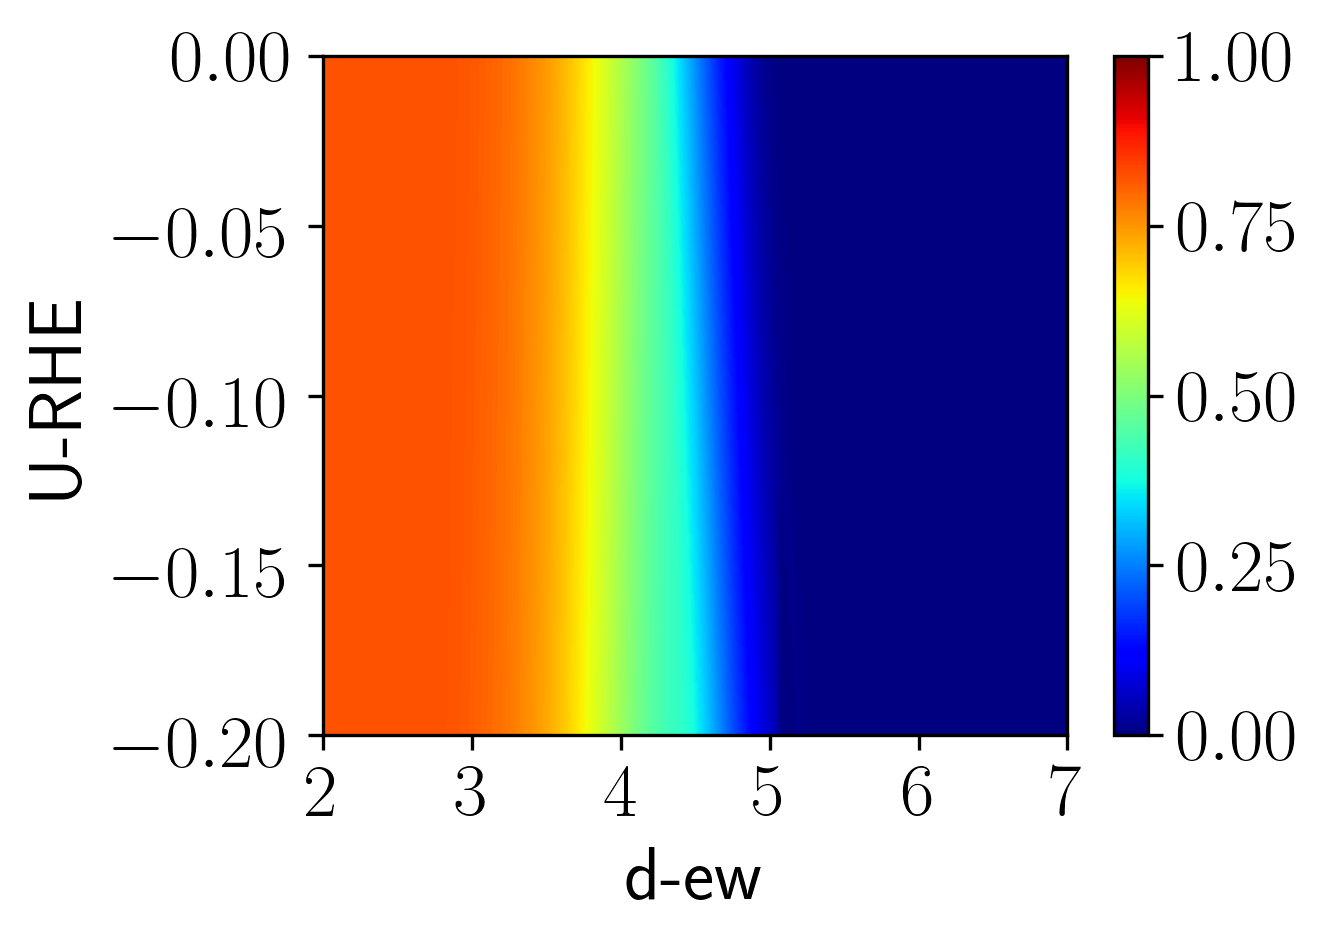

In [16]:
# coverage distribution on Pt(100)
plot_heatmap(distributions['Y_d_ew'], distributions['X_U'],distributions['Z_theta_H'],reselution=900,fig_size=[4,3],file_name = 'Figures/H_coverage_U_d_0416_2021',v_range=[0,1], nv=5)

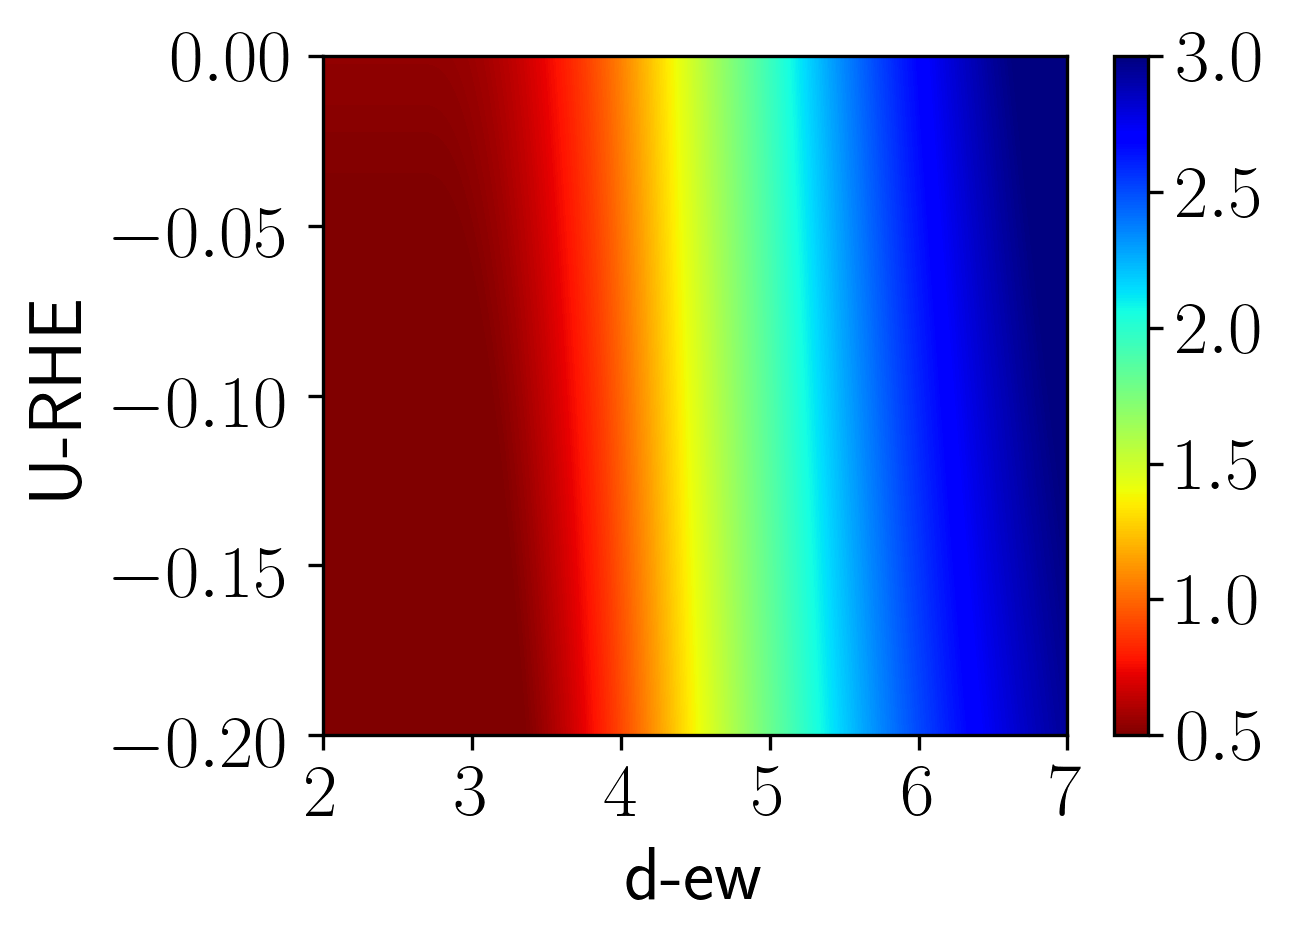

In [17]:
# forward barrier of Volmer step on P(100)
plot_heatmap(distributions['Y_d_ew'], distributions['X_U'],distributions['Z_barrier_volmer_f'],reselution=900,fig_size=[4,3],file_name = 'Figures/volmer_f_barrier_0416_2021',v_range=[0.5,3], nv=6,c_rev=True)

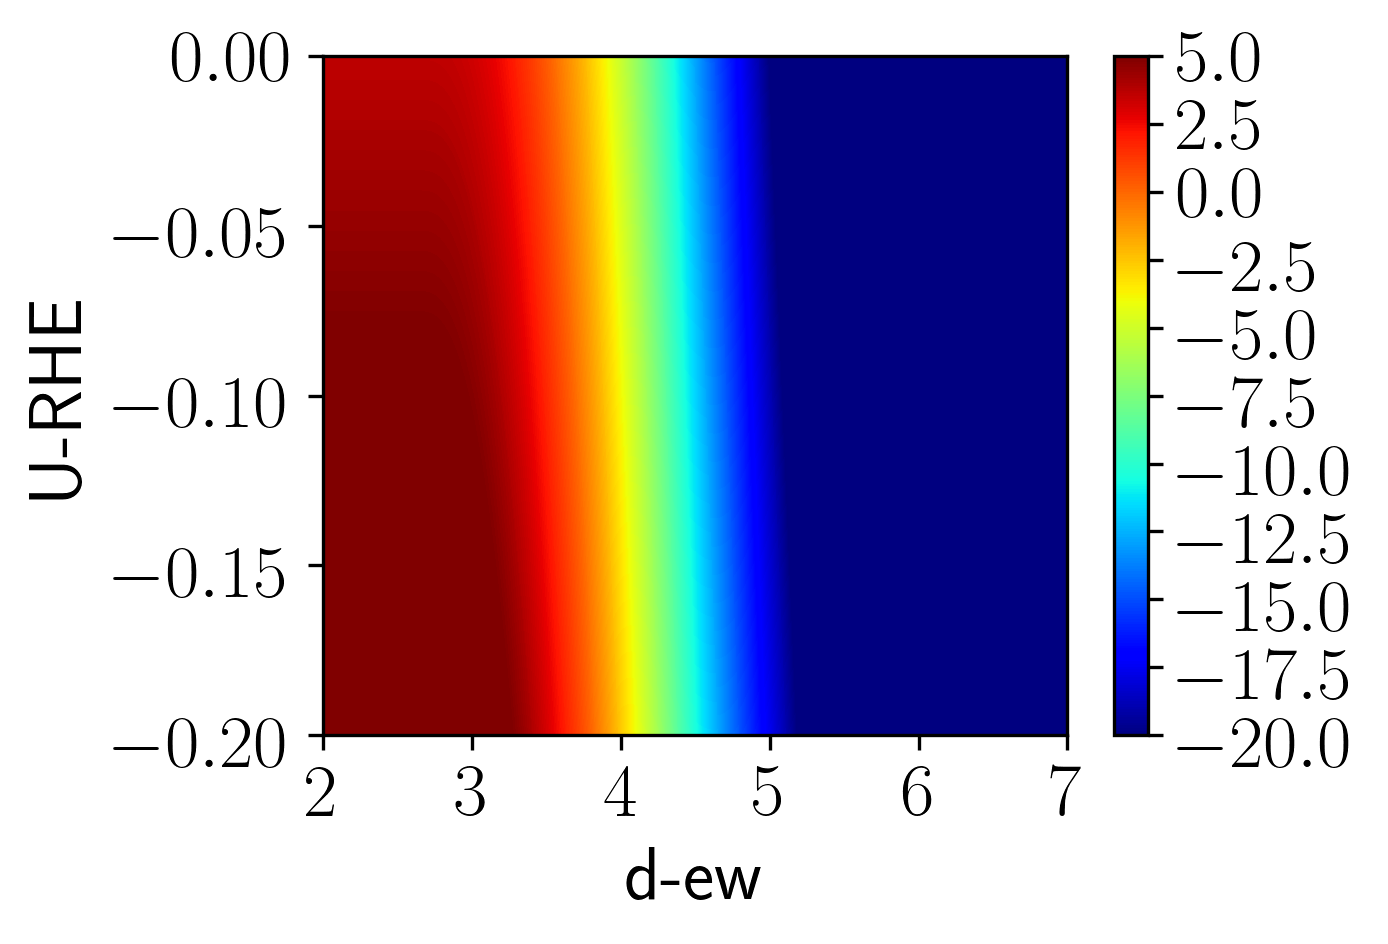

In [18]:
# intrinsic forward rate of Volmer step on P(100)
plot_heatmap(distributions['Y_d_ew'], distributions['X_U'],np.log10(distributions['Z_k_volmer_f']),fig_size=[4,3],reselution = 1000,file_name = 'Figures/vomer_f_intrinsic_rate_0416_2021',v_range=[-20,5], nv=11)

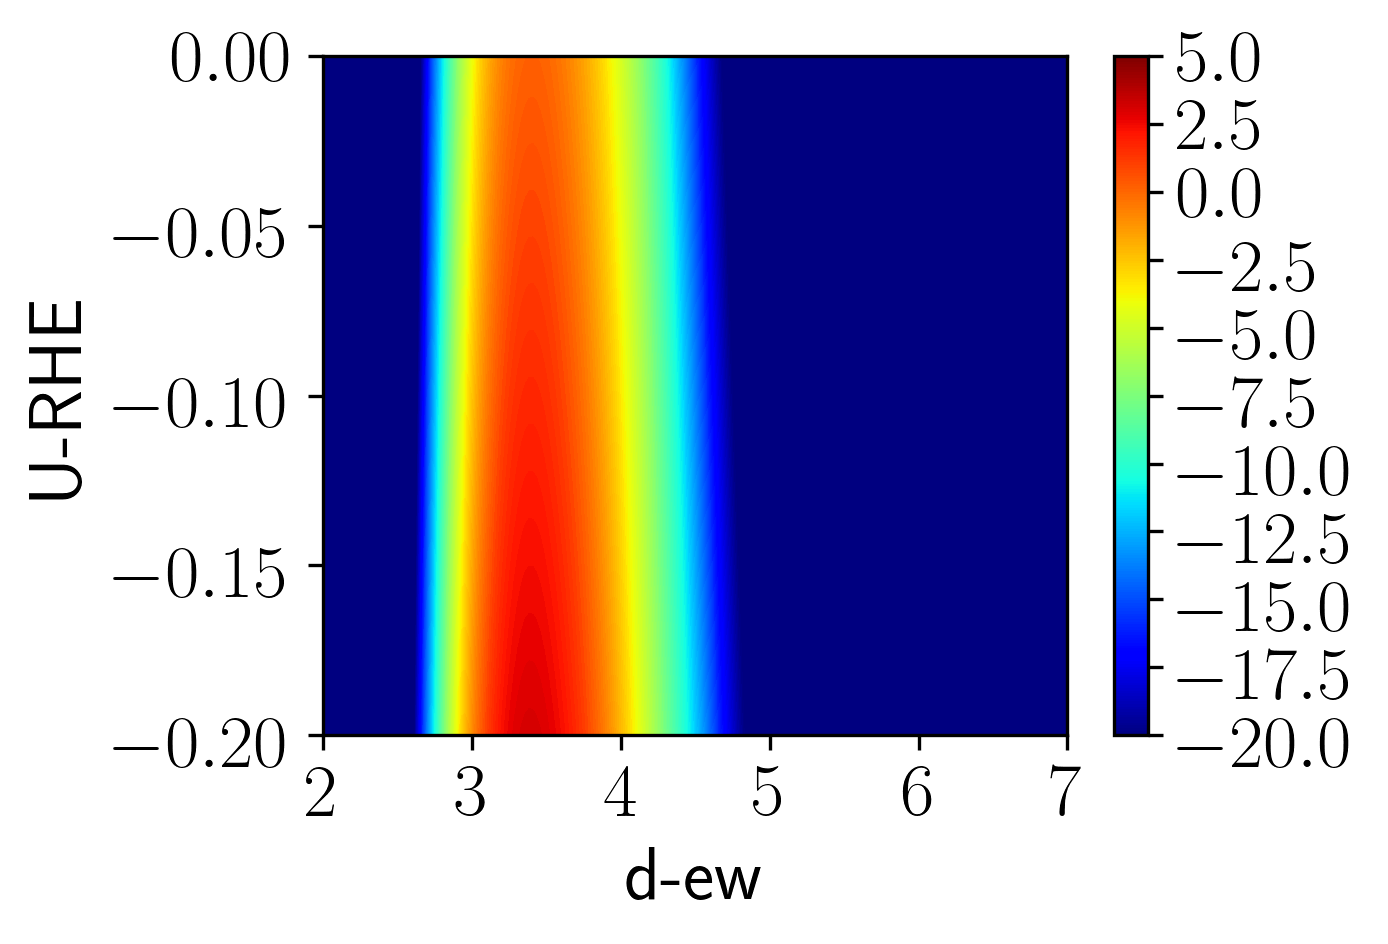

In [19]:
# probability-weighted forward rate of Volmer step on P(100)
plot_heatmap(distributions['Y_d_ew'], distributions['X_U'],np.log10(distributions['Z_k_volmer_f_probability_corrected']),fig_size=[4,3],file_name = 'Figures/vomer_f_probability_weighted_rate_0416_2021',v_range=[-20,5], nv=11)

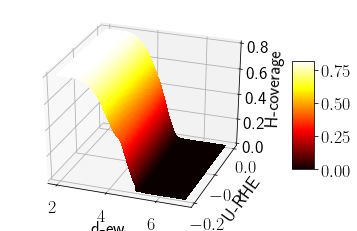

In [20]:
# show H* coverage on Pt(100) in 3D surface
plot_3D_surface(distributions['Y_d_ew'],distributions['X_U'],distributions['Z_theta_H'],Z_label='H-coverage')

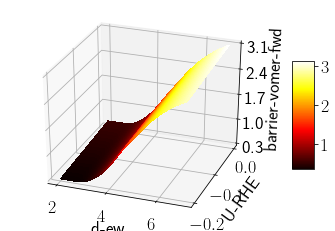

In [21]:
# show forward volmer barrier on Pt(100) in 3D surface
plot_3D_surface(distributions['Y_d_ew'],distributions['X_U'],distributions['Z_barrier_volmer_f'],file_name = 'Figures/3D_barrier_volmer_f_0416_2021')